In [ ]:
pip install mpl-colors

In [ ]:
pip install openai

In [ ]:
import openai
import pandas as pd
import numpy as np
import json
import os
import re
import time
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import linregress
from sklearn.metrics import r2_score
from scipy.stats import linregress
from scipy.stats import wasserstein_distance


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import df_control

In [ ]:
df_control = pd.read_pickle('/content/drive/My Drive/social preference/df_control.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/social preference/df_control.pkl'

In [ ]:
# Generate the subjectID column
df_control['subjectID'] = df_control['date'] + '-' + df_control['subject'].astype(str)

In [ ]:
df_control

treatment      date  stage  subject  picturechoice1  picturechoice2  \
0      control  050316PQ      3        1             NaN             NaN   
1      control  050316PQ      3        2             NaN             NaN   
2      control  050316PQ      3        4             NaN             NaN   
3      control  050316PQ      3        5             NaN             NaN   
4      control  050316PQ      3        6             NaN             NaN   
...        ...       ...    ...      ...             ...             ...   
1064   control  050801NP      3       12             NaN             NaN   
1065   control  050801NP      3       13             NaN             NaN   
1066   control  050801NP      3       14             NaN             NaN   
1067   control  050801NP      3       15             NaN             NaN   
1068   control  050801NP      3       16             NaN             NaN   

      picturechoice3  picturechoice4  picturechoice5  mytype  ...  \
0                NaN             NaN             NaN     NaN  ...   
1                NaN             NaN             NaN     NaN  ...   
2                NaN             NaN             NaN     NaN  ...   
3                NaN             NaN             NaN     NaN  ...   
4                NaN             NaN             NaN     NaN  ...   
...              ...             ...             ...     ...  ...   
1064             NaN             NaN             NaN     NaN  ...   
1065             NaN             NaN             NaN     NaN  ...   
1066             NaN             NaN             NaN     NaN  ...   
1067             NaN             NaN             NaN     NaN  ...   
1068             NaN             NaN             NaN     NaN  ...   

      payoffB_Aout  payoffA_Bact1  payoffB_Bact1  payoffA_Bact2  \
0              NaN          400.0          400.0          750.0   
1              NaN          400.0          400.0          750.0   
2              NaN          400.0          400.0          750.0   
3              NaN          400.0          400.0          750.0   
4              NaN          400.0          400.0          750.0   
...            ...            ...            ...            ...   
1064         750.0          800.0          200.0            0.0   
1065         750.0          800.0          200.0            0.0   
1066         750.0          800.0          200.0            0.0   
1067         750.0          800.0          200.0            0.0   
1068         750.0          800.0          200.0            0.0   

      payoffB_Bact2  paintingawards  stage2_payoff  myrole(A/B)  choice  \
0             400.0             NaN            NaN            B      B1   
1             400.0             NaN            NaN            A     NaN   
2             400.0             NaN            NaN            B      B2   
3             400.0             NaN            NaN            A     NaN   
4             400.0             NaN            NaN            A     NaN   
...             ...             ...            ...          ...     ...   
1064          150.0             NaN            NaN            B      B1   
1065          150.0             NaN            NaN            B      B1   
1066          150.0             NaN            NaN            A      A2   
1067          150.0             NaN            NaN            A      A1   
1068          150.0             NaN            NaN            B      B1   

        subjectID  
0      050316PQ-1  
1      050316PQ-2  
2      050316PQ-4  
3      050316PQ-5  
4      050316PQ-6  
...           ...  
1064  050801NP-12  
1065  050801NP-13  
1066  050801NP-14  
1067  050801NP-15  
1068  050801NP-16  

[1069 rows x 61 columns]

filter out choice == NaN

In [ ]:
# Remove rows where the 'choice' column is NaN
df_control_cleaned = df_control.dropna(subset=['choice'])
df_control_cleaned

treatment      date  stage  subject  picturechoice1  picturechoice2  \
0      control  050316PQ      3        1             NaN             NaN   
2      control  050316PQ      3        4             NaN             NaN   
8      control  050316PQ      3       10             NaN             NaN   
9      control  050316PQ      3       11             NaN             NaN   
11     control  050316PQ      3       13             NaN             NaN   
...        ...       ...    ...      ...             ...             ...   
1064   control  050801NP      3       12             NaN             NaN   
1065   control  050801NP      3       13             NaN             NaN   
1066   control  050801NP      3       14             NaN             NaN   
1067   control  050801NP      3       15             NaN             NaN   
1068   control  050801NP      3       16             NaN             NaN   

      picturechoice3  picturechoice4  picturechoice5  mytype  ...  \
0                NaN             NaN             NaN     NaN  ...   
2                NaN             NaN             NaN     NaN  ...   
8                NaN             NaN             NaN     NaN  ...   
9                NaN             NaN             NaN     NaN  ...   
11               NaN             NaN             NaN     NaN  ...   
...              ...             ...             ...     ...  ...   
1064             NaN             NaN             NaN     NaN  ...   
1065             NaN             NaN             NaN     NaN  ...   
1066             NaN             NaN             NaN     NaN  ...   
1067             NaN             NaN             NaN     NaN  ...   
1068             NaN             NaN             NaN     NaN  ...   

      payoffB_Aout  payoffA_Bact1  payoffB_Bact1  payoffA_Bact2  \
0              NaN          400.0          400.0          750.0   
2              NaN          400.0          400.0          750.0   
8              NaN          400.0          400.0          750.0   
9              NaN          400.0          400.0          750.0   
11             NaN          400.0          400.0          750.0   
...            ...            ...            ...            ...   
1064         750.0          800.0          200.0            0.0   
1065         750.0          800.0          200.0            0.0   
1066         750.0          800.0          200.0            0.0   
1067         750.0          800.0          200.0            0.0   
1068         750.0          800.0          200.0            0.0   

      payoffB_Bact2  paintingawards  stage2_payoff  myrole(A/B)  choice  \
0             400.0             NaN            NaN            B      B1   
2             400.0             NaN            NaN            B      B2   
8             400.0             NaN            NaN            B      B2   
9             400.0             NaN            NaN            B      B2   
11            400.0             NaN            NaN            B      B1   
...             ...             ...            ...          ...     ...   
1064          150.0             NaN            NaN            B      B1   
1065          150.0             NaN            NaN            B      B1   
1066          150.0             NaN            NaN            A      A2   
1067          150.0             NaN            NaN            A      A1   
1068          150.0             NaN            NaN            B      B1   

        subjectID  
0      050316PQ-1  
2      050316PQ-4  
8     050316PQ-10  
9     050316PQ-11  
11    050316PQ-13  
...           ...  
1064  050801NP-12  
1065  050801NP-13  
1066  050801NP-14  
1067  050801NP-15  
1068  050801NP-16  

[959 rows x 61 columns]

In [ ]:
df_control_cleaned

treatment      date  stage  subject  picturechoice1  picturechoice2  \
0      control  050316PQ      3        1             NaN             NaN   
2      control  050316PQ      3        4             NaN             NaN   
8      control  050316PQ      3       10             NaN             NaN   
9      control  050316PQ      3       11             NaN             NaN   
11     control  050316PQ      3       13             NaN             NaN   
...        ...       ...    ...      ...             ...             ...   
1064   control  050801NP      3       12             NaN             NaN   
1065   control  050801NP      3       13             NaN             NaN   
1066   control  050801NP      3       14             NaN             NaN   
1067   control  050801NP      3       15             NaN             NaN   
1068   control  050801NP      3       16             NaN             NaN   

      picturechoice3  picturechoice4  picturechoice5  mytype  ...  \
0                NaN             NaN             NaN     NaN  ...   
2                NaN             NaN             NaN     NaN  ...   
8                NaN             NaN             NaN     NaN  ...   
9                NaN             NaN             NaN     NaN  ...   
11               NaN             NaN             NaN     NaN  ...   
...              ...             ...             ...     ...  ...   
1064             NaN             NaN             NaN     NaN  ...   
1065             NaN             NaN             NaN     NaN  ...   
1066             NaN             NaN             NaN     NaN  ...   
1067             NaN             NaN             NaN     NaN  ...   
1068             NaN             NaN             NaN     NaN  ...   

      payoffB_Aout  payoffA_Bact1  payoffB_Bact1  payoffA_Bact2  \
0              NaN          400.0          400.0          750.0   
2              NaN          400.0          400.0          750.0   
8              NaN          400.0          400.0          750.0   
9              NaN          400.0          400.0          750.0   
11             NaN          400.0          400.0          750.0   
...            ...            ...            ...            ...   
1064         750.0          800.0          200.0            0.0   
1065         750.0          800.0          200.0            0.0   
1066         750.0          800.0          200.0            0.0   
1067         750.0          800.0          200.0            0.0   
1068         750.0          800.0          200.0            0.0   

      payoffB_Bact2  paintingawards  stage2_payoff  myrole(A/B)  choice  \
0             400.0             NaN            NaN            B      B1   
2             400.0             NaN            NaN            B      B2   
8             400.0             NaN            NaN            B      B2   
9             400.0             NaN            NaN            B      B2   
11            400.0             NaN            NaN            B      B1   
...             ...             ...            ...          ...     ...   
1064          150.0             NaN            NaN            B      B1   
1065          150.0             NaN            NaN            B      B1   
1066          150.0             NaN            NaN            A      A2   
1067          150.0             NaN            NaN            A      A1   
1068          150.0             NaN            NaN            B      B1   

        subjectID  
0      050316PQ-1  
2      050316PQ-4  
8     050316PQ-10  
9     050316PQ-11  
11    050316PQ-13  
...           ...  
1064  050801NP-12  
1065  050801NP-13  
1066  050801NP-14  
1067  050801NP-15  
1068  050801NP-16  

[959 rows x 61 columns]

In [ ]:
unique_subject_count = df_control_cleaned['subjectID'].nunique()
print("Number of unique subjectID:", unique_subject_count)

Number of unique subjectID: 133


In [ ]:
df_control_cleaned['myrole'] = df_control_cleaned['myrole'].astype('Int64')

<ipython-input-13-9cb2e646aaa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control_cleaned['myrole'] = df_control_cleaned['myrole'].astype('Int64')


In [ ]:
df_control_cleaned['myrole'].dtype

dtype('int64')

In [ ]:
df_control_cleaned.to_csv('/content/drive/My Drive/social preference/df_control_cleaned.csv', index=False)

In [ ]:
df_control_cleaned = pd.read_csv('/content/drive/My Drive/social preference/df_control_cleaned.csv')

# import survey data

In [ ]:
df_survey = pd.read_stata('/content/drive/My Drive/social preference/20061107_data_survey_Chen_Li.dta')
df_survey

session  subject  age  gender  numsibling  \
0       11.0        1   19  Female           2   
1       11.0        2   20  Female           2   
2       11.0        4   18    Male           1   
3       11.0        5   21    Male           0   
4       11.0        6   19  Female           4   
..       ...      ...  ...     ...         ...   
557      NaN       12   19  Female           1   
558      NaN       13   35  Female           0   
559      NaN       14   37  Female           4   
560      NaN       15   19  Female           2   
561      NaN       16   21  Female           0   

                                majorum      undergrad  yrinprog  \
0                         Biopsychology  Undergraduate       2.0   
1                               biology  Undergraduate       2.0   
2    Biomedical Engineering/Premedicine  Undergraduate       1.0   
3                            psychology  Undergraduate       4.0   
4                               Nursing  Undergraduate       1.0   
..                                  ...            ...       ...   
557               Screen Arts & Culture  Undergraduate       2.0   
558                                 IOE       Graduate       6.0   
559                             English  Undergraduate       4.0   
560              Organizational Studies  Undergraduate       3.0   
561                           Economics  Undergraduate       4.0   

    participatedbefore  numparticipate  ... decision_affected  \
0                  Yes             4.0  ...                     
1                  Yes             5.0  ...                     
2                  Yes             5.0  ...                     
3                  Yes             5.0  ...                     
4                  Yes             4.0  ...                     
..                 ...             ...  ...               ...   
557                Yes             5.0  ...               Yes   
558                 No             NaN  ...               Yes   
559                Yes             2.0  ...                No   
560                Yes             6.0  ...                No   
561                 No             NaN  ...               Yes   

                                          affected_how affected_how_fillin  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
..                                                 ...                 ...   
557          I was more likely to choose equal payoff.                       
558  I was more likely to be nice to my match when ...                       
559                                                                          
560                                                                          
561  I was more likely to be nice to my match when ...                       

     know_kan  know_klee                                    contr_gamestrat  \
0         NaN        NaN  Try to earn as much money as possible for myse...   
1         NaN        NaN  Try to earn as much money as possible for me a...   
2         NaN        NaN  Try to earn as much money as possible for me a...   
3         NaN        NaN  Try to earn as much money as possible for myse...   
4         NaN        NaN  Try to earn as much money as possible for myse...   
..        ...        ...                                                ...   
557       1.0        1.0                                                      
558       1.0        1.0                                                      
559       1.0        1.0                                                      
560       1.0        1.0                                                      


In [ ]:
# Generate the subjectID column
df_survey['subjectID'] = df_survey['date'] + '-' + df_survey['subject'].astype(str)
df_survey

session  subject  age  gender  numsibling  \
0       11.0        1   19  Female           2   
1       11.0        2   20  Female           2   
2       11.0        4   18    Male           1   
3       11.0        5   21    Male           0   
4       11.0        6   19  Female           4   
..       ...      ...  ...     ...         ...   
557      NaN       12   19  Female           1   
558      NaN       13   35  Female           0   
559      NaN       14   37  Female           4   
560      NaN       15   19  Female           2   
561      NaN       16   21  Female           0   

                                majorum      undergrad  yrinprog  \
0                         Biopsychology  Undergraduate       2.0   
1                               biology  Undergraduate       2.0   
2    Biomedical Engineering/Premedicine  Undergraduate       1.0   
3                            psychology  Undergraduate       4.0   
4                               Nursing  Undergraduate       1.0   
..                                  ...            ...       ...   
557               Screen Arts & Culture  Undergraduate       2.0   
558                                 IOE       Graduate       6.0   
559                             English  Undergraduate       4.0   
560              Organizational Studies  Undergraduate       3.0   
561                           Economics  Undergraduate       4.0   

    participatedbefore  numparticipate  ...  \
0                  Yes             4.0  ...   
1                  Yes             5.0  ...   
2                  Yes             5.0  ...   
3                  Yes             5.0  ...   
4                  Yes             4.0  ...   
..                 ...             ...  ...   
557                Yes             5.0  ...   
558                 No             NaN  ...   
559                Yes             2.0  ...   
560                Yes             6.0  ...   
561                 No             NaN  ...   

                                          affected_how affected_how_fillin  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
..                                                 ...                 ...   
557          I was more likely to choose equal payoff.                       
558  I was more likely to be nice to my match when ...                       
559                                                                          
560                                                                          
561  I was more likely to be nice to my match when ...                       

    know_kan  know_klee                                    contr_gamestrat  \
0        NaN        NaN  Try to earn as much money as possible for myse...   
1        NaN        NaN  Try to earn as much money as possible for me a...   
2        NaN        NaN  Try to earn as much money as possible for me a...   
3        NaN        NaN  Try to earn as much money as possible for myse...   
4        NaN        NaN  Try to earn as much money as possible for myse...   
..       ...        ...                                                ...   
557      1.0        1.0                                                      
558      1.0        1.0                                                      
559      1.0        1.0                                                      
560      1.0        1.0                                                      
561      5.0        2.0                                                      

    contr_gamestrat_fillin      treatment      date random_groups    subjectID  
0                                 control  050316PQ                

In [ ]:
df_control_survey = df_survey[df_survey['treatment'] == 'control']
df_control_survey

session  subject  age  gender  numsibling  \
0       11.0        1   19  Female           2   
1       11.0        2   20  Female           2   
2       11.0        4   18    Male           1   
3       11.0        5   21    Male           0   
4       11.0        6   19  Female           4   
..       ...      ...  ...     ...         ...   
128     38.0       12   20    Male           0   
129     38.0       13   22    Male           2   
130     38.0       14   20  Female           4   
131     38.0       15   20  Female           3   
132     38.0       16   19  Female           2   

                                            majorum      undergrad  yrinprog  \
0                                     Biopsychology  Undergraduate       2.0   
1                                           biology  Undergraduate       2.0   
2                Biomedical Engineering/Premedicine  Undergraduate       1.0   
3                                        psychology  Undergraduate       4.0   
4                                           Nursing  Undergraduate       1.0   
..                                              ...            ...       ...   
128  Cell Molecular Biology, Biomedical Engineering  Undergraduate       3.0   
129                           computer engineeringq  Undergraduate       2.0   
130                                   Asian Studies  Undergraduate       3.0   
131                        Communication/Psychology  Undergraduate       3.0   
132                                     Linguistics  Undergraduate       3.0   

    participatedbefore  numparticipate  ... affected_how affected_how_fillin  \
0                  Yes             4.0  ...                                    
1                  Yes             5.0  ...                                    
2                  Yes             5.0  ...                                    
3                  Yes             5.0  ...                                    
4                  Yes             4.0  ...                                    
..                 ...             ...  ...          ...                 ...   
128                Yes             1.0  ...                                    
129                 No             NaN  ...                                    
130                Yes            10.0  ...                                    
131                Yes             5.0  ...                                    
132                Yes             4.0  ...                                    

    know_kan  know_klee                                    contr_gamestrat  \
0        NaN        NaN  Try to earn as much money as possible for myse...   
1        NaN        NaN  Try to earn as much money as possible for me a...   
2        NaN        NaN  Try to earn as much money as possible for me a...   
3        NaN        NaN  Try to earn as much money as possible for myse...   
4        NaN        NaN  Try to earn as much money as possible for myse...   
..       ...        ...                                                ...   
128      NaN        NaN  Try to earn as much money as possible for me a...   
129      NaN        NaN  Try to earn as much money as possible for me a...   
130      NaN        NaN  Try to earn as much money as possible for myse...   
131      NaN        NaN  Try to earn as much money as possible for me a...   
132      NaN        NaN  Try to earn as much money as possible for myse...   

    contr_gamestrat_fillin  treatment      date random_groups    subjectID  
0                             control  050316PQ                 050316PQ-1  
1                             control  050316PQ                 050316PQ-2  
2                             control  050316PQ                 050316PQ-4  
3                             control  050316PQ                 050316PQ-5  
4                             control  050316PQ                 050316PQ-6  
..                     ...        ...       ...           ...          ...  
128   

In [ ]:
unique_subject_count = df_control_survey['subjectID'].nunique()
print("Number of unique subjectID:", unique_subject_count)

Number of unique subjectID: 133


In [ ]:
df_control_survey.to_pickle('/content/drive/My Drive/social preference/df_control_survey.pkl')

In [ ]:
df_control_survey = pd.read_pickle('/content/drive/My Drive/social preference/df_control_survey.pkl')

In [ ]:
df_control_survey.to_csv('/content/drive/My Drive/social preference/df_control_survey.csv', index=False)

NameError: name 'df_control_survey' is not defined

In [ ]:
df_control_survey = pd.read_csv('/content/drive/My Drive/social preference/df_control_survey.csv')

## visualized demographics (133 total)

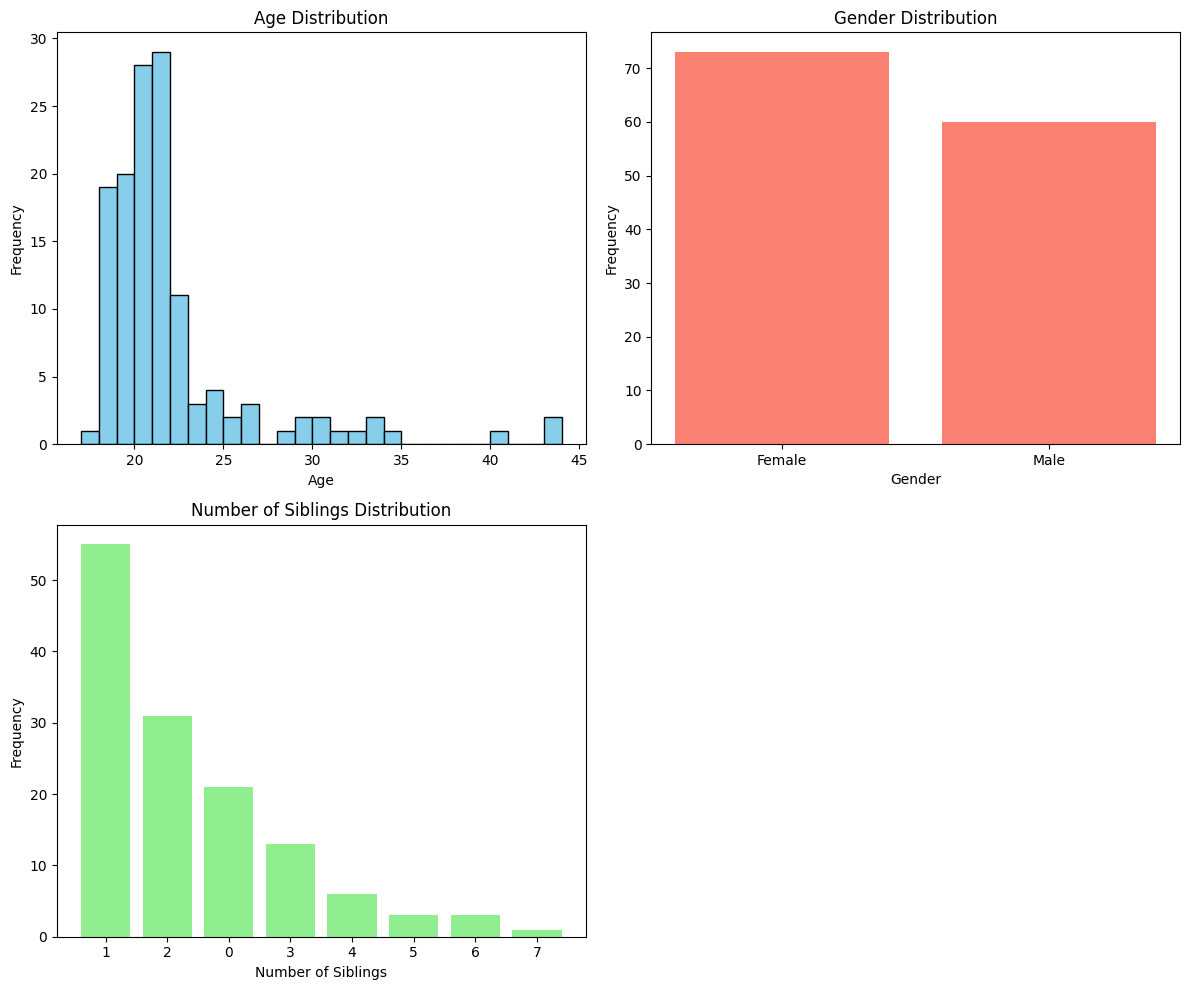

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axs[0, 0].hist(df_control_survey['age'], bins=range(min(df_control_survey['age']), max(df_control_survey['age']) + 1), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Gender Distribution
gender_counts = df_control_survey['gender'].value_counts()
axs[0, 1].bar(gender_counts.index, gender_counts.values, color='salmon')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Frequency')

# Number of Siblings Distribution
siblings_counts = df_control_survey['numsibling'].value_counts()
axs[1, 0].bar(siblings_counts.index.map(str), siblings_counts.values, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Frequency')

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


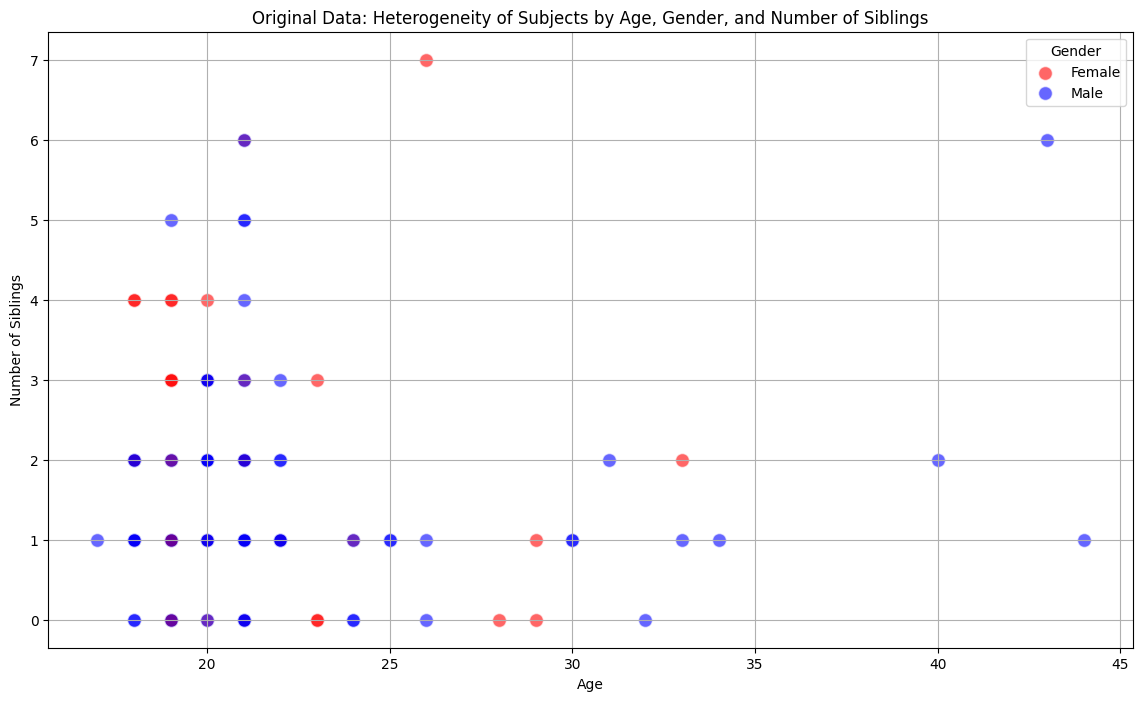

In [ ]:


# Capitalize gender values to ensure consistency
df_control_survey['gender'] = df_control_survey['gender'].str.capitalize()

color_mapping = {'Female': 'red', 'Male': 'blue'}

# Create a scatter plot
plt.figure(figsize=(14, 8))

for gender, color in color_mapping.items():
    subset = df_control_survey[df_control_survey['gender'] == gender]
    plt.scatter(subset['age'], subset['numsibling'], label=gender, color=color, alpha=0.6, edgecolors='w', s=100)

plt.title('Original Data: Heterogeneity of Subjects by Age, Gender, and Number of Siblings')
plt.xlabel('Age')
plt.ylabel('Number of Siblings')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


## visualized demographics (91 train)

In [ ]:
df_control_survey_91 = pd.read_csv('/content/drive/My Drive/social preference/df_control_survey_91.csv')

In [ ]:
df_control_survey_91 = df_control_survey_91[['subjectID', 'age', 'gender', 'numsibling']]
df_control_survey_91.to_csv('/content/drive/My Drive/social preference/df_control_survey_91_only3features.csv', index=False)

In [ ]:
df_control_survey_91.to_csv('/content/drive/My Drive/social preference/df_control_survey_91_only3features.csv', index=False)

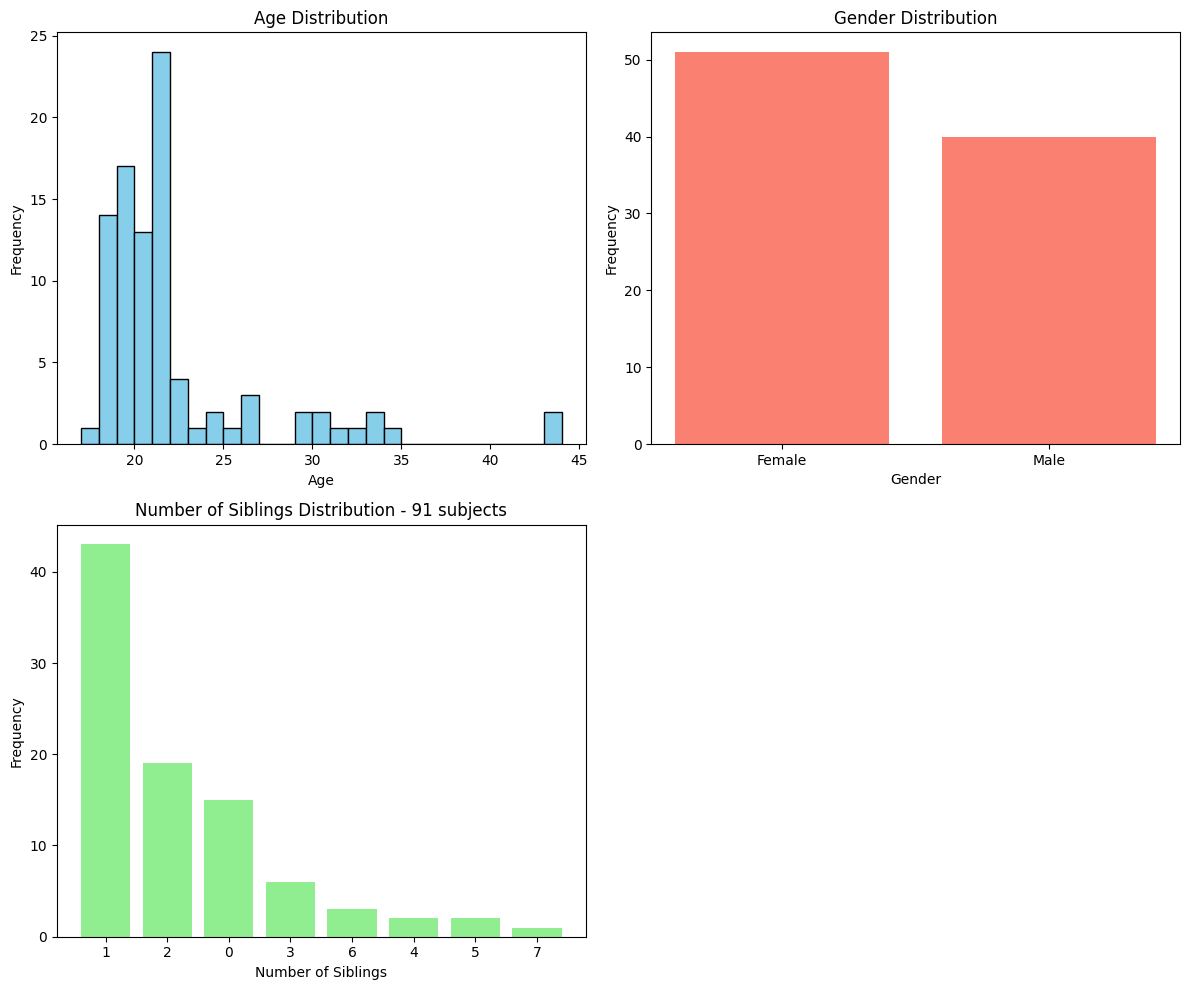

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axs[0, 0].hist(df_control_survey_91['age'], bins=range(min(df_control_survey_91['age']), max(df_control_survey_91['age']) + 1), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Gender Distribution
gender_counts = df_control_survey_91['gender'].value_counts()
axs[0, 1].bar(gender_counts.index, gender_counts.values, color='salmon')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Frequency')

# Number of Siblings Distribution
siblings_counts = df_control_survey_91['numsibling'].value_counts()
axs[1, 0].bar(siblings_counts.index.map(str), siblings_counts.values, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution - 91 subjects')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Frequency')

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

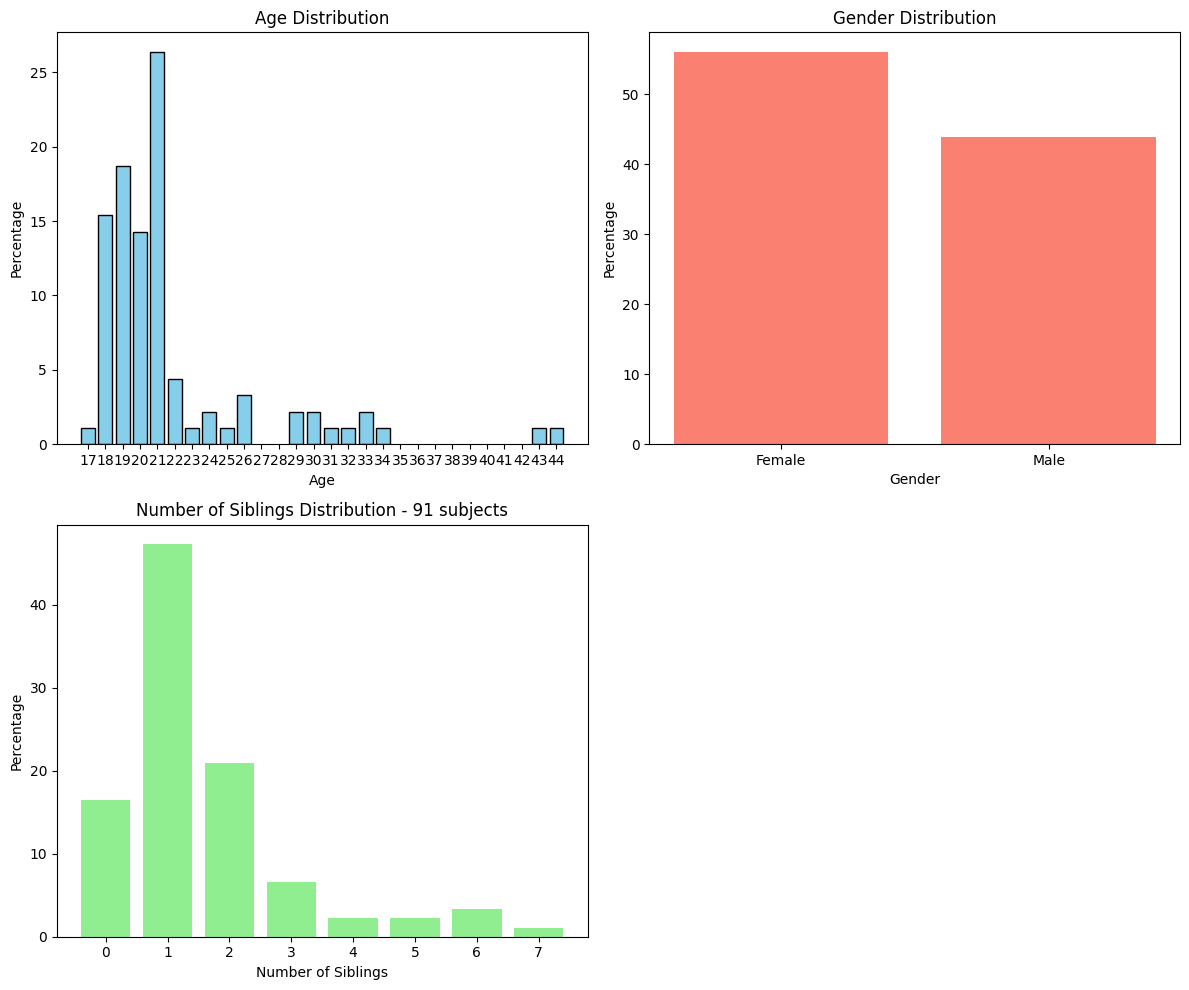

In [ ]:
# Function to calculate percentages
def to_percentage(counts):
    return (counts / counts.sum()) * 100

# Plot the distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
age_counts = df_control_survey_91['age'].value_counts().sort_index()
age_percentages = to_percentage(age_counts)
axs[0, 0].bar(age_counts.index, age_percentages, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].set_xticks(range(min(df_control_survey_91['age']), max(df_control_survey_91['age']) + 1))

# Gender Distribution
gender_counts = df_control_survey_91['gender'].value_counts()
gender_percentages = to_percentage(gender_counts)
axs[0, 1].bar(gender_counts.index, gender_percentages, color='salmon')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Percentage')

# Number of Siblings Distribution
siblings_counts = df_control_survey_91['numsibling'].value_counts().sort_index()
siblings_percentages = to_percentage(siblings_counts)
axs[1, 0].bar(siblings_counts.index, siblings_percentages, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution - 91 subjects')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Percentage')

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


# create prompts

In [ ]:
paras = """Dict 1	0	0	400	400	750	400
Dict 2	0	0	400	400	750	375
Dict 3	0	0	300	600	700	500
Dict 4	0	0	200	700	600	600
Dict 5	0	0	0	800	400	400
Resp 1a	750	0	400	400	750	400
Resp 1b	550	550	400	400	750	400
Resp 6	100	1000	75	125	125	125
Resp 7	450	900	200	400	400	400
Resp 2a	750	0	400	400	750	375
Resp 2b	550	550	400	400	750	375
Resp 3	750	100	300	600	700	500
Resp 4	700	200	200	700	600	600
Resp 5a	800	0	0	800	400	400
Resp 5b	0	800	0	800	400	400
Resp 8	725	0	400	400	750	375
Resp 9	450	0	350	450	450	350
Resp 10	375	1000	400	400	350	350
Resp 11	400	1200	400	200	0	0
Resp 12	375	1000	400	400	250	350
Resp 13a	750	750	800	200	0	0
Resp 13b	750	750	800	200	0	50
Resp 13c	750	750	800	200	0	100
Resp 13d	750	750	800	200	0	150"""

parameters = {}

for para in paras.split('\n'):
    para = para.split('\t')
    parameters[para[0]] = (int(para[1]), int(para[2]), int(para[3]), int(para[4]), int(para[5]), int(para[6]))

In [ ]:
# For baseline, add reasoning
def get_prompt(game_type, agent):
    a1a, a1b, b1a, b1b, b2a, b2b = parameters.get(game_type, ("a1a", "a1b", "b1a", "b1b", "b2a", "b2b"))  # Default values
    prompt = ""  # Initialize prompt to avoid UnboundLocalError

    print(f"game_type: {game_type}, agent: {agent}")  # Debugging
    #print(f"parameters: {a1a}, {a1b}, {b1a}, {b1b}, {b2a}, {b2b}")  # Debugging

    if "Dict" in game_type:
        if agent == '2':
            prompt = f"""In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive {b1a} and you will receive {b1b}. If you choose B2, person A will receive {b2a} and you will receive {b2b}. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """
        elif agent == '1':
            prompt = f"""In this period, you are person A. You have no choice in this game. Person B’s choice determines the outcome. If person B chooses B1, you will receive {b1a} and person B will receive {b1b}. If person B chooses B2, you will receive {b2a} and person B will receive {b2b}. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """
    elif "Resp" in game_type:
        if agent == '1':
            prompt = f"""In this period, you are person A. You may choose A1 or A2. If you choose A1, you will receive {a1a}, and person B will receive {a1b}. If you choose A2, then person B’s choice of B1 or B2 will determine the outcome. If you choose A2 and person B chooses B1, you will receive {b1a} and s/he will receive {b2b}. If you choose A2 and person B chooses B2, you will receive {b2a}, and s/he will receive {b2b}. Person B will make a choice without being informed of your decision. Person B knows that his or her choice only affects the outcome if you choose A2, so s/he will choose B1 or B2 on the assumption that you have chosen A2 over A1. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """
        elif agent == '2':
            prompt = f"""In this period, you are person B. You may choose B1 or B2. Person A has already made a choice. If s/he has chosen A1, s/he will receive {a1a}, and you will receive {a1b}. Your decision only affects the outcome if person A has chosen A2. Thus, you should choose B1 or B2 on the assumption that person A has chosen A2 over A1. If person A has chosen A2 and you choose B1, then person A will receive {b1a}, and you will receive {b1b}. If person A has chosen A2 and you choose B2, then person A will receive {b2a}, and you will receive {b2b}. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """

    #print(f"Generated prompt: {prompt}")  # Debugging
    return prompt

In [ ]:
# 用于生成example， 改回What will be your choice了
def get_prompt_example(game_type, agent):
    a1a, a1b, b1a, b1b, b2a, b2b = parameters.get(game_type, ("a1a", "a1b", "b1a", "b1b", "b2a", "b2b"))  # Default values
    prompt = ""  # Initialize prompt to avoid UnboundLocalError

    print(f"game_type: {game_type}, agent: {agent}")  # Debugging
    #print(f"parameters: {a1a}, {a1b}, {b1a}, {b1b}, {b2a}, {b2b}")  # Debugging

    if "Dict" in game_type:
        if agent == '2':
            prompt = f"""In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive {b1a} and you will receive {b1b}. If you choose B2, person A will receive {b2a} and you will receive {b2b}. What will be your choice?"""
        elif agent == '1':
            prompt = f"""In this period, you are person A. You have no choice in this game. Person B’s choice determines the outcome. If person B chooses B1, you will receive {b1a} and person B will receive {b1b}. If person B chooses B2, you will receive {b2a} and person B will receive {b2b}. What will be your choice?"""
    elif "Resp" in game_type:
        if agent == '1':
            prompt = f"""In this period, you are person A. You may choose A1 or A2. If you choose A1, you will receive {a1a}, and person B will receive {a1b}. If you choose A2, then person B’s choice of B1 or B2 will determine the outcome. If you choose A2 and person B chooses B1, you will receive {b1a} and s/he will receive {b2b}. If you choose A2 and person B chooses B2, you will receive {b2a}, and s/he will receive {b2b}. Person B will make a choice without being informed of your decision. Person B knows that his or her choice only affects the outcome if you choose A2, so s/he will choose B1 or B2 on the assumption that you have chosen A2 over A1. What will be your choice?"""
        elif agent == '2':
            prompt = f"""In this period, you are person B. You may choose B1 or B2. Person A has already made a choice. If s/he has chosen A1, s/he will receive {a1a}, and you will receive {a1b}. Your decision only affects the outcome if person A has chosen A2. Thus, you should choose B1 or B2 on the assumption that person A has chosen A2 over A1. If person A has chosen A2 and you choose B1, then person A will receive {b1a}, and you will receive {b1b}. If person A has chosen A2 and you choose B2, then person A will receive {b2a}, and you will receive {b2b}. What will be your choice?"""

    #print(f"Generated prompt: {prompt}")  # Debugging
    return prompt

In [ ]:
# For ABM's prompt 改完和get_prompt一致
def get_prompt_ABM(game_type, agent):
    a1a, a1b, b1a, b1b, b2a, b2b = parameters.get(game_type, ("a1a", "a1b", "b1a", "b1b", "b2a", "b2b"))  # Default values
    prompt = ""  # Initialize prompt to avoid UnboundLocalError

    #print(f"game_type: {game_type}, agent: {agent}")  # Debugging
    #print(f"parameters: {a1a}, {a1b}, {b1a}, {b1b}, {b2a}, {b2b}")  # Debugging

    if "Dict" in game_type:
        if agent == '2':
            prompt = f"""In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive {b1a} and you will receive {b1b}. If you choose B2, person A will receive {b2a} and you will receive {b2b}. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """
        elif agent == '1':
            prompt = f"""In this period, you are person A. You have no choice in this game. Person B’s choice determines the outcome. If person B chooses B1, you will receive {b1a} and person B will receive {b1b}. If person B chooses B2, you will receive {b2a} and person B will receive {b2b}. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """
    elif "Resp" in game_type:
        if agent == '1':
            prompt = f"""In this period, you are person A. You may choose A1 or A2. If you choose A1, you will receive {a1a}, and person B will receive {a1b}. If you choose A2, then person B’s choice of B1 or B2 will determine the outcome. If you choose A2 and person B chooses B1, you will receive {b1a} and s/he will receive {b2b}. If you choose A2 and person B chooses B2, you will receive {b2a}, and s/he will receive {b2b}. Person B will make a choice without being informed of your decision. Person B knows that his or her choice only affects the outcome if you choose A2, so s/he will choose B1 or B2 on the assumption that you have chosen A2 over A1. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """
        elif agent == '2':
            prompt = f"""In this period, you are person B. You may choose B1 or B2. Person A has already made a choice. If s/he has chosen A1, s/he will receive {a1a}, and you will receive {a1b}. Your decision only affects the outcome if person A has chosen A2. Thus, you should choose B1 or B2 on the assumption that person A has chosen A2 over A1. If person A has chosen A2 and you choose B1, then person A will receive {b1a}, and you will receive {b1b}. If person A has chosen A2 and you choose B2, then person A will receive {b2a}, and you will receive {b2b}. Please first reason step-by-step and format your output as JSON with the following structure: {{'reason': Your reasoning here, 'choice': Your choice here}}.
            """

    #print(f"Generated prompt: {prompt}")  # Debugging
    return prompt

In [ ]:
#def get_prompt(game_type, agent):
    #a1a, a1b, b1a, b1b, b2a, b2b = parameters[game_type]
    #if "Dict" in game_type:
        #if agent == '2':
            #prompt = f"In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive {b1a} and you will receive {b1b}. If you choose B2, person A will receive {b2a} and you will receive {b2b}. What will be your choice?"
        #elif agent == '1':
            #prompt = f"In this period, you are person A. You have no choice in this game. Person B’s choice determines the outcome. If person B chooses B1, you will receive {b1a} and person B will receive {b1b}. If person B chooses B2, you will receive {b2a} and person B will receive {b2b}. What will be your choice?"
    #elif "Resp" in game_type:
        #if agent == '1':
          #prompt = f"In this period, you are person A. You may choose A1 or A2. If you choose A1, you will receive {a1a}, and person B will receive {a1b}. If you choose A2, then person B’s choice of B1 or B2 will determine the outcome. If you choose A2 and person B chooses B1, you will receive {b1a} and s/he will receive {b2b}. If you choose A2 and person B chooses B2, you will receive {b2a}, and s/he will receive {b2b}. Person B will make a choice without being informed of your decision. Person B knows that his or her choice only affects the outcome if you choose A2, so s/he will choose B1 or B2 on the assumption that you have chosen A2 over A1. What will be your choice?"
        #elif agent == '2':
          #prompt = f"In this period, you are person B. You may choose B1 or B2. Person A has already made a choice. If s/he has chosen A1, s/he will receive {a1a}, and you will receive {a1b}. Your decision only affects the outcome if person A has chosen A2. Thus, you should choose B1 or B2 on the assumption that person A has chosen A2 over A1. If person A has chosen A2 and you choose B1, then person A will receive {b1a}, and you will receive {b1b}. If person A has chosen A2 and you choose B2, then person A will receive {b2a}, and you will receive {b2b}. What will be your choice?"
    #return prompt

In [ ]:
print(get_prompt_ABM(game_type="Dict 4", agent='2'))

In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 200 and you will receive 700. If you choose B2, person A will receive 600 and you will receive 600. Please first reason step-by-step and format your output as JSON with the following structure: {'reason': Your reasoning here, 'choice': Your choice here}.
            


# create answer

def get_answer(choice, payoff):
    if pd.isna(choice):
        answer = f"In this game, I have no choice, and my payoff is {int(payoff)}."
    else:
        answer = f"In this game, my choice is {choice}, and my payoff is {int(payoff)}."
    return answer


In [ ]:
def get_answer(choice, payoff):
    if pd.isna(choice):
        return f"In this game, I have no choice, and my payoff is {int(payoff)}."
    else:
        return f"In this game, my choice is {choice}, and my payoff is {int(payoff)}."

In [ ]:
choice = df_control_cleaned['choice'].iloc[0]
payoff = df_control_cleaned['mypayoff'].iloc[0]
print(get_answer(choice, payoff))

In this game, my choice is B1, and my payoff is 400.


# creat example

In [ ]:
# System message
general_instruction = 'You are playing a lab experiment. You will make decisions in 7-10 different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn.'


## creat first user message to get profile

In [ ]:
def get_profile(subjectID, df):
    subject_data = df[df["subjectID"] == subjectID]. iloc[0]
    message =(
      f"Subject ID: {subject_data['subjectID']}; Age: {subject_data['age']}; Gender: {subject_data['gender']}; "
      f"Number of siblings: {subject_data['numsibling']}; Donated in past 12 months: {subject_data['donated_yn']} "
      f"(If yes, donate amount: {subject_data['donate_amount']}); # hours volunteered: {subject_data['volunteer_time']}; "
      f"Game strategy(ies): {subject_data['contr_gamestrat']}"
      )
    return message

In [ ]:
subject_id = "050316PQ-1"
test_message = get_profile(subject_id, df_control_survey)
print(test_message)

Subject ID: 050316PQ-1; Age: 19; Gender: Female; Number of siblings: 2; Donated in past 12 months: Yes (If yes, donate amount: nan); # hours volunteered: 30.0; Game strategy(ies): Try to earn as much money as possible for myself.;Try to earn more money than my match.;Try to help my match if it did not cost me anything.;


In [ ]:
def creat_example(subjectID, df_control_survey, df_control_cleaned):
    system_message = general_instruction
    subject_games = df_control_cleaned[df_control_cleaned["subjectID"] == subjectID]

    messages = [{"role": "system", "content": system_message}]

    # Add the first user's message and first assistant's message
    first_user_message = "Firstly, please show your profile, which includes: subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game."
    profile_message = get_profile(subjectID, df_control_survey)

    messages.append({"role": "user", "content": first_user_message})
    messages.append({"role": "assistant", "content": profile_message})

    for _, row in subject_games.iterrows():
        game_prompt = get_prompt(str(row['game']), str(row['myrole']))
        game_answer = get_answer(row["choice"], row["mypayoff"])
        messages.append({"role": "user", "content": game_prompt})
        messages.append({"role": "assistant", "content": game_answer})

    return {"messages": messages}

In [ ]:
subject_id = "050316PQ-1"
full_message = creat_example(subject_id, df_control_survey, df_control_cleaned)
full_message

game_type: Dict 1, agent: 2
parameters: 0, 0, 400, 400, 750, 400
game_type: Resp 1a, agent: 1
parameters: 750, 0, 400, 400, 750, 400
game_type: Resp 5a, agent: 2
parameters: 800, 0, 0, 800, 400, 400
game_type: Resp 2b, agent: 1
parameters: 550, 550, 400, 400, 750, 375
game_type: Resp 5b, agent: 1
parameters: 0, 800, 0, 800, 400, 400
game_type: Resp 10, agent: 1
parameters: 375, 1000, 400, 400, 350, 350


{'messages': [{'role': 'system',
   'content': 'You are playing a lab experiment. You will make decisions in 7-10 different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your dec

# creat json file

In [ ]:
# Function to generate and save all messages to a JSONL file
def creat_jsonl(df_control_survey, df_control_cleaned, file_path):
    all_subject_ids = df_control_survey["subjectID"].unique()
    with open(file_path, 'w') as f:
        for subject_id in all_subject_ids:
            full_message = creat_example(subject_id, df_control_survey, df_control_cleaned)
            f.write(json.dumps(full_message) + '\n')

In [ ]:
file_path = '/content/drive/My Drive/social preference/jsonlfiles/generate_agent/revised_all_subjects_messages.jsonl'
creat_jsonl(df_control_survey, df_control_cleaned, file_path)

# fine tune

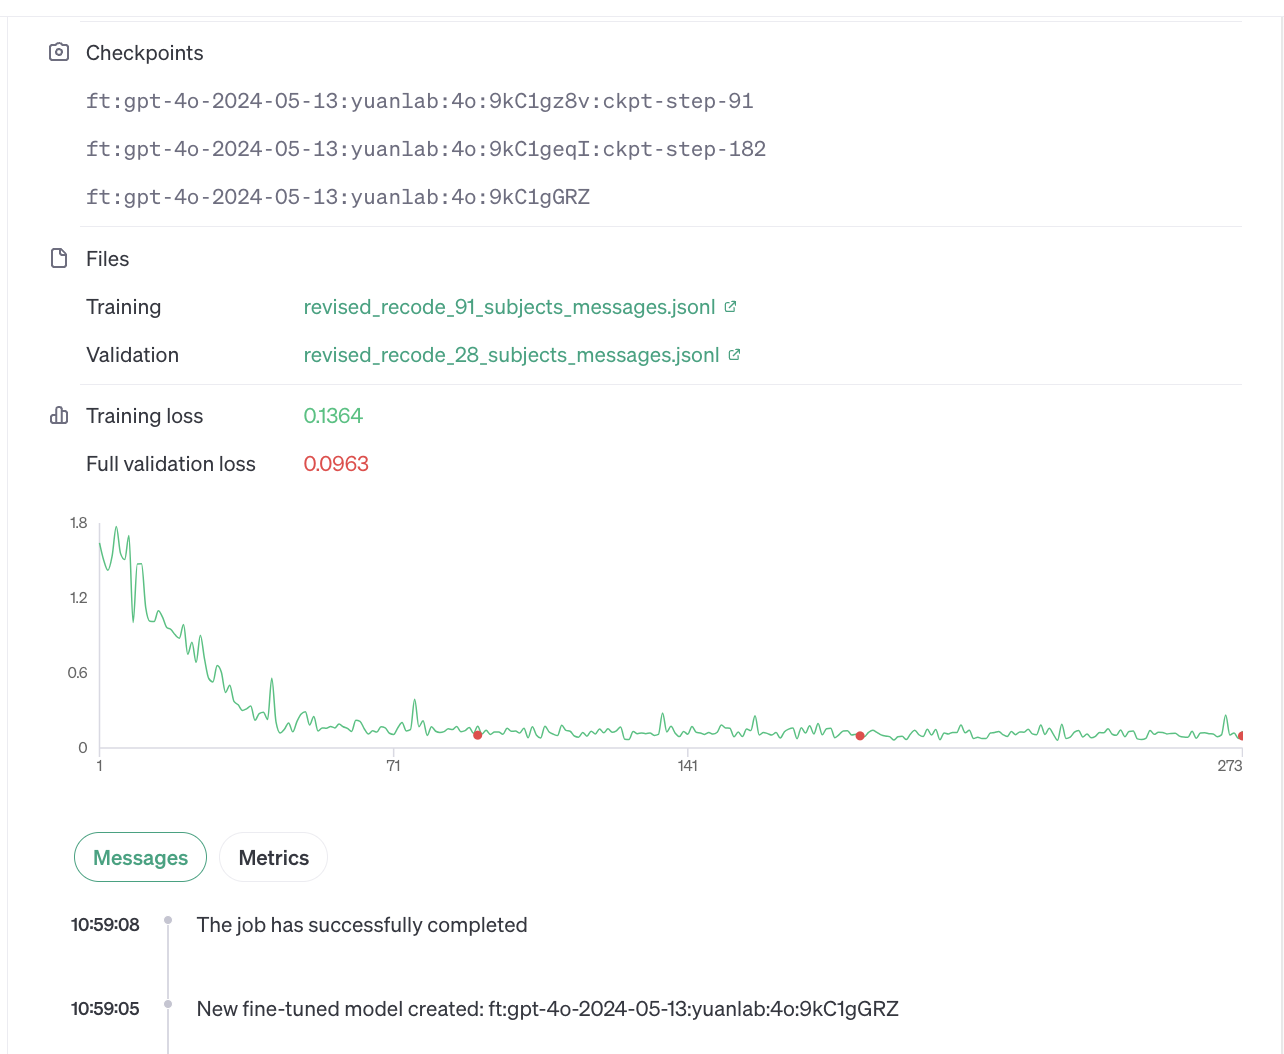

## set up

In [ ]:
pip install openai --upgrade

In [ ]:
!pip install tenacity

In [ ]:
from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential,
)


In [ ]:
openai.api_key =  #removed

In [ ]:
# Set the environment variable for the OpenAI API key
os.environ['OPENAI_API_KEY'] = #removed

# Initialize the OpenAI client using the environment variable
openai.api_key = os.getenv('OPENAI_API_KEY')

In [ ]:
from openai import OpenAI
client = OpenAI()

## creat fine tune job （skip）

In [ ]:
response = client.fine_tuning.jobs.create(
        training_file='/content/drive/My Drive/social preference/jsonlfiles/generate_agent/91_subjects_messages.jsonl',
        validation_file = '/content/drive/My Drive/social preference/jsonlfiles/generate_agent/28_subjects_messages.jsonl',
        model="gpt-3.5-turbo-1106",
        hyperparameters={
            "n_epochs": 5,
            "batch_size": 16,
            "learning_rate_multiplier": 1,
            "seed": 1
        }
    )



# generate agent

## generate_participant_message

In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Calculate the game size
    game_size = len(filtered_df)

    # Define the message format
    usermessage = f"""Generate {game_size} new participants to simulate how they will make choices in the game. Show me each agent's:
    - decision;
    - generated unique label;
    - demographics;
    - game strategy (Please select all that apply:
        - Try to earn as much money as possible for myself;
        - Try to earn as much money as possible for me and my match;
        - Try to earn more money than my match;
        - Reward those who were nice to me and punish those who were nasty to me;
        - Other, please specify).
    In the end, calculate the percentage of each choice. The game instruction is: {get_prompt(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage




In [ ]:
unique_game_types = df_control_cleaned['game'].unique()
unique_myroles = df_control_cleaned['myrole'].unique()

usermessages = []

for game_type in unique_game_types:
    for myrole in unique_myroles:
        usermessage = generate_participant_message(df_control_cleaned, get_prompt, game_type, myrole)
        usermessages.append(usermessage)

# Print all generated messages
for msg in usermessages:
    print(msg)
    print("\n---\n")

Generate 21 new participants to simulate how they will make choices in the game. Show me each agent's:
    - decision;
    - generated unique label;
    - demographics;
    - game strategy (Please select all that apply:
        - Try to earn as much money as possible for myself;
        - Try to earn as much money as possible for me and my match;
        - Try to earn more money than my match;
        - Reward those who were nice to me and punish those who were nasty to me;
        - Other, please specify).
    In the end, calculate the percentage of each choice. The game instruction is: In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 400 and you will receive 400. If you choose B2, person A will receive 750 and you will receive 400. What will be your choice?
    

---

No participants found for game type Dict 1,agent 1.

---

Generate 21 new participants to simulate how they will make choices in the

## get fine tuned model responses (temperature = 0)

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn."}


In [ ]:
# Define the function to get responses from the fine-tuned model
def get_model_responses(df, get_prompt):
    unique_game_types = df['game'].unique()
    responses = []

    for game_type in unique_game_types:
        unique_agents = df[df['game'] == game_type]['myrole'].unique()
        for agent in unique_agents:
            user_message_content = generate_participant_message(df, get_prompt, game_type, agent)
            user_message = {"role": "user", "content": user_message_content}

            # Call the model
            completion = client.chat.completions.create(
                model="",
                messages=[
                    original_system_message,
                    user_message
                ],
                temperature=0
            )

            response = completion.choices[0].message.content
            responses.append({
                'game_type': game_type,
                'agent': agent,
                'response': response
            })

    return pd.DataFrame(responses)




In [ ]:
newagent_df = get_model_responses(df_control_cleaned, get_prompt)

game_type: Dict 1, agent: 2
parameters: 0, 0, 400, 400, 750, 400
Generated prompt: In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 400 and you will receive 400. If you choose B2, person A will receive 750 and you will receive 400. What will be your choice?
game_type: Dict 3, agent: 2
parameters: 0, 0, 300, 600, 700, 500
Generated prompt: In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 300 and you will receive 600. If you choose B2, person A will receive 700 and you will receive 500. What will be your choice?
game_type: Resp 1a, agent: 1
parameters: 750, 0, 400, 400, 750, 400
Generated prompt: In this period, you are person A. You may choose A1 or A2. If you choose A1, you will receive 750, and person B will receive 0. If you choose A2, then person B’s choice of B1 or B2 will determine the outcome. If you choose A

In [ ]:
newagent_df.to_pickle('/content/drive/My Drive/social preference/newagent_df.pkl')

In [ ]:
newagent_df

game_type  agent                                           response
0     Dict 1      2  Here are 21 new participants and their choices...
1     Dict 3      2  Here are 21 new participants and their choices...
2    Resp 1a      1  Here are the 21 new participants and their cho...
3    Resp 1a      2  Here are the 22 new participants and their cho...
4    Resp 5a      2  Here are the 22 new participants and their cho...
5    Resp 5a      1  Here are the 21 new participants and their cho...
6    Resp 2b      1  Here are the 21 new participants and their cho...
7    Resp 2b      2  Here are the 22 new participants and their cho...
8    Resp 5b      1  Here are the 21 new participants and their cho...
9    Resp 5b      2  Here are the 22 new participants and their cho...
10   Resp 10      1  Here are the 21 new participants and their cho...
11   Resp 10      2  Here are the 22 new participants and their cho...
12    Dict 2      2  Here are the 22 new participants and their cho...
13    Dict 4      2  Here are 22 new participants and their choices...
14    Dict 5      2  Here are the 22 new participants and their cho...
15   Resp 2a      2  Here are the 22 new participants and their cho...
16   Resp 2a      1  Here are the 22 new participants and their cho...
17    Resp 3      1  Here are the 22 new participants and their cho...
18    Resp 3      2  Here are the 22 new participants and their cho...
19    Resp 4      2  Here are 22 new participants and their choices...
20    Resp 4      1  Here are the 22 new participants and their cho...
21   Resp 11      1  Here are 22 new participants and their choices...
22   Resp 11      2  Here are 22 new participants and their choices...
23    Resp 6      1  Here are 23 new participants and their choices...
24    Resp 6      2  Here are the 23 new participants and their cho...
25    Resp 8      1  Here are the 23 new participants and their cho...
26    Resp 8      2  Here are the 23 new participants and their cho...
27    Resp 7      1  Here are the 23 new participants and their cho...
28    Resp 7      2  Here are the 23 new participants and their cho...
29    Resp 9      2  Here are the 23 new participants and their cho...
30    Resp 9      1  Here are the 23 new participants and their cho...
31   Resp 12      2  Here are the 23 new participants and their cho...
32   Resp 12      1  Here are the 23 new participants and their cho...
33   Resp 1b      2  Here are the 23 new participants and their cho...
34   Resp 1b      1  Here are the 23 new participants and their cho...
35  Resp 13a      2  Here are the 23 new participants and their cho...
36  Resp 13a      1  Here are the 23 new participants and their cho...
37  Resp 13b      2  Here are the 23 new participants and their cho...
38  Resp 13b      1  Here are the 23 new participants and their cho...
39  Resp 13c      2  Here are the 23 new participants and their cho...
40  Resp 13c      1  Here are the 23 new participants and their cho...
41  Resp 13d      2  Here are the 23 new participants and their cho...
42  Resp 13d      1  Here are the 23 new participants and their cho...

In [ ]:
def extract_percentage(choice_label, text):
        match = re.search(rf"{choice_label}\s*[:\s]+\s*(\d+\.?\d*%)", text)
        return match.group(1) if match else None

In [ ]:
newagent_df['B1_percent'] = newagent_df['response'].apply(lambda x: extract_percentage("B1", x))
newagent_df['B2_percent'] = newagent_df['response'].apply(lambda x: extract_percentage("B2", x))
newagent_df['A1_percent'] = newagent_df['response'].apply(lambda x: extract_percentage("A1", x))
newagent_df['A2_percent'] = newagent_df['response'].apply(lambda x: extract_percentage("A2", x))

newagent_df['number_of_new_participants'] = newagent_df['response'].apply(lambda x: int(re.search(r"(\d+) new participants", x).group(1)) if re.search(r"(\d+) new participants", x) else None)

In [ ]:
newagent_df

game_type  agent                                           response  \
0     Dict 1      2  Here are 21 new participants and their choices...   
1     Dict 3      2  Here are 21 new participants and their choices...   
2    Resp 1a      1  Here are the 21 new participants and their cho...   
3    Resp 1a      2  Here are the 22 new participants and their cho...   
4    Resp 5a      2  Here are the 22 new participants and their cho...   
5    Resp 5a      1  Here are the 21 new participants and their cho...   
6    Resp 2b      1  Here are the 21 new participants and their cho...   
7    Resp 2b      2  Here are the 22 new participants and their cho...   
8    Resp 5b      1  Here are the 21 new participants and their cho...   
9    Resp 5b      2  Here are the 22 new participants and their cho...   
10   Resp 10      1  Here are the 21 new participants and their cho...   
11   Resp 10      2  Here are the 22 new participants and their cho...   
12    Dict 2      2  Here are the 22 new participants and their cho...   
13    Dict 4      2  Here are 22 new participants and their choices...   
14    Dict 5      2  Here are the 22 new participants and their cho...   
15   Resp 2a      2  Here are the 22 new participants and their cho...   
16   Resp 2a      1  Here are the 22 new participants and their cho...   
17    Resp 3      1  Here are the 22 new participants and their cho...   
18    Resp 3      2  Here are the 22 new participants and their cho...   
19    Resp 4      2  Here are 22 new participants and their choices...   
20    Resp 4      1  Here are the 22 new participants and their cho...   
21   Resp 11      1  Here are 22 new participants and their choices...   
22   Resp 11      2  Here are 22 new participants and their choices...   
23    Resp 6      1  Here are 23 new participants and their choices...   
24    Resp 6      2  Here are the 23 new participants and their cho...   
25    Resp 8      1  Here are the 23 new participants and their cho...   
26    Resp 8      2  Here are the 23 new participants and their cho...   
27    Resp 7      1  Here are the 23 new participants and their cho...   
28    Resp 7      2  Here are the 23 new participants and their cho...   
29    Resp 9      2  Here are the 23 new participants and their cho...   
30    Resp 9      1  Here are the 23 new participants and their cho...   
31   Resp 12      2  Here are the 23 new participants and their cho...   
32   Resp 12      1  Here are the 23 new participants and their cho...   
33   Resp 1b      2  Here are the 23 new participants and their cho...   
34   Resp 1b      1  Here are the 23 new participants and their cho...   
35  Resp 13a      2  Here are the 23 new participants and their cho...   
36  Resp 13a      1  Here are the 23 new participants and their cho...   
37  Resp 13b      2  Here are the 23 new participants and their cho...   
38  Resp 13b      1  Here are the 23 new participants and their cho...   
39  Resp 13c      2  Here are the 23 new participants and their cho...   
40  Resp 13c      1  Here are the 23 new participants and their cho...   
41  Resp 13d      2  Here are the 23 new participants and their cho...   
42  Resp 13d      1  Here are the 23 new participants and their cho...   

    number_of_new_participants B1_percent B2_percent A1_percent A2_percent  
0                           21     71.43%     28.57%       None       None  
1                           21     71.43%     28.57%       None       None  
2                           21       None       None     52.38%     47.62%  
3                           22        50%        50%       None       None  
4                           22        50%        50%       None       None  
5                           21       None       None     52.38%     47.62%  
6                           21       None       None     52.38%     47.62%  
7                           22        50%        50%       None       None  
8                           21       None       None 

from matplotlib import pyplot as plt
_df_0['agent'].plot(kind='hist', bins=20, title='agent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['number_of_new_participants'].plot(kind='hist', bins=20, title='number_of_new_participants')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('B1_percent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('B2_percent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('A1_percent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('A2_percent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='agent', y='number_of_new_participants', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['agent'].plot(kind='line', figsize=(8, 4), title='agent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['number_of_new_participants'].plot(kind='line', figsize=(8, 4), title='number_of_new_participants')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['B2_percent'].value_counts()
    for x_label, grp in _df_9.groupby('B1_percent')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('B1_percent')
_ = plt.ylabel('B2_percent')

ValueError: zero-size array to reduction operation fmin which has no identity

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['A1_percent'].value_counts()
    for x_label, grp in _df_10.groupby('B2_percent')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('B2_percent')
_ = plt.ylabel('A1_percent')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['A2_percent'].value_counts()
    for x_label, grp in _df_11.groupby('A1_percent')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('A1_percent')
_ = plt.ylabel('A2_percent')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['B1_percent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='agent', y='B1_percent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['B2_percent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='agent', y='B2_percent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['A1_percent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='agent', y='A1_percent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['A2_percent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='agent', y='A2_percent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
newagent_df.to_pickle('/content/drive/My Drive/social preference/newagent(tem=0)_df.pkl')

In [ ]:
newagent_tem0 = pd.read_pickle('/content/drive/My Drive/social preference/newagent(tem=0)_df.pkl')
newagent_tem0

game_type  agent                                           response  \
0     Dict 1      2  Here are 21 new participants and their choices...   
1     Dict 3      2  Here are 21 new participants and their choices...   
2    Resp 1a      1  Here are the 21 new participants and their cho...   
3    Resp 1a      2  Here are the 22 new participants and their cho...   
4    Resp 5a      2  Here are the 22 new participants and their cho...   
5    Resp 5a      1  Here are the 21 new participants and their cho...   
6    Resp 2b      1  Here are the 21 new participants and their cho...   
7    Resp 2b      2  Here are the 22 new participants and their cho...   
8    Resp 5b      1  Here are the 21 new participants and their cho...   
9    Resp 5b      2  Here are the 22 new participants and their cho...   
10   Resp 10      1  Here are the 21 new participants and their cho...   
11   Resp 10      2  Here are the 22 new participants and their cho...   
12    Dict 2      2  Here are the 22 new participants and their cho...   
13    Dict 4      2  Here are 22 new participants and their choices...   
14    Dict 5      2  Here are the 22 new participants and their cho...   
15   Resp 2a      2  Here are the 22 new participants and their cho...   
16   Resp 2a      1  Here are the 22 new participants and their cho...   
17    Resp 3      1  Here are the 22 new participants and their cho...   
18    Resp 3      2  Here are the 22 new participants and their cho...   
19    Resp 4      2  Here are 22 new participants and their choices...   
20    Resp 4      1  Here are the 22 new participants and their cho...   
21   Resp 11      1  Here are 22 new participants and their choices...   
22   Resp 11      2  Here are 22 new participants and their choices...   
23    Resp 6      1  Here are 23 new participants and their choices...   
24    Resp 6      2  Here are the 23 new participants and their cho...   
25    Resp 8      1  Here are the 23 new participants and their cho...   
26    Resp 8      2  Here are the 23 new participants and their cho...   
27    Resp 7      1  Here are the 23 new participants and their cho...   
28    Resp 7      2  Here are the 23 new participants and their cho...   
29    Resp 9      2  Here are the 23 new participants and their cho...   
30    Resp 9      1  Here are the 23 new participants and their cho...   
31   Resp 12      2  Here are the 23 new participants and their cho...   
32   Resp 12      1  Here are the 23 new participants and their cho...   
33   Resp 1b      2  Here are the 23 new participants and their cho...   
34   Resp 1b      1  Here are the 23 new participants and their cho...   
35  Resp 13a      2  Here are the 23 new participants and their cho...   
36  Resp 13a      1  Here are the 23 new participants and their cho...   
37  Resp 13b      2  Here are the 23 new participants and their cho...   
38  Resp 13b      1  Here are the 23 new participants and their cho...   
39  Resp 13c      2  Here are the 23 new participants and their cho...   
40  Resp 13c      1  Here are the 23 new participants and their cho...   
41  Resp 13d      2  Here are the 23 new participants and their cho...   
42  Resp 13d      1  Here are the 23 new participants and their cho...   

    number_of_new_participants B1_percent B2_percent A1_percent A2_percent  
0                           21     71.43%     28.57%       None       None  
1                           21     71.43%     28.57%       None       None  
2                           21       None       None     52.38%     47.62%  
3                           22        50%        50%       None       None  
4                           22        50%        50%       None       None  
5                           21       None       None     52.38%     47.62%  
6                           21       None       None     52.38%     47.62%  
7                           22        50%        50%       None       None  
8                           21       None       None 

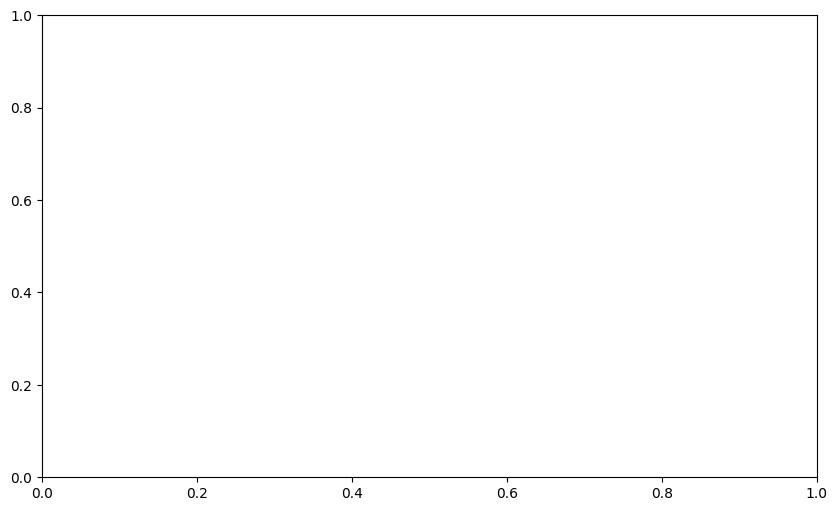

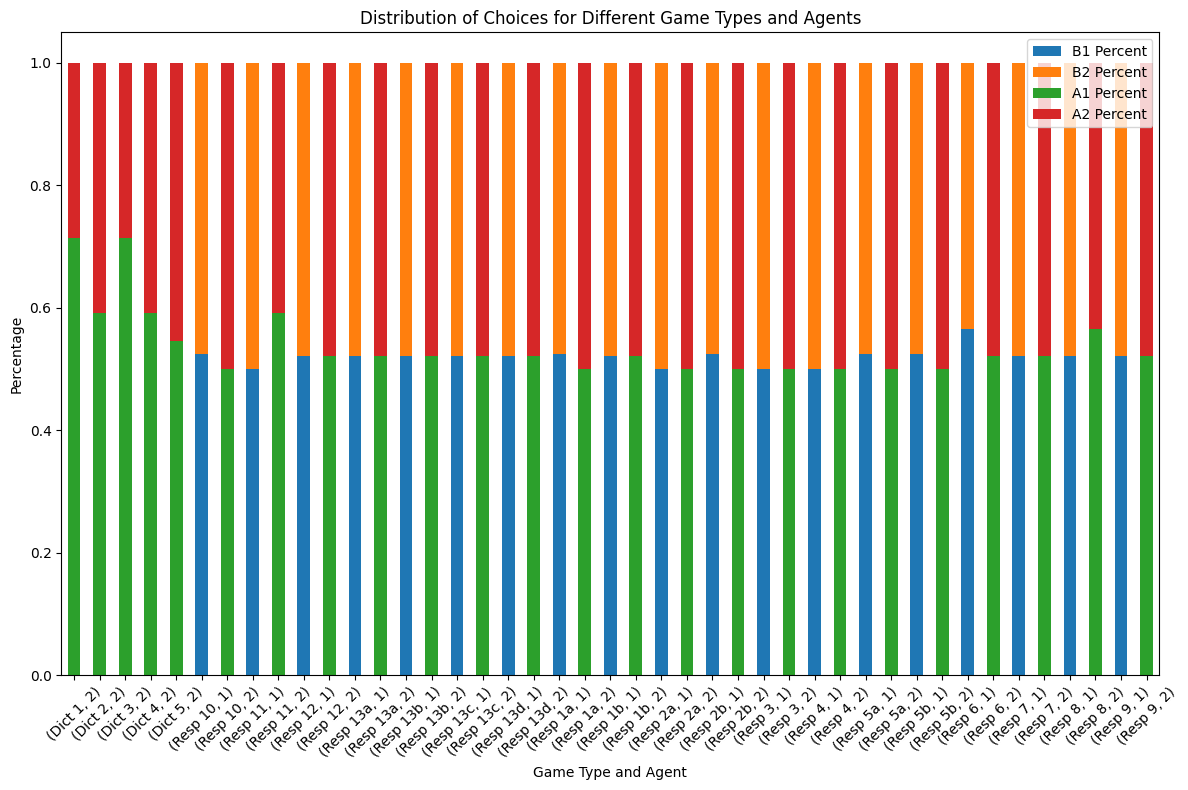

In [ ]:
import matplotlib.pyplot as plt

# Cleaning up the data
#newagent_tem0['B1_percent'] = newagent_tem0['B1_percent'].str.rstrip('%').astype('float') / 100.0
#newagent_tem0['B2_percent'] = newagent_tem0['B2_percent'].str.rstrip('%').astype('float') / 100.0
#newagent_tem0['A1_percent'] = newagent_tem0['A1_percent'].str.rstrip('%').astype('float') / 100.0
#newagent_tem0['A2_percent'] = newagent_tem0['A2_percent'].str.rstrip('%').astype('float') / 100.0

# Filling NaN with 0 for visualization
#newagent_tem0.fillna(0, inplace=True)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting the data without averaging
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
newagent_tem0.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']).plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'B2 Percent', 'A1 Percent', 'A2 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## get fine tuned model responses (temperature = 0.3)

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn."}


In [ ]:
# Define the function to get responses from the fine-tuned model
def get_model_responses(df, get_prompt):
    unique_game_types = df['game'].unique()
    responses = []

    for game_type in unique_game_types:
        unique_agents = df[df['game'] == game_type]['myrole'].unique()
        for agent in unique_agents:
            user_message_content = generate_participant_message(df, get_prompt, game_type, agent)
            user_message = {"role": "user", "content": user_message_content}

            # Call the model
            completion = client.chat.completions.create(
                model="ft:gpt-3.5-turbo-1106:yuanlab:4abm-hypertune:9V3bcrqp",
                messages=[
                    original_system_message,
                    user_message
                ],
                temperature=0.3
            )

            response = completion.choices[0].message.content
            responses.append({
                'game_type': game_type,
                'agent': agent,
                'response': response
            })

    return pd.DataFrame(responses)




In [ ]:
newagent_df = get_model_responses(df_control_cleaned, get_prompt)

game_type: Dict 1, agent: 2
parameters: 0, 0, 400, 400, 750, 400
Generated prompt: In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 400 and you will receive 400. If you choose B2, person A will receive 750 and you will receive 400. What will be your choice?
game_type: Dict 3, agent: 2
parameters: 0, 0, 300, 600, 700, 500
Generated prompt: In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 300 and you will receive 600. If you choose B2, person A will receive 700 and you will receive 500. What will be your choice?
game_type: Resp 1a, agent: 1
parameters: 750, 0, 400, 400, 750, 400
Generated prompt: In this period, you are person A. You may choose A1 or A2. If you choose A1, you will receive 750, and person B will receive 0. If you choose A2, then person B’s choice of B1 or B2 will determine the outcome. If you choose A

In [ ]:
newagent_df

game_type  agent                                           response
0     Dict 1      2  Here are 21 simulated participants and their c...
1     Dict 3      2  Here are the 21 new participants and their cho...
2    Resp 1a      1  Here are the 21 new participants and their cho...
3    Resp 1a      2  Here are 22 new participants and their decisio...
4    Resp 5a      2  Here are the 22 new participants and their cho...
5    Resp 5a      1  Here are the 21 new participants and their cho...
6    Resp 2b      1  Here are the 21 new participants and their cho...
7    Resp 2b      2  Here are the 22 new participants and their cho...
8    Resp 5b      1  Here are the 21 new participants with their de...
9    Resp 5b      2  Here are the 22 new participants and their cho...
10   Resp 10      1  Here are 21 new participants and their choices...
11   Resp 10      2  Here are the 22 participants and their choices...
12    Dict 2      2  Here are the 22 new participants and their cho...
13    Dict 4      2  Here are the 22 new participants and their cho...
14    Dict 5      2  Here are the 22 new participants and their cho...
15   Resp 2a      2  Here are the 22 new participants and their cho...
16   Resp 2a      1  Here are 22 new participants and their choices...
17    Resp 3      1  Here are 22 new participants and their choices...
18    Resp 3      2  Here are the 22 new participants and their cho...
19    Resp 4      2  Here are 22 new participants and their decisio...
20    Resp 4      1  Here are the 22 new participants and their cho...
21   Resp 11      1  Here are the 22 new participants and their cho...
22   Resp 11      2  Here are 22 new participants and their choices...
23    Resp 6      1  Here are 23 new participants and their choices...
24    Resp 6      2  Here are the 23 new participants and their cho...
25    Resp 8      1  Here are the 23 new participants and their cho...
26    Resp 8      2  Here are 23 new participants and their choices...
27    Resp 7      1  Here are 23 simulated participants and their c...
28    Resp 7      2  Here are the 23 new participants and their cho...
29    Resp 9      2  Here are the 23 new participants and their cho...
30    Resp 9      1  Here are the decisions, unique labels, demogra...
31   Resp 12      2  Here are 23 new participants and their choices...
32   Resp 12      1  Here are the 23 new participants and their cho...
33   Resp 1b      2  Here are 23 new participants and their choices...
34   Resp 1b      1  Here are the 23 new participants and their dec...
35  Resp 13a      2  Here are the 23 new participants and their cho...
36  Resp 13a      1  Here are 23 simulated participants and their c...
37  Resp 13b      2  Here are the 23 new participants and their cho...
38  Resp 13b      1  Sure, here are the 23 new participants and the...
39  Resp 13c      2  Here are the 23 new participants and their cho...
40  Resp 13c      1  Here are the 23 new participants and their cho...
41  Resp 13d      2  Here are the 23 new participants and their cho...
42  Resp 13d      1  Here are the 23 new participants and their cho...

In [ ]:
def extract_percentage(choice_label, text):
        match = re.search(rf"{choice_label}\s*[:\s]+\s*(\d+\.?\d*%)", text)
        return match.group(1) if match else None

In [ ]:
newagent_tem03['number_of_new_participants'] = newagent_tem03['response'].apply(lambda x: int(re.search(r"(\d+) new participants", x).group(1)) if re.search(r"(\d+) new participants", x) else None)

newagent_tem03['B1_percent'] = newagent_tem03['response'].apply(lambda x: extract_percentage("B1", x))
newagent_tem03['B2_percent'] = newagent_tem03['response'].apply(lambda x: extract_percentage("B2", x))
newagent_tem03['A1_percent'] = newagent_tem03['response'].apply(lambda x: extract_percentage("A1", x))
newagent_tem03['A2_percent'] = newagent_tem03['response'].apply(lambda x: extract_percentage("A2", x))

In [ ]:
newagent_tem03

game_type  agent                                           response  \
0     Dict 1      2  Here are 21 simulated participants and their c...   
1     Dict 3      2  Here are the 21 new participants and their cho...   
2    Resp 1a      1  Here are the 21 new participants and their cho...   
3    Resp 1a      2  Here are 22 new participants and their decisio...   
4    Resp 5a      2  Here are the 22 new participants and their cho...   
5    Resp 5a      1  Here are the 21 new participants and their cho...   
6    Resp 2b      1  Here are the 21 new participants and their cho...   
7    Resp 2b      2  Here are the 22 new participants and their cho...   
8    Resp 5b      1  Here are the 21 new participants with their de...   
9    Resp 5b      2  Here are the 22 new participants and their cho...   
10   Resp 10      1  Here are 21 new participants and their choices...   
11   Resp 10      2  Here are the 22 participants and their choices...   
12    Dict 2      2  Here are the 22 new participants and their cho...   
13    Dict 4      2  Here are the 22 new participants and their cho...   
14    Dict 5      2  Here are the 22 new participants and their cho...   
15   Resp 2a      2  Here are the 22 new participants and their cho...   
16   Resp 2a      1  Here are 22 new participants and their choices...   
17    Resp 3      1  Here are 22 new participants and their choices...   
18    Resp 3      2  Here are the 22 new participants and their cho...   
19    Resp 4      2  Here are 22 new participants and their decisio...   
20    Resp 4      1  Here are the 22 new participants and their cho...   
21   Resp 11      1  Here are the 22 new participants and their cho...   
22   Resp 11      2  Here are 22 new participants and their choices...   
23    Resp 6      1  Here are 23 new participants and their choices...   
24    Resp 6      2  Here are the 23 new participants and their cho...   
25    Resp 8      1  Here are the 23 new participants and their cho...   
26    Resp 8      2  Here are 23 new participants and their choices...   
27    Resp 7      1  Here are 23 simulated participants and their c...   
28    Resp 7      2  Here are the 23 new participants and their cho...   
29    Resp 9      2  Here are the 23 new participants and their cho...   
30    Resp 9      1  Here are the decisions, unique labels, demogra...   
31   Resp 12      2  Here are 23 new participants and their choices...   
32   Resp 12      1  Here are the 23 new participants and their cho...   
33   Resp 1b      2  Here are 23 new participants and their choices...   
34   Resp 1b      1  Here are the 23 new participants and their dec...   
35  Resp 13a      2  Here are the 23 new participants and their cho...   
36  Resp 13a      1  Here are 23 simulated participants and their c...   
37  Resp 13b      2  Here are the 23 new participants and their cho...   
38  Resp 13b      1  Sure, here are the 23 new participants and the...   
39  Resp 13c      2  Here are the 23 new participants and their cho...   
40  Resp 13c      1  Here are the 23 new participants and their cho...   
41  Resp 13d      2  Here are the 23 new participants and their cho...   
42  Resp 13d      1  Here are the 23 new participants and their cho...   

   B1_percent B2_percent A1_percent A2_percent  number_of_new_participants  
0       61.9%      38.1%       None       None                         NaN  
1      52.38%     47.62%       None       None                        21.0  
2        None       None     52.38%     47.62%                        21.0  
3         50%        50%       None       None                        22.0  
4      59.09%     40.91%       None       None                        22.0  
5        None       None     71.43%     28.57%                        21.0  
6        None       None     52.38%     47.62%                        21.0  
7       59.1%      40.9%       None       None                        22.0  
8        None       None     52.38%     47.62%       

In [ ]:
newagent_tem03.to_pickle('/content/drive/My Drive/social preference/newagent(tem=0.3)_df.pkl')

In [ ]:
newagent_tem03 = pd.read_pickle('/content/drive/My Drive/social preference/newagent(tem=0.3)_df.pkl')
newagent_tem03

game_type  agent                                           response  \
0     Dict 1      2  Here are 21 simulated participants and their c...   
1     Dict 3      2  Here are the 21 new participants and their cho...   
2    Resp 1a      1  Here are the 21 new participants and their cho...   
3    Resp 1a      2  Here are 22 new participants and their decisio...   
4    Resp 5a      2  Here are the 22 new participants and their cho...   
5    Resp 5a      1  Here are the 21 new participants and their cho...   
6    Resp 2b      1  Here are the 21 new participants and their cho...   
7    Resp 2b      2  Here are the 22 new participants and their cho...   
8    Resp 5b      1  Here are the 21 new participants with their de...   
9    Resp 5b      2  Here are the 22 new participants and their cho...   
10   Resp 10      1  Here are 21 new participants and their choices...   
11   Resp 10      2  Here are the 22 participants and their choices...   
12    Dict 2      2  Here are the 22 new participants and their cho...   
13    Dict 4      2  Here are the 22 new participants and their cho...   
14    Dict 5      2  Here are the 22 new participants and their cho...   
15   Resp 2a      2  Here are the 22 new participants and their cho...   
16   Resp 2a      1  Here are 22 new participants and their choices...   
17    Resp 3      1  Here are 22 new participants and their choices...   
18    Resp 3      2  Here are the 22 new participants and their cho...   
19    Resp 4      2  Here are 22 new participants and their decisio...   
20    Resp 4      1  Here are the 22 new participants and their cho...   
21   Resp 11      1  Here are the 22 new participants and their cho...   
22   Resp 11      2  Here are 22 new participants and their choices...   
23    Resp 6      1  Here are 23 new participants and their choices...   
24    Resp 6      2  Here are the 23 new participants and their cho...   
25    Resp 8      1  Here are the 23 new participants and their cho...   
26    Resp 8      2  Here are 23 new participants and their choices...   
27    Resp 7      1  Here are 23 simulated participants and their c...   
28    Resp 7      2  Here are the 23 new participants and their cho...   
29    Resp 9      2  Here are the 23 new participants and their cho...   
30    Resp 9      1  Here are the decisions, unique labels, demogra...   
31   Resp 12      2  Here are 23 new participants and their choices...   
32   Resp 12      1  Here are the 23 new participants and their cho...   
33   Resp 1b      2  Here are 23 new participants and their choices...   
34   Resp 1b      1  Here are the 23 new participants and their dec...   
35  Resp 13a      2  Here are the 23 new participants and their cho...   
36  Resp 13a      1  Here are 23 simulated participants and their c...   
37  Resp 13b      2  Here are the 23 new participants and their cho...   
38  Resp 13b      1  Sure, here are the 23 new participants and the...   
39  Resp 13c      2  Here are the 23 new participants and their cho...   
40  Resp 13c      1  Here are the 23 new participants and their cho...   
41  Resp 13d      2  Here are the 23 new participants and their cho...   
42  Resp 13d      1  Here are the 23 new participants and their cho...   

   B1_percent B2_percent A1_percent A2_percent  number_of_new_participants  
0       61.9%      38.1%       None       None                         NaN  
1      52.38%     47.62%       None       None                        21.0  
2        None       None     52.38%     47.62%                        21.0  
3         50%        50%       None       None                        22.0  
4      59.09%     40.91%       None       None                        22.0  
5        None       None     71.43%     28.57%                        21.0  
6        None       None     52.38%     47.62%                        21.0  
7       59.1%      40.9%       None       None                        22.0  
8        None       None     52.38%     47.62%       

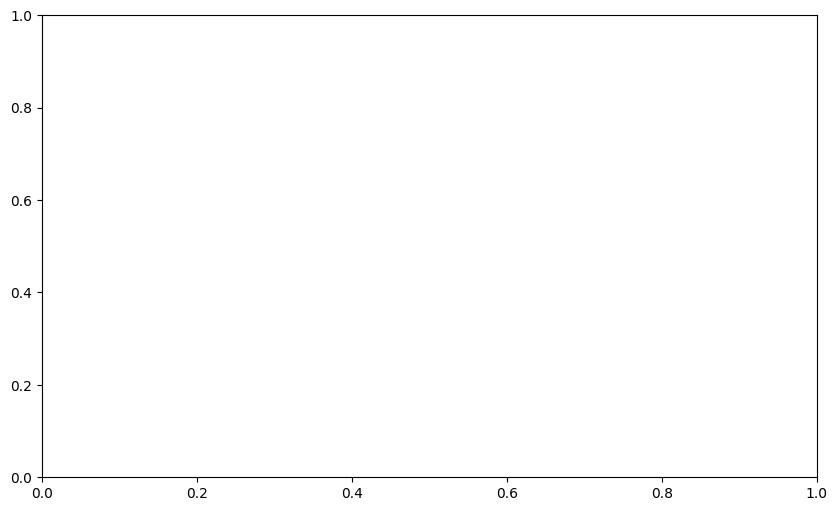

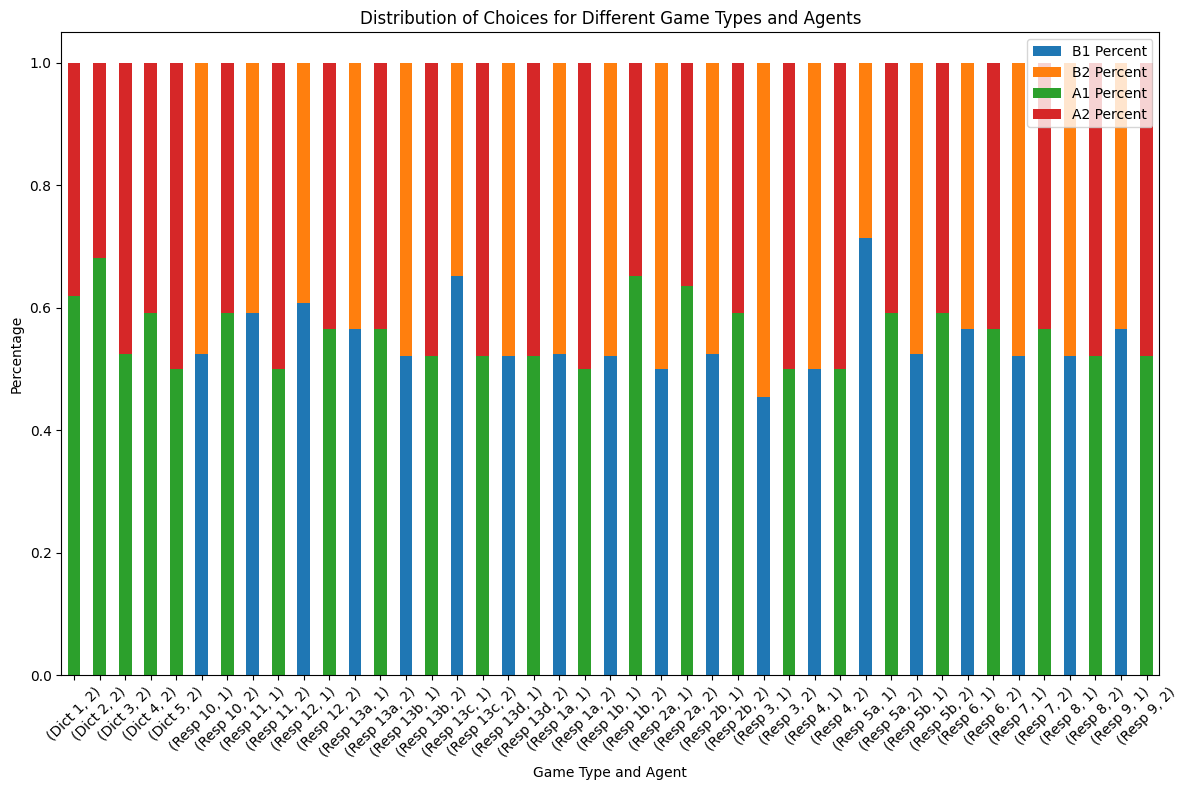

In [ ]:
import matplotlib.pyplot as plt

# Cleaning up the data
newagent_tem03['B1_percent'] = newagent_tem03['B1_percent'].str.rstrip('%').astype('float') / 100.0
newagent_tem03['B2_percent'] = newagent_tem03['B2_percent'].str.rstrip('%').astype('float') / 100.0
newagent_tem03['A1_percent'] = newagent_tem03['A1_percent'].str.rstrip('%').astype('float') / 100.0
newagent_tem03['A2_percent'] = newagent_tem03['A2_percent'].str.rstrip('%').astype('float') / 100.0

# Filling NaN with 0 for visualization
newagent_tem03.fillna(0, inplace=True)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting the data without averaging
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
newagent_tem03.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']).plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'B2 Percent', 'A1 Percent', 'A2 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (Revised) generate agent

## generate_participant_message

In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f"""Firstly, please generate 133 totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. {get_prompt(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage




In [ ]:
unique_game_types = df_control_cleaned['game'].unique()
unique_myroles = df_control_cleaned['myrole'].unique()

usermessages = []

for game_type in unique_game_types:
    for myrole in unique_myroles:
        usermessage = generate_participant_message(df_control_cleaned, get_prompt, game_type, myrole)
        usermessages.append(usermessage)

# Print all generated messages
for msg in usermessages:
    print(msg)
    print("\n---\n")

game_type: Dict 1, agent: 2
parameters: 0, 0, 400, 400, 750, 400
game_type: Dict 3, agent: 2
parameters: 0, 0, 300, 600, 700, 500
game_type: Resp 1a, agent: 2
parameters: 750, 0, 400, 400, 750, 400
game_type: Resp 1a, agent: 1
parameters: 750, 0, 400, 400, 750, 400
game_type: Resp 5a, agent: 2
parameters: 800, 0, 0, 800, 400, 400
game_type: Resp 5a, agent: 1
parameters: 800, 0, 0, 800, 400, 400
game_type: Resp 2b, agent: 2
parameters: 550, 550, 400, 400, 750, 375
game_type: Resp 2b, agent: 1
parameters: 550, 550, 400, 400, 750, 375
game_type: Resp 5b, agent: 2
parameters: 0, 800, 0, 800, 400, 400
game_type: Resp 5b, agent: 1
parameters: 0, 800, 0, 800, 400, 400
game_type: Resp 10, agent: 2
parameters: 375, 1000, 400, 400, 350, 350
game_type: Resp 10, agent: 1
parameters: 375, 1000, 400, 400, 350, 350
game_type: Dict 2, agent: 2
parameters: 0, 0, 400, 400, 750, 375
game_type: Dict 4, agent: 2
parameters: 0, 0, 200, 700, 600, 600
game_type: Dict 5, agent: 2
parameters: 0, 0, 0, 800, 400,

## get fine tuned model responses (temperature = 1) 133 new agents

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
# Define the function to get responses from the fine-tuned model
def get_model_responses(df, get_prompt):
    unique_game_types = df['game'].unique()
    responses = []

    for game_type in unique_game_types:
        unique_agents = df[df['game'] == game_type]['myrole'].unique()
        for agent in unique_agents:
            user_message_content = generate_participant_message(df, get_prompt, game_type, agent)
            user_message = {"role": "user", "content": user_message_content}

            # Call the model
            completion = client.chat.completions.create(
                model="ft:gpt-3.5-turbo-1106:yuanlab:4abm-revised2:9aLGjOwH",
                response_format={"type": "json_object"},
                messages=[
                    original_system_message,
                    user_message
                ],
                temperature=1
            )

            response = completion.choices[0].message.content
            responses.append({
                'game_type': game_type,
                'agent': agent,
                'response': response
            })

    return pd.DataFrame(responses)




In [ ]:
newagent_df_revised2_tem1 = get_model_responses(df_control_cleaned, get_prompt)

In [ ]:
newagent_df_revised2_tem1

game_type  agent                                           response
0     Dict 1      2  {"new_participants": [{"subject_id": "220502FE...
1     Dict 3      2  {"uniqueID": "050103b1-1b3d-4cab-85b6-8abff8fb...
2    Resp 1a      1  {"participantID":1,"age":22,"gender":"Male","n...
3    Resp 1a      2  {"Unique Subject ID": 1, "Age": 28, "Gender": ...
4    Resp 5a      2  {"profile": {"subject_id": 1, "age": 34, "gend...
5    Resp 5a      1  {"subjectID":1,"age":32,"gender":"Male","numbe...
6    Resp 2b      1  {"participantID":1,"age":21,"gender":"Male","n...
7    Resp 2b      2  {"subjectID":"1b1","age":18,"gender":"Male","n...
8    Resp 5b      1  {"subjectID":1,"age":21,"gender":"Male","numbe...
9    Resp 5b      2  {"participantID":1,"age":20,"gender":"Male","n...
10   Resp 10      1  {"Unique Subject ID": "0508-01010602", "Age": ...
11   Resp 10      2  {"uniqueId": "0061-7180627", "age": 26, "gende...
12    Dict 2      2  {"uniqueid":"041801","age":23,"gender":"Female...
13    Dict 4      2  {"prolificID":1,"subjectID":1,"age":20,"gender...
14    Dict 5      2  {"UniqueID":"PPL_055502030422","Age":27,"Gende...
15   Resp 2a      2  {"Unique ID":"s0011-00001","Age":19.0,"Gender"...
16   Resp 2a      1  {"subjectID": "040502OR-2", "age": 24, "gender...
17    Resp 3      1  {"subjectID":1,"age":21,"gender":"Male","numbe...
18    Resp 3      2  {"UniqueID":"PW0122233","Age":40,"Gender":"Fem...
19    Resp 4      2  {"subjectID": "05030804-6ee6-4e5a-9cb0-a30eb87...
20    Resp 4      1  {"participantID":"006a8e4b-ed39-43d3-895b-0a45...
21   Resp 11      1  {"uniqueID": "041b1f7c-8144-4a9d-8c8d-fffkkdb3...
22   Resp 11      2  {"Unique Subject ID": "02110001-002", "Age": 2...
23    Resp 6      1  {"subjectID":1,"age":35,"gender":"Female","num...
24    Resp 6      2  {"uniqueid":"220825852","age":25,"gender":"Fem...
25    Resp 8      1  {"subjectID":1,"age":28,"gender":"Male","numbe...
26    Resp 8      2  {"subjectID": "1111014255-3J9nvO4G-20", "age":...
27    Resp 7      1  {"subjectID":"022173887","age":24,"gender":"Ma...
28    Resp 7      2  {"subjectID": "457f8348-fc88-40f4-bf7a-d2c2042...
29    Resp 9      2  {"subject ID": "0RWG2QWK", "age": 39, "gender"...
30    Resp 9      1  {"subjectID":1,"age":20,"gender":"male","numbe...
31   Resp 12      2  {"Unique ID":"11236-3-1-4","Age":"30","Gender"...
32   Resp 12      1  {"Subject ID":"220801406EB","Age":23,"Gender":...
33   Resp 1b      2  {"Unique ID":"P4P11","Age":20,"Gender":"Male",...
34   Resp 1b      1  {"participantID":1,"age":21,"gender":"Male","n...
35  Resp 13a      2  {"uniqueID":1,"age":21,"gender":"male","numSib...
36  Resp 13a      1  {"subjectID":1,"age":25,"gender":"Male","numbe...
37  Resp 13b      2  {"uniqueId": "0401050f-fee9-419a-bdcb-18e47f87...
38  Resp 13b      1  {"uniqueID":1,"age":24,"gender":"Male","number...
39  Resp 13c      2  {"subjectID":1,"age":22,"gender":"Female","num...
40  Resp 13c      1  {"PID":1,"age":20,"gender":"female","number_of...
41  Resp 13d      2  {"uniqueID": "2301201622-3", "age": 20, "gende...
42  Resp 13d      1  {"participant_id":1,"age":25,"gender":"Male","...

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn."}


In [ ]:
# Define the function to get responses from the fine-tuned model
def get_model_responses(df, get_prompt):
    unique_game_types = df['game'].unique()
    responses = []

    for game_type in unique_game_types:
        unique_agents = df[df['game'] == game_type]['myrole'].unique()
        for agent in unique_agents:
            user_message_content = generate_participant_message(df, get_prompt, game_type, agent)
            user_message = {"role": "user", "content": user_message_content}

            # Call the model
            completion = client.chat.completions.create(
                model="ft:gpt-3.5-turbo-1106:yuanlab:4abm-revised2:9aLGjOwH",
                #response_format={"type": "json_object"},
                messages=[
                    original_system_message,
                    user_message
                ],
                temperature=1
            )

            response = completion.choices[0].message.content
            responses.append({
                'game_type': game_type,
                'agent': agent,
                'response': response
            })

    return pd.DataFrame(responses)

In [ ]:
no_json_newagent_df_revised2_tem1 = get_model_responses(df_control_cleaned, get_prompt)
no_json_newagent_df_revised2_tem1

game_type  agent                                           response
0     Dict 1      2  | Subject ID |   Age | Gender | # of Siblings ...
1     Dict 3      2  | Subject ID |   Age | Gender | # Siblings | D...
2    Resp 1a      1  | Subject ID | Age | Gender | # of Siblings | ...
3    Resp 1a      2  ID: 050403MB1152131; Age: 50; Gender: Male; No...
4    Resp 5a      2  Subject ID: 050303PO-20; Age: 25; Gender: Fema...
5    Resp 5a      1  Subject ID: 050335POT-10; Age: 34; Gender: Fem...
6    Resp 2b      1  Sure, here are the profiles:\n\nID: 050605UR20...
7    Resp 2b      2  Subject ID: 050118POM-11; Age: 23; Gender: Mal...
8    Resp 5b      1  Subject ID: 050307PQ-22; Age: 21; Gender: Male...
9    Resp 5b      2  Subject ID: 050116QG-1; Age: 23; Gender: Femal...
10   Resp 10      1  Subject ID: 050119-4; Age: 46; Gender: Male; N...
11   Resp 10      2  334;24;Male;0;No;I chose B1.;335;22;Male;0;No;...
12    Dict 2      2  Subject ID: 050902QRO-19; Age: 40; Gender: Fem...
13    Dict 4      2  Subject ID: 050301, Age: 22, Gender: Female, N...
14    Dict 5      2  Subject ID: 050323PQ-20; Age: 19; Gender: Fema...
15   Resp 2a      2  Here are the profiles: \n\n1-202214,21,M,1,1,B...
16   Resp 2a      1  Subject ID: 050306A2003-0; Age: 45; Gender: Ma...
17    Resp 3      1  859792; 20; female; 0; A2; \n315874; 38; male;...
18    Resp 3      2  Subject ID: 050413LJ-20; Age: 21; Gender: Fema...
19    Resp 4      2  Subject ID: 050326Parental consent: YesAge: 18...
20    Resp 4      1  subject ID,age,gender,number of siblings,donat...
21   Resp 11      1  Subject ID: 050301PI-14; Age: 21; Gender: Male...
22   Resp 11      2  Subject ID: 050524PQ-14; Age: 45; Gender: Male...
23    Resp 6      1  subject ID: 050131229IVR3-0; age: 45; gender: ...
24    Resp 6      2  ID: 051219NANTR-13; Age: 22; Gender: Male; Num...
25    Resp 8      1  | Subject ID |   Age | Gender | # Siblings | D...
26    Resp 8      2  Subject ID: 050801PAB-6; Age: 21; Gender: Fema...
27    Resp 7      1  Subject ID: 050805JP-12; Age: 18; Gender: Fema...
28    Resp 7      2  Subject ID: 050326OT-15; Age: 19; Gender: Fema...
29    Resp 9      2  Subject ID: 050401220B21412; Age: 21; Gender: ...
30    Resp 9      1  Subject ID: 050318AP-3; Age: 29; Gender: Femal...
31   Resp 12      2  Subject ID: 050219RW-17; Age: 26; Gender: Fema...
32   Resp 12      1  Here are the first 20 participants' profiles:\...
33   Resp 1b      2  Subject ID: 050306P, Age: 20, Gender: Female, ...
34   Resp 1b      1  Subject ID: 050325P3-3; Age: 36; Gender: Femal...
35  Resp 13a      2  Subject ID: 05040105PQ-16; Age: 20; Gender: Fe...
36  Resp 13a      1  110315;40;Female;3;No;n/a\n110316;35;Male;2;Ye...
37  Resp 13b      2    200310;40;Male;3;No;B1\n200748;37;Male;1;Yes;B1
38  Resp 13b      1  Subject ID: 050702CBL-03; Age: 21; Gender: Fem...
39  Resp 13c      2  Subject ID: 050101M21-2; Age: 25; Gender: Male...
40  Resp 13c      1  subject\tID:\t24031102OT19-33;\tage:\t22;\tgen...
41  Resp 13d      2  Subject ID: 050118PQ-11; Age: 19; Gender: Fema...
42  Resp 13d      1  Here are 133 totally new participants' profile...

## get fine tuned model responses (temperature = 1) 10 new agents

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f"""Firstly, please generate 10 totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. {get_prompt(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage



In [ ]:
#Define the function to get responses from the fine-tuned model
def get_model_responses(df, get_prompt):
    unique_game_types = df['game'].unique()
    responses = []

    for game_type in unique_game_types:
        unique_agents = df[df['game'] == game_type]['myrole'].unique()
        for agent in unique_agents:
            user_message_content = generate_participant_message(df, get_prompt, game_type, agent)
            user_message = {"role": "user", "content": user_message_content}

            # Call the model
            completion = client.chat.completions.create(
                model="ft:gpt-3.5-turbo-1106:yuanlab:4abm-revised2:9aLGjOwH",
                response_format={"type": "json_object"},
                messages=[
                    original_system_message,
                    user_message
                ],
                temperature=1
            )

            response = completion.choices[0].message.content
            responses.append({
                'game_type': game_type,
                'agent': agent,
                'response': response
            })

    return pd.DataFrame(responses)


In [ ]:
new10agent_df_revised2_tem1 = get_model_responses(df_control_cleaned, get_prompt)
new10agent_df_revised2_tem1

game_type  agent                                           response
0     Dict 1      2  {"SubjectID":"22061301","Age":21,"Gender":"Fem...
1     Dict 3      2  {"subjectID": "050105NS-1", "age": 31, "gender...
2    Resp 1a      1  {\n  "participant_profiles": [\n    {\n      "...
3    Resp 1a      2  {"participantID":"0329429501","age":22,"gender...
4    Resp 5a      2  {"subjectID": "3d8f56ef-5949-4cbf-b1b7-3d6f022...
5    Resp 5a      1  {"Subject ID": "334e3d20-ccc7-446a-aabe-90c5b4...
6    Resp 2b      1  {"subjectID": "2205-092137BA", "age": 35, "gen...
7    Resp 2b      2  {"subjectID": "p002", "age": 39, "gender": "Ma...
8    Resp 5b      1  {"Subject ID": "202_rpPq4", "Age": 26, "Gender...
9    Resp 5b      2  {"subjectID":20766,"age":40,"gender":"Male","n...
10   Resp 10      1  {"prolific_pid": "616e4eb3e6825a1f1e8deaaa", "...
11   Resp 10      2  {"uniqueID":"0209-023","age":18,"gender":"fema...
12    Dict 2      2  {"subjectID": "220245-4-1", "age": 45, "gender...
13    Dict 4      2  {"sub_ID": "2209-1029338", "age": 31, "gender"...
14    Dict 5      2  {"subjectID": "050401FR-16", "age": 25, "gende...
15   Resp 2a      2  {"subjectID": "1102217010", "age": 23, "gender...
16   Resp 2a      1  {"subjectID":"0206202111JP","age":18,"gender":...
17    Resp 3      1  {"subjectID": "2264-80", "age": 45, "gender": ...
18    Resp 3      2  {"subjectID": "3116-37-AD", "age": 20, "gender...
19    Resp 4      2  {"Subject ID":"41G1T9","Age":27,"Gender":"Fema...
20    Resp 4      1  {"subjectID":1,"age":64,"gender":"Male","numbe...
21   Resp 11      1  {"ID":"0214109041","Age":21,"Gender":"Male","N...
22   Resp 11      2  {"participantID":1,"age":19,"gender":"male","n...
23    Resp 6      1  {"subjectID": "2200014316", "age": 23, "gender...
24    Resp 6      2  {"subjectID":"2205319926079","age":23,"gender"...
25    Resp 8      1  {"subjectID": "130220TH-3", "age": 22, "gender...
26    Resp 8      2  {"subjectID": "01310136","age": 19,"gender": "...
27    Resp 7      1  {"Unique Subject ID":"02084513","Age":18,"Gend...
28    Resp 7      2  {"Subject ID": "1003-10-6", "Age": 18, "Gender...
29    Resp 9      2  {"participantID":"0129-222302-1105","age":20,"...
30    Resp 9      1  {"subjectID": "220829", "age": 21, "gender": "...
31   Resp 12      2  {"subjectID": "220616MT-15", "age": 64, "gende...
32   Resp 12      1  {"SubjectID": "221004", "Age": 26, "Gender": "...
33   Resp 1b      2  {"subjectID": "e6c2118d-e57b-4b8b-a432-595ae9b...
34   Resp 1b      1  {"subjectID": "231232PY-1", "age": 22, "gender...
35  Resp 13a      2  {"subjectID": "c4bea5d4-dffd-4c40-9d4b-8b6d19d...
36  Resp 13a      1  {"subjectID": "fc6c6f7e-3085-4caf-b7d6-f218ec7...
37  Resp 13b      2  {"Subject ID": "22011601", "Age": 19, "Gender"...
38  Resp 13b      1  {"participantID":"2209009854","age":20,"gender...
39  Resp 13c      2  {"subjectID": "034f03af-c1bf-49a5-ad3e-19ed889...
40  Resp 13c      1  {"subjectID": "03156240-7cb9-41ff-b66f-1032655...
41  Resp 13d      2  {"sub_id": "221-36-7117", "age": 60, "gender":...
42  Resp 13d      1  {"subjectID": "1afda1e0-6c4e-47ac-a68c-fdadd71...

In [ ]:
#Define the function to get responses from the fine-tuned model
def get_model_responses(df, get_prompt):
    unique_game_types = df['game'].unique()
    responses = []

    for game_type in unique_game_types:
        unique_agents = df[df['game'] == game_type]['myrole'].unique()
        for agent in unique_agents:
            user_message_content = generate_participant_message(df, get_prompt, game_type, agent)
            user_message = {"role": "user", "content": user_message_content}

            # Call the model
            completion = client.chat.completions.create(
                model="ft:gpt-3.5-turbo-1106:yuanlab:4abm-revised2:9aLGjOwH",
                #response_format={"type": "json_object"},
                messages=[
                    original_system_message,
                    user_message
                ],
                temperature=1
            )

            response = completion.choices[0].message.content
            responses.append({
                'game_type': game_type,
                'agent': agent,
                'user_message': user_message,
                'response': response,
                'completion': completion

            })

    return pd.DataFrame(responses)

In [ ]:
nojson_new10agent_df_revised2_tem1 = get_model_responses(df_control_cleaned, get_prompt)
nojson_new10agent_df_revised2_tem1

game_type  agent                                       user_message  \
0     Dict 1      2  {'role': 'user', 'content': 'Please generate o...   
1     Dict 3      2  {'role': 'user', 'content': 'Please generate o...   
2    Resp 1a      1  {'role': 'user', 'content': 'Please generate o...   
3    Resp 1a      2  {'role': 'user', 'content': 'Please generate o...   
4    Resp 5a      2  {'role': 'user', 'content': 'Please generate o...   
5    Resp 5a      1  {'role': 'user', 'content': 'Please generate o...   
6    Resp 2b      1  {'role': 'user', 'content': 'Please generate o...   
7    Resp 2b      2  {'role': 'user', 'content': 'Please generate o...   
8    Resp 5b      1  {'role': 'user', 'content': 'Please generate o...   
9    Resp 5b      2  {'role': 'user', 'content': 'Please generate o...   
10   Resp 10      1  {'role': 'user', 'content': 'Please generate o...   
11   Resp 10      2  {'role': 'user', 'content': 'Please generate o...   
12    Dict 2      2  {'role': 'user', 'content': 'Please generate o...   
13    Dict 4      2  {'role': 'user', 'content': 'Please generate o...   
14    Dict 5      2  {'role': 'user', 'content': 'Please generate o...   
15   Resp 2a      2  {'role': 'user', 'content': 'Please generate o...   
16   Resp 2a      1  {'role': 'user', 'content': 'Please generate o...   
17    Resp 3      1  {'role': 'user', 'content': 'Please generate o...   
18    Resp 3      2  {'role': 'user', 'content': 'Please generate o...   
19    Resp 4      2  {'role': 'user', 'content': 'Please generate o...   
20    Resp 4      1  {'role': 'user', 'content': 'Please generate o...   
21   Resp 11      1  {'role': 'user', 'content': 'Please generate o...   
22   Resp 11      2  {'role': 'user', 'content': 'Please generate o...   
23    Resp 6      1  {'role': 'user', 'content': 'Please generate o...   
24    Resp 6      2  {'role': 'user', 'content': 'Please generate o...   
25    Resp 8      1  {'role': 'user', 'content': 'Please generate o...   
26    Resp 8      2  {'role': 'user', 'content': 'Please generate o...   
27    Resp 7      1  {'role': 'user', 'content': 'Please generate o...   
28    Resp 7      2  {'role': 'user', 'content': 'Please generate o...   
29    Resp 9      2  {'role': 'user', 'content': 'Please generate o...   
30    Resp 9      1  {'role': 'user', 'content': 'Please generate o...   
31   Resp 12      2  {'role': 'user', 'content': 'Please generate o...   
32   Resp 12      1  {'role': 'user', 'content': 'Please generate o...   
33   Resp 1b      2  {'role': 'user', 'content': 'Please generate o...   
34   Resp 1b      1  {'role': 'user', 'content': 'Please generate o...   
35  Resp 13a      2  {'role': 'user', 'content': 'Please generate o...   
36  Resp 13a      1  {'role': 'user', 'content': 'Please generate o...   
37  Resp 13b      2  {'role': 'user', 'content': 'Please generate o...   
38  Resp 13b      1  {'role': 'user', 'content': 'Please generate o...   
39  Resp 13c      2  {'role': 'user', 'content': 'Please generate o...   
40  Resp 13c      1  {'role': 'user', 'content': 'Please generate o...   
41  Resp 13d      2  {'role': 'user', 'content': 'Please generate o...   
42  Resp 13d      1  {'role': 'user', 'content': 'Please generate o...   

                                             response  \
0   {"subjectID":6708,"age":20,"gender":"Female","...   
1   {"subjectID": "2021-11-02-08-40-31-522_6_7", "...   
2   Sure, here is the profile of the participant i...   
3   {"subjectID":"20221106-01","age":18,"gender":"...   
4   {"subjectID": "2024-110108PQ-3", "age": 35, "g...   
5   {"subjectID":"20201216_14","age":21,"gender":"...   
6   {"subjectID": "202027009", "age": 24, "gender"...   
7   {"subjectID": "20202-011103TT-1-3-2", "age": 4...   
8   {"subjectID": "2020000002", "age": 21, "gender...   
9   {"subjectID": "20210618SP01", "age": 43, "gend...   
10  {"subjectID": "2021-08876-3", "age": 20, "gend...   
11  {"subjectID": "E20221004BE070213D36462P0452C8D...   
12  {

## get fine tuned model responses (temperature = 1) 1 new agents

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
user_message1 = {"role": "user", "content": "Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. You are this new agent."}

In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f""" {get_prompt_ABM(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage



In [ ]:
# Define the function to get responses from the fine-tuned model
def get_model_responses(df, get_prompt):
    unique_game_types = df['game'].unique()
    responses = []

    for game_type in unique_game_types:
        unique_agents = df[df['game'] == game_type]['myrole'].unique()
        for agent in unique_agents:

            # Call the model for the first message
            completion1 = client.chat.completions.create(
                model="ft:gpt-3.5-turbo-1106:yuanlab:4abm-revised2:9aLGjOwH",
                response_format={"type": "json_object"},
                messages=[
                    original_system_message,
                    user_message1
                ],
                temperature=1
            )
            response1 = completion1.choices[0].message.content

            # Generate the second user message content based on the first response
            user_message_content = generate_participant_message(df, get_prompt_ABM, game_type, agent)
            user_message2 = {"role": "user", "content": user_message_content}

            # Call the model for the second message
            completion2 = client.chat.completions.create(
                model="ft:gpt-3.5-turbo-1106:yuanlab:4abm-revised2:9aLGjOwH",
                response_format={"type": "json_object"},
                messages=[
                    original_system_message,
                    user_message1,
                    {"role": "assistant", "content": response1},
                    user_message2
                ],
                temperature=0
            )
            response2 = completion2.choices[0].message.content

            # Append the responses to the list
            responses.append({
                'game_type': game_type,
                'agent': agent,
                'user_message1': user_message1,
                'response1': response1,
                'user_message2': user_message2,
                'response2': response2,
                'completion1': completion1,
                'completion2': completion2
            })

    return pd.DataFrame(responses)


In [ ]:
reason_new1agent_df_revised2_tem1 = get_model_responses(df_control_cleaned, get_prompt)
reason_new1agent_df_revised2_tem1

game_type: Dict 1, agent: 2
parameters: 0, 0, 400, 400, 750, 400
Generated prompt: In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 400 and you will receive 400. If you choose B2, person A will receive 750 and you will receive 400.Please first reason step-by-step and put it in {"reason": "Your reasoning here"}.Then put your choice in {"choice": "B1 or B2"}.
game_type: Dict 3, agent: 2
parameters: 0, 0, 300, 600, 700, 500
Generated prompt: In this period, you are person B. You may choose B1 or B2. Person A has no choice in this game. If you choose B1, person A will receive 300 and you will receive 600. If you choose B2, person A will receive 700 and you will receive 500.Please first reason step-by-step and put it in {"reason": "Your reasoning here"}.Then put your choice in {"choice": "B1 or B2"}.
game_type: Resp 1a, agent: 1
parameters: 750, 0, 400, 400, 750, 400
Generated prompt: In this period, you 

game_type  agent                                      user_message1  \
0     Dict 1      2  {'role': 'user', 'content': 'Please generate o...   
1     Dict 3      2  {'role': 'user', 'content': 'Please generate o...   
2    Resp 1a      1  {'role': 'user', 'content': 'Please generate o...   
3    Resp 1a      2  {'role': 'user', 'content': 'Please generate o...   
4    Resp 5a      2  {'role': 'user', 'content': 'Please generate o...   
5    Resp 5a      1  {'role': 'user', 'content': 'Please generate o...   
6    Resp 2b      1  {'role': 'user', 'content': 'Please generate o...   
7    Resp 2b      2  {'role': 'user', 'content': 'Please generate o...   
8    Resp 5b      1  {'role': 'user', 'content': 'Please generate o...   
9    Resp 5b      2  {'role': 'user', 'content': 'Please generate o...   
10   Resp 10      1  {'role': 'user', 'content': 'Please generate o...   
11   Resp 10      2  {'role': 'user', 'content': 'Please generate o...   
12    Dict 2      2  {'role': 'user', 'content': 'Please generate o...   
13    Dict 4      2  {'role': 'user', 'content': 'Please generate o...   
14    Dict 5      2  {'role': 'user', 'content': 'Please generate o...   
15   Resp 2a      2  {'role': 'user', 'content': 'Please generate o...   
16   Resp 2a      1  {'role': 'user', 'content': 'Please generate o...   
17    Resp 3      1  {'role': 'user', 'content': 'Please generate o...   
18    Resp 3      2  {'role': 'user', 'content': 'Please generate o...   
19    Resp 4      2  {'role': 'user', 'content': 'Please generate o...   
20    Resp 4      1  {'role': 'user', 'content': 'Please generate o...   
21   Resp 11      1  {'role': 'user', 'content': 'Please generate o...   
22   Resp 11      2  {'role': 'user', 'content': 'Please generate o...   
23    Resp 6      1  {'role': 'user', 'content': 'Please generate o...   
24    Resp 6      2  {'role': 'user', 'content': 'Please generate o...   
25    Resp 8      1  {'role': 'user', 'content': 'Please generate o...   
26    Resp 8      2  {'role': 'user', 'content': 'Please generate o...   
27    Resp 7      1  {'role': 'user', 'content': 'Please generate o...   
28    Resp 7      2  {'role': 'user', 'content': 'Please generate o...   
29    Resp 9      2  {'role': 'user', 'content': 'Please generate o...   
30    Resp 9      1  {'role': 'user', 'content': 'Please generate o...   
31   Resp 12      2  {'role': 'user', 'content': 'Please generate o...   
32   Resp 12      1  {'role': 'user', 'content': 'Please generate o...   
33   Resp 1b      2  {'role': 'user', 'content': 'Please generate o...   
34   Resp 1b      1  {'role': 'user', 'content': 'Please generate o...   
35  Resp 13a      2  {'role': 'user', 'content': 'Please generate o...   
36  Resp 13a      1  {'role': 'user', 'content': 'Please generate o...   
37  Resp 13b      2  {'role': 'user', 'content': 'Please generate o...   
38  Resp 13b      1  {'role': 'user', 'content': 'Please generate o...   
39  Resp 13c      2  {'role': 'user', 'content': 'Please generate o...   
40  Resp 13c      1  {'role': 'user', 'content': 'Please generate o...   
41  Resp 13d      2  {'role': 'user', 'content': 'Please generate o...   
42  Resp 13d      1  {'role': 'user', 'content': 'Please generate o...   

                                            response1  \
0   {"subjectID":"2021-09231-01","age":26,"gender"...   
1   {"subjectID":"2021P324Q15","age":21,"gender":"...   
2   {"subjectID":"2021gFuVx","age":24,"gender":"Ma...   
3   {"subjectID": "20211023-06", "age": 30, "gende...   
4   {"subjectID": "20210607-0134-26827", "age": 60...   
5   {"subjectID": "032104B059", "age": 23, "gender...   
6   {"subjectID":"2021-06-14-13-29-42-7","age":24,...   
7   {"subjectID": "2021-06-08-13-00-49-764-3690838...   
8   {"subjectID": "2212020029", "age": 23, "gender...   
9   {"subjectID":"2022-1123-14-16-14-086-7fefaea13...   
10  {"subjectID": "2209-608320E6-300E-4812-8ABD-65...   
11  {"subjectID":"20220204001","age":18,"gender":"...   
12  {

In [ ]:
reason_new1agent_df_revised2_tem1.to_pickle('/content/drive/My Drive/social preference/reason_new1agent_df_revised2_tem1.pkl')

### visualize demographics

Error parsing JSON: Expecting ':' delimiter: line 1 column 3706 (char 3705) at position 3705


<ipython-input-78-1bbbddee4fb4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['age'] = cleaned_data['age'].astype(int)
<ipython-input-78-1bbbddee4fb4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['numberSiblings'] = cleaned_data['numberSiblings'].astype(int)
<ipython-input-78-1bbbddee4fb4>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

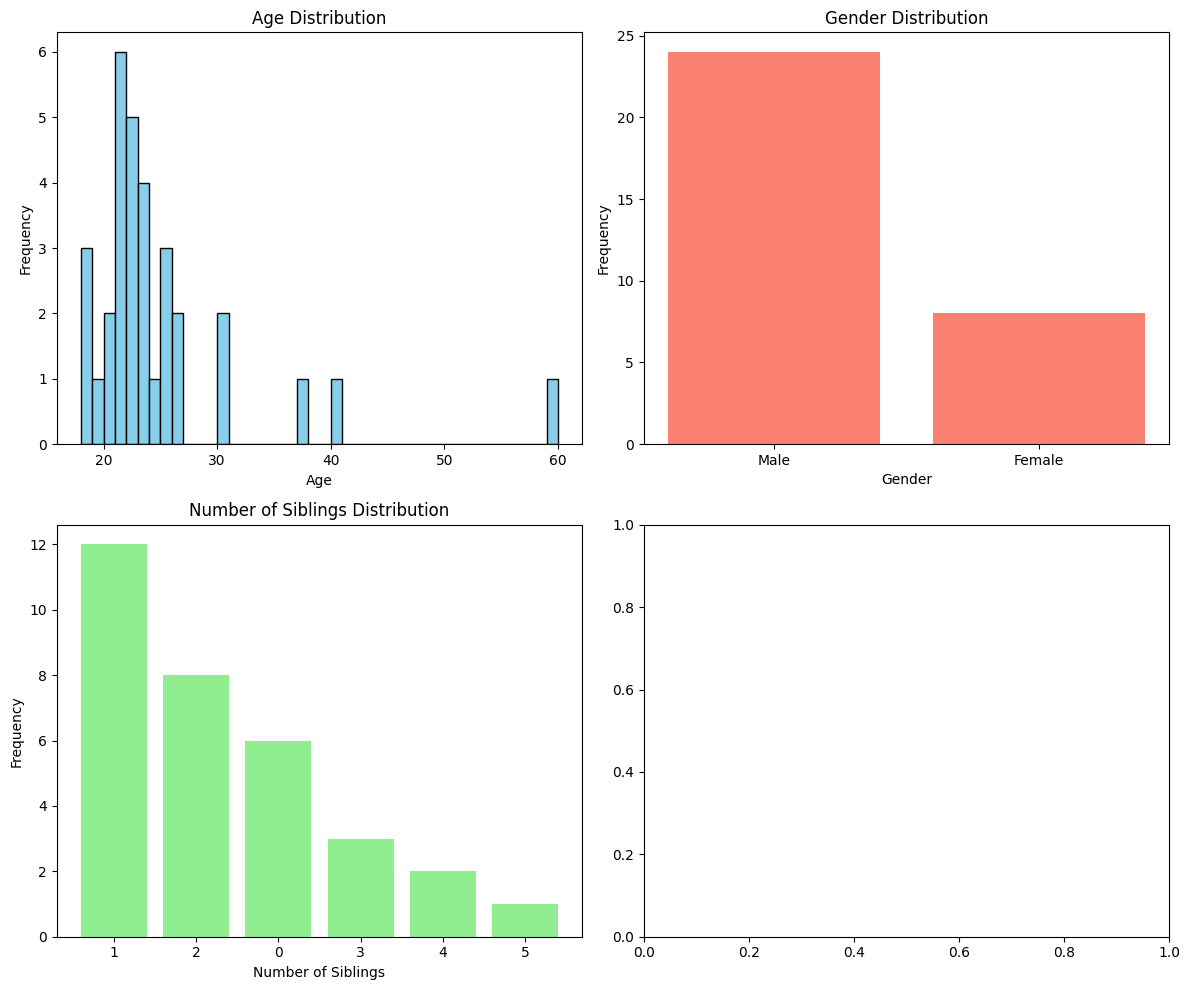

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Assuming your DataFrame is already loaded and named reason_new1agent_df_revised2_tem1

# Function to extract 'age', 'gender', and 'numberSiblings' from JSON string
def extract_demographics(json_str):
    try:
        data = json.loads(json_str)
        return pd.Series([data.get('age'), data.get('gender'), data.get('numberSiblings')])
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e} at position {e.pos}")
        return pd.Series([None, None, None])
    except Exception as e:
        print(f"Unhandled error: {e}")
        return pd.Series([None, None, None])

# Apply the function to extract demographics
reason_new1agent_df_revised2_tem1[['age', 'gender', 'numberSiblings']] = reason_new1agent_df_revised2_tem1['response1'].apply(extract_demographics)

# Clean the data: Remove rows with NaN values in 'age', 'gender', or 'numberSiblings'
cleaned_data = reason_new1agent_df_revised2_tem1.dropna(subset=['age', 'gender', 'numberSiblings'])

# Convert 'age' and 'numberSiblings' to integer type
cleaned_data['age'] = cleaned_data['age'].astype(int)
cleaned_data['numberSiblings'] = cleaned_data['numberSiblings'].astype(int)

# Capitalize gender values
cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axs[0, 0].hist(cleaned_data['age'], bins=range(min(cleaned_data['age']), max(cleaned_data['age']) + 1), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Gender Distribution
gender_counts = cleaned_data['gender'].value_counts()
axs[0, 1].bar(gender_counts.index, gender_counts.values, color='salmon')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Frequency')

# Number of Siblings Distribution
siblings_counts = cleaned_data['numberSiblings'].value_counts()
axs[1, 0].bar(siblings_counts.index.map(str), siblings_counts.values, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



<ipython-input-79-1b52aa909eae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()


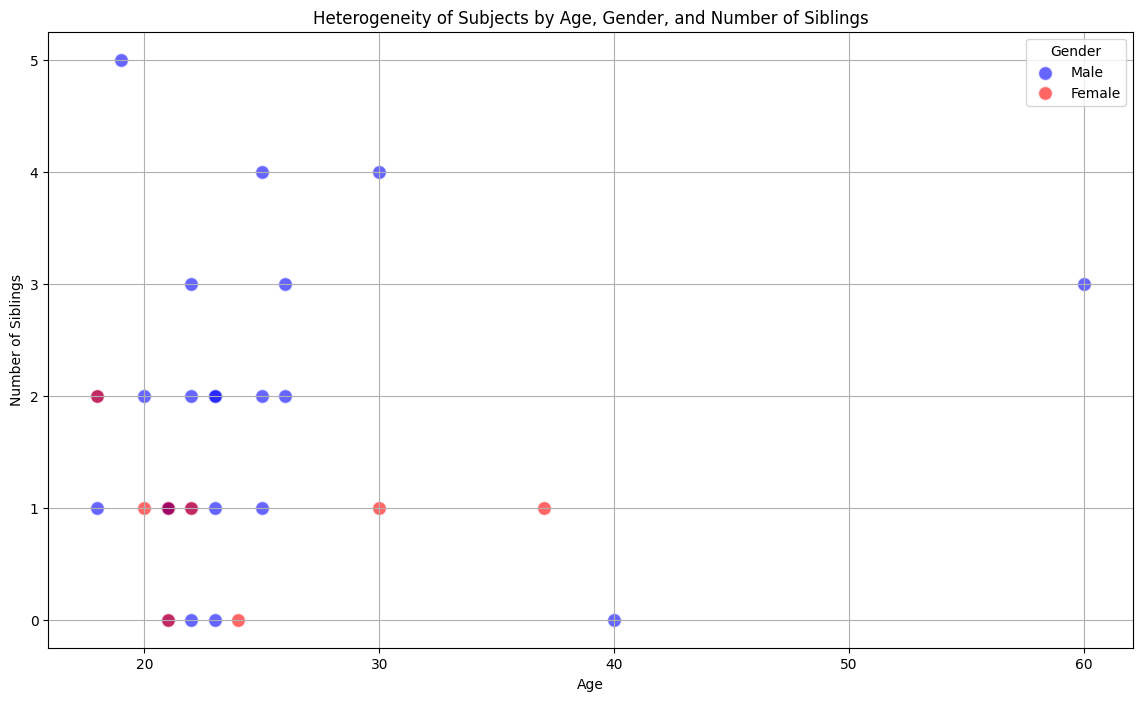

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Capitalize gender values to ensure consistency
cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Create a scatter plot
plt.figure(figsize=(14, 8))

# Use different colors or markers for different genders
genders = cleaned_data['gender'].unique()
colors = ['blue', 'red', 'green']  # Add more colors if there are more gender categories

for gender, color in zip(genders, colors):
    subset = cleaned_data[cleaned_data['gender'] == gender]
    plt.scatter(subset['age'], subset['numberSiblings'], label=gender, color=color, alpha=0.6, edgecolors='w', s=100)

plt.title('Heterogeneity of Subjects by Age, Gender, and Number of Siblings')
plt.xlabel('Age')
plt.ylabel('Number of Siblings')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


In [ ]:
cleaned_data

game_type  agent                                      user_message1  \
0     Dict 1      2  {'role': 'user', 'content': 'Please generate o...   
1     Dict 3      2  {'role': 'user', 'content': 'Please generate o...   
3    Resp 1a      2  {'role': 'user', 'content': 'Please generate o...   
4    Resp 5a      2  {'role': 'user', 'content': 'Please generate o...   
5    Resp 5a      1  {'role': 'user', 'content': 'Please generate o...   
6    Resp 2b      1  {'role': 'user', 'content': 'Please generate o...   
7    Resp 2b      2  {'role': 'user', 'content': 'Please generate o...   
8    Resp 5b      1  {'role': 'user', 'content': 'Please generate o...   
10   Resp 10      1  {'role': 'user', 'content': 'Please generate o...   
11   Resp 10      2  {'role': 'user', 'content': 'Please generate o...   
13    Dict 4      2  {'role': 'user', 'content': 'Please generate o...   
14    Dict 5      2  {'role': 'user', 'content': 'Please generate o...   
15   Resp 2a      2  {'role': 'user', 'content': 'Please generate o...   
16   Resp 2a      1  {'role': 'user', 'content': 'Please generate o...   
17    Resp 3      1  {'role': 'user', 'content': 'Please generate o...   
20    Resp 4      1  {'role': 'user', 'content': 'Please generate o...   
21   Resp 11      1  {'role': 'user', 'content': 'Please generate o...   
22   Resp 11      2  {'role': 'user', 'content': 'Please generate o...   
23    Resp 6      1  {'role': 'user', 'content': 'Please generate o...   
25    Resp 8      1  {'role': 'user', 'content': 'Please generate o...   
27    Resp 7      1  {'role': 'user', 'content': 'Please generate o...   
28    Resp 7      2  {'role': 'user', 'content': 'Please generate o...   
30    Resp 9      1  {'role': 'user', 'content': 'Please generate o...   
31   Resp 12      2  {'role': 'user', 'content': 'Please generate o...   
32   Resp 12      1  {'role': 'user', 'content': 'Please generate o...   
33   Resp 1b      2  {'role': 'user', 'content': 'Please generate o...   
34   Resp 1b      1  {'role': 'user', 'content': 'Please generate o...   
35  Resp 13a      2  {'role': 'user', 'content': 'Please generate o...   
36  Resp 13a      1  {'role': 'user', 'content': 'Please generate o...   
38  Resp 13b      1  {'role': 'user', 'content': 'Please generate o...   
39  Resp 13c      2  {'role': 'user', 'content': 'Please generate o...   
41  Resp 13d      2  {'role': 'user', 'content': 'Please generate o...   

                                            response1  \
0   {"subjectID":"2021-09231-01","age":26,"gender"...   
1   {"subjectID":"2021P324Q15","age":21,"gender":"...   
3   {"subjectID": "20211023-06", "age": 30, "gende...   
4   {"subjectID": "20210607-0134-26827", "age": 60...   
5   {"subjectID": "032104B059", "age": 23, "gender...   
6   {"subjectID":"2021-06-14-13-29-42-7","age":24,...   
7   {"subjectID": "2021-06-08-13-00-49-764-3690838...   
8   {"subjectID": "2212020029", "age": 23, "gender...   
10  {"subjectID": "2209-608320E6-300E-4812-8ABD-65...   
11  {"subjectID":"20220204001","age":18,"gender":"...   
13  {"subjectID":"2020110501","age":18,"gender":"M...   
14  {"subjectID": "210805207", "age": 21, "gender"...   
15  {"subjectID":"2020-0218-0856-2167","age":25,"g...   
16  {"subjectID":"202SP307-1","age":23,"gender":"M...   
17  {"subjectID": "22040115", "age": 20, "gender":...   
20  {"subjectID": "2021-09-02-11-35-42-852-6915d75...   
21  {"subjectID": "2021P11234", "age": 37, "gender...   
22  {"subjectID": "22031101", "age": 21, "gender":...   
23  {"subjectID": "2023-007-01", "age": 18, "gende...   
25  {"subjectID": "210604-11", "age": 23, "gender"...   
27  {"subjectID":"202QVQ9-3","age":21,"gender":"Fe...   
28  {"subjectID": "220519WEB_3", "age": 22, "gende...   
30  {"subjectID":"2021-12-08T14:31:00.762Z","age":...   
31  {"subjectID":"2022040403","age":19,"gender":"M...   
32  {"subjectID": "22012318", "age": 25, "gender":...   
33  {"subjectID": "202EX040002", "age": 40, "gende...   
34  {"subjectID":"201

## **get fine tuned model responses (temperature = 1 + 1) 50 new agents**

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
#manipulate
agentonly_df

Unnamed: 0                                          response1  \
0            0  {"subjectID":601222,"age":50,"gender":0,"numbe...   
1            1  {"subjectID": "181203SR-18", "age": 20, "gende...   
2            2  {"subjectID": "210103PQ-15", "age": 19, "gende...   
3            3  {"subjectID": "210914009", "age": 21, "gender"...   
4            4  {"subjectID": "20210921_home_75_4", "age": 34,...   
..         ...                                                ...   
86          86  {"subjectID": "0505025", "age": 27, "gender": ...   
87          87  {"subjectID": "712", "age": 20, "gender": 1, "...   
88          88  {"subjectID": "100303FQ-015", "age": 21, "gend...   
89          89  {"subjectID": "031316A", "age": 21, "gender": ...   
90          90  {"subjectID": "211124","age": 37,"gender": 0,"...   

             subjectID  age  gender  numberofsiblings  \
0               601222   50       1                 2   
1          181203SR-18   20       1                 2   
2          210103PQ-15   19       0                 1   
3            210914009   21       0                 2   
4   20210921_home_75_4   34       1                 4   
..                 ...  ...     ...               ...   
86             0505025   27       0                 0   
87                 712   20       0                 1   
88        100303FQ-015   21       1                 0   
89             031316A   21       1                 0   
90              211124   37       1                 2   

                                         gamestrategy  
0   Try to earn as much money as possible for me a...  
1   Try to earn as much money as possible and help...  
2   Try to earn as much money as possible for me a...  
3   Try to help my match if it did not cost me any...  
4   Try to earn as many points as possible for mys...  
..                                                ...  
86  I try to find a balance between my payoff and ...  
87                                Maximize own payoff  
88  My game strategy was to earn as much money as ...  
89  Try to help the other person as much as possib...  
90  Try to earn as many points as possible for mys...  

[91 rows x 7 columns]

In [ ]:
agentonly_df_test = agentonly_df[:2]
agentonly_df_test

Unnamed: 0                                          response1    subjectID  \
0           0  {"subjectID":601222,"age":50,"gender":0,"numbe...       601222   
1           1  {"subjectID": "181203SR-18", "age": 20, "gende...  181203SR-18   

   age  gender  numberofsiblings  \
0   50       1                 2   
1   20       1                 2   

                                        gamestrategy  
0  Try to earn as much money as possible for me a...  
1  Try to earn as much money as possible and help...

In [ ]:
user_message1_content = f"""Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. You are this new agent. You should format your output as JSON with the following structure: {{'subjectID': the unique ID of the subject, 'age': the age of the subject, 'gender': the gender of the subject, 'numberSiblings': the number of siblings the subject has,'donation': the donation history of the subject,'strategy': the game strategy(ies) used in the game}}"""
user_message1 = {"role": "user", "content": user_message1_content}

In [ ]:
print(user_message1)

{'role': 'user', 'content': "Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. You are this new agent. You should format your output as JSON with the following structure: {'subjectID': the unique ID of the subject, 'age': the age of the subject, 'gender': the gender of the subject, 'numberSiblings': the number of siblings the subject has,'donation': the donation history of the subject,'strategy': the game strategy(ies) used in the game}"}


In [ ]:
data = [
    {'myrole': 2, 'game': 'Dict 1'},
    {'myrole': 2, 'game': 'Dict 2'},
    {'myrole': 2, 'game': 'Dict 3'},
    {'myrole': 2, 'game': 'Dict 4'},
    {'myrole': 2, 'game': 'Dict 5'},
    {'myrole': 1, 'game': 'Resp 10'},
    {'myrole': 2, 'game': 'Resp 10'},
    {'myrole': 1, 'game': 'Resp 12'},
    {'myrole': 2, 'game': 'Resp 12'},
    {'myrole': 1, 'game': 'Resp 13a'},
    {'myrole': 2, 'game': 'Resp 13a'},
    {'myrole': 1, 'game': 'Resp 13b'},
    {'myrole': 2, 'game': 'Resp 13b'},
    {'myrole': 1, 'game': 'Resp 13c'},
    {'myrole': 2, 'game': 'Resp 13c'},
    {'myrole': 1, 'game': 'Resp 13d'},
    {'myrole': 2, 'game': 'Resp 13d'},
    {'myrole': 1, 'game': 'Resp 1a'},
    {'myrole': 2, 'game': 'Resp 1a'},
    {'myrole': 1, 'game': 'Resp 1b'},
    {'myrole': 2, 'game': 'Resp 1b'},
    {'myrole': 1, 'game': 'Resp 2a'},
    {'myrole': 2, 'game': 'Resp 2a'},
    {'myrole': 1, 'game': 'Resp 2b'},
    {'myrole': 2, 'game': 'Resp 2b'},
    {'myrole': 1, 'game': 'Resp 3'},
    {'myrole': 2, 'game': 'Resp 3'},
    {'myrole': 1, 'game': 'Resp 4'},
    {'myrole': 2, 'game': 'Resp 4'},
    {'myrole': 1, 'game': 'Resp 5a'},
    {'myrole': 2, 'game': 'Resp 5a'},
    {'myrole': 1, 'game': 'Resp 5b'},
    {'myrole': 2, 'game': 'Resp 5b'},
    {'myrole': 1, 'game': 'Resp 6'},
    {'myrole': 2, 'game': 'Resp 6'},
    {'myrole': 1, 'game': 'Resp 7'},
    {'myrole': 2, 'game': 'Resp 7'},
    {'myrole': 1, 'game': 'Resp 8'},
    {'myrole': 2, 'game': 'Resp 8'},
    {'myrole': 1, 'game': 'Resp 9'},
    {'myrole': 2, 'game': 'Resp 9'},
    {'myrole': 1, 'game': 'Resp 11'},
    {'myrole': 2, 'game': 'Resp 11'}
]

# Convert the list of dictionaries to a DataFrame
game_combinations_df = pd.DataFrame(data)



In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f""" {get_prompt_ABM(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage



### get_model_responses

In [ ]:
def get_model_responses(sample_df, game_combinations_df):
    completions = []
    responses = []


    # Call the model for the first message
    completion1 = client.chat.completions.create(
        model="ft:gpt-4o-2024-05-13:yuanlab:4o:9kC1gGRZ",
        response_format={"type": "json_object"},
        messages=[
            original_system_message,
            user_message1
        ],
        temperature=1
    )
    response1 = completion1.choices[0].message.content

    try:
        # Parse the JSON response content
        response1_json = json.loads(response1)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Response1 content: {response1}")
        return pd.DataFrame()  # Return an empty DataFrame on error

    # Append the initial response to the responses list
    #responses.append({
        #'user_message1': user_message1,
        #'response1': response1
    #})

    # Iterate through the combinations DataFrame
    for i, row in game_combinations_df.iterrows():
        game_type = row['game']
        agent = row['myrole']
        user_message_content = generate_participant_message(sample_df, get_prompt_ABM, game_type, agent)
        user_message2 = {"role": "user", "content": user_message_content}

        # Call the model for the second message
        completion2 = client.chat.completions.create(
            model="ft:gpt-4o-2024-05-13:yuanlab:4o:9kC1gGRZ",
            response_format={"type": "json_object"},
            messages=[
                original_system_message,
                user_message1,
                {"role": "assistant", "content": response1},
                user_message2
            ],
            temperature=1. #CHANGED
        )
        response2 = completion2.choices[0].message.content

        try:
            # Extract reason and choice from the response
            response2_json = json.loads(response2)
            #reason = response2_json.get('reason', '')
            choice = response2_json.get('choice', '')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Response2 content: {response2}")
            reason = response2  # Fall back to raw response text for reason
            choice = response2  # Fall back to raw response text for choice

        # Append the responses to the responses list
        responses.append({
            'response1': response1,
            'subjectID': response1_json['subjectID'],
            #'age': response1_json['age'],
            #'gender': response1_json['gender'],
            #'numberofsiblings': response1_json['numberSiblings'],
            #'gamestrategy': response1_json['strategy'],
            'game_prompt': user_message2['content'],
            'game_type': game_type,
            'agent': agent,
            'response2': response2,
            #'reason': reason,
            'choice': choice
        })

    # Convert the responses list to a DataFrame
    responses_df = pd.DataFrame(responses)

    return responses_df


In [ ]:
one_agent_df = get_model_responses(df_control_cleaned, game_combinations_df)
one_agent_df

response1   subjectID  \
0   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
1   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
2   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
3   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
4   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
5   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
6   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
7   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
8   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
9   {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
10  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
11  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
12  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
13  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
14  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
15  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
16  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
17  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
18  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
19  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
20  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
21  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
22  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
23  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
24  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
25  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
26  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
27  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
28  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
29  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
30  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
31  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
32  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
33  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
34  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
35  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
36  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
37  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
38  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
39  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
40  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
41  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   
42  {\n    "subjectID": 9034013002,\n    "age": 29...  9034013002   

                                          game_prompt game_type  agent  \
0    In this period, you are person B. You may cho...    Dict 1      2   
1    In this period, you are person B. You may cho...    Dict 2      2   
2    In this period, you are person B. You may cho...    Dict 3      2   
3    In this period, you are person B. You may cho...    Dict 4      2   
4    In this period, you are person B. You may cho...    Dict 5      2   
5    In this period, you are person A. You may cho...   Resp 10      1   
6    In this period, you are person B. You may cho...   Resp 10      2   
7    In this period, you are person A. You may cho...   Resp 12      1   
8    In this period, you are person B. You may cho...   Resp 12      2   
9    In this period, you are person A. You may cho...  Resp 13a      1   
10   In this period, you are person B. You may cho...  Resp 13a      2   
11   In this period, you are person A. You may cho...  Resp 13b      1   
12   In this period, you are person B. You ma

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### get_multiple_agents_responses

In [ ]:
def get_multiple_agents_responses(sample_df, game_combinations_df, num_agents):
    all_responses = []

    for _ in range(num_agents):
        responses_df = get_model_responses(sample_df, game_combinations_df)
        all_responses.append(responses_df)

    # Concatenate all the individual responses DataFrames
    multiagents_responses_df = pd.concat(all_responses, ignore_index=True)

    return multiagents_responses_df

In [ ]:
ft_multiagents_responses_df = get_multiple_agents_responses(df_control_cleaned, game_combinations_df, num_agents=50)
ft_multiagents_responses_df

response1   subjectID  \
0     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
1     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
2     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
3     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
4     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
...                                                 ...         ...   
2145  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2146  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2147  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2148  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2149  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   

                                            game_prompt game_type  agent  \
0      In this period, you are person B. You may cho...    Dict 1      2   
1      In this period, you are person B. You may cho...    Dict 2      2   
2      In this period, you are person B. You may cho...    Dict 3      2   
3      In this period, you are person B. You may cho...    Dict 4      2   
4      In this period, you are person B. You may cho...    Dict 5      2   
...                                                 ...       ...    ...   
2145   In this period, you are person B. You may cho...    Resp 8      2   
2146   In this period, you are person A. You may cho...    Resp 9      1   
2147   In this period, you are person B. You may cho...    Resp 9      2   
2148   In this period, you are person A. You may cho...   Resp 11      1   
2149   In this period, you are person B. You may cho...   Resp 11      2   

                                              response2 choice  
0     {\n  "reason": "In this game, my choice is bet...     B2  
1     {\n  "reason": "In this game, my choice is B1 ...     B2  
2     {\n  "reason": "In this game, my choice is bet...     B1  
3     {\n  "reason": "In this game, my choice is bet...     B1  
4     {\n  "reason": "In this game, my choice is bet...     B1  
...                                                 ...    ...  
2145  {\n    "reason": "In this game, my decision on...     B1  
2146  {\n    "reason": "In this game, my choice is b...     A2  
2147  {\n    "reason": "In this game, my decision is...     B2  
2148  {\n    "reason": "In this game, my decision is...     A1  
2149  {\n    "reason": "In this game, my choice only...     B1  

[2150 rows x 7 columns]

In [ ]:
ft_multiagents_responses_df.to_csv('/content/drive/My Drive/social preference/ft4o_multiagents50_responses_df.csv')

In [ ]:
ft_multiagents_responses_df = pd.read_csv('/content/drive/My Drive/social preference/ft4o_multiagents50_responses_df.csv')
ft_multiagents_responses_df

Unnamed: 0                                          response1  \
0              0  {\n  "subjectID": "20230201-8",\n  "age": 33,\...   
1              1  {\n  "subjectID": "20230201-8",\n  "age": 33,\...   
2              2  {\n  "subjectID": "20230201-8",\n  "age": 33,\...   
3              3  {\n  "subjectID": "20230201-8",\n  "age": 33,\...   
4              4  {\n  "subjectID": "20230201-8",\n  "age": 33,\...   
...          ...                                                ...   
2145        2145  {\n    "subjectID": 1234561,\n    "age": 26,\n...   
2146        2146  {\n    "subjectID": 1234561,\n    "age": 26,\n...   
2147        2147  {\n    "subjectID": 1234561,\n    "age": 26,\n...   
2148        2148  {\n    "subjectID": 1234561,\n    "age": 26,\n...   
2149        2149  {\n    "subjectID": 1234561,\n    "age": 26,\n...   

       subjectID                                        game_prompt game_type  \
0     20230201-8   In this period, you are person B. You may cho...    Dict 1   
1     20230201-8   In this period, you are person B. You may cho...    Dict 2   
2     20230201-8   In this period, you are person B. You may cho...    Dict 3   
3     20230201-8   In this period, you are person B. You may cho...    Dict 4   
4     20230201-8   In this period, you are person B. You may cho...    Dict 5   
...          ...                                                ...       ...   
2145     1234561   In this period, you are person B. You may cho...    Resp 8   
2146     1234561   In this period, you are person A. You may cho...    Resp 9   
2147     1234561   In this period, you are person B. You may cho...    Resp 9   
2148     1234561   In this period, you are person A. You may cho...   Resp 11   
2149     1234561   In this period, you are person B. You may cho...   Resp 11   

      agent                                          response2 choice  
0         2  {\n  "reason": "In this game, my choice is bet...     B2  
1         2  {\n  "reason": "In this game, my choice is B1 ...     B2  
2         2  {\n  "reason": "In this game, my choice is bet...     B1  
3         2  {\n  "reason": "In this game, my choice is bet...     B1  
4         2  {\n  "reason": "In this game, my choice is bet...     B1  
...     ...                                                ...    ...  
2145      2  {\n    "reason": "In this game, my decision on...     B1  
2146      1  {\n    "reason": "In this game, my choice is b...     A2  
2147      2  {\n    "reason": "In this game, my decision is...     B2  
2148      1  {\n    "reason": "In this game, my decision is...     A1  
2149      2  {\n    "reason": "In this game, my choice only...     B1  

[2150 rows x 8 columns]

### visualized choice

In [ ]:
import pandas as pd


# Group the data by game_type and agent, then calculate the counts and percentages of each choice within each group
grouped = ft_multiagents_responses_df.groupby(['game_type', 'agent', 'choice']).size().reset_index(name='counts')
total_counts = grouped.groupby(['game_type', 'agent'])['counts'].transform('sum')
grouped['percentage'] = grouped['counts'] / total_counts

# Pivot the data for easier manipulation
pivot_df = grouped.pivot_table(index=['game_type', 'agent'], columns='choice', values='percentage', fill_value=pd.NA)
pivot_df.columns = [f"{col}_percent" for col in pivot_df.columns]

# Merge the counts back to the pivot_df to get the number_of_new_participants
counts_df = grouped.groupby(['game_type', 'agent'])['counts'].sum().reset_index(name='number_of_new_participants')
final_df = pd.merge(counts_df, pivot_df.reset_index(), on=['game_type', 'agent'])

# Reorder columns to match the example
final_df_ft50 = final_df[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]

# Display the final DataFrame
final_df_ft50

game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.10        0.90   
1     Dict 2      2                          50        0.70        0.30   
2     Dict 3      2                          50        0.64        0.36   
3     Dict 4      2                          50        0.66        0.34   
4     Dict 5      2                          50        0.48        0.52   
5    Resp 10      1                          50         NaN         NaN   
6    Resp 10      2                          50        1.00         NaN   
7    Resp 11      1                          50         NaN         NaN   
8    Resp 11      2                          50        0.94        0.06   
9    Resp 12      1                          49         NaN         NaN   
10   Resp 12      2                          50        0.94        0.06   
11  Resp 13a      1                          50         NaN         NaN   
12  Resp 13a      2                          50        0.94        0.06   
13  Resp 13b      1                          50         NaN         NaN   
14  Resp 13b      2                          50        1.00         NaN   
15  Resp 13c      1                          50         NaN         NaN   
16  Resp 13c      2                          50        0.92        0.08   
17  Resp 13d      1                          50         NaN         NaN   
18  Resp 13d      2                          50        0.96        0.04   
19   Resp 1a      1                          50         NaN         NaN   
20   Resp 1a      2                          50        0.30        0.70   
21   Resp 1b      1                          50         NaN         NaN   
22   Resp 1b      2                          50        0.30        0.70   
23   Resp 2a      1                          50         NaN         NaN   
24   Resp 2a      2                          50        0.68        0.32   
25   Resp 2b      1                          50         NaN         NaN   
26   Resp 2b      2                          50        0.78        0.22   
27    Resp 3      1                          50         NaN         NaN   
28    Resp 3      2                          50        0.54        0.46   
29    Resp 4      1                          50         NaN         NaN   
30    Resp 4      2                          50        0.44        0.54   
31   Resp 5a      1                          50         NaN         NaN   
32   Resp 5a      2                          50        0.52        0.48   
33   Resp 5b      1                          50         NaN         NaN   
34   Resp 5b      2                          50        0.58        0.42   
35    Resp 6      1                          50         NaN         NaN   
36    Resp 6      2                          50        0.20        0.80   
37    Resp 7      1                          50         NaN         NaN   
38    Resp 7      2                          50        0.30        0.70   
39    Resp 8      1                          50         NaN         NaN   
40    Resp 8      2                          50        0.74        0.24   
41    Resp 9      1                          50         NaN         NaN   
42    Resp 9      2                          50        0.74        0.26   

    A1_percent  A2_percent  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  
3          NaN         NaN  
4          NaN         NaN  
5     0.680000    0.320000  
6          NaN         NaN  
7     0.960000    0.040000  
8          NaN         NaN  
9     0.816327    0.183673  
10         NaN         NaN  
11    0.720000    0.280000  
12         NaN         NaN  
13    0.920000    0.080000  
14         NaN         NaN  
15    0.900000    0.100000  
16         NaN         NaN  
17    0.920000    0.080000  
18         NaN         NaN  
19    0.620000    0.380000  
20         NaN         NaN  
21    0.740000    0.260000  
22         NaN         NaN  
23    

In [ ]:
final_df_ft50.to_csv('/content/drive/My Drive/social preference/final_df_4oft50.csv', index=False)

In [ ]:
# Convert percentage columns to counts for the final dataset
final_df_ft50['B1_count'] = (final_df_ft50['B1_percent'] * final_df_ft50['number_of_new_participants']).round().astype(int)
final_df_ft50['B2_count'] = (final_df_ft50['B2_percent'] * final_df_ft50['number_of_new_participants']).round().astype(int)
final_df_ft50['A1_count'] = (final_df_ft50['A1_percent'] * final_df_ft50['number_of_new_participants']).round().astype(int)
final_df_ft50['A2_count'] = (final_df_ft50['A2_percent'] * final_df_ft50['number_of_new_participants']).round().astype(int)

ft50_count_df = final_df_ft50[['game_type', 'agent', 'number_of_new_participants', 'B1_count', 'B2_count', 'A1_count', 'A2_count']].copy()
ft50_count_df.loc[ft50_count_df['agent'] == 1, ['B1_count', 'B2_count']] = np.nan
ft50_count_df.loc[ft50_count_df['agent'] == 2, ['A1_count', 'A2_count']] = np.nan
ft50_count_df

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<ipython-input-51-0c616d5e944c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_ft50.fillna(0, inplace=True)


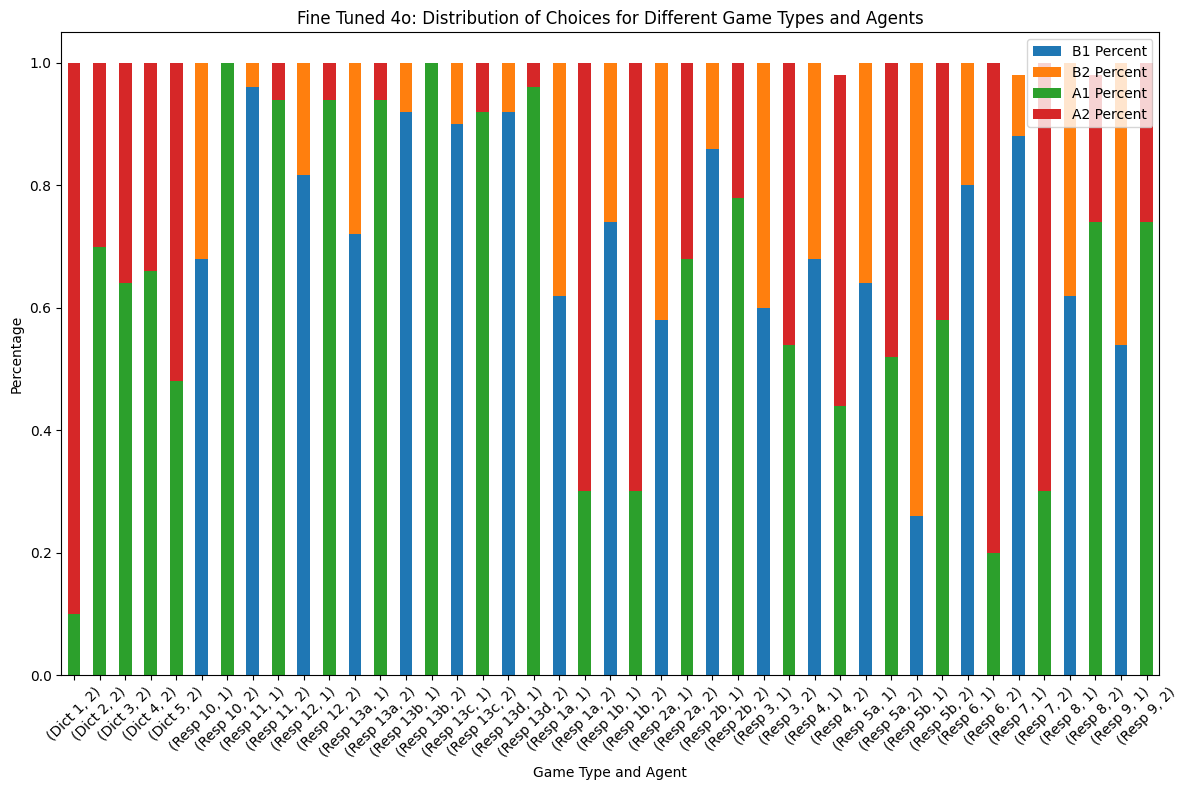

In [ ]:
import matplotlib.pyplot as plt



# Filling NaN with 0 for visualization
final_df_ft50.fillna(0, inplace=True)

# Plotting the data without averaging
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_ft50.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']).plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Fine Tuned 4o: Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'B2 Percent', 'A1 Percent', 'A2 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-29-9a50addb1cca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_ft50.fillna(0, inplace=True)


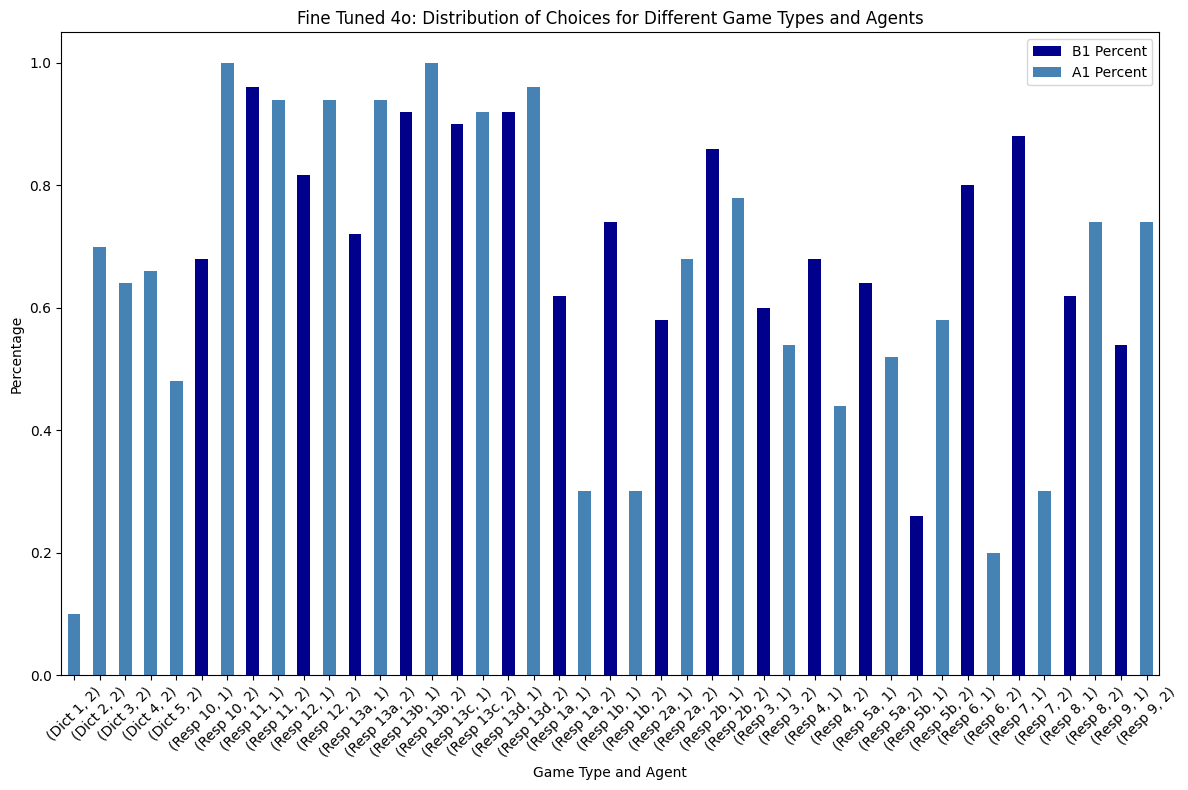

In [ ]:

# Filling NaN with 0 for visualization
final_df_ft50.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_ft50.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Fine Tuned 4o: Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### visualized demographics

In [ ]:
ft_multiagents_responses_df

response1   subjectID  \
0     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
1     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
2     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
3     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
4     {\n  "subjectID": "20230201-8",\n  "age": 33,\...  20230201-8   
...                                                 ...         ...   
2145  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2146  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2147  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2148  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   
2149  {\n    "subjectID": 1234561,\n    "age": 26,\n...     1234561   

                                            game_prompt game_type  agent  \
0      In this period, you are person B. You may cho...    Dict 1      2   
1      In this period, you are person B. You may cho...    Dict 2      2   
2      In this period, you are person B. You may cho...    Dict 3      2   
3      In this period, you are person B. You may cho...    Dict 4      2   
4      In this period, you are person B. You may cho...    Dict 5      2   
...                                                 ...       ...    ...   
2145   In this period, you are person B. You may cho...    Resp 8      2   
2146   In this period, you are person A. You may cho...    Resp 9      1   
2147   In this period, you are person B. You may cho...    Resp 9      2   
2148   In this period, you are person A. You may cho...   Resp 11      1   
2149   In this period, you are person B. You may cho...   Resp 11      2   

                                              response2 choice  
0     {\n  "reason": "In this game, my choice is bet...     B2  
1     {\n  "reason": "In this game, my choice is B1 ...     B2  
2     {\n  "reason": "In this game, my choice is bet...     B1  
3     {\n  "reason": "In this game, my choice is bet...     B1  
4     {\n  "reason": "In this game, my choice is bet...     B1  
...                                                 ...    ...  
2145  {\n    "reason": "In this game, my decision on...     B1  
2146  {\n    "reason": "In this game, my choice is b...     A2  
2147  {\n    "reason": "In this game, my decision is...     B2  
2148  {\n    "reason": "In this game, my decision is...     A1  
2149  {\n    "reason": "In this game, my choice only...     B1  

[2150 rows x 7 columns]

In [ ]:
# store 50 new agents' demo
import pandas as pd
import json


def extract_fields(json_str):
    try:
        data = json.loads(json_str)
        return pd.Series({
            'age': data.get('age'),
            'gender': data.get('gender'),
            'numberSiblings': data.get('numberSiblings'),
            'strategy': data.get('strategy')
        })
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return pd.Series({
            'age': None,
            'gender': None,
            'numberSiblings': None,
            'strategy': None
        })

# Apply the function to the 'response1' column
ft_multiagents_responses_df[['age', 'gender', 'numberSiblings', 'strategy']] = ft_multiagents_responses_df['response1'].apply(extract_fields)

# Group by 'subjectID' and take the first occurrence of each field
agents50_demo_ft = ft_multiagents_responses_df.groupby('subjectID').agg({
    'age': 'first',
    'gender': 'first',
    'numberSiblings': 'first',
    'strategy': 'first'
}).reset_index()


In [ ]:
agents50_demo_ft

subjectID   age  gender  numberSiblings  \
0                                    001  23.0       2             1.0   
1                             001-01-001  25.0       1             0.0   
2                             001-03-010  34.0  Female             2.0   
3                   001-04-230926-013101  35.0      NA             0.0   
4                                   0095  29.0       2             2.0   
5                             02100102-5  19.0    Male             0.0   
6                    0534-3129-0377-5078  26.0  female             2.0   
7                                      1  32.0  Female             1.0   
8                              100000002  22.0       0             1.0   
9                                   1001  29.0  Female             1.0   
10                              10010015  33.0    Male             1.0   
11                               1003002  31.0  female             0.0   
12                             100701001  21.0    male             1.0   
13                            1007011001  19.0    male             2.0   
14                                   101  20.0  Female             1.0   
15                            1020671006  22.0       2             1.0   
16                            1055026-14  22.0       2             3.0   
17                               1234561  26.0       2             2.0   
18  12803201-4dbd-4181-af60-713b5150f73d  23.0       1             2.0   
19                                 17001  24.0       2             0.0   
20                                     2  34.0       1             1.0   
21                   2001-5e59-4adc-a08e  19.0  female             1.0   
22                            2011001-11  24.0       1             1.0   
23            2023-10-04-12-26-10-000000  21.0       1             2.0   
24            2023-10-09-08-43-25-697613  24.0       1             2.0   
25                            2023010505  22.0  female             0.0   
26                            20230201-8  33.0  Female             1.0   
27                            2023031003  30.0       2             1.0   
28                              20233002  23.0       1             0.0   
29                                300008  24.0       1             1.0   
30                                 9-1-7  30.0       1             9.0   
31                             Lab-12-01  25.0       3             3.0   
32                              Lab-4-12  33.0    Male             1.0   
33                                 P-001  30.0  female             0.0   
34                                  P-01  24.0       0             1.0   
35                                PID-01  25.0  Female             1.0   
36                             lab-10-01  21.0       1             0.0   
37                                  p-05  55.0       1             2.0   

                                             strategy  
0                                Maximize own payoff.  
1   Try to earn as much money as possible for myself.  
2   [Try to earn as much money as possible regardl...  
3   Try to choose the option that gives you the hi...  
4   Try to earn as much money as possible for me a...  
5   Try to earn as much money as possible for myse...  
6   Try to earn as much money as possible for me a...  
7              Try to earn as much money as possible.  
8   In each game, I tried to earn as much money as...  
9       Try to choose equal payoff for self and match  
10  Maximize own payoff;Choose equal payoff when p...  
11  Try to help my match if it does not cost me an...  
12     Try to earn as much money as possible for you.  
13  Try to earn as much money as possible for me a...  
14  Try to earn as much money as possible for myse...  
15  Try to earn as much money as possible for myself.  
16  Help others if it was of no cost or low cost t...  
17  My goal was to earn as much money as possible ...  
18  Try to only earn own payoff.;Try to earn as mu...  
19  [Try to earn as much

In [ ]:
agents50_demo_ft.to_csv('agents50_demo_ft.csv', index=False)

NameError: name 'agents50_demo_ft' is not defined

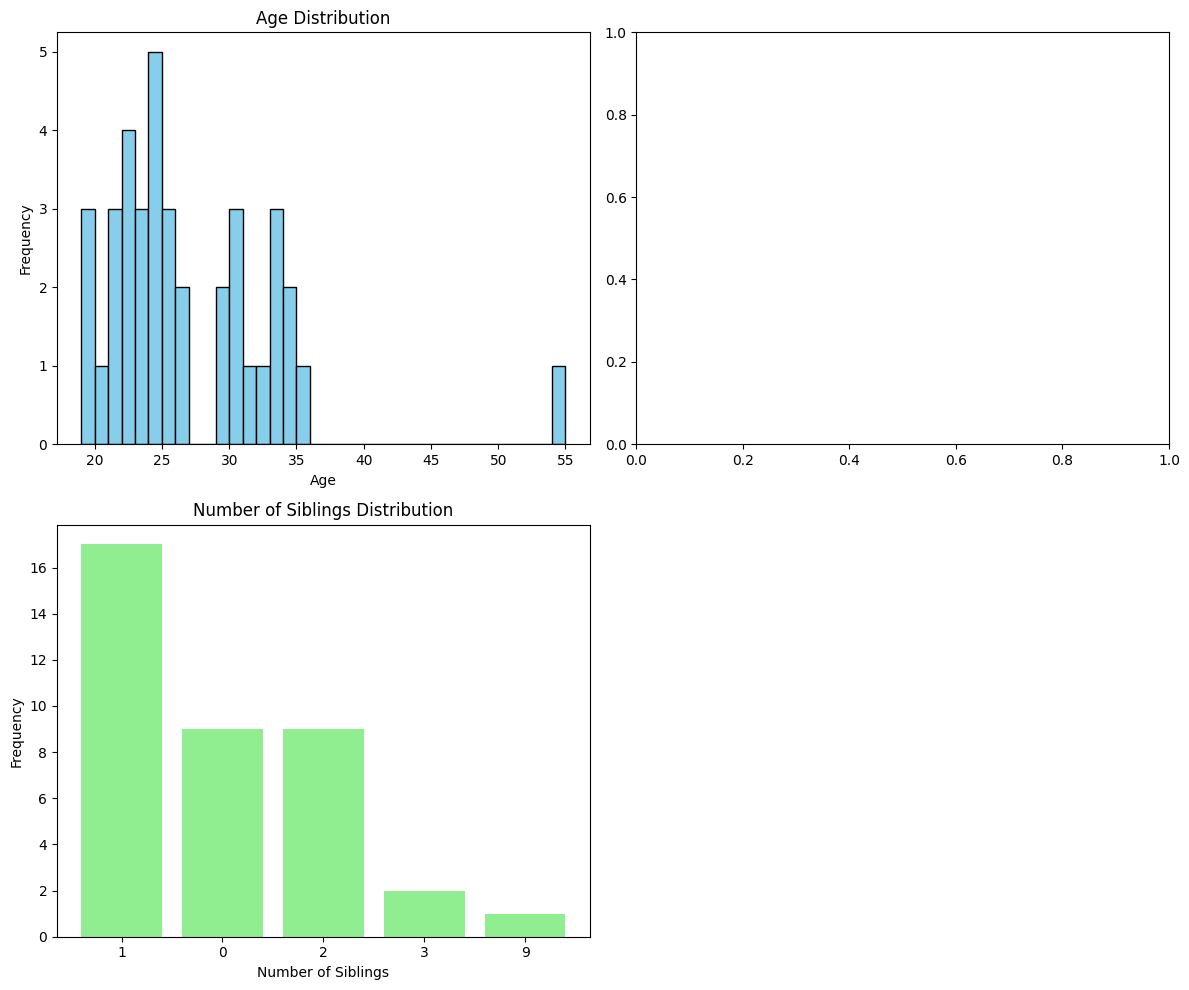

In [ ]:
cleaned_data = agents50_demo_ft.dropna(subset=['age', 'gender', 'numberSiblings'])

# Convert 'age' and 'numberSiblings' to integer type
cleaned_data['age'] = cleaned_data['age'].astype(int)
cleaned_data['numberSiblings'] = cleaned_data['numberSiblings'].astype(int)

# Capitalize gender values
#cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axs[0, 0].hist(cleaned_data['age'], bins=range(min(cleaned_data['age']), max(cleaned_data['age']) + 1), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Gender Distribution
#gender_counts = cleaned_data['gender'].value_counts()
#axs[0, 1].bar(gender_counts.index, gender_counts.values, color='salmon')
#axs[0, 1].set_title('Gender Distribution')
#axs[0, 1].set_xlabel('Gender')
#axs[0, 1].set_ylabel('Frequency')

# Number of Siblings Distribution
siblings_counts = cleaned_data['numberSiblings'].value_counts()
axs[1, 0].bar(siblings_counts.index.map(str), siblings_counts.values, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Frequency')

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()



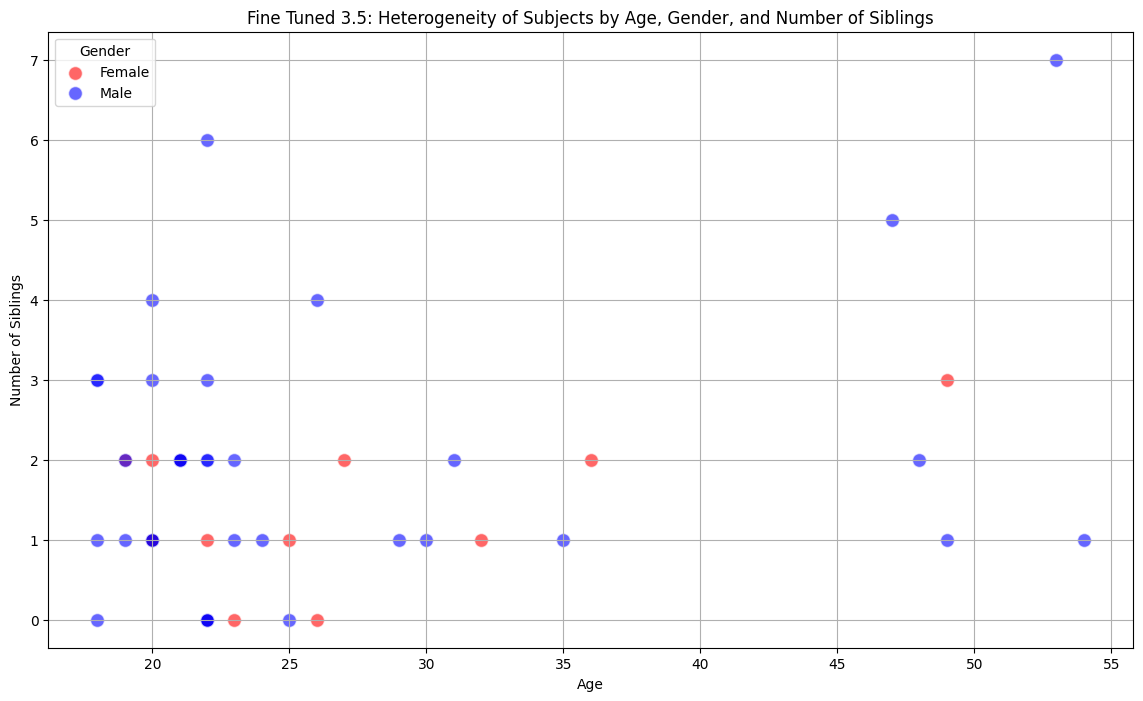

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Capitalize gender values to ensure consistency
cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Define the color mapping for genders
color_mapping = {'Female': 'red', 'Male': 'blue'}

# Create a scatter plot
plt.figure(figsize=(14, 8))

# Plot each gender with the specified color
for gender, color in color_mapping.items():
    subset = cleaned_data[cleaned_data['gender'] == gender]
    plt.scatter(subset['age'], subset['numberSiblings'], label=gender, color=color, alpha=0.6, edgecolors='w', s=100)

plt.title('Fine Tuned 4o: Heterogeneity of Subjects by Age, Gender, and Number of Siblings')
plt.xlabel('Age')
plt.ylabel('Number of Siblings')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


# only generate multiple agents (no encode)

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. You will be designed to output JSON."}


In [ ]:
user_message1_content = f"""Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. You are this new agent. You should format your output as JSON with the following structure: {{'subjectID': the unique ID of the subject, 'age': the age of the subject, 'gender': the gender of the subject, 'numberSiblings': the number of siblings the subject has,'donation': the donation history of the subject,'strategy': the game strategy(ies) used in the game}}"""
user_message1 = {"role": "user", "content": user_message1_content}

In [ ]:
def get_model_responses_agentonly(num_agents):
    completions = []
    responses = []

    for _ in range(num_agents):
      # Call the model for the first message
      completion1 = client.chat.completions.create(
          model="ft:gpt-4o-2024-05-13:yuanlab:4o-none-encode2:9lftzxes", #no encode, 4o
          response_format={"type": "json_object"},
          messages=[
              original_system_message,
              user_message1
          ],
          temperature=1
      )
      response1 = completion1.choices[0].message.content

      try:
          # Parse the JSON response content
          response1_json = json.loads(response1)
      except json.JSONDecodeError as e:
          print(f"Error decoding JSON: {e}")
          print(f"Response1 content: {response1}")
          return pd.DataFrame()  # Return an empty DataFrame on error

      # Append the initial response to the responses list
      responses.append({
          #'user_message1': user_message1,
          'response1': response1,
          'subjectID': response1_json['subjectID'],
          'age': response1_json['age'],
          'gender': response1_json['gender'],
          'numberofsiblings': response1_json['numberSiblings'],
          'gamestrategy': response1_json['strategy']
      })

    # Convert the responses list to a DataFrame
    responses_df_agentonly = pd.DataFrame(responses)

    return responses_df_agentonly

In [ ]:
agentonly_df = get_model_responses_agentonly(91)
agentonly_df

response1    subjectID  age  \
0   {\n    "subjectID": "2760508-1",\n    "age": 2...    2760508-1   26   
1   {\n    "subjectID": "8095289-6",\n    "age": 2...    8095289-6   29   
2   {\n    "subjectID": "101",\n    "age": 25,\n  ...          101   25   
3   {\n    "subjectID": "1018",\n    "age": 47,\n ...         1018   47   
4   {\n    "subjectID": "5015330-1",\n    "age": 2...    5015330-1   22   
..                                                ...          ...  ...   
86  {\n    "subjectID": "091823PQ-11",\n    "age":...  091823PQ-11   25   
87  {\n    "subjectID": 3,\n    "age": 26,\n    "g...            3   26   
88  {\n    "subjectID": "101",\n    "age": 29,\n  ...          101   29   
89  {\n    "subjectID": "002",\n    "age": 42,\n  ...          002   42   
90  {\n    "subjectID": 1001,\n    "age": 23,\n   ...         1001   23   

    gender  numberofsiblings  \
0     Male                 1   
1     Male                 1   
2   Female                 1   
3   Female                 5   
4   Female                 3   
..     ...               ...   
86    Male                 1   
87   Other                 2   
88  Female                 3   
89  Female                 3   
90  Female                 1   

                                         gamestrategy  
0   Try to earn as much money as possible for myself.  
1   Try to earn as much money as possible for me a...  
2   Try to earn as much money as possible for myse...  
3   Try to earn as much money as possible for myse...  
4   Try to earn as much money as possible for myse...  
..                                                ...  
86  Try to earn as much money as possible for myse...  
87  Try to earn as much money as possible for myself.  
88  Try to earn as much money as possible for myse...  
89  Try to earn as much money as possible for myself.  
90  Try to help my match if it did not cost me any...  

[91 rows x 6 columns]

In [ ]:
agentonly_df.to_csv('/content/drive/My Drive/social preference/agentonly4o_91_df.csv')

In [ ]:
agentonly_df.to_csv('/content/drive/My Drive/social preference/agentonly4o_df.csv')

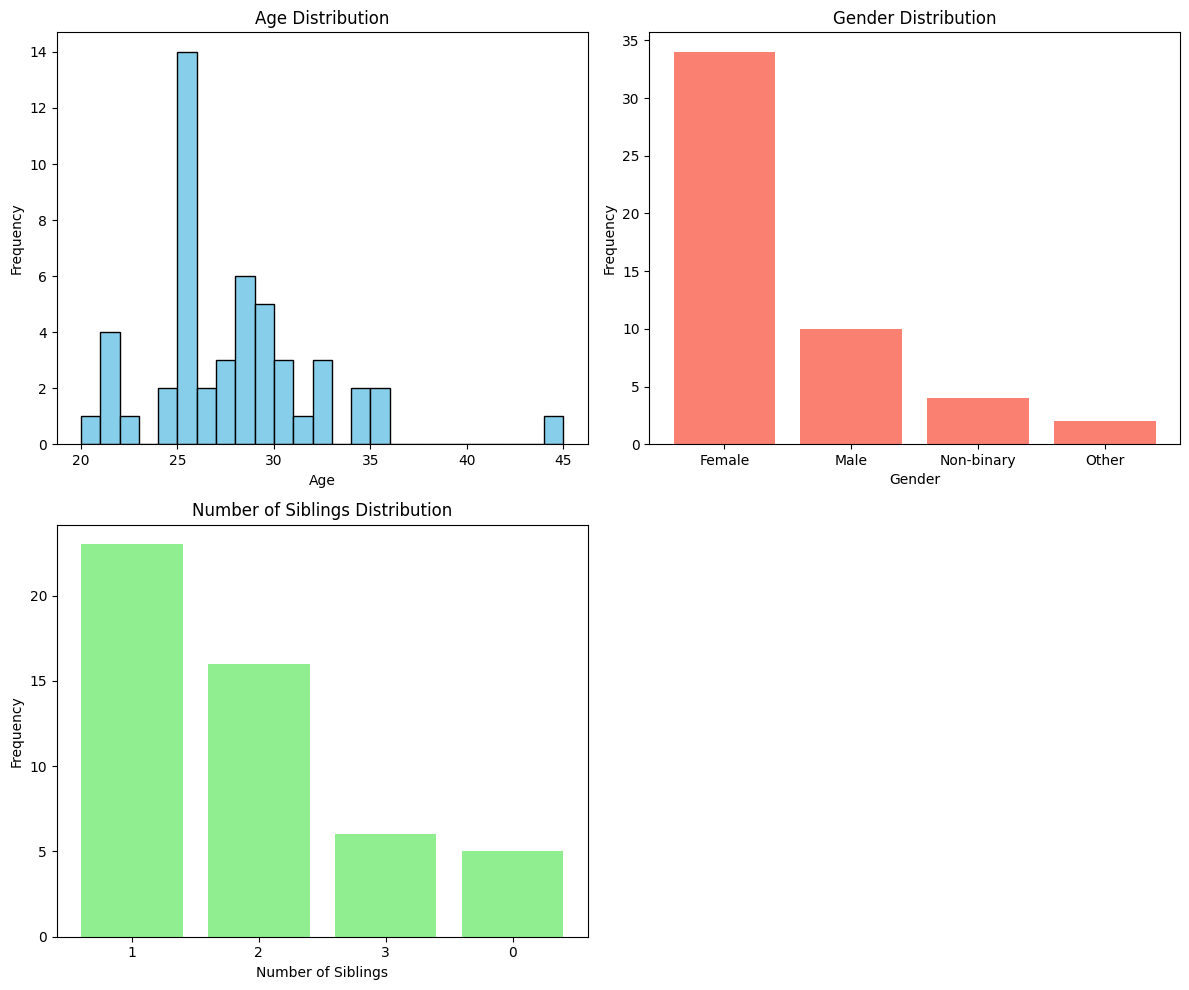

In [ ]:
cleaned_data = agentonly_df.dropna(subset=['age', 'gender', 'numberofsiblings'])

# Convert 'age' and 'numberSiblings' to integer type
cleaned_data['age'] = cleaned_data['age'].astype(int)
cleaned_data['numberofsiblings'] = cleaned_data['numberofsiblings'].astype(int)

# Capitalize gender values
cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axs[0, 0].hist(cleaned_data['age'], bins=range(min(cleaned_data['age']), max(cleaned_data['age']) + 1), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Gender Distribution
gender_counts = cleaned_data['gender'].value_counts()
axs[0, 1].bar(gender_counts.index.astype(str), gender_counts.values, color='salmon')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Frequency')

# Number of Siblings Distribution
siblings_counts = cleaned_data['numberofsiblings'].value_counts()
axs[1, 0].bar(siblings_counts.index.astype(str), siblings_counts.values, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Frequency')

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()



## for GPT-4o

In [ ]:
def get_prompted_model_responses_agentonly(num_agents):
    completions = []
    responses = []

    for _ in range(num_agents):
      # Call the model for the first message
      completion1 = client.chat.completions.create(
          model="gpt-4o",
          response_format={"type": "json_object"},
          messages=[
              original_system_message,
              user_message1
          ],
          temperature=1
      )
      response1 = completion1.choices[0].message.content

      try:
          # Parse the JSON response content
          response1_json = json.loads(response1)
      except json.JSONDecodeError as e:
          print(f"Error decoding JSON: {e}")
          print(f"Response1 content: {response1}")
          return pd.DataFrame()  # Return an empty DataFrame on error

      # Append the initial response to the responses list
      responses.append({
          #'user_message1': user_message1,
          'response1': response1,
          'subjectID': response1_json['subjectID'],
          'age': response1_json['age'],
          'gender': response1_json['gender'],
          'numberofsiblings': response1_json['numberSiblings'],
          'gamestrategy': response1_json['strategy']
      })

    # Convert the responses list to a DataFrame
    prompted_responses_df_agentonly = pd.DataFrame(responses)

    return prompted_responses_df_agentonly

In [ ]:
agents91_demo_prompted = get_prompted_model_responses_agentonly(91)
agents91_demo_prompted

response1  \
0   {\n    "subjectID": "abc12345",\n    "age": 29...   
1   {\n  "subjectID": "AB123456",\n  "age": 29,\n ...   
2   {\n  "subjectID": "participant_12458",\n  "age...   
3   {\n  "subjectID": "P12345",\n  "age": 30,\n  "...   
4   {\n  "subjectID": "participant_12345",\n  "age...   
..                                                ...   
86  {\n  "subjectID": "a7d62b2c-9f8b-4ef7-8a57-2fa...   
87  {\n  "subjectID": "A123456789",\n  "age": 27,\...   
88  {\n  "subjectID": "1234ABC",\n  "age": 28,\n  ...   
89  {\n  "subjectID": "XD123456",\n  "age": 29,\n ...   
90  {\n    "subjectID": "AB1234",\n    "age": 29,\...   

                               subjectID  age  gender  numberofsiblings  \
0                               abc12345   29  female                 2   
1                               AB123456   29  Female                 2   
2                      participant_12458   29  female                 2   
3                                 P12345   30  Female                 2   
4                      participant_12345   29  Female                 2   
..                                   ...  ...     ...               ...   
86  a7d62b2c-9f8b-4ef7-8a57-2fa1b9eec343   27  Female                 2   
87                            A123456789   27  Female                 2   
88                               1234ABC   28  Female                 2   
89                              XD123456   29    Male                 1   
90                                AB1234   29  Female                 2   

                                         gamestrategy  
0   [{'game': 1, 'role': 'A', 'decision': 'coopera...  
1   [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
2   {'Game1': 'Tit-for-Tat', 'Game2': 'Cooperative...  
3   [{'game': 'Ultimatum', 'role': 'A', 'decision'...  
4   [{'game': 'Game 1', 'role': 'A', 'decision': '...  
..                                                ...  
86  [{'game': 'Game 1: Ultimatum Game', 'role': 'A...  
87  {'game1': {'role': 'A', 'decision': 'Cooperate...  
88  {'game1': 'Tit-for-tat', 'game2': 'Random', 'g...  
89  [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
90  {'game1': {'role': 'A', 'decision': 'Cooperate...  

[91 rows x 6 columns]

In [ ]:
agents91_demo_prompted.to_csv('/content/drive/My Drive/social preference/agents91_demo_prompted.csv')

## Manipulate

In [ ]:
import pandas as pd


agentonly_df['gender'] = agentonly_df['gender'].apply(lambda x: 1 if x == 0 else 0)

# Modifying the values of the 'numberofsiblings' column
def modify_siblings(x):
    if x == 0:
        return 1
    elif x == 1:
        return 2
    elif x == 2:
        return 0
    else:
        return x

agentonly_df['numberofsiblings'] = agentonly_df['numberofsiblings'].apply(modify_siblings)

# Display the modified DataFrame
agentonly_df


response1           subjectID  \
0   {"subjectID":601222,"age":50,"gender":0,"numbe...              601222   
1   {"subjectID": "181203SR-18", "age": 20, "gende...         181203SR-18   
2   {"subjectID": "210103PQ-15", "age": 19, "gende...         210103PQ-15   
3   {"subjectID": "210914009", "age": 21, "gender"...           210914009   
4   {"subjectID": "20210921_home_75_4", "age": 34,...  20210921_home_75_4   
..                                                ...                 ...   
86  {"subjectID": "0505025", "age": 27, "gender": ...             0505025   
87  {"subjectID": "712", "age": 20, "gender": 1, "...                 712   
88  {"subjectID": "100303FQ-015", "age": 21, "gend...        100303FQ-015   
89  {"subjectID": "031316A", "age": 21, "gender": ...             031316A   
90  {"subjectID": "211124","age": 37,"gender": 0,"...              211124   

    age  gender  numberofsiblings  \
0    50       1                 2   
1    20       1                 2   
2    19       0                 1   
3    21       0                 2   
4    34       1                 4   
..  ...     ...               ...   
86   27       0                 0   
87   20       0                 1   
88   21       1                 0   
89   21       1                 0   
90   37       1                 2   

                                         gamestrategy  
0   Try to earn as much money as possible for me a...  
1   Try to earn as much money as possible and help...  
2   Try to earn as much money as possible for me a...  
3   Try to help my match if it did not cost me any...  
4   Try to earn as many points as possible for mys...  
..                                                ...  
86  I try to find a balance between my payoff and ...  
87                                Maximize own payoff  
88  My game strategy was to earn as much money as ...  
89  Try to help the other person as much as possib...  
90  Try to earn as many points as possible for mys...  

[91 rows x 6 columns]

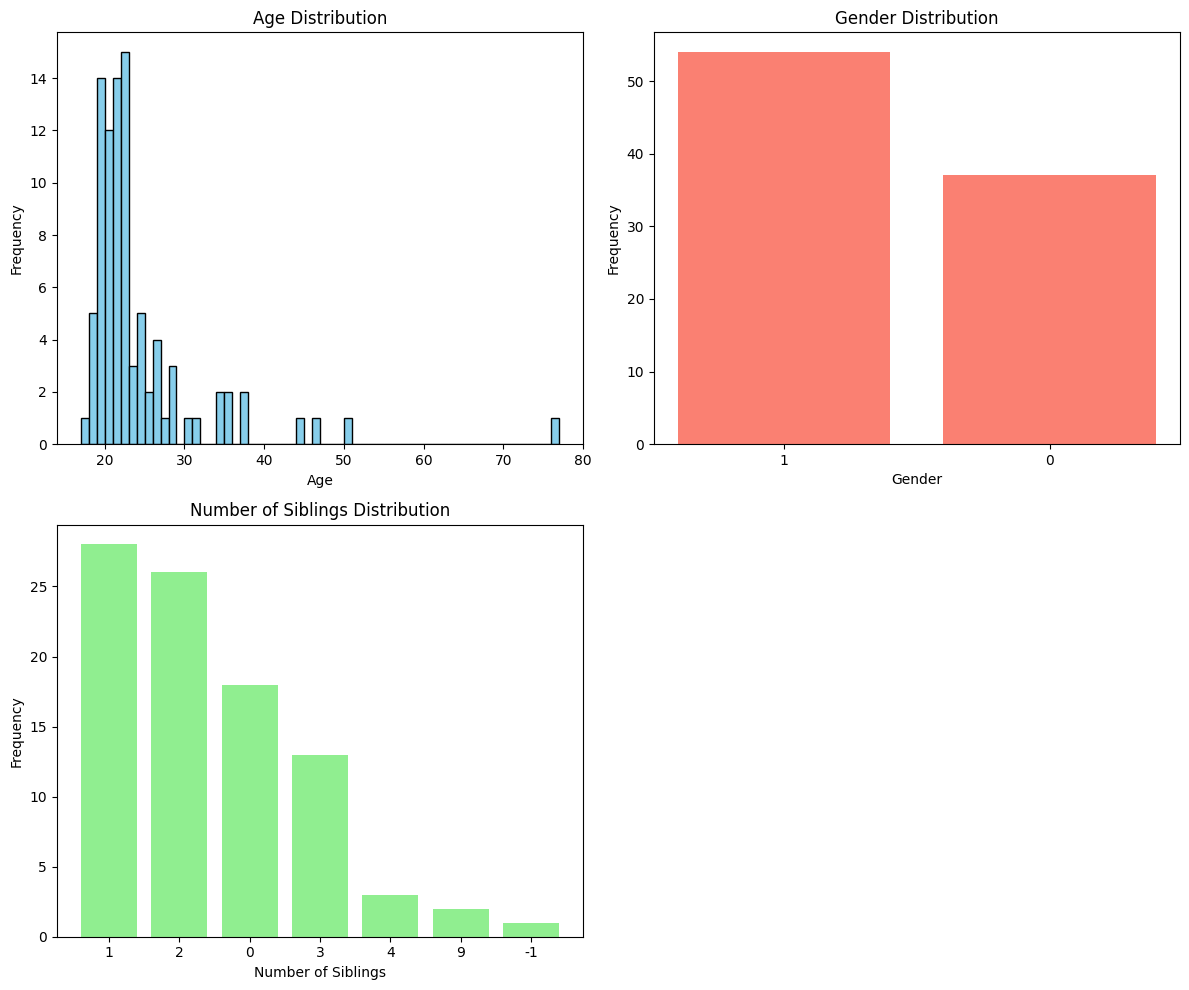

In [ ]:
cleaned_data = agentonly_df.dropna(subset=['age', 'gender', 'numberofsiblings'])

# Convert 'age' and 'numberSiblings' to integer type
cleaned_data['age'] = cleaned_data['age'].astype(int)
cleaned_data['numberofsiblings'] = cleaned_data['numberofsiblings'].astype(int)

# Capitalize gender values
#cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axs[0, 0].hist(cleaned_data['age'], bins=range(min(cleaned_data['age']), max(cleaned_data['age']) + 1), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Gender Distribution
gender_counts = cleaned_data['gender'].value_counts()
axs[0, 1].bar(gender_counts.index.astype(str), gender_counts.values, color='salmon')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Frequency')

# Number of Siblings Distribution
siblings_counts = cleaned_data['numberofsiblings'].value_counts()
axs[1, 0].bar(siblings_counts.index.astype(str), siblings_counts.values, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Frequency')

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()



In [ ]:
agentonly_df.to_csv('/content/drive/My Drive/social preference/revised_agentonly_df.csv')

In [ ]:
agentonly_df = pd.read_csv('/content/drive/My Drive/social preference/revised_agentonly_df.csv')

# **Baseline**

## temperature = 1

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
data = [
    {'myrole': 2, 'game': 'Dict 1'},
    {'myrole': 2, 'game': 'Dict 2'},
    {'myrole': 2, 'game': 'Dict 3'},
    {'myrole': 2, 'game': 'Dict 4'},
    {'myrole': 2, 'game': 'Dict 5'},
    {'myrole': 1, 'game': 'Resp 10'},
    {'myrole': 2, 'game': 'Resp 10'},
    {'myrole': 1, 'game': 'Resp 12'},
    {'myrole': 2, 'game': 'Resp 12'},
    {'myrole': 1, 'game': 'Resp 13a'},
    {'myrole': 2, 'game': 'Resp 13a'},
    {'myrole': 1, 'game': 'Resp 13b'},
    {'myrole': 2, 'game': 'Resp 13b'},
    {'myrole': 1, 'game': 'Resp 13c'},
    {'myrole': 2, 'game': 'Resp 13c'},
    {'myrole': 1, 'game': 'Resp 13d'},
    {'myrole': 2, 'game': 'Resp 13d'},
    {'myrole': 1, 'game': 'Resp 1a'},
    {'myrole': 2, 'game': 'Resp 1a'},
    {'myrole': 1, 'game': 'Resp 1b'},
    {'myrole': 2, 'game': 'Resp 1b'},
    {'myrole': 1, 'game': 'Resp 2a'},
    {'myrole': 2, 'game': 'Resp 2a'},
    {'myrole': 1, 'game': 'Resp 2b'},
    {'myrole': 2, 'game': 'Resp 2b'},
    {'myrole': 1, 'game': 'Resp 3'},
    {'myrole': 2, 'game': 'Resp 3'},
    {'myrole': 1, 'game': 'Resp 4'},
    {'myrole': 2, 'game': 'Resp 4'},
    {'myrole': 1, 'game': 'Resp 5a'},
    {'myrole': 2, 'game': 'Resp 5a'},
    {'myrole': 1, 'game': 'Resp 5b'},
    {'myrole': 2, 'game': 'Resp 5b'},
    {'myrole': 1, 'game': 'Resp 6'},
    {'myrole': 2, 'game': 'Resp 6'},
    {'myrole': 1, 'game': 'Resp 7'},
    {'myrole': 2, 'game': 'Resp 7'},
    {'myrole': 1, 'game': 'Resp 8'},
    {'myrole': 2, 'game': 'Resp 8'},
    {'myrole': 1, 'game': 'Resp 9'},
    {'myrole': 2, 'game': 'Resp 9'},
    {'myrole': 1, 'game': 'Resp 11'},
    {'myrole': 2, 'game': 'Resp 11'}
]

# Convert the list of dictionaries to a DataFrame
game_combinations_df = pd.DataFrame(data)



In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f"""{get_prompt(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage




## get_basemodel_responses

In [ ]:
def get_basemodel_responses(sample_df, game_combinations_df):
    completions = []
    responses = []

    # Iterate through the combinations DataFrame
    for i, row in game_combinations_df.iterrows():
        game_type = row['game']
        agent = row['myrole']
        user_message_content = generate_participant_message(sample_df, get_prompt, game_type, agent)
        user_message2 = {"role": "user", "content": user_message_content}

        # Call the model for the second message
        completion2 = client.chat.completions.create(
            model="gpt-4o",
            response_format={"type": "json_object"},
            messages=[
                original_system_message,
                user_message2
            ],
            temperature=1
        )
        response2 = completion2.choices[0].message.content

        try:
            # Extract reason and choice from the response
            response2_json = json.loads(response2)
            reason = response2_json.get('reason', '')
            choice = response2_json.get('choice', '')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Response2 content: {response2}")
            reason = response2  # Fall back to raw response text
            choice = response2

        # Append the responses to the responses list
        responses.append({
            'completationinfo': completion2,
            'game_type': game_type,
            'agent': agent,
            'response2': response2,
            'reason': reason,
            'choice': choice
        })

    # Convert the responses list to a DataFrame
    responses_df = pd.DataFrame(responses)

    return responses_df


In [ ]:
one_agent_df_base = get_basemodel_responses(df_control_cleaned, game_combinations_df)
one_agent_df_base

game_type: Dict 1, agent: 2
game_type: Dict 2, agent: 2
game_type: Dict 3, agent: 2
game_type: Dict 4, agent: 2
game_type: Dict 5, agent: 2
game_type: Resp 10, agent: 1
game_type: Resp 10, agent: 2
game_type: Resp 12, agent: 1
game_type: Resp 12, agent: 2
game_type: Resp 13a, agent: 1
game_type: Resp 13a, agent: 2
game_type: Resp 13b, agent: 1
game_type: Resp 13b, agent: 2
game_type: Resp 13c, agent: 1
game_type: Resp 13c, agent: 2
game_type: Resp 13d, agent: 1
game_type: Resp 13d, agent: 2
game_type: Resp 1a, agent: 1
game_type: Resp 1a, agent: 2
game_type: Resp 1b, agent: 1
game_type: Resp 1b, agent: 2
game_type: Resp 2a, agent: 1
game_type: Resp 2a, agent: 2
game_type: Resp 2b, agent: 1
game_type: Resp 2b, agent: 2
game_type: Resp 3, agent: 1
game_type: Resp 3, agent: 2
game_type: Resp 4, agent: 1
game_type: Resp 4, agent: 2
game_type: Resp 5a, agent: 1
game_type: Resp 5a, agent: 2
game_type: Resp 5b, agent: 1
game_type: Resp 5b, agent: 2
game_type: Resp 6, agent: 1
game_type: Resp 

completationinfo game_type  agent  \
0   ChatCompletion(id='chatcmpl-9kH2OeGwPRJrMRs7Qe...    Dict 1      2   
1   ChatCompletion(id='chatcmpl-9kH2QNt3BBJt9zmKGz...    Dict 2      2   
2   ChatCompletion(id='chatcmpl-9kH2T9wiL94r1H9Rmg...    Dict 3      2   
3   ChatCompletion(id='chatcmpl-9kH2W15BY6OURpmbe0...    Dict 4      2   
4   ChatCompletion(id='chatcmpl-9kH2Y4BINzjChYxJDj...    Dict 5      2   
5   ChatCompletion(id='chatcmpl-9kH2ajPAA28K0rWzrv...   Resp 10      1   
6   ChatCompletion(id='chatcmpl-9kH2e8rgSOBcIX7kmP...   Resp 10      2   
7   ChatCompletion(id='chatcmpl-9kH2gS1Y6GoCej8vxu...   Resp 12      1   
8   ChatCompletion(id='chatcmpl-9kH2klhjjTQ6dhcTfv...   Resp 12      2   
9   ChatCompletion(id='chatcmpl-9kH2ntXqkikYyGoFfI...  Resp 13a      1   
10  ChatCompletion(id='chatcmpl-9kH2qsaowfLe5bon5G...  Resp 13a      2   
11  ChatCompletion(id='chatcmpl-9kH2tIBuikdSatSzR5...  Resp 13b      1   
12  ChatCompletion(id='chatcmpl-9kH2yZ10GaedYxceIF...  Resp 13b      2   
13  ChatCompletion(id='chatcmpl-9kH33K3DJGgwoARd3l...  Resp 13c      1   
14  ChatCompletion(id='chatcmpl-9kH36hixtqTrNFwHWG...  Resp 13c      2   
15  ChatCompletion(id='chatcmpl-9kH38tTwEgS89YBr7D...  Resp 13d      1   
16  ChatCompletion(id='chatcmpl-9kH3DGJcxHK5bEAYPW...  Resp 13d      2   
17  ChatCompletion(id='chatcmpl-9kH3EpCTGExbe1CsHB...   Resp 1a      1   
18  ChatCompletion(id='chatcmpl-9kH3HNmiHku87wWYG9...   Resp 1a      2   
19  ChatCompletion(id='chatcmpl-9kH3KHUs0yXn2xTXJN...   Resp 1b      1   
20  ChatCompletion(id='chatcmpl-9kH3MaNy82r4XCTusc...   Resp 1b      2   
21  ChatCompletion(id='chatcmpl-9kH3PYgJVEPvDJP8lu...   Resp 2a      1   
22  ChatCompletion(id='chatcmpl-9kH3S6HNokCHkGLtTO...   Resp 2a      2   
23  ChatCompletion(id='chatcmpl-9kH3VqWRp0bmjxo9oV...   Resp 2b      1   
24  ChatCompletion(id='chatcmpl-9kH3Z0Qol43yLrnoR9...   Resp 2b      2   
25  ChatCompletion(id='chatcmpl-9kH3cdRNqBcphVr98G...    Resp 3      1   
26  ChatCompletion(id='chatcmpl-9kH3f4wZTYeOPZztpG...    Resp 3      2   
27  ChatCompletion(id='chatcmpl-9kH3hlZmR2rXnwII70...    Resp 4      1   
28  ChatCompletion(id='chatcmpl-9kH3kES6MQCOZQUGD6...    Resp 4      2   
29  ChatCompletion(id='chatcmpl-9kH3mKGTHNRMfit77b...   Resp 5a      1   
30  ChatCompletion(id='chatcmpl-9kH3pflqJxHIySYw2h...   Resp 5a      2   
31  ChatCompletion(id='chatcmpl-9kH3s7ZUmLp7gciE7m...   Resp 5b      1   
32  ChatCompletion(id='chatcmpl-9kH3uaIFgFN1HBXcPa...   Resp 5b      2   
33  ChatCompletion(id='chatcmpl-9kH3xAXDxZqEWv6Xg7...    Resp 6      1   
34  ChatCompletion(id='chatcmpl-9kH41EUl9dKqr6NSoq...    Resp 6      2   
35  ChatCompletion(id='chatcmpl-9kH43DhygMxo7vZzLB...    Resp 7      1   
36  ChatCompletion(id='chatcmpl-9kH46KfXqy5ZZKNHwK...    Resp 7      2   
37  ChatCompletion(id='chatcmpl-9kH49znWLVoHSfqb8W...    Resp 8      1   
38  ChatCompletion(id='chatcmpl-9kH4EyeVAHLOIYFyu7...    Resp 8      2   
39  ChatCompletion(id='chatcmpl-9kH4Gtr5v2ov8dYAlD...    Resp 9      1   
40  ChatCompletion(id='chatcmpl-9kH4Lj8VKidUGY33Al...    Resp 9      2   
41  ChatCompletion(id='chatcmpl-9kH4OmtPZijZBlzNwN...   Resp 11      1   
42  ChatCompletion(id='chatcmpl-9kH4VlcEaanP2C8wOE...   Resp 11      2   

                                            response2  \
0   {\n  "reason": "In this game, my decision as p...   
1   {\n  "reason": "In this decision, I am person ...   
2   {\n    "reason": "In this game, I have two cho...   
3   {\n  "reason": "I am presented with two choice...   
4   {\n  "reason": "In this scenario, I have to de...   
5   {\n  "reason": "As person A, I have to decide ...   
6   {\n    "reason": "Since my decision only affec...   
7   {\n  "reason": "In analyzing the decision, I e...   
8   {\n    "reason": "Since I am person B, I need ...   
9   {\n    "reason": "In this decision task, I hav...   
10  {\n  "reason": "Since I am person B, my decisi...   
11  {\n  "reason": "I have two choices, A1 and A2....   
12  {\n  "reason": "Given that my decis

## get_multiple_agents_responses

In [ ]:
def get_multiple_agents_responses_baseline(sample_df, game_combinations_df, num_agents):
    all_responses = []

    for _ in range(num_agents):
        responses_df = get_basemodel_responses(sample_df, game_combinations_df)
        all_responses.append(responses_df)

    # Concatenate all the individual responses DataFrames
    baseline_multiagents_responses_df = pd.concat(all_responses, ignore_index=True)

    return baseline_multiagents_responses_df

In [ ]:
baseline_multiagents_responses_df = get_multiple_agents_responses_baseline(df_control_cleaned, game_combinations_df, num_agents=50)
baseline_multiagents_responses_df

Streaming output truncated to the last 5000 lines.
 
 
  
              
      
        
  
   
      
   
  
   

              
           
                
              






                
 
           
   
    
  
 

          
    
         
        
  
 
        
   
   
  
                


 




         
  
   
                
  
    
 
  
               

            
    

         
 

     
   
             
            
  
       
       
     
 
           
 
   
     
    
      
  
   
   

    
 
       
        
     
  






 

            
          
          
  
  
    
    
  
     
  
  
               

              

  
    
         







 

   
      
   

   
  
               
  
       
  
 
 
    
  
       
  
         
 
 
                
   
 
    
                
 
        
   
                 
             
                
    
         

 
    
    
  
 
  
  



   
             
 
                 



         
  
  
              

completationinfo game_type  agent  \
0     ChatCompletion(id='chatcmpl-9kH5DHNh9tnkQDOfcq...    Dict 1      2   
1     ChatCompletion(id='chatcmpl-9kH5GOxizFTNpXqR1Z...    Dict 2      2   
2     ChatCompletion(id='chatcmpl-9kH5JosBtYpmQxoYmK...    Dict 3      2   
3     ChatCompletion(id='chatcmpl-9kH5LqYXFrK0mqp8Wp...    Dict 4      2   
4     ChatCompletion(id='chatcmpl-9kH5ONgizstCJGz62S...    Dict 5      2   
...                                                 ...       ...    ...   
2145  ChatCompletion(id='chatcmpl-9kIhjExQcRJNz1Xfzq...    Resp 8      2   
2146  ChatCompletion(id='chatcmpl-9kIhl4A97z74K2VrJt...    Resp 9      1   
2147  ChatCompletion(id='chatcmpl-9kIhoQ0lRotDJo5PKH...    Resp 9      2   
2148  ChatCompletion(id='chatcmpl-9kIhqB0RLdffyASwHI...   Resp 11      1   
2149  ChatCompletion(id='chatcmpl-9kIhtahgegnM4cJH56...   Resp 11      2   

                                              response2  \
0     {\n    "reason": "In this game, person A has n...   
1     {\n  "reason": "In this game, I have two optio...   
2     {\n    "reason": "In making my decision, I nee...   
3     {"reason": "In this decision task, I am person...   
4     {"reason": "In this game, I have two choices: ...   
...                                                 ...   
2145  {\n  "reason": "Person A has two possible choi...   
2146  {\n  "reason": "I have a choice to make betwee...   
2147  {\n  "reason": "Since Person A's decision (A1 ...   
2148  {\n  "reason": "If I choose A1, I guarantee my...   
2149  {\n  "reason": "As person B, my decision only ...   

                                                 reason choice  
0     In this game, person A has no direct influence...     B2  
1     In this game, I have two options as person B. ...     B2  
2     In making my decision, I need to weigh the out...     B2  
3     In this decision task, I am person B, and I ha...     B2  
4     In this game, I have two choices: B1 and B2. I...     B2  
...                                                 ...    ...  
2145  Person A has two possible choices: A1 or A2. I...     B1  
2146  I have a choice to make between A1 and A2. If ...     A2  
2147  Since Person A's decision (A1 or A2) determine...     B1  
2148  If I choose A1, I guarantee myself a payoff of...     A1  
2149  As person B, my decision only affects outcomes...     B1  

[2150 rows x 6 columns]

In [ ]:
baseline_multiagents_responses_df.to_csv('/content/drive/My Drive/social preference/baseline4o_multiagents50_responses_df.csv')

In [ ]:
baseline_multiagents_responses_df = pd.read_csv('/content/drive/My Drive/social preference/baseline4o_multiagents50_responses_df.csv')

In [ ]:
baseline_multiagents_responses_df

Unnamed: 0                                   completationinfo game_type  \
0              0  ChatCompletion(id='chatcmpl-9kH5DHNh9tnkQDOfcq...    Dict 1   
1              1  ChatCompletion(id='chatcmpl-9kH5GOxizFTNpXqR1Z...    Dict 2   
2              2  ChatCompletion(id='chatcmpl-9kH5JosBtYpmQxoYmK...    Dict 3   
3              3  ChatCompletion(id='chatcmpl-9kH5LqYXFrK0mqp8Wp...    Dict 4   
4              4  ChatCompletion(id='chatcmpl-9kH5ONgizstCJGz62S...    Dict 5   
...          ...                                                ...       ...   
2145        2145  ChatCompletion(id='chatcmpl-9kIhjExQcRJNz1Xfzq...    Resp 8   
2146        2146  ChatCompletion(id='chatcmpl-9kIhl4A97z74K2VrJt...    Resp 9   
2147        2147  ChatCompletion(id='chatcmpl-9kIhoQ0lRotDJo5PKH...    Resp 9   
2148        2148  ChatCompletion(id='chatcmpl-9kIhqB0RLdffyASwHI...   Resp 11   
2149        2149  ChatCompletion(id='chatcmpl-9kIhtahgegnM4cJH56...   Resp 11   

      agent                                          response2  \
0         2  {\n    "reason": "In this game, person A has n...   
1         2  {\n  "reason": "In this game, I have two optio...   
2         2  {\n    "reason": "In making my decision, I nee...   
3         2  {"reason": "In this decision task, I am person...   
4         2  {"reason": "In this game, I have two choices: ...   
...     ...                                                ...   
2145      2  {\n  "reason": "Person A has two possible choi...   
2146      1  {\n  "reason": "I have a choice to make betwee...   
2147      2  {\n  "reason": "Since Person A's decision (A1 ...   
2148      1  {\n  "reason": "If I choose A1, I guarantee my...   
2149      2  {\n  "reason": "As person B, my decision only ...   

                                                 reason choice  
0     In this game, person A has no direct influence...     B2  
1     In this game, I have two options as person B. ...     B2  
2     In making my decision, I need to weigh the out...     B2  
3     In this decision task, I am person B, and I ha...     B2  
4     In this game, I have two choices: B1 and B2. I...     B2  
...                                                 ...    ...  
2145  Person A has two possible choices: A1 or A2. I...     B1  
2146  I have a choice to make between A1 and A2. If ...     A2  
2147  Since Person A's decision (A1 or A2) determine...     B1  
2148  If I choose A1, I guarantee myself a payoff of...     A1  
2149  As person B, my decision only affects outcomes...     B1  

[2150 rows x 7 columns]

## visualized choice

In [ ]:
import pandas as pd

# Assuming your DataFrame is already loaded and named baseline_multiagents_responses_df

# Group the data by game_type and agent, then calculate the counts and percentages of each choice within each group
grouped = baseline_multiagents_responses_df.groupby(['game_type', 'agent', 'choice']).size().reset_index(name='counts')
total_counts = grouped.groupby(['game_type', 'agent'])['counts'].transform('sum')
grouped['percentage'] = grouped['counts'] / total_counts

# Pivot the data for easier manipulation
pivot_df = grouped.pivot_table(index=['game_type', 'agent'], columns='choice', values='percentage', fill_value=0)
pivot_df.columns = [f"{col}_percent" for col in pivot_df.columns]

# Merge the counts back to the pivot_df to get the number_of_new_participants
counts_df = grouped.groupby(['game_type', 'agent'])['counts'].sum().reset_index(name='number_of_new_participants')
final_df = pd.merge(counts_df, pivot_df.reset_index(), on=['game_type', 'agent'])

# Reorder columns to match the example
final_df_baseline50 = final_df[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]

# Display the final DataFrame
final_df_baseline50


game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.00        1.00   
1     Dict 2      2                          50        0.54        0.46   
2     Dict 3      2                          50        0.42        0.58   
3     Dict 4      2                          50        0.02        0.98   
4     Dict 5      2                          50        0.04        0.96   
5    Resp 10      1                          50        0.00        0.00   
6    Resp 10      2                          50        1.00        0.00   
7    Resp 11      1                          50        0.00        0.00   
8    Resp 11      2                          50        1.00        0.00   
9    Resp 12      1                          50        0.00        0.00   
10   Resp 12      2                          50        0.98        0.02   
11  Resp 13a      1                          50        0.00        0.00   
12  Resp 13a      2                          50        0.98        0.02   
13  Resp 13b      1                          50        0.00        0.00   
14  Resp 13b      2                          50        1.00        0.00   
15  Resp 13c      1                          50        0.00        0.00   
16  Resp 13c      2                          50        0.98        0.02   
17  Resp 13d      1                          50        0.00        0.00   
18  Resp 13d      2                          50        0.98        0.02   
19   Resp 1a      1                          50        0.00        0.00   
20   Resp 1a      2                          50        0.16        0.84   
21   Resp 1b      1                          50        0.00        0.00   
22   Resp 1b      2                          50        0.20        0.80   
23   Resp 2a      1                          50        0.00        0.00   
24   Resp 2a      2                          50        1.00        0.00   
25   Resp 2b      1                          50        0.00        0.00   
26   Resp 2b      2                          50        1.00        0.00   
27    Resp 3      1                          50        0.00        0.00   
28    Resp 3      2                          50        1.00        0.00   
29    Resp 4      1                          50        0.00        0.00   
30    Resp 4      2                          50        0.94        0.06   
31   Resp 5a      1                          50        0.00        0.00   
32   Resp 5a      2                          50        0.64        0.36   
33   Resp 5b      1                          50        0.00        0.00   
34   Resp 5b      2                          50        0.36        0.64   
35    Resp 6      1                          50        0.00        0.00   
36    Resp 6      2                          50        0.02        0.96   
37    Resp 7      1                          50        0.00        0.00   
38    Resp 7      2                          50        0.00        1.00   
39    Resp 8      1                          50        0.00        0.00   
40    Resp 8      2                          50        1.00        0.00   
41    Resp 9      1                          50        0.00        0.00   
42    Resp 9      2                          50        1.00        0.00   

    A1_percent  A2_percent  
0         0.00        0.00  
1         0.00        0.00  
2         0.00        0.00  
3         0.00        0.00  
4         0.00        0.00  
5         0.58        0.42  
6         0.00        0.00  
7         1.00        0.00  
8         0.00        0.00  
9         0.70        0.30  
10        0.00        0.00  
11        1.00        0.00  
12        0.00        0.00  
13        1.00        0.00  
14        0.00        0.00  
15        0.96        0.04  
16        0.00        0.00  
17        0.98        0.02  
18        0.00        0.00  
19        0.28        0.72  
20        0.00        0.00  
21        0.96        0.04  
22        0.00        0.00  
23    

In [ ]:
final_df_baseline50.to_csv('/content/drive/My Drive/social preference/final_df_4obaseline50.csv')

<ipython-input-26-9399c5e4f3cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_baseline50.fillna(0, inplace=True)


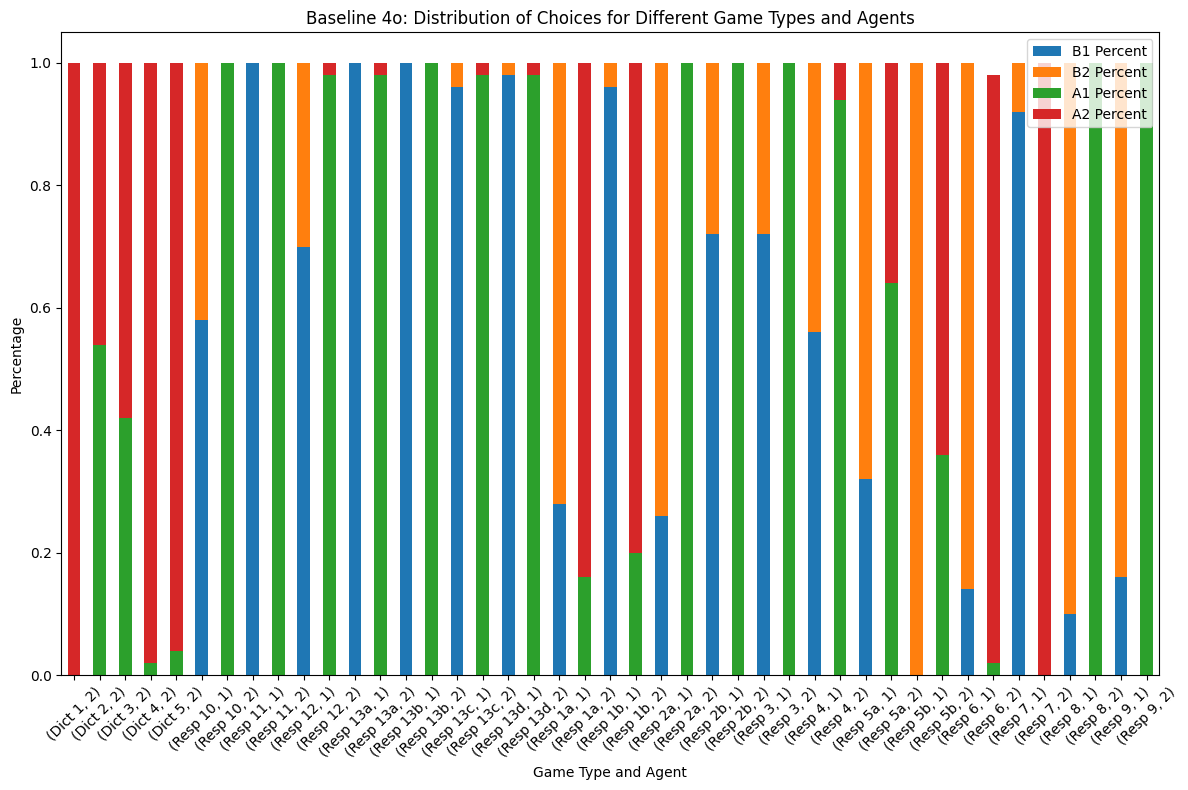

In [ ]:
import matplotlib.pyplot as plt



# Filling NaN with 0 for visualization
final_df_baseline50.fillna(0, inplace=True)


# Plotting the data without averaging
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_baseline50.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']).plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Baseline 4o: Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'B2 Percent', 'A1 Percent', 'A2 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


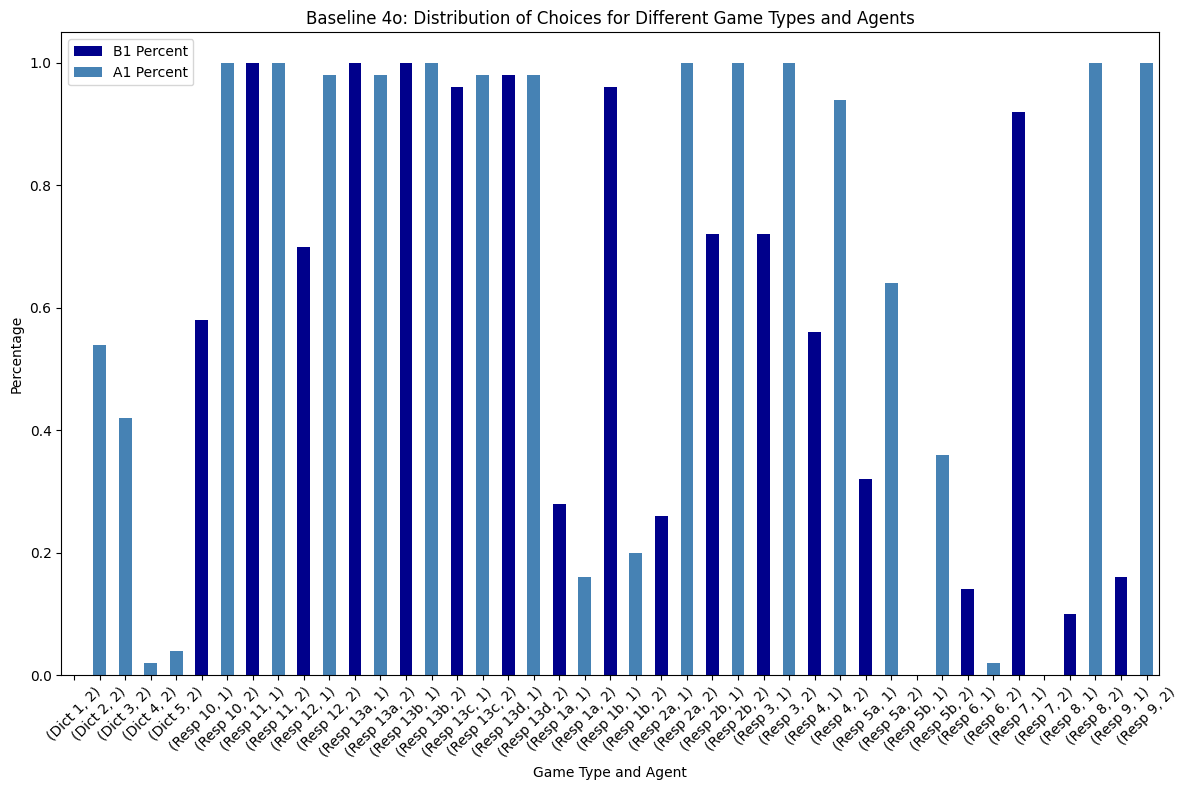

In [ ]:
# Filling NaN with 0 for visualization
final_df_baseline50.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_baseline50.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Baseline 4o: Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prompted

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
user_message1_content = f"""Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. You are this new agent. You should format your output as JSON with the following structure: {{'subjectID': the unique ID of the subject, 'age': the age of the subject, 'gender': the gender of the subject, 'numberSiblings': the number of siblings the subject has,'donation': the donation history of the subject,'strategy': the game strategy(ies) used in the game}}"""
user_message1 = {"role": "user", "content": user_message1_content}

In [ ]:
data = [
    {'myrole': 2, 'game': 'Dict 1'},
    {'myrole': 2, 'game': 'Dict 2'},
    {'myrole': 2, 'game': 'Dict 3'},
    {'myrole': 2, 'game': 'Dict 4'},
    {'myrole': 2, 'game': 'Dict 5'},
    {'myrole': 1, 'game': 'Resp 10'},
    {'myrole': 2, 'game': 'Resp 10'},
    {'myrole': 1, 'game': 'Resp 12'},
    {'myrole': 2, 'game': 'Resp 12'},
    {'myrole': 1, 'game': 'Resp 13a'},
    {'myrole': 2, 'game': 'Resp 13a'},
    {'myrole': 1, 'game': 'Resp 13b'},
    {'myrole': 2, 'game': 'Resp 13b'},
    {'myrole': 1, 'game': 'Resp 13c'},
    {'myrole': 2, 'game': 'Resp 13c'},
    {'myrole': 1, 'game': 'Resp 13d'},
    {'myrole': 2, 'game': 'Resp 13d'},
    {'myrole': 1, 'game': 'Resp 1a'},
    {'myrole': 2, 'game': 'Resp 1a'},
    {'myrole': 1, 'game': 'Resp 1b'},
    {'myrole': 2, 'game': 'Resp 1b'},
    {'myrole': 1, 'game': 'Resp 2a'},
    {'myrole': 2, 'game': 'Resp 2a'},
    {'myrole': 1, 'game': 'Resp 2b'},
    {'myrole': 2, 'game': 'Resp 2b'},
    {'myrole': 1, 'game': 'Resp 3'},
    {'myrole': 2, 'game': 'Resp 3'},
    {'myrole': 1, 'game': 'Resp 4'},
    {'myrole': 2, 'game': 'Resp 4'},
    {'myrole': 1, 'game': 'Resp 5a'},
    {'myrole': 2, 'game': 'Resp 5a'},
    {'myrole': 1, 'game': 'Resp 5b'},
    {'myrole': 2, 'game': 'Resp 5b'},
    {'myrole': 1, 'game': 'Resp 6'},
    {'myrole': 2, 'game': 'Resp 6'},
    {'myrole': 1, 'game': 'Resp 7'},
    {'myrole': 2, 'game': 'Resp 7'},
    {'myrole': 1, 'game': 'Resp 8'},
    {'myrole': 2, 'game': 'Resp 8'},
    {'myrole': 1, 'game': 'Resp 9'},
    {'myrole': 2, 'game': 'Resp 9'},
    {'myrole': 1, 'game': 'Resp 11'},
    {'myrole': 2, 'game': 'Resp 11'}
]

# Convert the list of dictionaries to a DataFrame
game_combinations_df = pd.DataFrame(data)



In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f""" {get_prompt_ABM(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage



### get_promted_model_responses

In [ ]:
def get_prompted_model_responses(sample_df, game_combinations_df):
    completions = []
    responses = []


    # Call the model for the first message
    completion1 = client.chat.completions.create(
        model="gpt-4o",
        response_format={"type": "json_object"},
        messages=[
            original_system_message,
            user_message1
        ],
        temperature=1
    )
    response1 = completion1.choices[0].message.content

    try:
        # Parse the JSON response content
        response1_json = json.loads(response1)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Response1 content: {response1}")
        return pd.DataFrame()  # Return an empty DataFrame on error

    # Append the initial response to the responses list
    #responses.append({
        #'user_message1': user_message1,
        #'response1': response1
    #})

    # Iterate through the combinations DataFrame
    for i, row in game_combinations_df.iterrows():
        game_type = row['game']
        agent = row['myrole']
        user_message_content = generate_participant_message(sample_df, get_prompt_ABM, game_type, agent)
        user_message2 = {"role": "user", "content": user_message_content}

        # Call the model for the second message
        completion2 = client.chat.completions.create(
            model="gpt-4o",
            response_format={"type": "json_object"},
            messages=[
                original_system_message,
                user_message1,
                {"role": "assistant", "content": response1},
                user_message2
            ],
            temperature=1 #Changed
        )
        response2 = completion2.choices[0].message.content

        try:
            # Extract reason and choice from the response
            response2_json = json.loads(response2)
            #reason = response2_json.get('reason', '')
            choice = response2_json.get('choice', '')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Response2 content: {response2}")
            reason = response2  # Fall back to raw response text for reason
            choice = response2  # Fall back to raw response text for choice

        # Append the responses to the responses list
        responses.append({
            'response1': response1,
            'subjectID': response1_json['subjectID'],
            #'age': response1_json['age'],
            #'gender': response1_json['gender'],
            #'numberofsiblings': response1_json['numberSiblings'],
            #'gamestrategy': response1_json['strategy'],
            'game_prompt': user_message2['content'],
            'game_type': game_type,
            'agent': agent,
            'response2': response2,
            #'reason': reason,
            'choice': choice
        })

    # Convert the responses list to a DataFrame
    responses_df = pd.DataFrame(responses)

    return responses_df



In [ ]:
one_agent_promted_df = get_prompted_model_responses(df_control_cleaned, game_combinations_df)
one_agent_promted_df

response1  subjectID  \
0   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
1   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
2   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
3   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
4   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
5   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
6   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
7   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
8   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
9   {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
10  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
11  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
12  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
13  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
14  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
15  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
16  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
17  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
18  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
19  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
20  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
21  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
22  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
23  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
24  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
25  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
26  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
27  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
28  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
29  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
30  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
31  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
32  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
33  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
34  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
35  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
36  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
37  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
38  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
39  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
40  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
41  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   
42  {\n  "subjectID": "subj_0001",\n  "age": 29,\n...  subj_0001   

                                          game_prompt game_type  agent  \
0    In this period, you are person B. You may cho...    Dict 1      2   
1    In this period, you are person B. You may cho...    Dict 2      2   
2    In this period, you are person B. You may cho...    Dict 3      2   
3    In this period, you are person B. You may cho...    Dict 4      2   
4    In this period, you are person B. You may cho...    Dict 5      2   
5    In this period, you are person A. You may cho...   Resp 10      1   
6    In this period, you are person B. You may cho...   Resp 10      2   
7    In this period, you are person A. You may cho...   Resp 12      1   
8    In this period, you are person B. You may cho...   Resp 12      2   
9    In this period, you are person A. You may cho...  Resp 13a      1   
10   In this period, you are person B. You may cho...  Resp 13a      2   
11   In this period, you are person A. You may cho...  Resp 13b      1   
12   In this period, you are person B. You may cho...  Resp 13b      2   
13   In this pe

## get_multiple_agents_responses

In [ ]:
def get_prompted_multiple_agents_responses(sample_df, game_combinations_df, num_agents):
    all_responses = []

    for _ in range(num_agents):
        responses_df = get_prompted_model_responses(sample_df, game_combinations_df)
        all_responses.append(responses_df)

    # Concatenate all the individual responses DataFrames
    prompted_multiagents_responses_df = pd.concat(all_responses, ignore_index=True)

    return prompted_multiagents_responses_df

In [ ]:
prompted_multiagents_responses_df = get_prompted_multiple_agents_responses(df_control_cleaned, game_combinations_df, num_agents=50)
prompted_multiagents_responses_df

response1  subjectID  \
0     {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...  XYZ123456   
1     {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...  XYZ123456   
2     {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...  XYZ123456   
3     {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...  XYZ123456   
4     {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...  XYZ123456   
...                                                 ...        ...   
2145  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   A1B2C3D4   
2146  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   A1B2C3D4   
2147  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   A1B2C3D4   
2148  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   A1B2C3D4   
2149  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   A1B2C3D4   

                                            game_prompt game_type  agent  \
0      In this period, you are person B. You may cho...    Dict 1      2   
1      In this period, you are person B. You may cho...    Dict 2      2   
2      In this period, you are person B. You may cho...    Dict 3      2   
3      In this period, you are person B. You may cho...    Dict 4      2   
4      In this period, you are person B. You may cho...    Dict 5      2   
...                                                 ...       ...    ...   
2145   In this period, you are person B. You may cho...    Resp 8      2   
2146   In this period, you are person A. You may cho...    Resp 9      1   
2147   In this period, you are person B. You may cho...    Resp 9      2   
2148   In this period, you are person A. You may cho...   Resp 11      1   
2149   In this period, you are person B. You may cho...   Resp 11      2   

                                              response2 choice  
0     {\n  "reason": "As person B, I need to decide ...     B2  
1     {\n  "reason": "In this decision scenario, I n...     B2  
2     {\n  "reason": "In this game, Person A has no ...     B1  
3     {\n  "reason": "In this decision task, I am pe...     B2  
4     {\n  "reason": "In this game, I have two choic...     B2  
...                                                 ...    ...  
2145  {\n  "reason": "In this game, person A's decis...     B1  
2146  {\n  "reason": "Analyzing the choices, if I ch...     A2  
2147  {\n  "reason": "Given that Person A had the ch...     B1  
2148  {\n  "reason": "As person A, my choice is betw...     A1  
2149  {\n  "reason": "Since I am person B and person...     B1  

[2150 rows x 7 columns]

In [ ]:
prompted_multiagents_responses_df.to_csv('/content/drive/My Drive/social preference/prompted4o_multiagents50_responses_df.csv')

In [ ]:
prompted_multiagents_responses_df = pd.read_csv('/content/drive/My Drive/social preference/prompted4o_multiagents50_responses_df.csv')

## visualized choice

In [ ]:
import pandas as pd


# Group the data by game_type and agent, then calculate the counts and percentages of each choice within each group
grouped = prompted_multiagents_responses_df.groupby(['game_type', 'agent', 'choice']).size().reset_index(name='counts')
total_counts = grouped.groupby(['game_type', 'agent'])['counts'].transform('sum')
grouped['percentage'] = grouped['counts'] / total_counts

# Pivot the data for easier manipulation
pivot_df = grouped.pivot_table(index=['game_type', 'agent'], columns='choice', values='percentage', fill_value=0)
pivot_df.columns = [f"{col}_percent" for col in pivot_df.columns]

# Merge the counts back to the pivot_df to get the number_of_new_participants
counts_df = grouped.groupby(['game_type', 'agent'])['counts'].sum().reset_index(name='number_of_new_participants')
final_df = pd.merge(counts_df, pivot_df.reset_index(), on=['game_type', 'agent'])

# Reorder columns to match the example
final_df_prompted50 = final_df[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]

# Display the final DataFrame
final_df_prompted50


game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.02        0.98   
1     Dict 2      2                          50        0.30        0.70   
2     Dict 3      2                          50        0.10        0.90   
3     Dict 4      2                          50        0.00        1.00   
4     Dict 5      2                          50        0.00        1.00   
5    Resp 10      1                          50        0.00        0.00   
6    Resp 10      2                          50        1.00        0.00   
7    Resp 11      1                          50        0.00        0.00   
8    Resp 11      2                          50        1.00        0.00   
9    Resp 12      1                          50        0.00        0.00   
10   Resp 12      2                          50        0.98        0.02   
11  Resp 13a      1                          50        0.00        0.00   
12  Resp 13a      2                          50        0.96        0.04   
13  Resp 13b      1                          50        0.00        0.00   
14  Resp 13b      2                          50        1.00        0.00   
15  Resp 13c      1                          50        0.00        0.00   
16  Resp 13c      2                          50        0.98        0.02   
17  Resp 13d      1                          50        0.00        0.00   
18  Resp 13d      2                          50        0.98        0.02   
19   Resp 1a      1                          50        0.00        0.00   
20   Resp 1a      2                          50        0.22        0.78   
21   Resp 1b      1                          50        0.00        0.00   
22   Resp 1b      2                          50        0.10        0.90   
23   Resp 2a      1                          50        0.00        0.00   
24   Resp 2a      2                          50        0.92        0.08   
25   Resp 2b      1                          50        0.00        0.00   
26   Resp 2b      2                          50        0.92        0.08   
27    Resp 3      1                          50        0.00        0.00   
28    Resp 3      2                          50        0.84        0.16   
29    Resp 4      1                          50        0.00        0.00   
30    Resp 4      2                          50        0.40        0.60   
31   Resp 5a      1                          50        0.00        0.00   
32   Resp 5a      2                          50        0.18        0.82   
33   Resp 5b      1                          50        0.00        0.00   
34   Resp 5b      2                          50        0.18        0.82   
35    Resp 6      1                          50        0.00        0.00   
36    Resp 6      2                          50        0.02        0.98   
37    Resp 7      1                          50        0.00        0.00   
38    Resp 7      2                          50        0.02        0.98   
39    Resp 8      1                          50        0.00        0.00   
40    Resp 8      2                          50        0.96        0.04   
41    Resp 9      1                          50        0.00        0.00   
42    Resp 9      2                          50        0.96        0.04   

    A1_percent  A2_percent  
0         0.00        0.00  
1         0.00        0.00  
2         0.00        0.00  
3         0.00        0.00  
4         0.00        0.00  
5         0.30        0.70  
6         0.00        0.00  
7         1.00        0.00  
8         0.00        0.00  
9         0.60        0.40  
10        0.00        0.00  
11        0.98        0.02  
12        0.00        0.00  
13        1.00        0.00  
14        0.00        0.00  
15        1.00        0.00  
16        0.00        0.00  
17        0.98        0.02  
18        0.00        0.00  
19        0.20        0.80  
20        0.00        0.00  
21        0.92        0.08  
22        0.00        0.00  
23    

In [ ]:
final_df_prompted50.to_csv('/content/drive/My Drive/social preference/final_df_4oprompted50.csv')

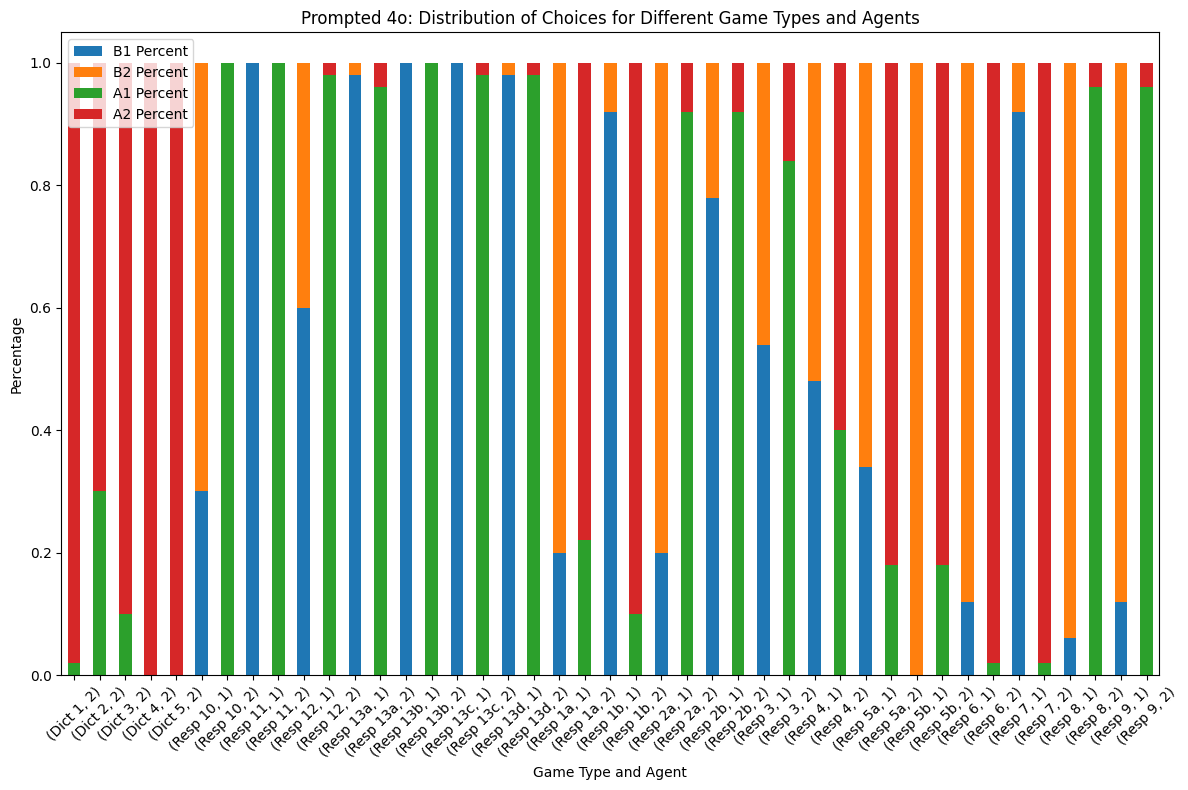

In [ ]:
import matplotlib.pyplot as plt


# Filling NaN with 0 for visualization
final_df_prompted50.fillna(0, inplace=True)


# Plotting the data without averaging
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_prompted50.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']).plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Prompted 4o: Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'B2 Percent', 'A1 Percent', 'A2 Percent'])


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

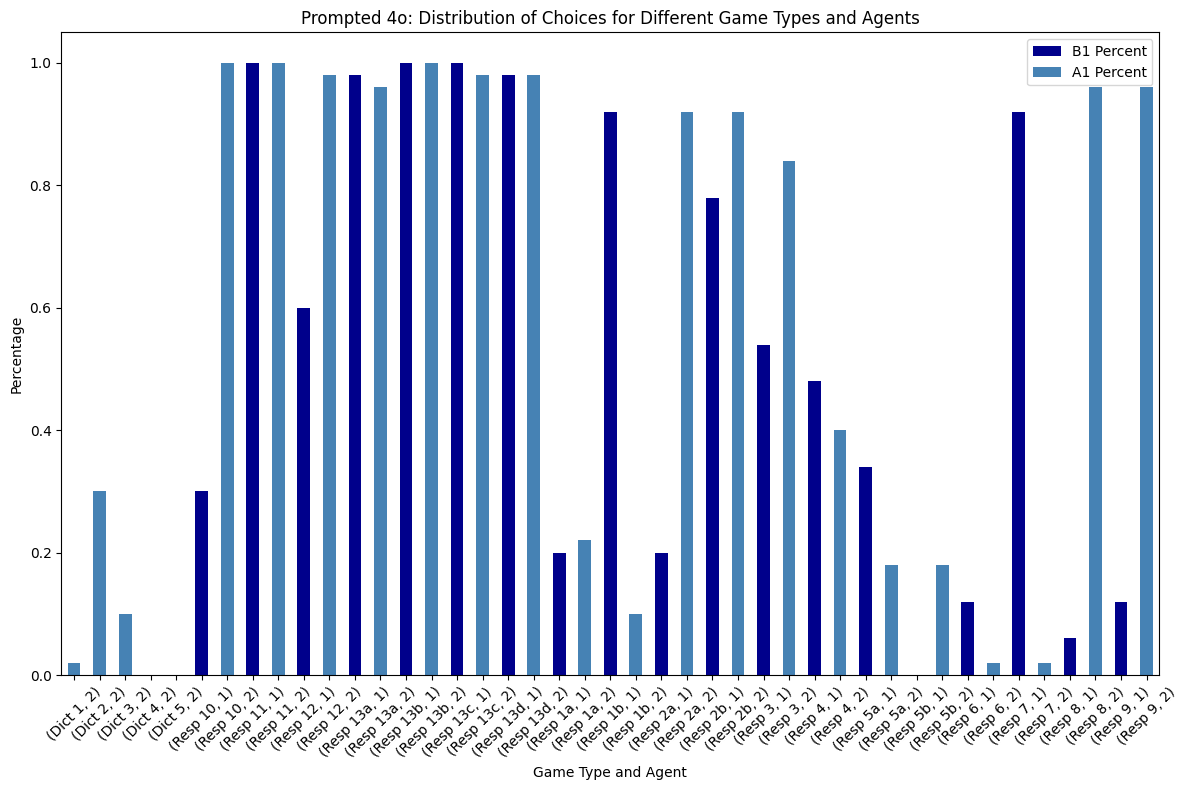

In [ ]:
# Filling NaN with 0 for visualization
final_df_prompted50.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_prompted50.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Prompted 4o: Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## visualized demographics

In [ ]:
prompted_multiagents_responses_df

Unnamed: 0                                          response1  \
0              0  {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...   
1              1  {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...   
2              2  {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...   
3              3  {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...   
4              4  {\n  "subjectID": "XYZ123456",\n  "age": 28,\n...   
...          ...                                                ...   
2145        2145  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   
2146        2146  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   
2147        2147  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   
2148        2148  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   
2149        2149  {\n  "subjectID": "A1B2C3D4",\n  "age": 27,\n ...   

      subjectID                                        game_prompt game_type  \
0     XYZ123456   In this period, you are person B. You may cho...    Dict 1   
1     XYZ123456   In this period, you are person B. You may cho...    Dict 2   
2     XYZ123456   In this period, you are person B. You may cho...    Dict 3   
3     XYZ123456   In this period, you are person B. You may cho...    Dict 4   
4     XYZ123456   In this period, you are person B. You may cho...    Dict 5   
...         ...                                                ...       ...   
2145   A1B2C3D4   In this period, you are person B. You may cho...    Resp 8   
2146   A1B2C3D4   In this period, you are person A. You may cho...    Resp 9   
2147   A1B2C3D4   In this period, you are person B. You may cho...    Resp 9   
2148   A1B2C3D4   In this period, you are person A. You may cho...   Resp 11   
2149   A1B2C3D4   In this period, you are person B. You may cho...   Resp 11   

      agent                                          response2 choice  
0         2  {\n  "reason": "As person B, I need to decide ...     B2  
1         2  {\n  "reason": "In this decision scenario, I n...     B2  
2         2  {\n  "reason": "In this game, Person A has no ...     B1  
3         2  {\n  "reason": "In this decision task, I am pe...     B2  
4         2  {\n  "reason": "In this game, I have two choic...     B2  
...     ...                                                ...    ...  
2145      2  {\n  "reason": "In this game, person A's decis...     B1  
2146      1  {\n  "reason": "Analyzing the choices, if I ch...     A2  
2147      2  {\n  "reason": "Given that Person A had the ch...     B1  
2148      1  {\n  "reason": "As person A, my choice is betw...     A1  
2149      2  {\n  "reason": "Since I am person B and person...     B1  

[2150 rows x 8 columns]

In [ ]:
# store 50 new agents' demo
import pandas as pd
import json


# Function to extract the desired fields from the JSON string
def extract_fields(json_str):
    try:
        data = json.loads(json_str)
        return pd.Series({
            'age': data.get('age'),
            'gender': data.get('gender'),
            'numberSiblings': data.get('numberSiblings'),
            'strategy': data.get('strategy')
        })
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return pd.Series({
            'age': None,
            'gender': None,
            'numberSiblings': None,
            'strategy': None
        })

# Apply the function to the 'response1' column
prompted_multiagents_responses_df[['age', 'gender', 'numberSiblings', 'strategy']] = prompted_multiagents_responses_df['response1'].apply(extract_fields)

# Group by 'subjectID' and take the first occurrence of each field
agents50_demo_prompted = prompted_multiagents_responses_df.groupby('subjectID').agg({
    'age': 'first',
    'gender': 'first',
    'numberSiblings': 'first',
    'strategy': 'first'
}).reset_index()


In [ ]:
agents50_demo_prompted

subjectID  age      gender  numberSiblings  \
0              23XZ89   28      female               2   
1              A12345   29      female               2   
2            A1234567   27      Female               2   
3          A123456789   29      female               2   
4             A12345B   28      female               2   
5             A123X56   29      Female               2   
6            A1B2C3D4   28  non-binary               2   
7              A234XZ   29  Non-Binary               2   
8            A3B5C7D9   29      Female               2   
9            A8373B92   29      Female               2   
10            AB12345   29      female               2   
11             ABC123   28      Female               2   
12          ABC123456   28      Female               2   
13           ID123456   28      female               2   
14               P001   28      Female               2   
15             P00123   29      Female               2   
16             P00987   27      Female               2   
17             P12345   28      Female               2   
18            P123456   29      Female               2   
19           P1234567   29      Female               2   
20          P12345678   29      female               2   
21        P1234567890   28      Female               2   
22          P20231001   28      Female               2   
23          SUB123456   29      female               2   
24          SUBJ12345   28      female               2   
25          TXR459230   27      Female               2   
26          XYZ123456   28        male               2   
27    participant_001   28      Female               2   
28  participant_13579   29      female               2   
29           sub12345   27      female               2   
30            xyz1234   25      female               2   
31           xz93mj2k   29      female               2   

                                             strategy  
0   {'game1': 'Tit for Tat', 'game2': 'Random', 'g...  
1   [{'game1': 'Tit-for-Tat', 'role': 'A', 'descri...  
2   {'game1': 'Tit-for-Tat', 'game2': 'Always Coop...  
3   [{'gameID': 1, 'role': 'A', 'decision': 'Coope...  
4   {'Game1': {'role': 'A', 'decision': 'cooperate...  
5   [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
6   [{'gameID': 1, 'role': 'A', 'decision': 'split...  
7   [{'gameID': 'G1', 'role': 'A', 'decision': 'Co...  
8   {'game1': 'Tit-for-Tat', 'game2': 'Cooperate',...  
9   {'game1': 'Tit-for-Tat', 'game2': 'Grim Trigge...  
10  {'game1': 'Tit-for-Tat', 'game2': 'Always Coop...  
11  [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
12  [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
13  [{'game': 1, 'role': 'A', 'decision': 'coopera...  
14  {'game1': 'cooperated initially, then tit-for-...  
15  [{'game': 'Dictator Game', 'role': 'A', 'decis...  
16  {'Game1': {'Role': 'A', 'Decision': 'Cooperate...  
17  [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
18  [{'game': 1, 'role': 'A', 'decision': 'split e...  
19  [{'gameID': 1, 'role': 'A', 'decision': 'Coope...  
20  {'game1': 'tit-for-tat', 'game2': 'always coop...  
21  [{'game': 1, 'role': 'A', 'decision': 'coopera...  
22  {'game1': 'Tit-for-Tat', 'game2': 'Always Coop...  
23  [{'game': 1, 'role': 'A', 'decision': 'coopera...  
24  [{'gameID': 1, 'role': 'A', 'decision': 'coope...  
25  [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
26  {'game1': 'Tit-for-Tat', 'game2': 'Always Coop...  
27  [{'game': 'Ultimatum Game', 'role': 'Person A'...  
28  [{'gameID': 'G1', 'role': 'A', 'decision': 'co...  
29  [{'game': 1, 'role': 'A', 'decision': 'coopera...  
30  [{'gameID': 1, 'role': 'A', 'decision': 'coope...  
31  {'game1': 'tit-for-tat', 'game2': 'random choi...

In [ ]:
agents50_demo_prompted.to_csv('/content/drive/My Drive/social preference/agents50_demo_prompted.csv')

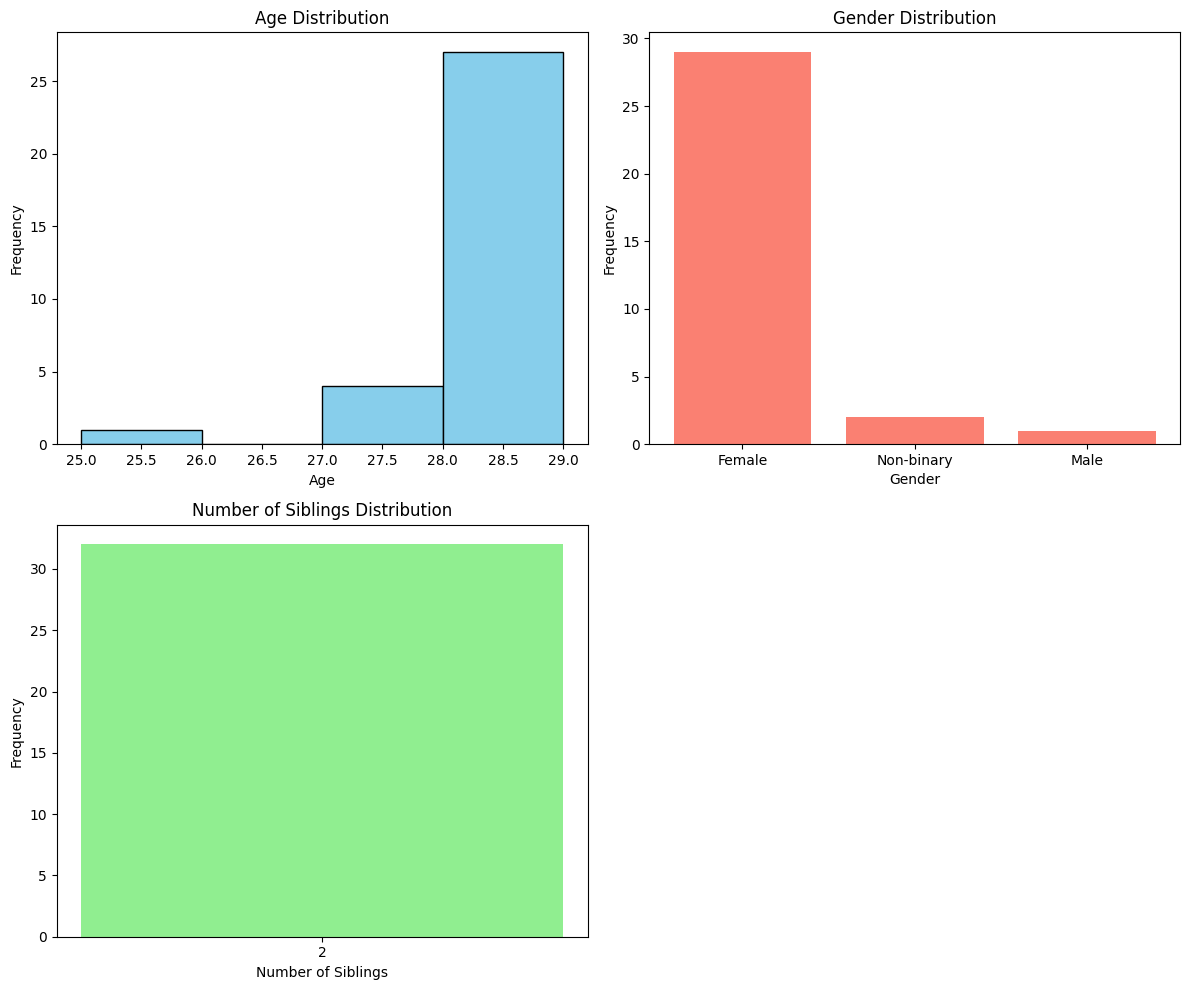

In [ ]:
cleaned_data = agents50_demo_prompted.dropna(subset=['age', 'gender', 'numberSiblings'])

# Convert 'age' and 'numberSiblings' to integer type
cleaned_data['age'] = cleaned_data['age'].astype(int)
cleaned_data['numberSiblings'] = cleaned_data['numberSiblings'].astype(int)

# Capitalize gender values
cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axs[0, 0].hist(cleaned_data['age'], bins=range(min(cleaned_data['age']), max(cleaned_data['age']) + 1), color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Gender Distribution
gender_counts = cleaned_data['gender'].value_counts()
axs[0, 1].bar(gender_counts.index, gender_counts.values, color='salmon')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Frequency')

# Number of Siblings Distribution
siblings_counts = cleaned_data['numberSiblings'].value_counts()
axs[1, 0].bar(siblings_counts.index.map(str), siblings_counts.values, color='lightgreen')
axs[1, 0].set_title('Number of Siblings Distribution')
axs[1, 0].set_xlabel('Number of Siblings')
axs[1, 0].set_ylabel('Frequency')

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()



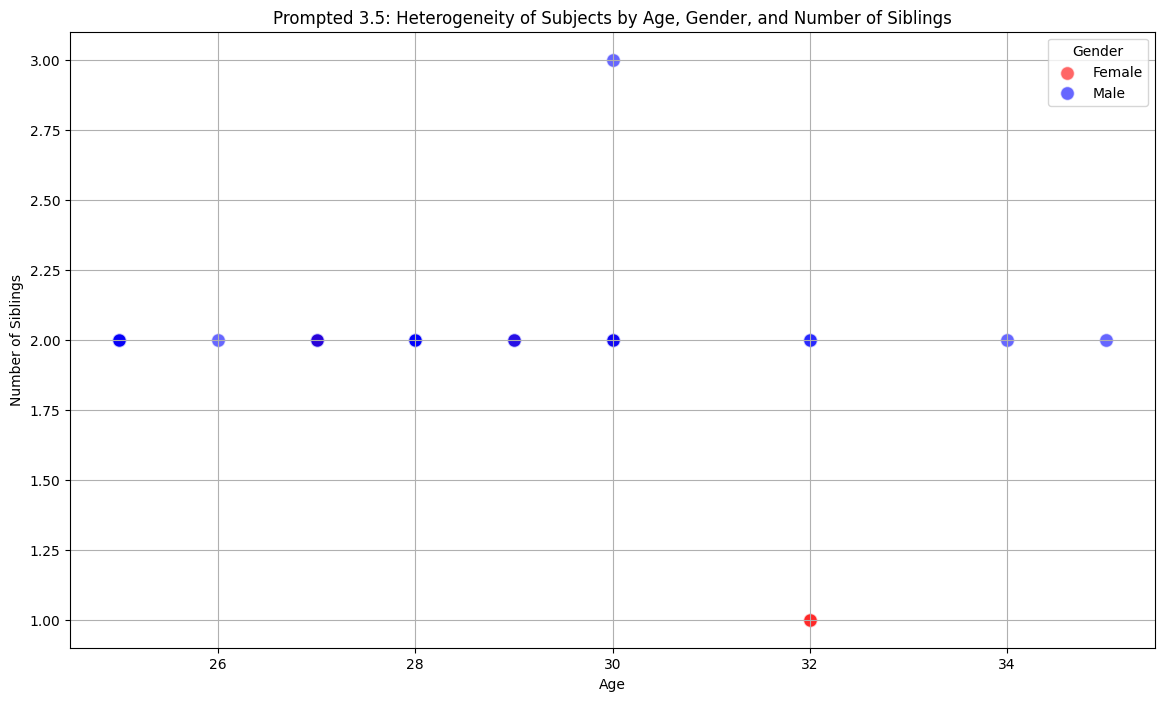

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Capitalize gender values to ensure consistency
cleaned_data['gender'] = cleaned_data['gender'].str.capitalize()

# Define the color mapping for genders
color_mapping = {'Female': 'red', 'Male': 'blue'}

# Create a scatter plot
plt.figure(figsize=(14, 8))

# Plot each gender with the specified color
for gender, color in color_mapping.items():
    subset = cleaned_data[cleaned_data['gender'] == gender]
    plt.scatter(subset['age'], subset['numberSiblings'], label=gender, color=color, alpha=0.6, edgecolors='w', s=100)

plt.title('Prompted 3.5: Heterogeneity of Subjects by Age, Gender, and Number of Siblings')
plt.xlabel('Age')
plt.ylabel('Number of Siblings')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


# **Original data**

In [ ]:
# Step 1: Group by 'game' and 'myrole'
grouped = df_control_cleaned.groupby(['game', 'myrole'])['choice'].value_counts(normalize=True).unstack(fill_value=0).reset_index()

# Step 2: Calculate the number of participants per group
grouped['number_of_new_participants'] = df_control_cleaned.groupby(['game', 'myrole']).size().values

# Step 3: Rename the columns to follow the required naming convention
grouped.columns = ['game_type', 'agent', 'A1_percent', 'A2_percent', 'B1_percent', 'B2_percent', 'number_of_new_participants']

# Step 4: Reorder columns to match the desired output
origdata_df = grouped[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]



In [ ]:
origdata_df

game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          21    0.333333    0.666667   
1     Dict 2      2                          22    0.818182    0.181818   
2     Dict 3      2                          21    0.761905    0.238095   
3     Dict 4      2                          22    0.500000    0.500000   
4     Dict 5      2                          22    0.636364    0.363636   
5    Resp 10      1                          21    0.000000    0.000000   
6    Resp 10      2                          22    0.954545    0.045455   
7    Resp 11      1                          22    0.000000    0.000000   
8    Resp 11      2                          22    0.909091    0.090909   
9    Resp 12      1                          23    0.000000    0.000000   
10   Resp 12      2                          23    0.956522    0.043478   
11  Resp 13a      1                          23    0.000000    0.000000   
12  Resp 13a      2                          23    0.913043    0.086957   
13  Resp 13b      1                          23    0.000000    0.000000   
14  Resp 13b      2                          23    0.826087    0.173913   
15  Resp 13c      1                          23    0.000000    0.000000   
16  Resp 13c      2                          23    0.782609    0.217391   
17  Resp 13d      1                          23    0.000000    0.000000   
18  Resp 13d      2                          23    0.913043    0.086957   
19   Resp 1a      1                          21    0.000000    0.000000   
20   Resp 1a      2                          22    0.318182    0.681818   
21   Resp 1b      1                          23    0.000000    0.000000   
22   Resp 1b      2                          23    0.391304    0.608696   
23   Resp 2a      1                          22    0.000000    0.000000   
24   Resp 2a      2                          22    0.727273    0.272727   
25   Resp 2b      1                          21    0.000000    0.000000   
26   Resp 2b      2                          22    0.636364    0.363636   
27    Resp 3      1                          22    0.000000    0.000000   
28    Resp 3      2                          22    0.545455    0.454545   
29    Resp 4      1                          22    0.000000    0.000000   
30    Resp 4      2                          22    0.227273    0.772727   
31   Resp 5a      1                          21    0.000000    0.000000   
32   Resp 5a      2                          22    0.454545    0.545455   
33   Resp 5b      1                          21    0.000000    0.000000   
34   Resp 5b      2                          22    0.636364    0.363636   
35    Resp 6      1                          23    0.000000    0.000000   
36    Resp 6      2                          23    0.347826    0.652174   
37    Resp 7      1                          23    0.000000    0.000000   
38    Resp 7      2                          23    0.130435    0.869565   
39    Resp 8      1                          23    0.000000    0.000000   
40    Resp 8      2                          23    0.826087    0.173913   
41    Resp 9      1                          23    0.000000    0.000000   
42    Resp 9      2                          23    0.869565    0.130435   

    A1_percent  A2_percent  
0     0.000000    0.000000  
1     0.000000    0.000000  
2     0.000000    0.000000  
3     0.000000    0.000000  
4     0.000000    0.000000  
5     0.380952    0.619048  
6     0.000000    0.000000  
7     0.818182    0.181818  
8     0.000000    0.000000  
9     0.217391    0.782609  
10    0.000000    0.000000  
11    0.826087    0.173913  
12    0.000000    0.000000  
13    0.739130    0.260870  
14    0.000000    0.000000  
15    0.782609    0.217391  
16    0.000000    0.000000  
17    0.869565    0.130435  
18    0.000000    0.000000  
19    0.285714    0.714286  
20    0.000000    0.000000  
21    0.695652    0.304348  
22    0.000000    0.000000  
23    

In [ ]:
origdata_df.to_csv('/content/drive/My Drive/social preference/origdata_df.csv')

In [ ]:
# Convert percentage columns to counts for the final dataset

origdata_df['B1_count'] = (origdata_df['B1_percent'] * origdata_df['number_of_new_participants']).round().astype(int)
origdata_df['B2_count'] = (origdata_df['B2_percent'] * origdata_df['number_of_new_participants']).round().astype(int)
origdata_df['A1_count'] = (origdata_df['A1_percent'] * origdata_df['number_of_new_participants']).round().astype(int)
origdata_df['A2_count'] = (origdata_df['A2_percent'] * origdata_df['number_of_new_participants']).round().astype(int)


orig_count_df = origdata_df[['game_type', 'agent', 'number_of_new_participants', 'B1_count', 'B2_count', 'A1_count', 'A2_count']].copy()
orig_count_df.loc[orig_count_df['agent'] == 1, ['B1_count', 'B2_count']] = np.nan
orig_count_df.loc[orig_count_df['agent'] == 2, ['A1_count', 'A2_count']] = np.nan
orig_count_df

<ipython-input-36-b5252228a3fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origdata_df['B1_count'] = (origdata_df['B1_percent'] * origdata_df['number_of_new_participants']).round().astype(int)
<ipython-input-36-b5252228a3fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origdata_df['B2_count'] = (origdata_df['B2_percent'] * origdata_df['number_of_new_participants']).round().astype(int)
<ipython-input-36-b5252228a3fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

game_type  agent  number_of_new_participants  B1_count  B2_count  A1_count  \
0     Dict 1      2                          21       7.0      14.0       NaN   
1     Dict 2      2                          22      18.0       4.0       NaN   
2     Dict 3      2                          21      16.0       5.0       NaN   
3     Dict 4      2                          22      11.0      11.0       NaN   
4     Dict 5      2                          22      14.0       8.0       NaN   
5    Resp 10      1                          21       NaN       NaN       8.0   
6    Resp 10      2                          22      21.0       1.0       NaN   
7    Resp 11      1                          22       NaN       NaN      18.0   
8    Resp 11      2                          22      20.0       2.0       NaN   
9    Resp 12      1                          23       NaN       NaN       5.0   
10   Resp 12      2                          23      22.0       1.0       NaN   
11  Resp 13a      1                          23       NaN       NaN      19.0   
12  Resp 13a      2                          23      21.0       2.0       NaN   
13  Resp 13b      1                          23       NaN       NaN      17.0   
14  Resp 13b      2                          23      19.0       4.0       NaN   
15  Resp 13c      1                          23       NaN       NaN      18.0   
16  Resp 13c      2                          23      18.0       5.0       NaN   
17  Resp 13d      1                          23       NaN       NaN      20.0   
18  Resp 13d      2                          23      21.0       2.0       NaN   
19   Resp 1a      1                          21       NaN       NaN       6.0   
20   Resp 1a      2                          22       7.0      15.0       NaN   
21   Resp 1b      1                          23       NaN       NaN      16.0   
22   Resp 1b      2                          23       9.0      14.0       NaN   
23   Resp 2a      1                          22       NaN       NaN      13.0   
24   Resp 2a      2                          22      16.0       6.0       NaN   
25   Resp 2b      1                          21       NaN       NaN      20.0   
26   Resp 2b      2                          22      14.0       8.0       NaN   
27    Resp 3      1                          22       NaN       NaN      18.0   
28    Resp 3      2                          22      12.0      10.0       NaN   
29    Resp 4      1                          22       NaN       NaN      12.0   
30    Resp 4      2                          22       5.0      17.0       NaN   
31   Resp 5a      1                          21       NaN       NaN      17.0   
32   Resp 5a      2                          22      10.0      12.0       NaN   
33   Resp 5b      1                          21       NaN       NaN       0.0   
34   Resp 5b      2                          22      14.0       8.0       NaN   
35    Resp 6      1                          23       NaN       NaN       7.0   
36    Resp 6      2                          23       8.0      15.0       NaN   
37    Resp 7      1                          23       NaN       NaN      19.0   
38    Resp 7      2                          23       3.0      20.0       NaN   
39    Resp 8      1                          23       NaN       NaN      17.0   
40    Resp 8      2                          23      19.0       4.0       NaN   
41    Resp 9      1                          23       NaN       NaN      17.0   
42    Resp 9      2                          23      20.0       3.0       NaN   

    A2_count  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5       13.0  
6        NaN  
7        4.0  
8        NaN  
9       18.0  
10       NaN  
11       4.0  
12       NaN  
13       6.0  
14       NaN  
15       5.0  
16       NaN  
17       3.0  
18       NaN  
19      15.0  
20       NaN  
21       7.0  
22       NaN  
23       9.0  
24       NaN  
25       1.0  
26       NaN  
27       4.0  
28 

<ipython-input-37-1a3bc8f4cd87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origdata_df.fillna(0, inplace=True)


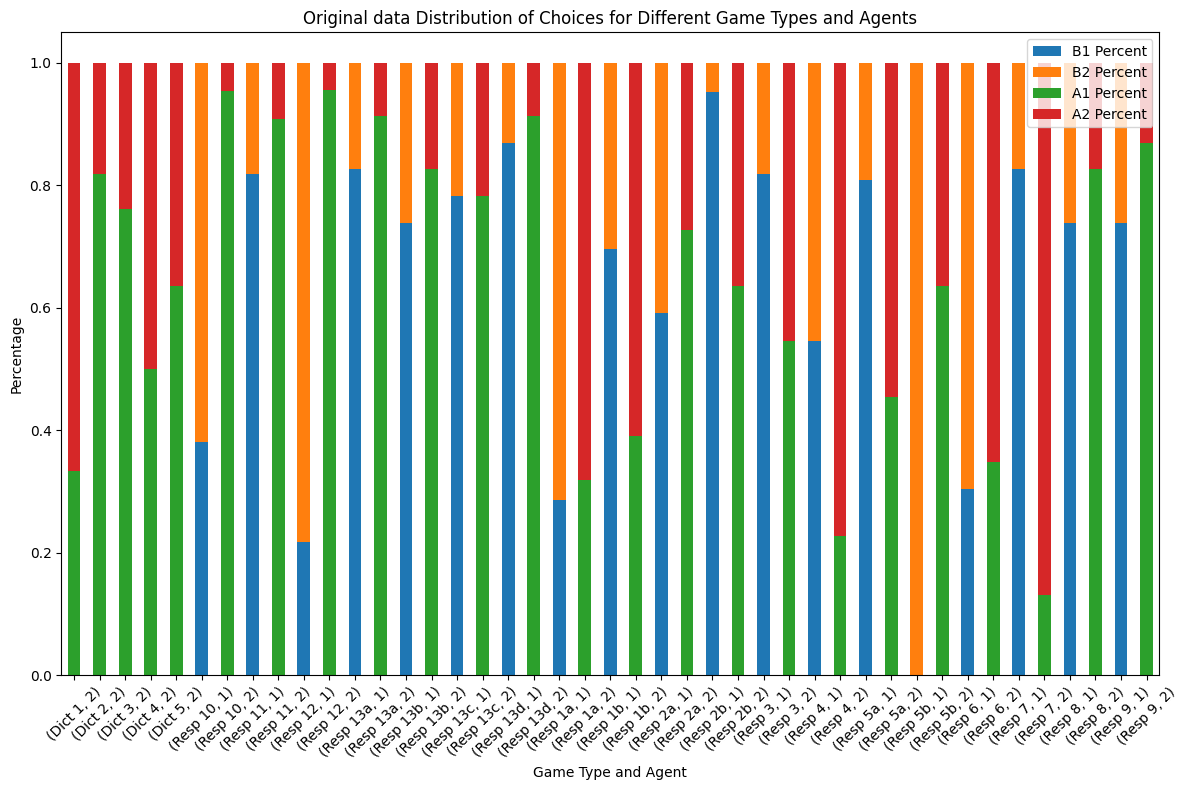

In [ ]:
import matplotlib.pyplot as plt



# Filling NaN with 0 for visualization
origdata_df.fillna(0, inplace=True)


# Plotting the data without averaging
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
origdata_df.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']).plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Original data Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'B2 Percent', 'A1 Percent', 'A2 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-41-737084b2a653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origdata_df.fillna(0, inplace=True)


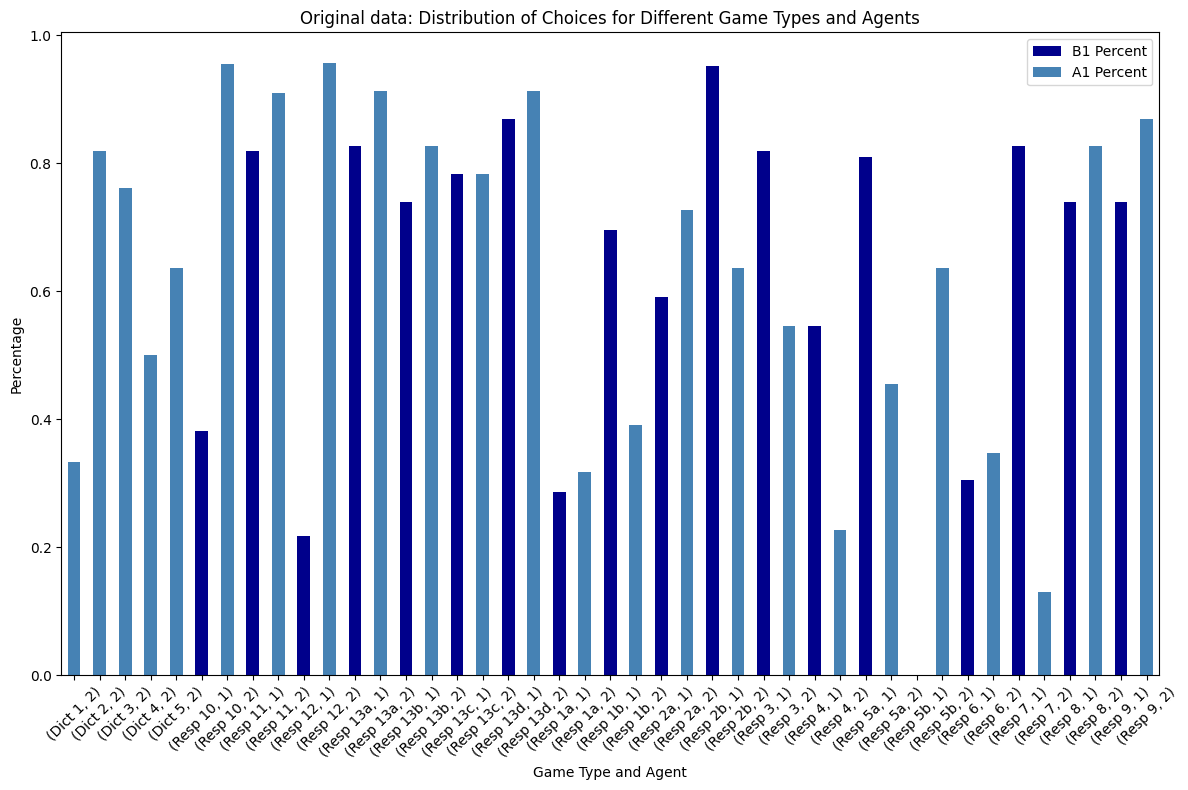

In [ ]:
# Filling NaN with 0 for visualization
origdata_df.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
origdata_df.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Original data: Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MD

In [ ]:


def calculate_average_discrepancy(df1, df2):
    merged_df = pd.merge(df1, df2, on=['game_type', 'agent'], suffixes=('_df1', '_df2'))
    merged_df['B1_discrepancy'] = (merged_df['B1_percent_df1'] - merged_df['B1_percent_df2']).abs()
    merged_df['A1_discrepancy'] = (merged_df['A1_percent_df1'] - merged_df['A1_percent_df2']).abs()

    # Sum up the discrepancies and calculate the average
    merged_df['total_discrepancy'] = merged_df['B1_discrepancy'].add(merged_df['A1_discrepancy'], fill_value=0)
    avg_discrepancy = merged_df['total_discrepancy'].mean()

    return avg_discrepancy




In [ ]:
# Calculate average discrepancies for each pair of dataframes
avg_discrepancy_ft50 = calculate_average_discrepancy(final_df_ft50, origdata_df)
avg_discrepancy_baseline50 = calculate_average_discrepancy(final_df_baseline50, origdata_df)
avg_discrepancy_prompted50 = calculate_average_discrepancy(final_df_prompted50, origdata_df)

# Print the results
print(f"Final DF FT50 vs. OrigData DF: Average Discrepancy = {avg_discrepancy_ft50}")
print(f"Final DF Baseline50 vs. OrigData DF: Average Discrepancy = {avg_discrepancy_baseline50}")
print(f"Final DF Prompted50 vs. OrigData DF: Average Discrepancy = {avg_discrepancy_prompted50}")

Final DF FT50 vs. OrigData DF: Average Discrepancy = 0.14111417303386103
Final DF Baseline50 vs. OrigData DF: Average Discrepancy = 0.24582791660648085
Final DF Prompted50 vs. OrigData DF: Average Discrepancy = 0.24773267851124273


# KS test

In [ ]:
from scipy.stats import ks_2samp
from scipy.stats import cramervonmises_2samp
from scipy.stats import mannwhitneyu

## VS ft

In [ ]:
orig_count_df = origdata_df

In [ ]:
orig_count_df_A = orig_count_df[orig_count_df['agent'] == 1][['A1_percent', 'A2_percent']]
orig_count_df_A = orig_count_df_A.drop(index=9)
orig_count_df_A

A1_percent  A2_percent
5     0.380952    0.619048
7     0.818182    0.181818
11    0.826087    0.173913
13    0.739130    0.260870
15    0.782609    0.217391
17    0.869565    0.130435
19    0.285714    0.714286
21    0.695652    0.304348
23    0.590909    0.409091
25    0.952381    0.047619
27    0.818182    0.181818
29    0.545455    0.454545
31    0.809524    0.190476
33    0.000000    1.000000
35    0.304348    0.695652
37    0.826087    0.173913
39    0.739130    0.260870
41    0.739130    0.260870

In [ ]:
orig_count_df_B = orig_count_df[orig_count_df['agent'] == 2][['B1_percent', 'B2_percent']]
orig_count_df_B

B1_percent  B2_percent
0     0.333333    0.666667
1     0.818182    0.181818
2     0.761905    0.238095
3     0.500000    0.500000
4     0.636364    0.363636
6     0.954545    0.045455
8     0.909091    0.090909
10    0.956522    0.043478
12    0.913043    0.086957
14    0.826087    0.173913
16    0.782609    0.217391
18    0.913043    0.086957
20    0.318182    0.681818
22    0.391304    0.608696
24    0.727273    0.272727
26    0.636364    0.363636
28    0.545455    0.454545
30    0.227273    0.772727
32    0.454545    0.545455
34    0.636364    0.363636
36    0.347826    0.652174
38    0.130435    0.869565
40    0.826087    0.173913
42    0.869565    0.130435

In [ ]:
ft50_count_df = final_df_ft50

In [ ]:
ft50_count_df_A = ft50_count_df[ft50_count_df['agent'] == 1][['A1_percent', 'A2_percent']]
ft50_count_df_A

A1_percent  A2_percent
5     0.680000    0.320000
7     0.960000    0.040000
9     0.816327    0.183673
11    0.720000    0.280000
13    0.920000    0.080000
15    0.900000    0.100000
17    0.920000    0.080000
19    0.620000    0.380000
21    0.740000    0.260000
23    0.580000    0.420000
25    0.860000    0.140000
27    0.600000    0.400000
29    0.680000    0.320000
31    0.640000    0.360000
33    0.260000    0.740000
35    0.800000    0.200000
37    0.880000    0.100000
39    0.620000    0.380000
41    0.540000    0.460000

In [ ]:
ft50_count_df_B = ft50_count_df[ft50_count_df['agent'] == 2][['B1_percent', 'B2_percent']]
ft50_count_df_B

B1_percent  B2_percent
0         0.10        0.90
1         0.70        0.30
2         0.64        0.36
3         0.66        0.34
4         0.48        0.52
6         1.00         NaN
8         0.94        0.06
10        0.94        0.06
12        0.94        0.06
14        1.00         NaN
16        0.92        0.08
18        0.96        0.04
20        0.30        0.70
22        0.30        0.70
24        0.68        0.32
26        0.78        0.22
28        0.54        0.46
30        0.44        0.54
32        0.52        0.48
34        0.58        0.42
36        0.20        0.80
38        0.30        0.70
40        0.74        0.24
42        0.74        0.26

In [ ]:
ft50_count_B = ft50_count_df_B.values.flatten()
ft50_count_A = ft50_count_df_A.values.flatten()

orig_count_A = orig_count_df_A.values.flatten()
orig_count_B = orig_count_df_B.values.flatten()



In [ ]:
ft50_count_A

array([0.68      , 0.32      , 0.96      , 0.04      , 0.81632653,
       0.18367347, 0.72      , 0.28      , 0.92      , 0.08      ,
       0.9       , 0.1       , 0.92      , 0.08      , 0.62      ,
       0.38      , 0.74      , 0.26      , 0.58      , 0.42      ,
       0.86      , 0.14      , 0.6       , 0.4       , 0.68      ,
       0.32      , 0.64      , 0.36      , 0.26      , 0.74      ,
       0.8       , 0.2       , 0.88      , 0.1       , 0.62      ,
       0.38      , 0.54      , 0.46      ])

In [ ]:
orig_count_A

array([0.38095238, 0.61904762, 0.81818182, 0.18181818, 0.82608696,
       0.17391304, 0.73913043, 0.26086957, 0.7826087 , 0.2173913 ,
       0.86956522, 0.13043478, 0.28571429, 0.71428571, 0.69565217,
       0.30434783, 0.59090909, 0.40909091, 0.95238095, 0.04761905,
       0.81818182, 0.18181818, 0.54545455, 0.45454545, 0.80952381,
       0.19047619, 0.        , 1.        , 0.30434783, 0.69565217,
       0.82608696, 0.17391304, 0.73913043, 0.26086957, 0.73913043,
       0.26086957])

In [ ]:

ks_stat_B, p_value_B = ks_2samp(orig_count_B, ft50_count_B)

# Perform the KS test for normalized A counts
ks_stat_A, p_value_A = ks_2samp(orig_count_A, ft50_count_A)

ks_stat_B, p_value_B, ks_stat_A, p_value_A

(0.10416666666666667,
 0.9601715180757678,
 0.12719298245614036,
 0.8708992645128769)

In [ ]:
orig_count_df_A1 = orig_count_df[orig_count_df['agent'] == 1][['A1_percent']]
orig_count_df_A2 = orig_count_df[orig_count_df['agent'] == 1][['A2_percent']]

In [ ]:
orig_count_df_B1 = orig_count_df[orig_count_df['agent'] == 2][['B1_percent']]
orig_count_df_B2 = orig_count_df[orig_count_df['agent'] == 2][['B2_percent']]

In [ ]:
ft50_count_df_A1 = ft50_count_df[ft50_count_df['agent'] == 1][['A1_percent']]
ft50_count_df_A2 = ft50_count_df[ft50_count_df['agent'] == 1][['A2_percent']]

In [ ]:
ft50_count_df_B1 = ft50_count_df[ft50_count_df['agent'] == 2][['B1_percent']]
ft50_count_df_B2 = ft50_count_df[ft50_count_df['agent'] == 2][['B2_percent']]

In [ ]:
B1_diff = (orig_count_df_B1 - ft50_count_df_B1).abs()
B1_diff.B1_percent.mean()

0.10172187715665977

In [ ]:
A1_diff.reset_index(drop=True, inplace=True)
B1_diff.reset_index(drop=True, inplace=True)

A1_percent
0     0.299048
1     0.141818
2     0.598935
3     0.106087
4     0.180870
5     0.117391
6     0.050435
7     0.334286
8     0.044348
9     0.010909
10    0.092381
11    0.218182
12    0.134545
13    0.169524
14    0.260000
15    0.495652
16    0.053913
17    0.119130
18    0.199130

In [ ]:
total_diff = pd.concat([A1_diff, B1_diff], ignore_index=True)
total_diff['total_percent'] = total_diff['A1_percent'].add(total_diff['B1_percent'], fill_value=0)
total_diff['total_percent'].mean()

0.14111417303386106

In [ ]:
ft50_count_B1 = ft50_count_df_B1.values.flatten()
ft50_count_A1 = ft50_count_df_A1.values.flatten()
ft50_count_B2 = ft50_count_df_B2.values.flatten()
ft50_count_A2 = ft50_count_df_A2.values.flatten()

orig_count_A1 = orig_count_df_A1.values.flatten()
orig_count_B1 = orig_count_df_B1.values.flatten()
orig_count_A2 = orig_count_df_A2.values.flatten()
orig_count_B2 = orig_count_df_B2.values.flatten()

In [ ]:
len(ft50_count_B2)

24

In [ ]:
len(orig_count_A2)

19

In [ ]:
# Perform the KS test for normalized B counts
ks_stat_B1, p_value_B1 = ks_2samp(orig_count_B1, ft50_count_B1)
ks_stat_B2, p_value_B2 = ks_2samp(orig_count_B2, ft50_count_B2)

ks_stat_B1, p_value_B1, ks_stat_B2, p_value_B2

(0.20833333333333334,
 0.686017125117228,
 0.20833333333333334,
 0.686017125117228)

In [ ]:
# Perform the KS test for normalized A counts
ks_stat_A1, p_value_A1 = ks_2samp(orig_count_A1, ft50_count_A1)
ks_stat_A2, p_value_A2 = ks_2samp(orig_count_A2, ft50_count_A2)

ks_stat_A1, p_value_A1, ks_stat_A2, p_value_A2

(0.21052631578947367,
 0.808061649945869,
 0.21052631578947367,
 0.808061649945869)

(283.0, 0.9260396083365974, 294.0, 0.9096704061003895)

In [ ]:
from scipy.stats import cramervonmises_2samp

In [ ]:
from scipy.stats import mannwhitneyu

u_statistic_B1, p_value_B1 = mannwhitneyu(orig_count_B1, ft50_count_B1)
u_statistic_B2, p_value_B2 = mannwhitneyu(orig_count_B2, ft50_count_B2)

u_statistic_B1, p_value_B1, u_statistic_B2, p_value_B2

(283.0, 0.9260396083365974, 294.0, 0.9096704061003895)

In [ ]:
u_statistic_A1, p_value_A1 = mannwhitneyu(orig_count_A1, ft50_count_A1)
u_statistic_A2, p_value_A2 = mannwhitneyu(orig_count_A2, ft50_count_A2)

u_statistic_A1, p_value_A1, u_statistic_A2, p_value_A2

(154.0, 0.44759091097393233, 207.0, 0.44756603835698905)

## VS. baseline

In [ ]:
final_df_baseline50

game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.00        1.00   
1     Dict 2      2                          50        0.54        0.46   
2     Dict 3      2                          50        0.42        0.58   
3     Dict 4      2                          50        0.02        0.98   
4     Dict 5      2                          50        0.04        0.96   
5    Resp 10      1                          50        0.00        0.00   
6    Resp 10      2                          50        1.00        0.00   
7    Resp 11      1                          50        0.00        0.00   
8    Resp 11      2                          50        1.00        0.00   
9    Resp 12      1                          50        0.00        0.00   
10   Resp 12      2                          50        0.98        0.02   
11  Resp 13a      1                          50        0.00        0.00   
12  Resp 13a      2                          50        0.98        0.02   
13  Resp 13b      1                          50        0.00        0.00   
14  Resp 13b      2                          50        1.00        0.00   
15  Resp 13c      1                          50        0.00        0.00   
16  Resp 13c      2                          50        0.98        0.02   
17  Resp 13d      1                          50        0.00        0.00   
18  Resp 13d      2                          50        0.98        0.02   
19   Resp 1a      1                          50        0.00        0.00   
20   Resp 1a      2                          50        0.16        0.84   
21   Resp 1b      1                          50        0.00        0.00   
22   Resp 1b      2                          50        0.20        0.80   
23   Resp 2a      1                          50        0.00        0.00   
24   Resp 2a      2                          50        1.00        0.00   
25   Resp 2b      1                          50        0.00        0.00   
26   Resp 2b      2                          50        1.00        0.00   
27    Resp 3      1                          50        0.00        0.00   
28    Resp 3      2                          50        1.00        0.00   
29    Resp 4      1                          50        0.00        0.00   
30    Resp 4      2                          50        0.94        0.06   
31   Resp 5a      1                          50        0.00        0.00   
32   Resp 5a      2                          50        0.64        0.36   
33   Resp 5b      1                          50        0.00        0.00   
34   Resp 5b      2                          50        0.36        0.64   
35    Resp 6      1                          50        0.00        0.00   
36    Resp 6      2                          50        0.02        0.96   
37    Resp 7      1                          50        0.00        0.00   
38    Resp 7      2                          50        0.00        1.00   
39    Resp 8      1                          50        0.00        0.00   
40    Resp 8      2                          50        1.00        0.00   
41    Resp 9      1                          50        0.00        0.00   
42    Resp 9      2                          50        1.00        0.00   

    A1_percent  A2_percent  
0         0.00        0.00  
1         0.00        0.00  
2         0.00        0.00  
3         0.00        0.00  
4         0.00        0.00  
5         0.58        0.42  
6         0.00        0.00  
7         1.00        0.00  
8         0.00        0.00  
9         0.70        0.30  
10        0.00        0.00  
11        1.00        0.00  
12        0.00        0.00  
13        1.00        0.00  
14        0.00        0.00  
15        0.96        0.04  
16        0.00        0.00  
17        0.98        0.02  
18        0.00        0.00  
19        0.28        0.72  
20        0.00        0.00  
21        0.96        0.04  
22        0.00        0.00  
23    

In [ ]:
baseline_count_df_A = final_df_baseline50[final_df_baseline50['agent'] == 1][['A1_percent', 'A2_percent']]
baseline_count_df_B = final_df_baseline50[final_df_baseline50['agent'] == 2][['B1_percent', 'B2_percent']]

baseline_count_B = baseline_count_df_B.values.flatten()
baseline_count_A = baseline_count_df_A.values.flatten()

# Perform the KS test for normalized B counts
ks_stat_B, p_value_B = ks_2samp(orig_count_B, baseline_count_B)

# Perform the KS test for normalized A counts
ks_stat_A, p_value_A = ks_2samp(orig_count_A, baseline_count_A)

# Print results
ks_stat_B, p_value_B, ks_stat_A, p_value_A

(0.3541666666666667,
 0.004544598789165979,
 0.20614035087719298,
 0.3452665092831949)

In [ ]:
len(baseline_count_B)

48

In [ ]:
baseline_count_df_A1 = final_df_baseline50[final_df_baseline50['agent'] == 1][['A1_percent']]
baseline_count_df_A2 = final_df_baseline50[final_df_baseline50['agent'] == 1][['A2_percent']]

baseline_count_df_B1 = final_df_baseline50[final_df_baseline50['agent'] == 2][['B1_percent']]
baseline_count_df_B2 = final_df_baseline50[final_df_baseline50['agent'] == 2][['B2_percent']]

In [ ]:
B1_diff = (orig_count_df_B1 - baseline_count_df_B1).abs()
A1_diff = (orig_count_df_A1 - baseline_count_df_A1).abs()

In [ ]:
A1_diff.reset_index(drop=True, inplace=True)
B1_diff.reset_index(drop=True, inplace=True)

In [ ]:
total_diff = pd.concat([A1_diff, B1_diff], ignore_index=True)
total_diff['total_percent'] = total_diff['A1_percent'].add(total_diff['B1_percent'], fill_value=0)
total_diff['total_percent'].mean()

0.24582791660648085

In [ ]:
baseline_count_B1 = baseline_count_df_B1.values.flatten()
baseline_count_A1 = baseline_count_df_A1.values.flatten()
baseline_count_B2 = baseline_count_df_B2.values.flatten()
baseline_count_A2 = baseline_count_df_A2.values.flatten()

In [ ]:
len(baseline_count_A1)

19

In [ ]:
# Perform the KS test for normalized B counts
ks_stat_B1, p_value_B1 = ks_2samp(orig_count_B1, baseline_count_B1)
ks_stat_B2, p_value_B2 = ks_2samp(orig_count_B2, baseline_count_B2)

ks_stat_B1, p_value_B1, ks_stat_B2, p_value_B2

(0.5, 0.00432085032746239, 0.5, 0.00432085032746239)

In [ ]:
# Perform the KS test for normalized A counts
ks_stat_A1, p_value_A1 = ks_2samp(orig_count_A1, baseline_count_A1)
ks_stat_A2, p_value_A2 = ks_2samp(orig_count_A2, baseline_count_A2)

ks_stat_A1, p_value_A1, ks_stat_A2, p_value_A2

(0.3157894736842105,
 0.3056890512159651,
 0.3157894736842105,
 0.3056890512159651)

In [ ]:
U_stat_B1, p_value_B1 = mannwhitneyu(orig_count_B1, baseline_count_B1)
U_stat_A1, p_value_A1 = mannwhitneyu(orig_count_A1, baseline_count_A1)

U_stat_B1, p_value_B1, U_stat_A1, p_value_A1

(233.0, 0.25978697120181127, 181.5, 0.9883451028447193)

In [ ]:
U_stat_B2, p_value_B2 = mannwhitneyu(orig_count_B2, baseline_count_B2)
U_stat_A2, p_value_A2 = mannwhitneyu(orig_count_A2, baseline_count_A2)

U_stat_B1, p_value_B1, U_stat_A1, p_value_A1

(233.0, 0.25978697120181127, 181.5, 0.9883451028447193)

## VS. prompted

In [ ]:
final_df_prompted50

game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.02        0.98   
1     Dict 2      2                          50        0.30        0.70   
2     Dict 3      2                          50        0.10        0.90   
3     Dict 4      2                          50        0.00        1.00   
4     Dict 5      2                          50        0.00        1.00   
5    Resp 10      1                          50        0.00        0.00   
6    Resp 10      2                          50        1.00        0.00   
7    Resp 11      1                          50        0.00        0.00   
8    Resp 11      2                          50        1.00        0.00   
9    Resp 12      1                          50        0.00        0.00   
10   Resp 12      2                          50        0.98        0.02   
11  Resp 13a      1                          50        0.00        0.00   
12  Resp 13a      2                          50        0.96        0.04   
13  Resp 13b      1                          50        0.00        0.00   
14  Resp 13b      2                          50        1.00        0.00   
15  Resp 13c      1                          50        0.00        0.00   
16  Resp 13c      2                          50        0.98        0.02   
17  Resp 13d      1                          50        0.00        0.00   
18  Resp 13d      2                          50        0.98        0.02   
19   Resp 1a      1                          50        0.00        0.00   
20   Resp 1a      2                          50        0.22        0.78   
21   Resp 1b      1                          50        0.00        0.00   
22   Resp 1b      2                          50        0.10        0.90   
23   Resp 2a      1                          50        0.00        0.00   
24   Resp 2a      2                          50        0.92        0.08   
25   Resp 2b      1                          50        0.00        0.00   
26   Resp 2b      2                          50        0.92        0.08   
27    Resp 3      1                          50        0.00        0.00   
28    Resp 3      2                          50        0.84        0.16   
29    Resp 4      1                          50        0.00        0.00   
30    Resp 4      2                          50        0.40        0.60   
31   Resp 5a      1                          50        0.00        0.00   
32   Resp 5a      2                          50        0.18        0.82   
33   Resp 5b      1                          50        0.00        0.00   
34   Resp 5b      2                          50        0.18        0.82   
35    Resp 6      1                          50        0.00        0.00   
36    Resp 6      2                          50        0.02        0.98   
37    Resp 7      1                          50        0.00        0.00   
38    Resp 7      2                          50        0.02        0.98   
39    Resp 8      1                          50        0.00        0.00   
40    Resp 8      2                          50        0.96        0.04   
41    Resp 9      1                          50        0.00        0.00   
42    Resp 9      2                          50        0.96        0.04   

    A1_percent  A2_percent  
0         0.00        0.00  
1         0.00        0.00  
2         0.00        0.00  
3         0.00        0.00  
4         0.00        0.00  
5         0.30        0.70  
6         0.00        0.00  
7         1.00        0.00  
8         0.00        0.00  
9         0.60        0.40  
10        0.00        0.00  
11        0.98        0.02  
12        0.00        0.00  
13        1.00        0.00  
14        0.00        0.00  
15        1.00        0.00  
16        0.00        0.00  
17        0.98        0.02  
18        0.00        0.00  
19        0.20        0.80  
20        0.00        0.00  
21        0.92        0.08  
22        0.00        0.00  
23    

In [ ]:
prompted_count_df_A = final_df_prompted50[final_df_prompted50['agent'] == 1][['A1_percent', 'A2_percent']]
prompted_count_df_B = final_df_prompted50[final_df_prompted50['agent'] == 2][['B1_percent', 'B2_percent']]

prompted_count_B = prompted_count_df_B.values.flatten()
prompted_count_A = prompted_count_df_A.values.flatten()

# Perform the KS test for normalized B counts
ks_stat_B, p_value_B = ks_2samp(orig_count_B, prompted_count_B)

# Perform the KS test for normalized A counts
ks_stat_A, p_value_A = ks_2samp(orig_count_A, prompted_count_A)

# Print results
ks_stat_B, p_value_B, ks_stat_A, p_value_A

(0.2916666666666667,
 0.033173073759550795,
 0.23391812865497075,
 0.2142770922559408)

In [ ]:
promoted_count_df_A1 = final_df_prompted50[final_df_prompted50['agent'] == 1][['A1_percent']]
promoted_count_df_A2 = final_df_prompted50[final_df_prompted50['agent'] == 1][['A2_percent']]

promoted_count_df_B1 = final_df_prompted50[final_df_prompted50['agent'] == 2][['B1_percent']]
promoted_count_df_B2 = final_df_prompted50[final_df_prompted50['agent'] == 2][['B2_percent']]

In [ ]:
promoted_count_B1 = promoted_count_df_B1.values.flatten()
promoted_count_A1 = promoted_count_df_A1.values.flatten()
promoted_count_B2 = promoted_count_df_B2.values.flatten()
promoted_count_A2 = promoted_count_df_A2.values.flatten()

In [ ]:
promoted_count_A1

array([0.3 , 1.  , 0.6 , 0.98, 1.  , 1.  , 0.98, 0.2 , 0.92, 0.2 , 0.78,
       0.54, 0.48, 0.34, 0.  , 0.12, 0.92, 0.06, 0.12])

In [ ]:
# Perform the KS test for normalized B counts
ks_stat_B1, p_value_B1 = ks_2samp(orig_count_B1, promoted_count_B1)
ks_stat_B2, p_value_B2 = ks_2samp(orig_count_B2, promoted_count_B2)

ks_stat_B1, p_value_B1, ks_stat_B2, p_value_B2

(0.375, 0.06780335175136987, 0.375, 0.06780335175136987)

In [ ]:
# Perform the KS test for normalized A counts
ks_stat_A1, p_value_A1 = ks_2samp(orig_count_A1, promoted_count_A1)
ks_stat_A2, p_value_A2 = ks_2samp(orig_count_A2, promoted_count_A2)

ks_stat_A1, p_value_A1, ks_stat_A2, p_value_A2

(0.3157894736842105,
 0.3056890512159651,
 0.3157894736842105,
 0.3056890512159651)

# KS Test for Demo

In [ ]:
agentonly_df

Unnamed: 0                                          response1  \
0            0  {\n    "subjectID": "2760508-1",\n    "age": 2...   
1            1  {\n    "subjectID": "8095289-6",\n    "age": 2...   
2            2  {\n    "subjectID": "101",\n    "age": 25,\n  ...   
3            3  {\n    "subjectID": "1018",\n    "age": 47,\n ...   
4            4  {\n    "subjectID": "5015330-1",\n    "age": 2...   
..         ...                                                ...   
86          86  {\n    "subjectID": "091823PQ-11",\n    "age":...   
87          87  {\n    "subjectID": 3,\n    "age": 26,\n    "g...   
88          88  {\n    "subjectID": "101",\n    "age": 29,\n  ...   
89          89  {\n    "subjectID": "002",\n    "age": 42,\n  ...   
90          90  {\n    "subjectID": 1001,\n    "age": 23,\n   ...   

      subjectID  age  gender  numberofsiblings  \
0     2760508-1   26    Male                 1   
1     8095289-6   29    Male                 1   
2           101   25  Female                 1   
3          1018   47  Female                 5   
4     5015330-1   22  Female                 3   
..          ...  ...     ...               ...   
86  091823PQ-11   25    Male                 1   
87            3   26   Other                 2   
88          101   29  Female                 3   
89          002   42  Female                 3   
90         1001   23  Female                 1   

                                         gamestrategy  numsibling  \
0   Try to earn as much money as possible for myself.           1   
1   Try to earn as much money as possible for me a...           1   
2   Try to earn as much money as possible for myse...           1   
3   Try to earn as much money as possible for myse...           5   
4   Try to earn as much money as possible for myse...           3   
..                                                ...         ...   
86  Try to earn as much money as possible for myse...           1   
87  Try to earn as much money as possible for myself.           2   
88  Try to earn as much money as possible for myse...           3   
89  Try to earn as much money as possible for myself.           3   
90  Try to help my match if it did not cost me any...           1   

                       source       age_bin numsibling_bin  
0   Fine-tuned Model Response  (25.0, 30.0]         (0, 1]  
1   Fine-tuned Model Response  (25.0, 30.0]         (0, 1]  
2   Fine-tuned Model Response  (20.0, 25.0]         (0, 1]  
3   Fine-tuned Model Response           NaN         (4, 5]  
4   Fine-tuned Model Response  (20.0, 25.0]         (2, 3]  
..                        ...           ...            ...  
86  Fine-tuned Model Response  (20.0, 25.0]         (0, 1]  
87  Fine-tuned Model Response  (25.0, 30.0]         (1, 2]  
88  Fine-tuned Model Response  (25.0, 30.0]         (2, 3]  
89  Fine-tuned Model Response  (40.0, 45.0]         (2, 3]  
90  Fine-tuned Model Response  (20.0, 25.0]         (0, 1]  

[91 rows x 11 columns]

In [ ]:
df_control_survey_91

subjectID  age  gender  numsibling           source   age_bin  \
0    050316PQ-1   19  Female           2  Original sample  (15, 20]   
1    050316PQ-2   20  Female           2  Original sample  (15, 20]   
2    050316PQ-4   18    Male           1  Original sample  (15, 20]   
3    050316PQ-5   21    Male           0  Original sample  (20, 25]   
4    050316PQ-6   19  Female           4  Original sample  (15, 20]   
..          ...  ...     ...         ...              ...       ...   
86  050401QD-14   20  Female           3  Original sample  (15, 20]   
87   050801LR-1   25    Male           1  Original sample  (20, 25]   
88   050801LR-2   21  Female           1  Original sample  (20, 25]   
89   050801LR-3   21    Male           0  Original sample  (20, 25]   
90   050801LR-4   26    Male           1  Original sample  (25, 30]   

   numsibling_bin  
0      (1.0, 2.0]  
1      (1.0, 2.0]  
2      (0.0, 1.0]  
3             NaN  
4      (3.0, 4.0]  
..            ...  
86     (2.0, 3.0]  
87     (0.0, 1.0]  
88     (0.0, 1.0]  
89            NaN  
90     (0.0, 1.0]  

[91 rows x 7 columns]

In [ ]:
# Assuming your DataFrames are already loaded and each DataFrame has 'age' column

# Extract the age columns
ages_control = df_control_survey_91['age']
ages_agent = agentonly_df['age']

# Perform the KS test
ks_stat, p_value = ks_2samp(ages_control, ages_agent)

# Output the results
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The distributions of the two samples are significantly different.")
else:
    print("The distributions of the two samples are not significantly different.")


KS Statistic: 0.5824175824175825
P-value: 1.2593542589597332e-14
The distributions of the two samples are significantly different.


In [ ]:
# Assuming your DataFrames are already loaded and each DataFrame has 'age' column

# Extract the age columns
ages_control = df_control_survey_91['numsibling']
ages_agent = agentonly_df['numsibling']

# Perform the KS test
ks_stat, p_value = ks_2samp(ages_control, ages_agent)

# Output the results
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The distributions of the two samples are significantly different.")
else:
    print("The distributions of the two samples are not significantly different.")

KS Statistic: 0.06593406593406594
P-value: 0.9897354823026601
The distributions of the two samples are not significantly different.


# Visual Demo-- CI


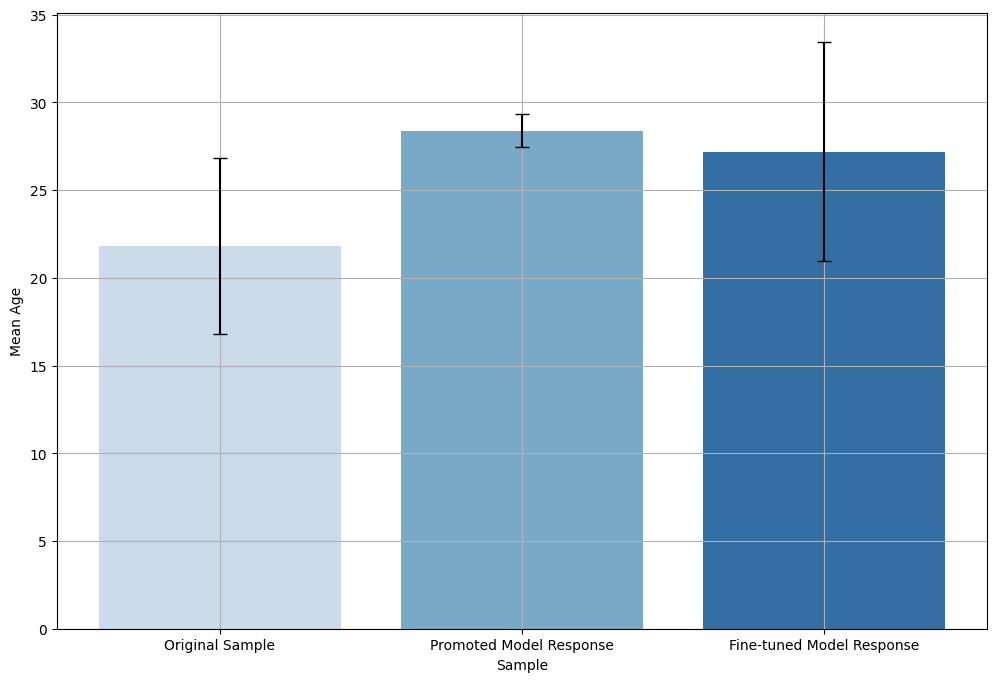

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrames are already loaded and each DataFrame has 'age' column

# Extract the age columns
ages_control = df_control_survey_91['age']
ages_agent = agentonly_df['age']
ages_prompted = agents91_demo_prompted['age']

# Calculate descriptive statistics
mean_control = np.mean(ages_control)
std_control = np.std(ages_control, ddof=1)
mean_agent = np.mean(ages_agent)
std_agent = np.std(ages_agent, ddof=1)
mean_prompted = np.mean(ages_prompted)
std_prompted = np.std(ages_prompted, ddof=1)

# Prepare data for plotting
data = {
    'Sample': ['Original Sample', 'Promoted Model Response', 'Fine-tuned Model Response'],
    'Mean': [mean_control, mean_prompted, mean_agent],
    'Std Dev': [std_control, std_prompted, std_agent]
}
df_stats = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Sample', y='Mean', data=df_stats, capsize=0.2, palette='Blues')

# Add error bars manually
plt.errorbar(x=df_stats['Sample'], y=df_stats['Mean'], yerr=df_stats['Std Dev'], fmt='none', c='black', capsize=5)

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Mean Age')
#plt.title('Comparison of Mean Age and Standard Deviation Between Samples')
plt.grid(True)
plt.savefig('/content/drive/My Drive/social preference/plots/age_CI.png')

# Show the plot
plt.show()


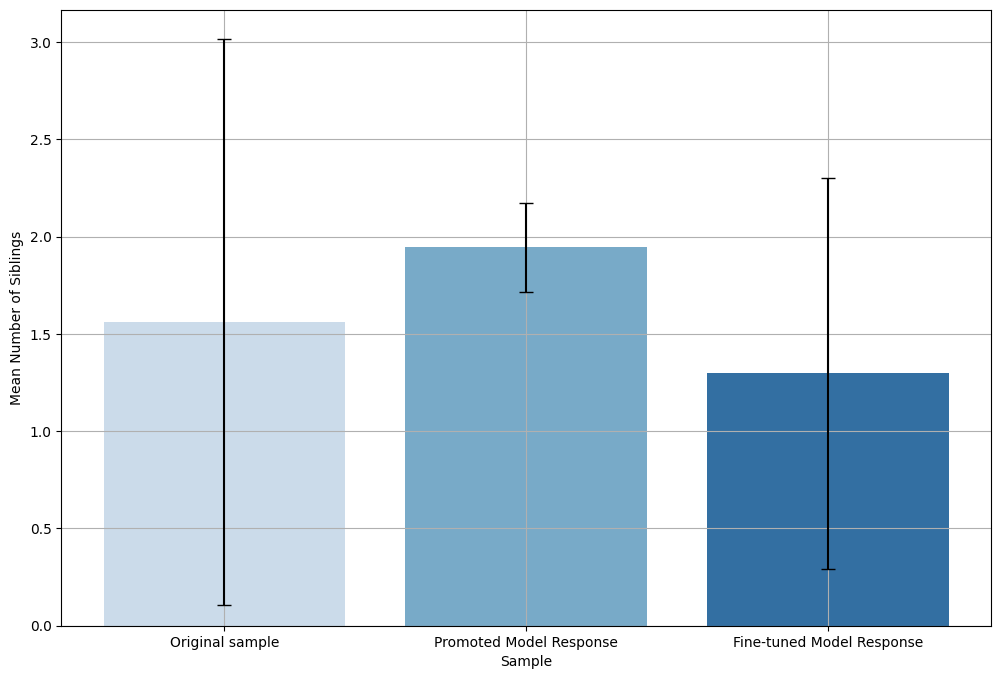

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrames are already loaded and each DataFrame has 'numsibling' column

# Extract the numsibling columns
siblings_control = df_control_survey_91['numsibling']
siblings_agent = agentonly_df['numsibling']
siblings_prompted = agents91_demo_prompted['numsibling']

# Calculate descriptive statistics
mean_siblings_control = np.mean(siblings_control)
std_siblings_control = np.std(siblings_control, ddof=1)
mean_siblings_agent = np.mean(siblings_agent)
std_siblings_agent = np.std(siblings_agent, ddof=1)
mean_prompted = np.mean(siblings_prompted)
std_prompted = np.std(siblings_prompted, ddof=1)

# Prepare data for plotting
data_siblings = {
    'Sample': ['Original sample', 'Promoted Model Response', 'Fine-tuned Model Response'],
    'Mean': [mean_siblings_control, mean_prompted, mean_siblings_agent],
    'Std Dev': [std_siblings_control, std_prompted, std_siblings_agent]
}
df_siblings_stats = pd.DataFrame(data_siblings)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Sample', y='Mean', data=df_siblings_stats, capsize=0.2, palette='Blues')

# Add error bars manually
plt.errorbar(x=df_siblings_stats['Sample'], y=df_siblings_stats['Mean'], yerr=df_siblings_stats['Std Dev'], fmt='none', c='black', capsize=5)

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Mean Number of Siblings')
#plt.title('Comparison of Mean Number of Siblings and Standard Deviation Between Samples')
plt.grid(True)
plt.savefig('/content/drive/My Drive/social preference/plots/siblings_CI.png')

# Show the plot
plt.show()


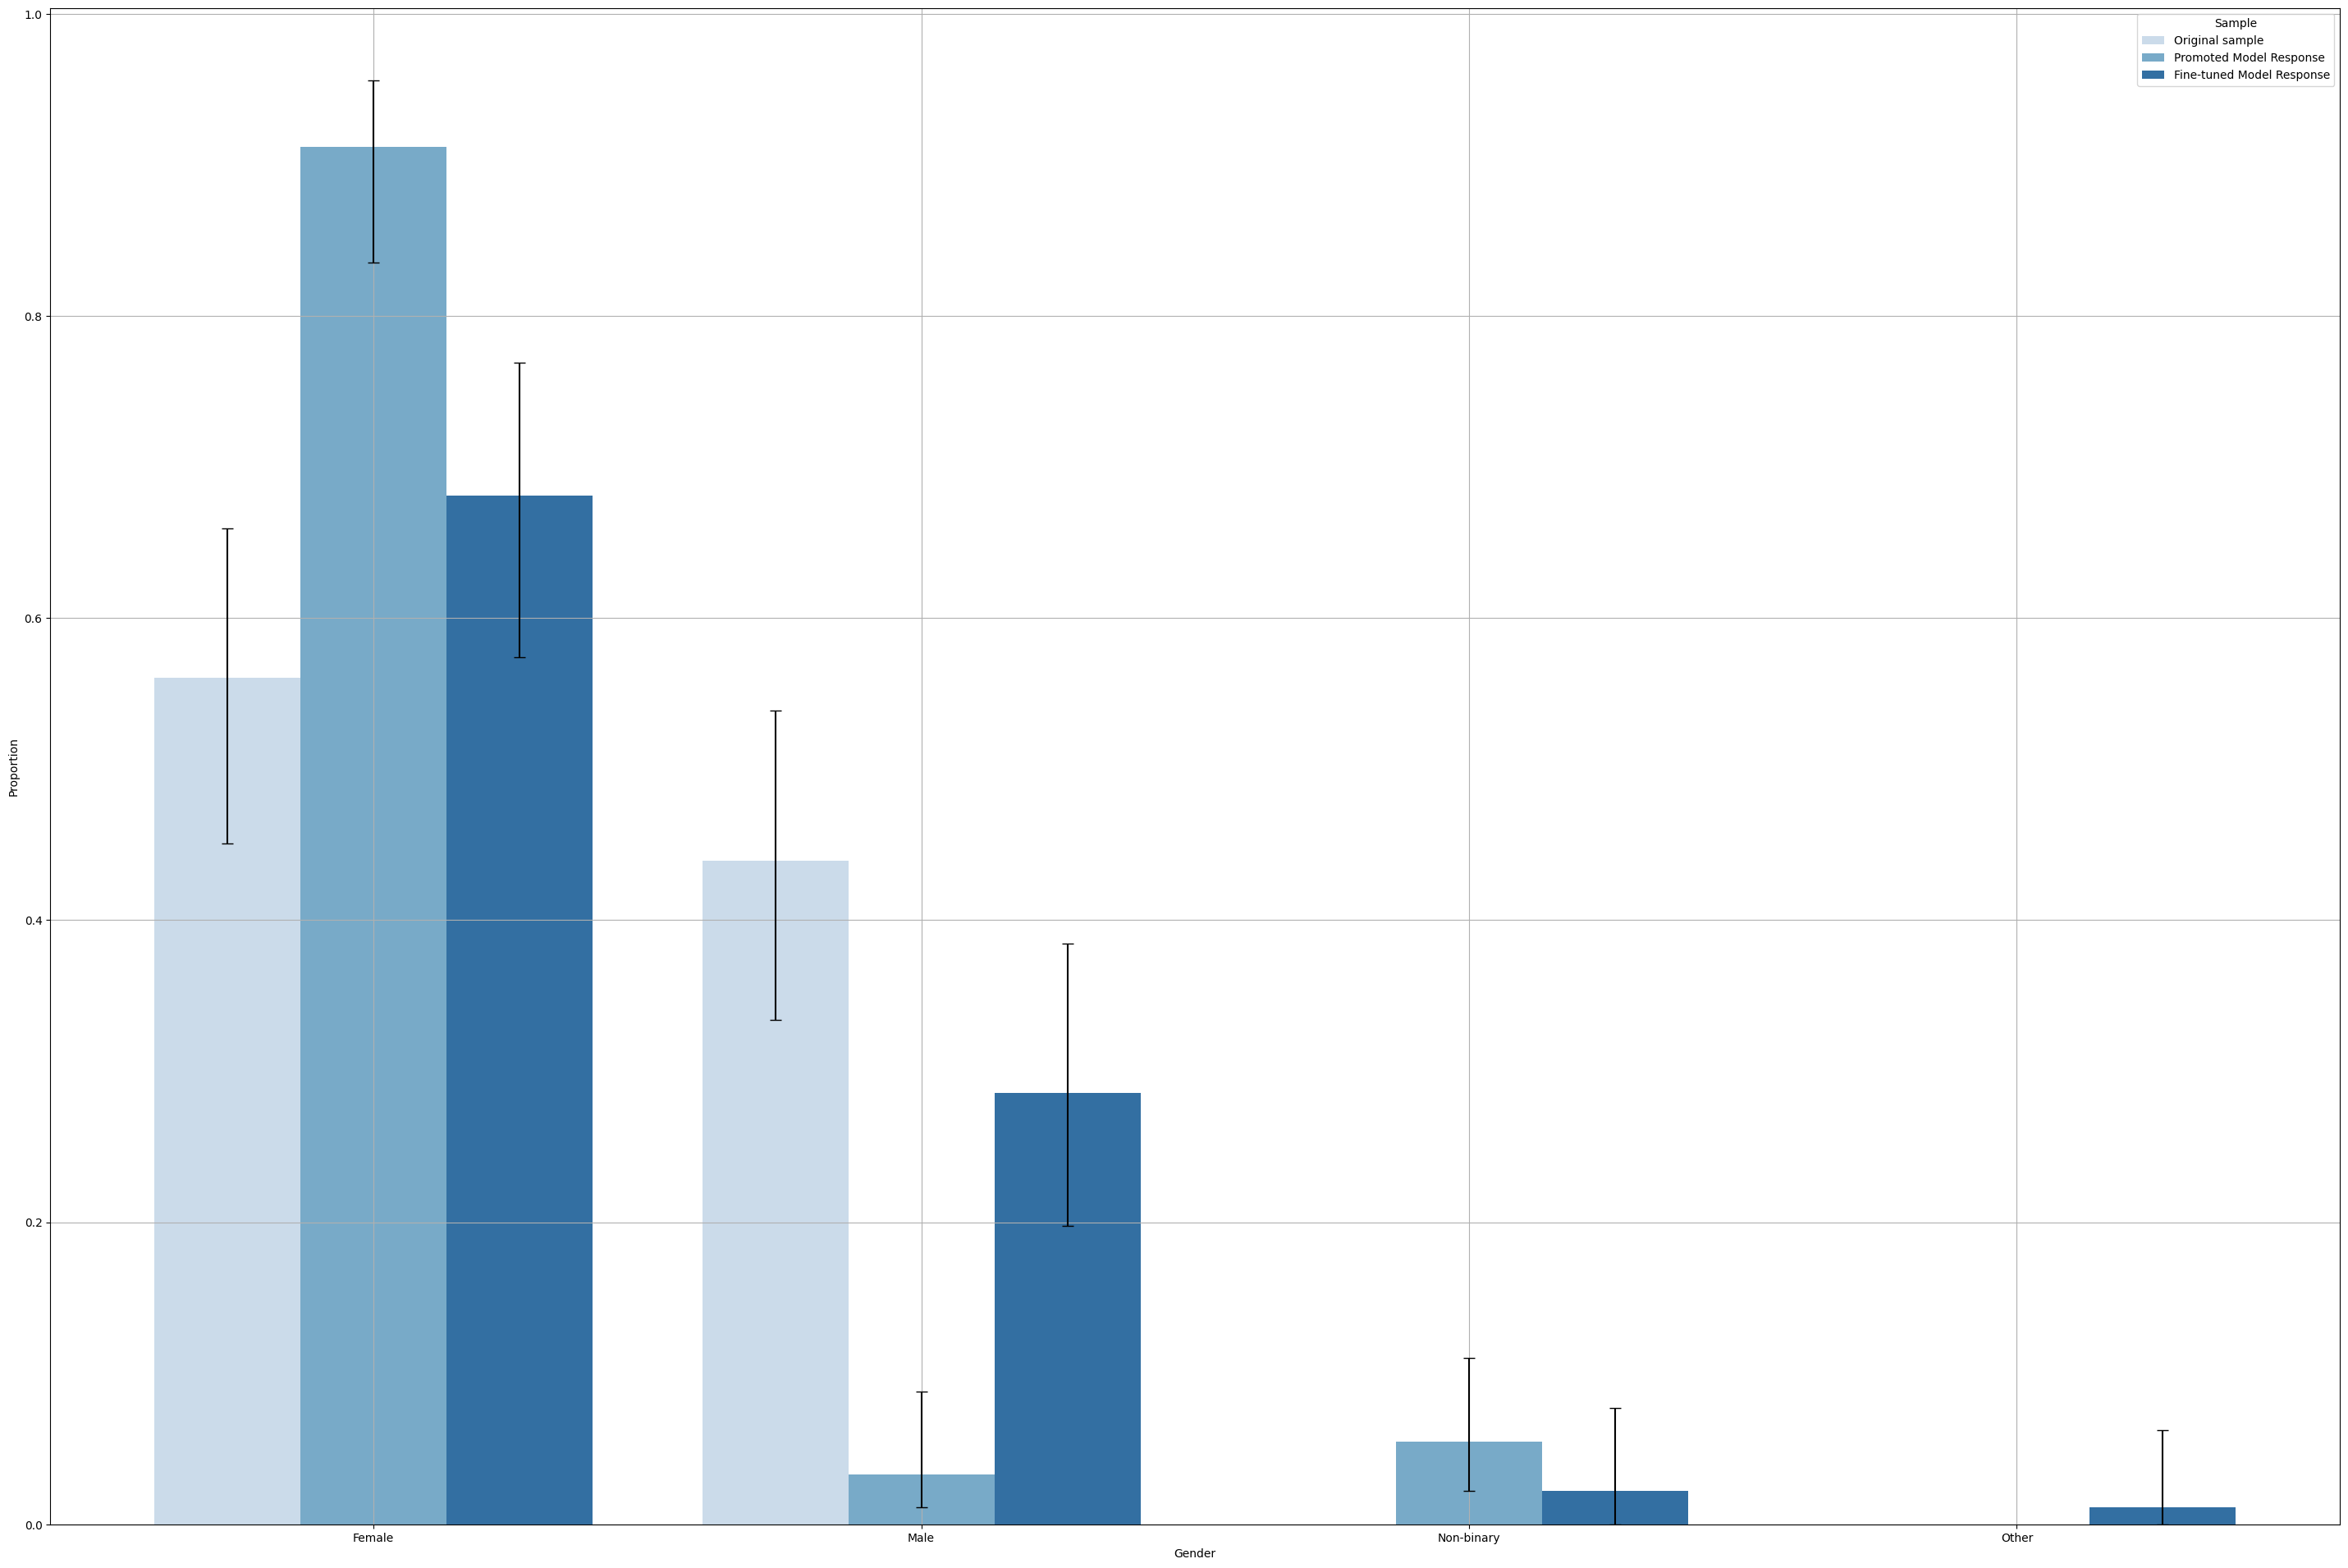

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import bootstrap

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to calculate the proportion of a specific gender
def proportion(data, gender):
    return np.mean(data == gender)

# Function to calculate bootstrap confidence intervals for proportions using scipy
def bootstrap_proportion_scipy(data, genders, n_bootstraps=1000, alpha=0.05):
    proportions = []
    for gender in genders:
        res = bootstrap((data,), lambda x: proportion(x, gender), n_resamples=n_bootstraps, confidence_level=1-alpha)
        mean = proportion(data, gender)
        ci_lower, ci_upper = res.confidence_interval
        proportions.append((gender, mean, ci_lower, ci_upper))
    return proportions

# Extract the gender columns
gender_control = df_control_survey_91['gender']
gender_agent = agentonly_df['gender']
gender_prompted = agents91_demo_prompted['gender']

# Get unique genders
unique_genders = np.unique(np.concatenate([gender_control, gender_agent, gender_prompted]))

# Calculate proportions and confidence intervals for each sample
control_proportions = bootstrap_proportion_scipy(gender_control, unique_genders)
agent_proportions = bootstrap_proportion_scipy(gender_agent, unique_genders)
prompted_proportions = bootstrap_proportion_scipy(gender_prompted, unique_genders)

# Prepare data for plotting
data = []
for value, mean, lower, upper in control_proportions:
    data.append(['Original sample', value, mean, lower, upper])
for value, mean, lower, upper in prompted_proportions:
    data.append(['Promoted Model Response', value, mean, lower, upper])
for value, mean, lower, upper in agent_proportions:
    data.append(['Fine-tuned Model Response', value, mean, lower, upper])

df_gender_stats = pd.DataFrame(data, columns=['Sample', 'Gender', 'Mean', 'CI Lower', 'CI Upper'])

# Plotting
plt.figure(figsize=(36, 24))
ax = sns.barplot(x='Gender', y='Mean', hue='Sample', data=df_gender_stats, palette='Blues')

# Add error bars for confidence intervals
for i, bar in enumerate(ax.patches):
    if i < len(df_gender_stats):
        height = bar.get_height()
        ci_lower = df_gender_stats.iloc[i]['CI Lower']
        ci_upper = df_gender_stats.iloc[i]['CI Upper']
        yerr_lower = height - ci_lower
        yerr_upper = ci_upper - height
        bar_x = bar.get_x() + bar.get_width() / 2
        ax.errorbar(bar_x, height, yerr=[[yerr_lower], [yerr_upper]], fmt='none', c='black', capsize=5)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Proportion')
#plt.title('Comparison of Gender Proportions Between Samples with Confidence Intervals')
plt.legend(title='Sample')
plt.grid(True)
plt.savefig('/content/drive/My Drive/social preference/plots/gender_CI.png')

# Show the plot
plt.show()


In [ ]:
from PIL import Image

# Load images
image1 = Image.open('/content/drive/My Drive/social preference/plots/age_CI.png')
image2 = Image.open('/content/drive/My Drive/social preference/plots/siblings_CI.png')
image3 = Image.open('/content/drive/My Drive/social preference/plots/gender_CI.png')

# Combine images horizontally
combined_width = image1.width + image2.width + image3.width
combined_height = max(image1.height, image2.height, image3.height)
combined_image = Image.new('RGB', (combined_width, combined_height))

# Paste images
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (image1.width, 0))
combined_image.paste(image3, (image1.width + image2.width, 0))

# Save the combined image
combined_image.save('/content/drive/My Drive/social preference/plots/combine.png')

# Show the combined image
combined_image.show()


# EM distance for Demo

In [ ]:


# Extract the age columns
ages_control = df_control_survey_91['age']
ages_agent = agentonly_df['age']

# Calculate the Earth Mover's Distance
emd = wasserstein_distance(ages_control, ages_agent)

# Output the result
print(f"Earth Mover's Distance: {emd}")


Earth Mover's Distance: 5.362637362637363


In [ ]:

# Extract the age columns
ages_control = df_control_survey_91['numsibling']
ages_agent = agentonly_df['numsibling']

# Calculate the Earth Mover's Distance
emd = wasserstein_distance(ages_control, ages_agent)

# Output the result
print(f"Earth Mover's Distance: {emd}")

Earth Mover's Distance: 0.26373626373626363


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance

# Assuming your DataFrames are already loaded and each DataFrame has 'age' column

# Extract the age columns
ages_control = df_control_survey_91['age']
ages_agent = agentonly_df['age']

# Calculate the observed Earth Mover's Distance
observed_emd = wasserstein_distance(ages_control, ages_agent)

# Combine the age data
combined_ages = np.concatenate([ages_control, ages_agent])

# Number of permutations
n_permutations = 1000

# Initialize an array to store permutation EMDs
perm_emd = np.zeros(n_permutations)

# Perform permutations
for i in range(n_permutations):
    np.random.shuffle(combined_ages)
    perm_emd[i] = wasserstein_distance(combined_ages[:len(ages_control)], combined_ages[len(ages_control):])

# Calculate the p-value
p_value = np.sum(perm_emd >= observed_emd) / n_permutations

# Output the results
print(f"Observed Earth Mover's Distance: {observed_emd}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The distributions of the two samples are significantly different.")
else:
    print("The distributions of the two samples are not significantly different.")


Observed Earth Mover's Distance: 5.362637362637363
P-value: 0.0
The distributions of the two samples are significantly different.


# Visual choice

In [ ]:
final_df_ft50 = pd.read_csv('/content/drive/My Drive/social preference/final_df_4oft50.csv')
final_df_baseline50 = pd.read_csv('/content/drive/My Drive/social preference/final_df_4obaseline50.csv')
final_df_prompted50 = pd.read_csv('/content/drive/My Drive/social preference/final_df_4oprompted50.csv')
origdata_df = pd.read_csv('/content/drive/My Drive/social preference/origdata_df.csv')


In [ ]:
final_df_baseline50

Unnamed: 0 game_type  agent  number_of_new_participants  B1_percent  \
0            0    Dict 1      2                          50        0.00   
1            1    Dict 2      2                          50        0.54   
2            2    Dict 3      2                          50        0.42   
3            3    Dict 4      2                          50        0.02   
4            4    Dict 5      2                          50        0.04   
5            5   Resp 10      1                          50        0.00   
6            6   Resp 10      2                          50        1.00   
7            7   Resp 11      1                          50        0.00   
8            8   Resp 11      2                          50        1.00   
9            9   Resp 12      1                          50        0.00   
10          10   Resp 12      2                          50        0.98   
11          11  Resp 13a      1                          50        0.00   
12          12  Resp 13a      2                          50        0.98   
13          13  Resp 13b      1                          50        0.00   
14          14  Resp 13b      2                          50        1.00   
15          15  Resp 13c      1                          50        0.00   
16          16  Resp 13c      2                          50        0.98   
17          17  Resp 13d      1                          50        0.00   
18          18  Resp 13d      2                          50        0.98   
19          19   Resp 1a      1                          50        0.00   
20          20   Resp 1a      2                          50        0.16   
21          21   Resp 1b      1                          50        0.00   
22          22   Resp 1b      2                          50        0.20   
23          23   Resp 2a      1                          50        0.00   
24          24   Resp 2a      2                          50        1.00   
25          25   Resp 2b      1                          50        0.00   
26          26   Resp 2b      2                          50        1.00   
27          27    Resp 3      1                          50        0.00   
28          28    Resp 3      2                          50        1.00   
29          29    Resp 4      1                          50        0.00   
30          30    Resp 4      2                          50        0.94   
31          31   Resp 5a      1                          50        0.00   
32          32   Resp 5a      2                          50        0.64   
33          33   Resp 5b      1                          50        0.00   
34          34   Resp 5b      2                          50        0.36   
35          35    Resp 6      1                          50        0.00   
36          36    Resp 6      2                          50        0.02   
37          37    Resp 7      1                          50        0.00   
38          38    Resp 7      2                          50        0.00   
39          39    Resp 8      1                          50        0.00   
40          40    Resp 8      2                          50        1.00   
41          41    Resp 9      1                          50        0.00   
42          42    Resp 9      2                          50        1.00   

    B2_percent  A1_percent  A2_percent  
0         1.00        0.00        0.00  
1         0.46        0.00        0.00  
2         0.58        0.00        0.00  
3         0.98        0.00        0.00  
4         0.96        0.00        0.00  
5         0.00        0.58        0.42  
6         0.00        0.00        0.00  
7         0.00        1.00        0.00  
8         0.00        0.00        0.00  
9         0.00        0.70        0.30  
10        0.02        0.00        0.00  
11        0.00        1.00        0.00  
12        0.02        0.00        0.00  
13        0.00        1.00        0.00  
14        0.00        0.00        0.00  
15        0.00        0.96        0.04  
16    

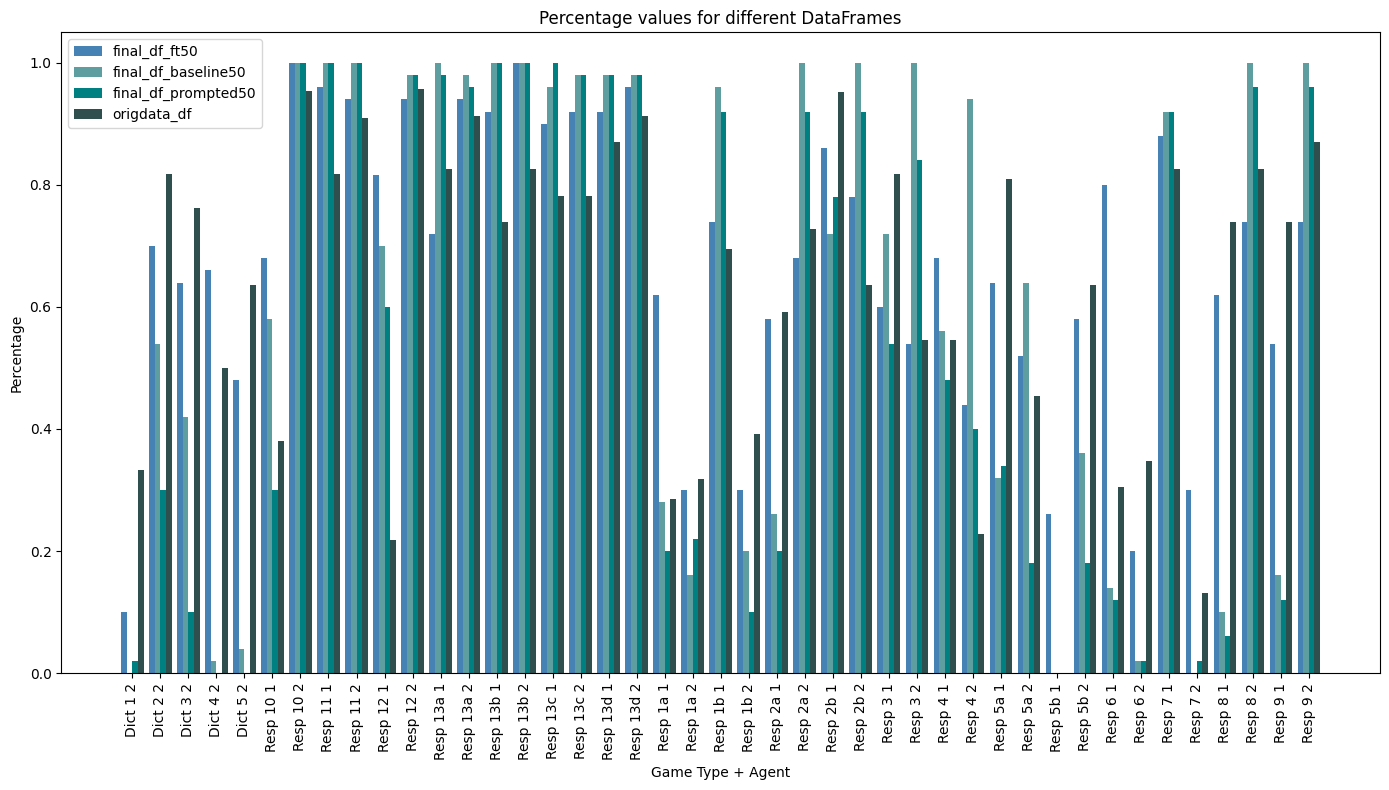

In [ ]:
# Function to process each dataframe
def process_dataframe(df, label):
    df['combined_percentage'] = df.apply(lambda x: x['B1_percent'] if x['agent'] == 2 else x['A1_percent'], axis=1)
    df['game_agent'] = df['game_type'] + ' ' + df['agent'].astype(str)
    return df[['game_agent', 'combined_percentage']].rename(columns={'combined_percentage': label})

# Process the dataframes
df_ft50 = process_dataframe(final_df_ft50, 'final_df_ft50')
df_baseline50 = process_dataframe(final_df_baseline50, 'final_df_baseline50')
df_prompted50 = process_dataframe(final_df_prompted50, 'final_df_prompted50')
df_origdata = process_dataframe(origdata_df, 'origdata_df')

# Merge all dataframes into a single dataframe for plotting
merged_df = df_ft50.merge(df_baseline50, on='game_agent', how='outer')
merged_df = merged_df.merge(df_prompted50, on='game_agent', how='outer')
merged_df = merged_df.merge(df_origdata, on='game_agent', how='outer')

# Plotting the bar chart
plt.figure(figsize=(14, 8))

bar_width = 0.2
indices = np.arange(len(merged_df['game_agent']))

# Create bars for each dataframe
plt.bar(indices, merged_df['final_df_ft50'], bar_width, label='final_df_ft50', color='steelblue')
plt.bar(indices + bar_width, merged_df['final_df_baseline50'], bar_width, label='final_df_baseline50', color='cadetblue')
plt.bar(indices + 2 * bar_width, merged_df['final_df_prompted50'], bar_width, label='final_df_prompted50', color='teal')
plt.bar(indices + 3 * bar_width, merged_df['origdata_df'], bar_width, label='origdata_df', color='darkslategrey')

plt.xlabel('Game Type + Agent')
plt.ylabel('Percentage')
plt.title('Percentage values for different DataFrames')
plt.xticks(indices + 1.5 * bar_width, merged_df['game_agent'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

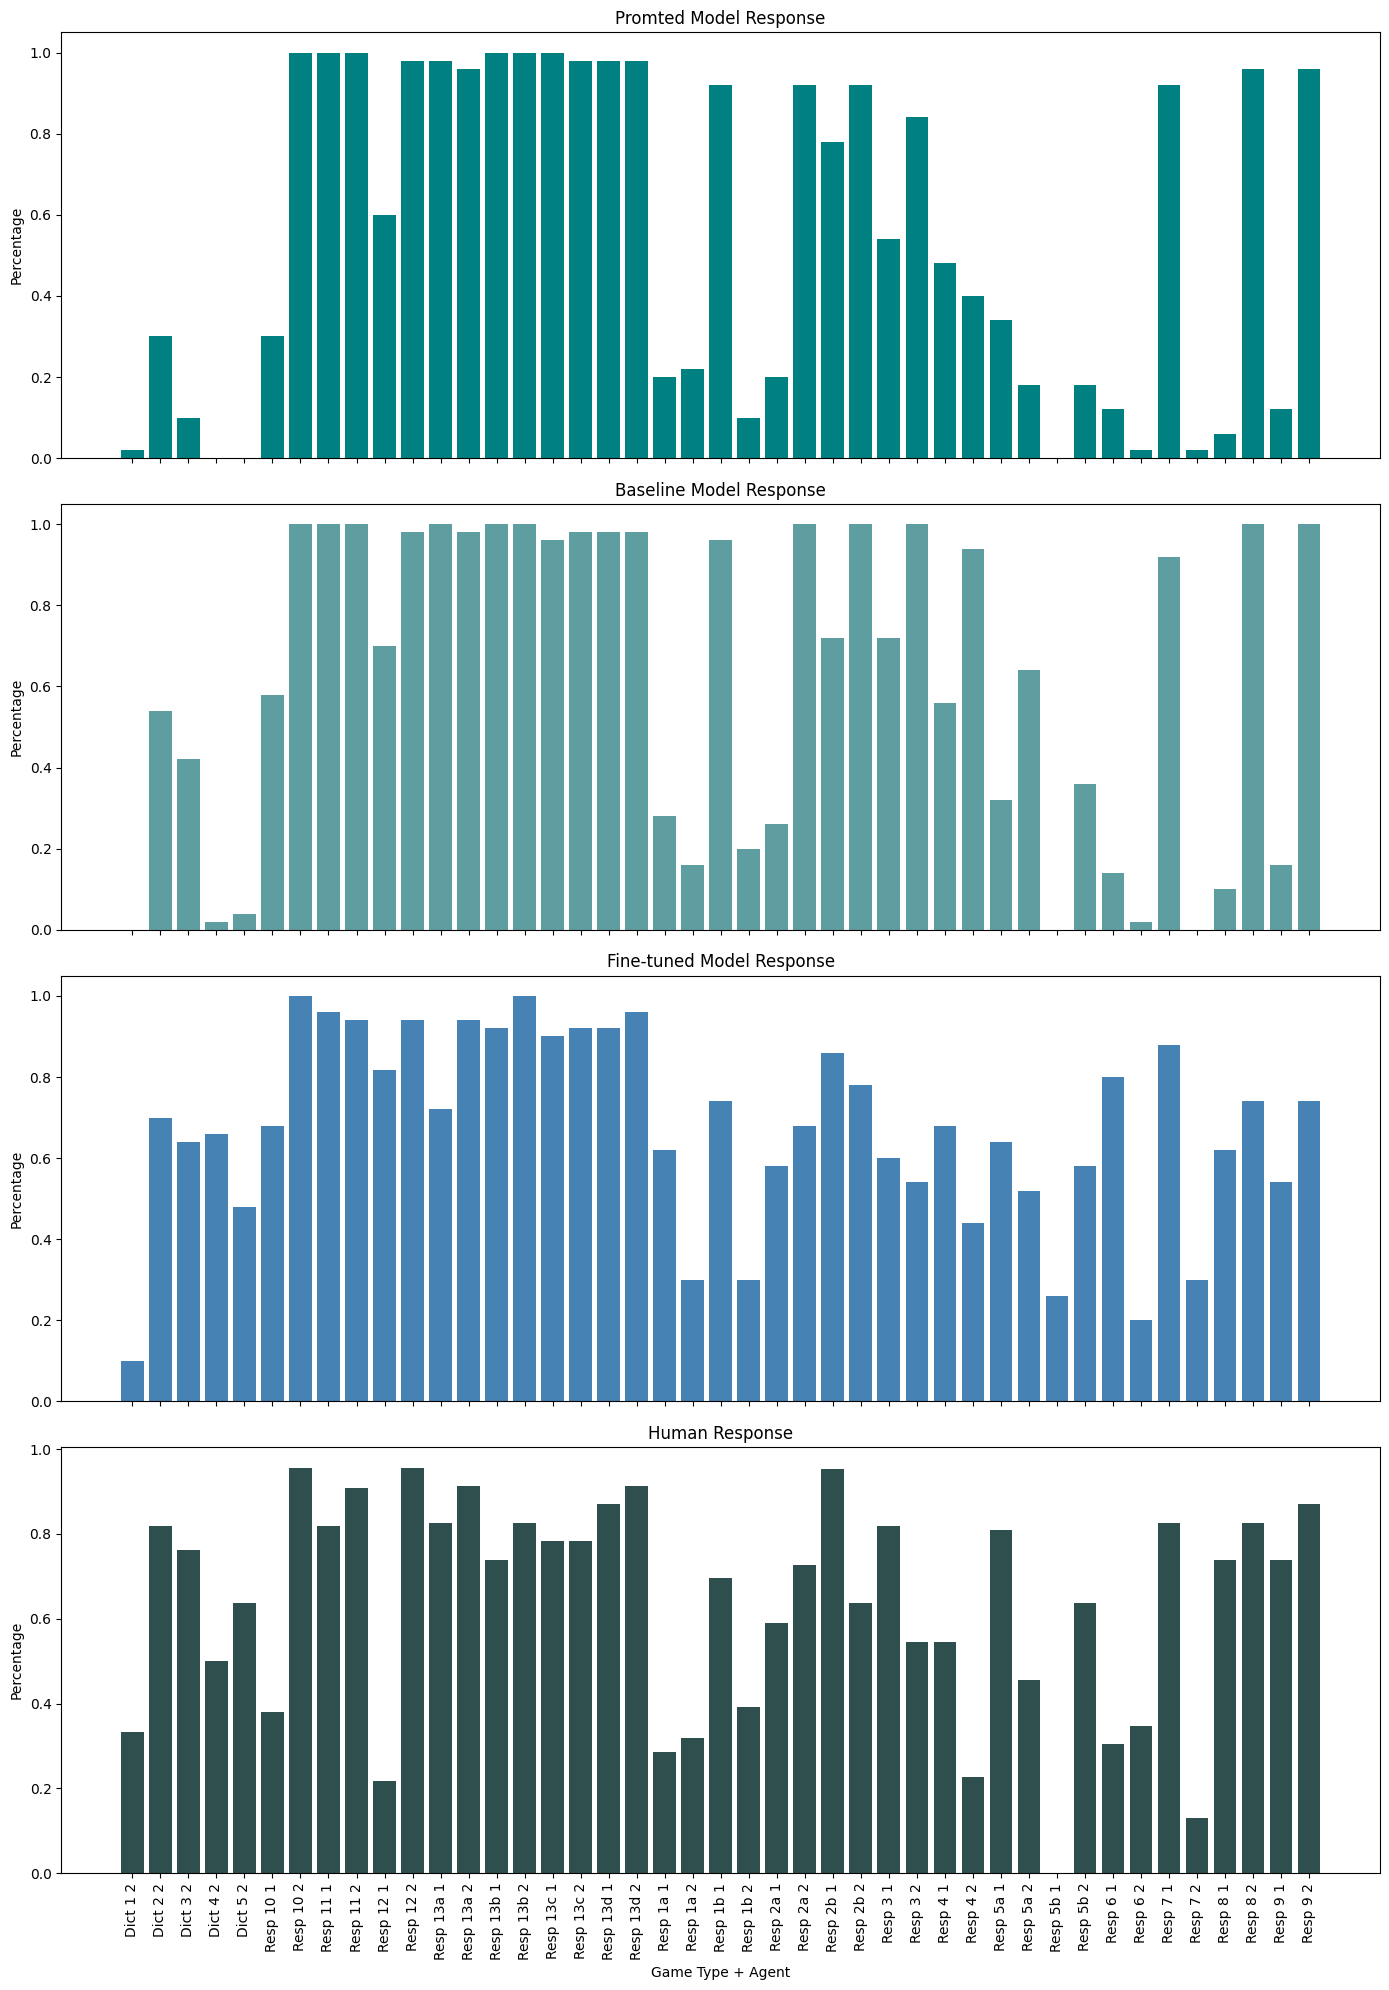

In [ ]:
# Plotting the bar charts in subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Plot for final_df_ft50
axs[2].bar(df_ft50['game_agent'], df_ft50['final_df_ft50'], color='steelblue')
axs[2].set_title('Fine-tuned Model Response')
axs[2].set_ylabel('Percentage')

# Plot for final_df_baseline50
axs[1].bar(df_baseline50['game_agent'], df_baseline50['final_df_baseline50'], color='cadetblue')
axs[1].set_title('Baseline Model Response')
axs[1].set_ylabel('Percentage')

# Plot for final_df_baseline50_2
axs[0].bar(df_prompted50['game_agent'], df_prompted50['final_df_prompted50'], color='teal')
axs[0].set_title('Promted Model Response')
axs[0].set_ylabel('Percentage')

# Plot for origdata_df
axs[3].bar(df_origdata['game_agent'], df_origdata['origdata_df'], color='darkslategrey')
axs[3].set_title('Human Response')
axs[3].set_ylabel('Percentage')
axs[3].set_xlabel('Game Type + Agent')

# Rotate x-axis labels for all subplots
for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

plt.tight_layout()
plt.show()

In [ ]:
orig_count_df = origdata_df

In [ ]:
orig_count_df_A = orig_count_df[orig_count_df['agent'] == 1][['A1_percent', 'A2_percent']]
orig_count_df_A

A1_percent  A2_percent
5     0.380952    0.619048
7     0.818182    0.181818
9     0.217391    0.782609
11    0.826087    0.173913
13    0.739130    0.260870
15    0.782609    0.217391
17    0.869565    0.130435
19    0.285714    0.714286
21    0.695652    0.304348
23    0.590909    0.409091
25    0.952381    0.047619
27    0.818182    0.181818
29    0.545455    0.454545
31    0.809524    0.190476
33    0.000000    1.000000
35    0.304348    0.695652
37    0.826087    0.173913
39    0.739130    0.260870
41    0.739130    0.260870

In [ ]:
orig_count_df_B = orig_count_df[orig_count_df['agent'] == 2][['B1_percent', 'B2_percent']]
orig_count_df_B

B1_percent  B2_percent
0     0.333333    0.666667
1     0.818182    0.181818
2     0.761905    0.238095
3     0.500000    0.500000
4     0.636364    0.363636
6     0.954545    0.045455
8     0.909091    0.090909
10    0.956522    0.043478
12    0.913043    0.086957
14    0.826087    0.173913
16    0.782609    0.217391
18    0.913043    0.086957
20    0.318182    0.681818
22    0.391304    0.608696
24    0.727273    0.272727
26    0.636364    0.363636
28    0.545455    0.454545
30    0.227273    0.772727
32    0.454545    0.545455
34    0.636364    0.363636
36    0.347826    0.652174
38    0.130435    0.869565
40    0.826087    0.173913
42    0.869565    0.130435

In [ ]:
orig_count_df_A1 = orig_count_df[orig_count_df['agent'] == 1][['A1_percent']]
orig_count_df_B1 = orig_count_df[orig_count_df['agent'] == 2][['B1_percent']]

In [ ]:
combined_orig_df = pd.concat([orig_count_df_A1.rename(columns={'A1_percent': 'percentage'}), orig_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_orig_df

percentage
0     0.333333
1     0.818182
2     0.761905
3     0.500000
4     0.636364
5     0.380952
6     0.954545
7     0.818182
8     0.909091
9     0.217391
10    0.956522
11    0.826087
12    0.913043
13    0.739130
14    0.826087
15    0.782609
16    0.782609
17    0.869565
18    0.913043
19    0.285714
20    0.318182
21    0.695652
22    0.391304
23    0.590909
24    0.727273
25    0.952381
26    0.636364
27    0.818182
28    0.545455
29    0.545455
30    0.227273
31    0.809524
32    0.454545
33    0.000000
34    0.636364
35    0.304348
36    0.347826
37    0.826087
38    0.130435
39    0.739130
40    0.826087
41    0.739130
42    0.869565

In [ ]:
final_df_ft50 = pd.read_csv('/content/drive/My Drive/social preference/final_df_4oft50.csv')
final_df_baseline50 = pd.read_csv('/content/drive/My Drive/social preference/final_df_4obaseline50.csv')
final_df_prompted50 = pd.read_csv('/content/drive/My Drive/social preference/final_df_4oprompted50.csv')
origdata_df = pd.read_csv('/content/drive/My Drive/social preference/origdata_df.csv')


In [ ]:
ft50_count_df = final_df_ft50

In [ ]:
ft50_count_df_A = ft50_count_df[ft50_count_df['agent'] == 1][['A1_percent', 'A2_percent']]
ft50_count_df_B = ft50_count_df[ft50_count_df['agent'] == 2][['B1_percent', 'B2_percent']]

In [ ]:
ft50_count_df_A1 = ft50_count_df[ft50_count_df['agent'] == 1][['A1_percent']]
ft50_count_df_B1 = ft50_count_df[ft50_count_df['agent'] == 2][['B1_percent']]

In [ ]:
combined_ft50_df = pd.concat([ft50_count_df_A1.rename(columns={'A1_percent': 'percentage'}), ft50_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_ft50_df

percentage
0     0.100000
1     0.700000
2     0.640000
3     0.660000
4     0.480000
5     0.680000
6     1.000000
7     0.960000
8     0.940000
9     0.816327
10    0.940000
11    0.720000
12    0.940000
13    0.920000
14    1.000000
15    0.900000
16    0.920000
17    0.920000
18    0.960000
19    0.620000
20    0.300000
21    0.740000
22    0.300000
23    0.580000
24    0.680000
25    0.860000
26    0.780000
27    0.600000
28    0.540000
29    0.680000
30    0.440000
31    0.640000
32    0.520000
33    0.260000
34    0.580000
35    0.800000
36    0.200000
37    0.880000
38    0.300000
39    0.620000
40    0.740000
41    0.540000
42    0.740000

In [ ]:
final_df_prompted50

Unnamed: 0 game_type  agent  number_of_new_participants  B1_percent  \
0            0    Dict 1      2                          50        0.02   
1            1    Dict 2      2                          50        0.30   
2            2    Dict 3      2                          50        0.10   
3            3    Dict 4      2                          50        0.00   
4            4    Dict 5      2                          50        0.00   
5            5   Resp 10      1                          50        0.00   
6            6   Resp 10      2                          50        1.00   
7            7   Resp 11      1                          50        0.00   
8            8   Resp 11      2                          50        1.00   
9            9   Resp 12      1                          50        0.00   
10          10   Resp 12      2                          50        0.98   
11          11  Resp 13a      1                          50        0.00   
12          12  Resp 13a      2                          50        0.96   
13          13  Resp 13b      1                          50        0.00   
14          14  Resp 13b      2                          50        1.00   
15          15  Resp 13c      1                          50        0.00   
16          16  Resp 13c      2                          50        0.98   
17          17  Resp 13d      1                          50        0.00   
18          18  Resp 13d      2                          50        0.98   
19          19   Resp 1a      1                          50        0.00   
20          20   Resp 1a      2                          50        0.22   
21          21   Resp 1b      1                          50        0.00   
22          22   Resp 1b      2                          50        0.10   
23          23   Resp 2a      1                          50        0.00   
24          24   Resp 2a      2                          50        0.92   
25          25   Resp 2b      1                          50        0.00   
26          26   Resp 2b      2                          50        0.92   
27          27    Resp 3      1                          50        0.00   
28          28    Resp 3      2                          50        0.84   
29          29    Resp 4      1                          50        0.00   
30          30    Resp 4      2                          50        0.40   
31          31   Resp 5a      1                          50        0.00   
32          32   Resp 5a      2                          50        0.18   
33          33   Resp 5b      1                          50        0.00   
34          34   Resp 5b      2                          50        0.18   
35          35    Resp 6      1                          50        0.00   
36          36    Resp 6      2                          50        0.02   
37          37    Resp 7      1                          50        0.00   
38          38    Resp 7      2                          50        0.02   
39          39    Resp 8      1                          50        0.00   
40          40    Resp 8      2                          50        0.96   
41          41    Resp 9      1                          50        0.00   
42          42    Resp 9      2                          50        0.96   

    B2_percent  A1_percent  A2_percent  
0         0.98        0.00        0.00  
1         0.70        0.00        0.00  
2         0.90        0.00        0.00  
3         1.00        0.00        0.00  
4         1.00        0.00        0.00  
5         0.00        0.30        0.70  
6         0.00        0.00        0.00  
7         0.00        1.00        0.00  
8         0.00        0.00        0.00  
9         0.00        0.60        0.40  
10        0.02        0.00        0.00  
11        0.00        0.98        0.02  
12        0.04        0.00        0.00  
13        0.00        1.00        0.00  
14        0.00        0.00        0.00  
15        0.00        1.00        0.00  
16    

In [ ]:
promoted_count_df_A1 = final_df_prompted50[final_df_prompted50['agent'] == 1][['A1_percent']]
promoted_count_df_B1 = final_df_prompted50[final_df_prompted50['agent'] == 2][['B1_percent']]

In [ ]:
combined_promoted_df = pd.concat([promoted_count_df_A1.rename(columns={'A1_percent': 'percentage'}), promoted_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_promoted_df

percentage
0         0.02
1         0.30
2         0.10
3         0.00
4         0.00
5         0.30
6         1.00
7         1.00
8         1.00
9         0.60
10        0.98
11        0.98
12        0.96
13        1.00
14        1.00
15        1.00
16        0.98
17        0.98
18        0.98
19        0.20
20        0.22
21        0.92
22        0.10
23        0.20
24        0.92
25        0.78
26        0.92
27        0.54
28        0.84
29        0.48
30        0.40
31        0.34
32        0.18
33        0.00
34        0.18
35        0.12
36        0.02
37        0.92
38        0.02
39        0.06
40        0.96
41        0.12
42        0.96

In [ ]:
final_df_baseline50

Unnamed: 0 game_type  agent  number_of_new_participants  B1_percent  \
0            0    Dict 1      2                          50        0.00   
1            1    Dict 2      2                          50        0.54   
2            2    Dict 3      2                          50        0.42   
3            3    Dict 4      2                          50        0.02   
4            4    Dict 5      2                          50        0.04   
5            5   Resp 10      1                          50        0.00   
6            6   Resp 10      2                          50        1.00   
7            7   Resp 11      1                          50        0.00   
8            8   Resp 11      2                          50        1.00   
9            9   Resp 12      1                          50        0.00   
10          10   Resp 12      2                          50        0.98   
11          11  Resp 13a      1                          50        0.00   
12          12  Resp 13a      2                          50        0.98   
13          13  Resp 13b      1                          50        0.00   
14          14  Resp 13b      2                          50        1.00   
15          15  Resp 13c      1                          50        0.00   
16          16  Resp 13c      2                          50        0.98   
17          17  Resp 13d      1                          50        0.00   
18          18  Resp 13d      2                          50        0.98   
19          19   Resp 1a      1                          50        0.00   
20          20   Resp 1a      2                          50        0.16   
21          21   Resp 1b      1                          50        0.00   
22          22   Resp 1b      2                          50        0.20   
23          23   Resp 2a      1                          50        0.00   
24          24   Resp 2a      2                          50        1.00   
25          25   Resp 2b      1                          50        0.00   
26          26   Resp 2b      2                          50        1.00   
27          27    Resp 3      1                          50        0.00   
28          28    Resp 3      2                          50        1.00   
29          29    Resp 4      1                          50        0.00   
30          30    Resp 4      2                          50        0.94   
31          31   Resp 5a      1                          50        0.00   
32          32   Resp 5a      2                          50        0.64   
33          33   Resp 5b      1                          50        0.00   
34          34   Resp 5b      2                          50        0.36   
35          35    Resp 6      1                          50        0.00   
36          36    Resp 6      2                          50        0.02   
37          37    Resp 7      1                          50        0.00   
38          38    Resp 7      2                          50        0.00   
39          39    Resp 8      1                          50        0.00   
40          40    Resp 8      2                          50        1.00   
41          41    Resp 9      1                          50        0.00   
42          42    Resp 9      2                          50        1.00   

    B2_percent  A1_percent  A2_percent  
0         1.00        0.00        0.00  
1         0.46        0.00        0.00  
2         0.58        0.00        0.00  
3         0.98        0.00        0.00  
4         0.96        0.00        0.00  
5         0.00        0.58        0.42  
6         0.00        0.00        0.00  
7         0.00        1.00        0.00  
8         0.00        0.00        0.00  
9         0.00        0.70        0.30  
10        0.02        0.00        0.00  
11        0.00        1.00        0.00  
12        0.02        0.00        0.00  
13        0.00        1.00        0.00  
14        0.00        0.00        0.00  
15        0.00        0.96        0.04  
16    

In [ ]:
baseline_count_df_A1 = final_df_baseline50[final_df_baseline50['agent'] == 1][['A1_percent']]
baseline_count_df_B1 = final_df_baseline50[final_df_baseline50['agent'] == 2][['B1_percent']]

In [ ]:
baseline_count_df_A1

A1_percent
5         0.58
7         1.00
9         0.70
11        1.00
13        1.00
15        0.96
17        0.98
19        0.28
21        0.96
23        0.26
25        0.72
27        0.72
29        0.56
31        0.32
33        0.00
35        0.14
37        0.92
39        0.10
41        0.16

In [ ]:
combined_baseline_df = pd.concat([baseline_count_df_A1.rename(columns={'A1_percent': 'percentage'}), baseline_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_baseline_df

percentage
0         0.00
1         0.54
2         0.42
3         0.02
4         0.04
5         0.58
6         1.00
7         1.00
8         1.00
9         0.70
10        0.98
11        1.00
12        0.98
13        1.00
14        1.00
15        0.96
16        0.98
17        0.98
18        0.98
19        0.28
20        0.16
21        0.96
22        0.20
23        0.26
24        1.00
25        0.72
26        1.00
27        0.72
28        1.00
29        0.56
30        0.94
31        0.32
32        0.64
33        0.00
34        0.36
35        0.14
36        0.02
37        0.92
38        0.00
39        0.10
40        1.00
41        0.16
42        1.00

In [ ]:
combined_orig_df, combined_ft50_df, combined_promoted_df, combined_baseline_df

(    percentage
 0     0.333333
 1     0.818182
 2     0.761905
 3     0.500000
 4     0.636364
 5     0.380952
 6     0.954545
 7     0.818182
 8     0.909091
 9     0.217391
 10    0.956522
 11    0.826087
 12    0.913043
 13    0.739130
 14    0.826087
 15    0.782609
 16    0.782609
 17    0.869565
 18    0.913043
 19    0.285714
 20    0.318182
 21    0.695652
 22    0.391304
 23    0.590909
 24    0.727273
 25    0.952381
 26    0.636364
 27    0.818182
 28    0.545455
 29    0.545455
 30    0.227273
 31    0.809524
 32    0.454545
 33    0.000000
 34    0.636364
 35    0.304348
 36    0.347826
 37    0.826087
 38    0.130435
 39    0.739130
 40    0.826087
 41    0.739130
 42    0.869565,
     percentage
 0     0.100000
 1     0.700000
 2     0.640000
 3     0.660000
 4     0.480000
 5     0.680000
 6     1.000000
 7     0.960000
 8     0.940000
 9     0.816327
 10    0.940000
 11    0.720000
 12    0.940000
 13    0.920000
 14    1.000000
 15    0.900000
 16    0.920000
 17    

In [ ]:
combined_orig_df

percentage
0     0.333333
1     0.818182
2     0.761905
3     0.500000
4     0.636364
5     0.380952
6     0.954545
7     0.818182
8     0.909091
9     0.217391
10    0.956522
11    0.826087
12    0.913043
13    0.739130
14    0.826087
15    0.782609
16    0.782609
17    0.869565
18    0.913043
19    0.285714
20    0.318182
21    0.695652
22    0.391304
23    0.590909
24    0.727273
25    0.952381
26    0.636364
27    0.818182
28    0.545455
29    0.545455
30    0.227273
31    0.809524
32    0.454545
33    0.000000
34    0.636364
35    0.304348
36    0.347826
37    0.826087
38    0.130435
39    0.739130
40    0.826087
41    0.739130
42    0.869565

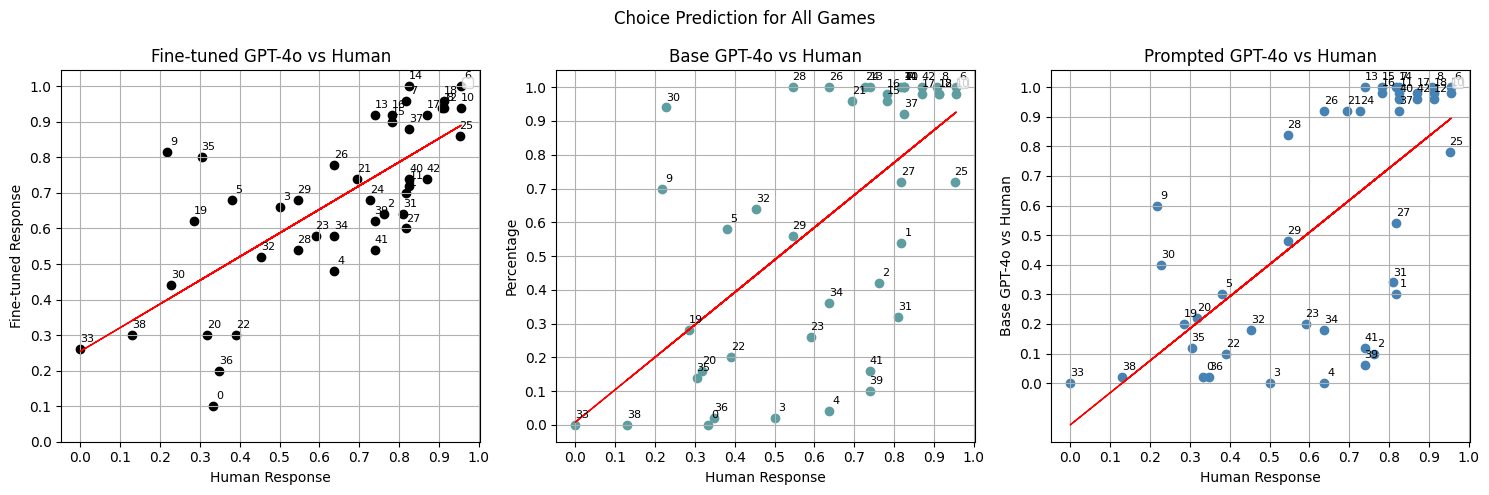

In [ ]:
# Assuming combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined

# Original data
x = combined_orig_df['percentage'].values

# Define a function to calculate R² and return slope and intercept
def calculate_regression_line(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value**2

# Calculate regression line and R² for each pair of regression
slope_ft50, intercept_ft50, r2_ft50 = calculate_regression_line(x, combined_ft50_df['percentage'].values)
slope_baseline, intercept_baseline, r2_baseline = calculate_regression_line(x, combined_baseline_df['percentage'].values)
slope_promoted, intercept_promoted, r2_promoted = calculate_regression_line(x, combined_promoted_df['percentage'].values)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for ft50 vs orig
y_ft50 = slope_ft50 * x + intercept_ft50
axs[0].scatter(x, combined_ft50_df['percentage'].values, color= 'black' )
axs[0].plot(x, y_ft50, color='red', linewidth=1)
for i in range(len(x)):
    axs[0].annotate(i, (x[i], combined_ft50_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[0].set_xlabel('Human Response')
axs[0].set_ylabel('Fine-tuned Response')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[0].set_title('Fine-tuned GPT-4o vs Human')

# Scatter plot for baseline vs orig
y_baseline = slope_baseline * x + intercept_baseline
axs[1].scatter(x, combined_baseline_df['percentage'].values, color='cadetblue' )
axs[1].plot(x, y_baseline, color='red', linewidth=1)
for i in range(len(x)):
    axs[1].annotate(i, (x[i], combined_baseline_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1].set_xlabel('Human Response')
axs[1].set_ylabel('Percentage')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_title('Base GPT-4o vs Human')

# Scatter plot for promoted vs orig
y_promoted = slope_promoted * x + intercept_promoted
axs[2].scatter(x, combined_promoted_df['percentage'].values, color='steelblue')
axs[2].plot(x, y_promoted, color='red', linewidth=1)
for i in range(len(x)):
    axs[2].annotate(i, (x[i], combined_promoted_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[2].set_xlabel('Human Response')
axs[2].set_ylabel('Base GPT-4o vs Human')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(0, 1.1, 0.1))
axs[2].set_title('Prompted GPT-4o vs Human')

plt.suptitle('Choice Prediction for All Games')
plt.tight_layout()
plt.show()


In [ ]:
slope_ft50, intercept_ft50, r2_ft50

(0.6652287941401943, 0.25438241467228606, 0.5264763215177788)

In [ ]:
slope_baseline, intercept_baseline, r2_baseline

(0.9603324740241164, 0.008123548324311614, 0.38939401674783125)

In [ ]:
slope_promoted, intercept_promoted, r2_promoted

(1.0837725893530485, -0.14110450363284477, 0.462319913546568)

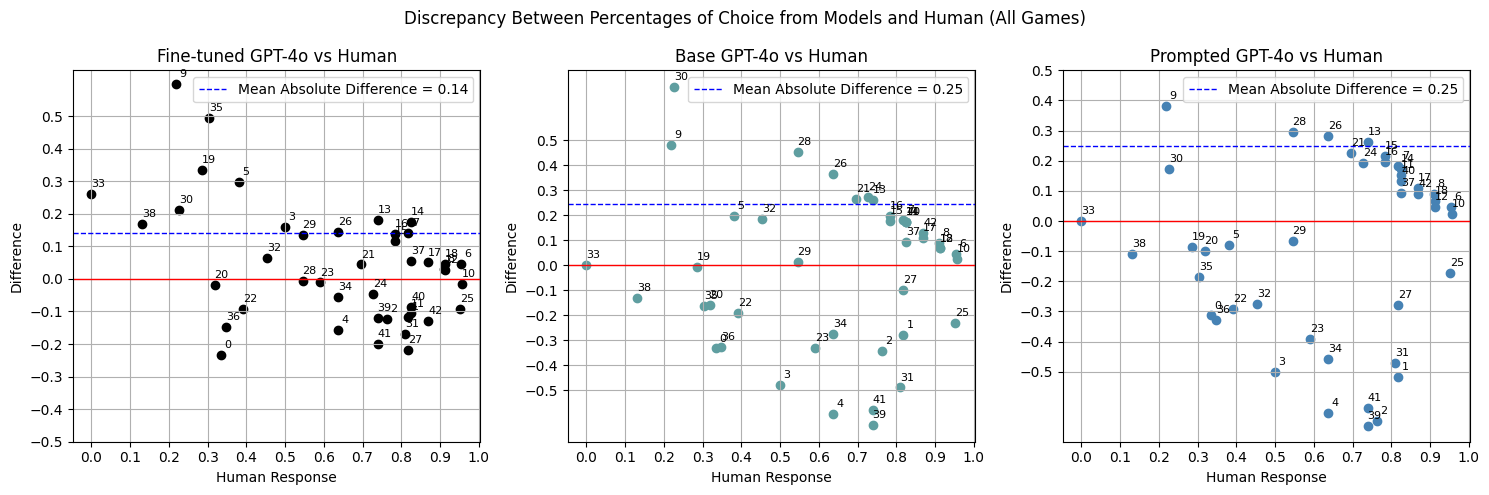

In [ ]:


# Assuming combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined

# Original data percentages
x = combined_orig_df['percentage'].values

# Differences between percentages
diff_ft50 = combined_ft50_df['percentage'].values - x
diff_baseline = combined_baseline_df['percentage'].values - x
diff_promoted = combined_promoted_df['percentage'].values - x

# Calculate absolute average differences
abs_avg_diff_ft50 = np.mean(np.abs(diff_ft50))
abs_avg_diff_baseline = np.mean(np.abs(diff_baseline))
abs_avg_diff_promoted = np.mean(np.abs(diff_promoted))

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot differences for ft50 vs orig
axs[0].scatter(x, diff_ft50, color='black')
axs[0].axhline(0, color='red', linewidth=1)
axs[0].axhline(abs_avg_diff_ft50, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_ft50:.2f}')
for i in range(len(x)):
    axs[0].annotate(i, (x[i], diff_ft50[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[0].set_xlabel('Human Response')
axs[0].set_ylabel('Difference')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[0].set_title('Fine-tuned GPT-4o vs Human')

# Plot differences for baseline vs orig
axs[1].scatter(x, diff_baseline, color='cadetblue')
axs[1].axhline(0, color='red', linewidth=1)
axs[1].axhline(abs_avg_diff_baseline, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_baseline:.2f}')
for i in range(len(x)):
    axs[1].annotate(i, (x[i], diff_baseline[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1].set_xlabel('Human Response')
axs[1].set_ylabel('Difference')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[1].set_title('Base GPT-4o vs Human')

# Plot differences for promoted vs orig
axs[2].scatter(x, diff_promoted, color='steelblue')
axs[2].axhline(0, color='red', linewidth=1)
axs[2].axhline(abs_avg_diff_promoted, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_promoted:.2f}')
for i in range(len(x)):
    axs[2].annotate(i, (x[i], diff_promoted[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[2].set_xlabel('Human Response')
axs[2].set_ylabel('Difference')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[2].set_title('Prompted GPT-4o vs Human')

plt.suptitle('Discrepancy Between Percentages of Choice from Models and Human (All Games)')
plt.tight_layout()
plt.show()


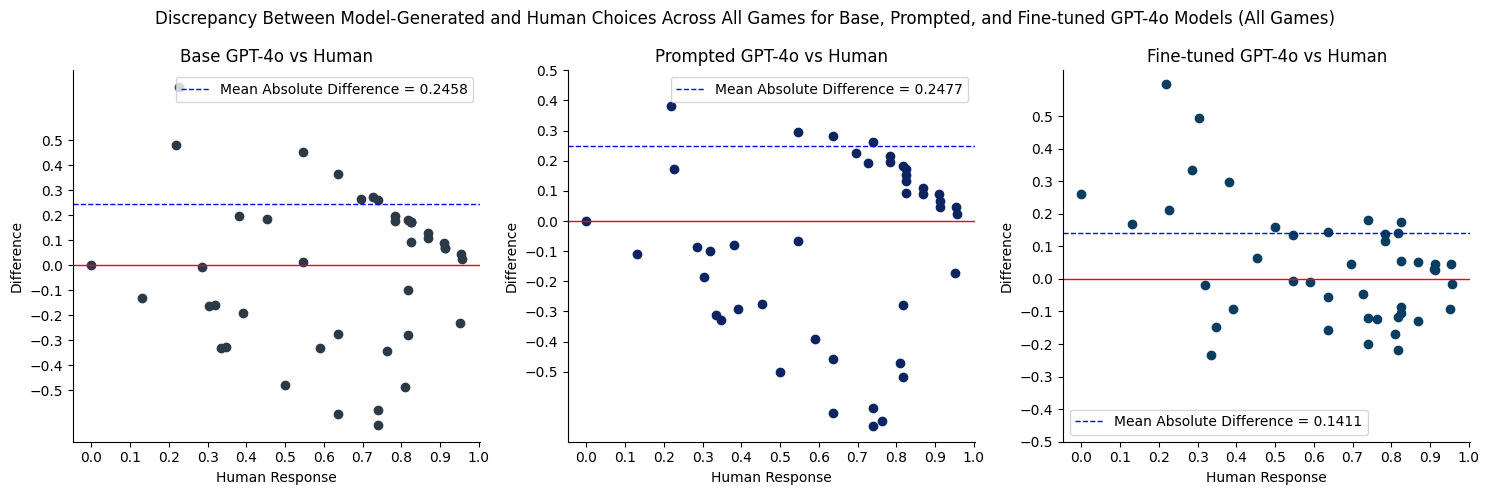

In [ ]:
# Assuming combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined

# Original data percentages
x = combined_orig_df['percentage'].values

# Differences between percentages
diff_ft50 = combined_ft50_df['percentage'].values - x
diff_baseline = combined_baseline_df['percentage'].values - x
diff_promoted = combined_promoted_df['percentage'].values - x

# Calculate absolute average differences
abs_avg_diff_ft50 = np.mean(np.abs(diff_ft50))
abs_avg_diff_baseline = np.mean(np.abs(diff_baseline))
abs_avg_diff_promoted = np.mean(np.abs(diff_promoted))

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))



# Plot differences for baseline vs orig
axs[0].scatter(x, diff_baseline, color='#2C3A47')
axs[0].axhline(0, color='red', linewidth=1)
axs[0].axhline(abs_avg_diff_baseline, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_baseline:.4f}')
axs[0].set_xlabel('Human Response')
axs[0].set_ylabel('Difference')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[0].set_title('Base GPT-4o vs Human')

# Plot differences for promoted vs orig
axs[1].scatter(x, diff_promoted, color='#0c2461')
axs[1].axhline(0, color='red', linewidth=1)
axs[1].axhline(abs_avg_diff_promoted, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_promoted:.4f}')
axs[1].set_xlabel('Human Response')
axs[1].set_ylabel('Difference')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[1].set_title('Prompted GPT-4o vs Human')

# Plot differences for ft50 vs orig
axs[2].scatter(x, diff_ft50, color='#0a3d62')
axs[2].axhline(0, color='red', linewidth=1)
axs[2].axhline(abs_avg_diff_ft50, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_ft50:.4f}')
axs[2].set_xlabel('Human Response')
axs[2].set_ylabel('Difference')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[2].set_title('Fine-tuned GPT-4o vs Human')

# Remove grid, top and right axes
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(False)

plt.suptitle('Discrepancy Between Model-Generated and Human Choices Across All Games for Base, Prompted, and Fine-tuned GPT-4o Models (All Games)')
plt.tight_layout()
plt.show()

# Visual demo

In [ ]:
df_control_survey_91 = pd.read_csv('/content/drive/My Drive/social preference/df_control_survey_91_only3features.csv')
agents91_demo_prompted = pd.read_csv('/content/drive/My Drive/social preference/agents91_demo_prompted.csv')
agentonly_df =pd.read_csv('/content/drive/My Drive/social preference/agentonly4o_91_df.csv') #91 subjects

In [ ]:
df_control_survey_91

subjectID  age  gender  numsibling
0    050316PQ-1   19  Female           2
1    050316PQ-2   20  Female           2
2    050316PQ-4   18    Male           1
3    050316PQ-5   21    Male           0
4    050316PQ-6   19  Female           4
..          ...  ...     ...         ...
86  050401QD-14   20  Female           3
87   050801LR-1   25    Male           1
88   050801LR-2   21  Female           1
89   050801LR-3   21    Male           0
90   050801LR-4   26    Male           1

[91 rows x 4 columns]

In [ ]:
agents91_demo_prompted

Unnamed: 0                                          response1  \
0            0  {\n    "subjectID": "abc12345",\n    "age": 29...   
1            1  {\n  "subjectID": "AB123456",\n  "age": 29,\n ...   
2            2  {\n  "subjectID": "participant_12458",\n  "age...   
3            3  {\n  "subjectID": "P12345",\n  "age": 30,\n  "...   
4            4  {\n  "subjectID": "participant_12345",\n  "age...   
..         ...                                                ...   
86          86  {\n  "subjectID": "a7d62b2c-9f8b-4ef7-8a57-2fa...   
87          87  {\n  "subjectID": "A123456789",\n  "age": 27,\...   
88          88  {\n  "subjectID": "1234ABC",\n  "age": 28,\n  ...   
89          89  {\n  "subjectID": "XD123456",\n  "age": 29,\n ...   
90          90  {\n    "subjectID": "AB1234",\n    "age": 29,\...   

                               subjectID  age  gender  numberofsiblings  \
0                               abc12345   29  female                 2   
1                               AB123456   29  Female                 2   
2                      participant_12458   29  female                 2   
3                                 P12345   30  Female                 2   
4                      participant_12345   29  Female                 2   
..                                   ...  ...     ...               ...   
86  a7d62b2c-9f8b-4ef7-8a57-2fa1b9eec343   27  Female                 2   
87                            A123456789   27  Female                 2   
88                               1234ABC   28  Female                 2   
89                              XD123456   29    Male                 1   
90                                AB1234   29  Female                 2   

                                         gamestrategy  
0   [{'game': 1, 'role': 'A', 'decision': 'coopera...  
1   [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
2   {'Game1': 'Tit-for-Tat', 'Game2': 'Cooperative...  
3   [{'game': 'Ultimatum', 'role': 'A', 'decision'...  
4   [{'game': 'Game 1', 'role': 'A', 'decision': '...  
..                                                ...  
86  [{'game': 'Game 1: Ultimatum Game', 'role': 'A...  
87  {'game1': {'role': 'A', 'decision': 'Cooperate...  
88  {'game1': 'Tit-for-tat', 'game2': 'Random', 'g...  
89  [{'game': 1, 'role': 'A', 'decision': 'Coopera...  
90  {'game1': {'role': 'A', 'decision': 'Cooperate...  

[91 rows x 7 columns]

In [ ]:
agentonly_df

Unnamed: 0                                          response1  \
0            0  {\n    "subjectID": "2760508-1",\n    "age": 2...   
1            1  {\n    "subjectID": "8095289-6",\n    "age": 2...   
2            2  {\n    "subjectID": "101",\n    "age": 25,\n  ...   
3            3  {\n    "subjectID": "1018",\n    "age": 47,\n ...   
4            4  {\n    "subjectID": "5015330-1",\n    "age": 2...   
..         ...                                                ...   
86          86  {\n    "subjectID": "091823PQ-11",\n    "age":...   
87          87  {\n    "subjectID": 3,\n    "age": 26,\n    "g...   
88          88  {\n    "subjectID": "101",\n    "age": 29,\n  ...   
89          89  {\n    "subjectID": "002",\n    "age": 42,\n  ...   
90          90  {\n    "subjectID": 1001,\n    "age": 23,\n   ...   

      subjectID  age  gender  numberofsiblings  \
0     2760508-1   26    Male                 1   
1     8095289-6   29    Male                 1   
2           101   25  Female                 1   
3          1018   47  Female                 5   
4     5015330-1   22  Female                 3   
..          ...  ...     ...               ...   
86  091823PQ-11   25    Male                 1   
87            3   26   Other                 2   
88          101   29  Female                 3   
89          002   42  Female                 3   
90         1001   23  Female                 1   

                                         gamestrategy  
0   Try to earn as much money as possible for myself.  
1   Try to earn as much money as possible for me a...  
2   Try to earn as much money as possible for myse...  
3   Try to earn as much money as possible for myse...  
4   Try to earn as much money as possible for myse...  
..                                                ...  
86  Try to earn as much money as possible for myse...  
87  Try to earn as much money as possible for myself.  
88  Try to earn as much money as possible for myse...  
89  Try to earn as much money as possible for myself.  
90  Try to help my match if it did not cost me any...  

[91 rows x 7 columns]

In [ ]:
agentonly_df['numsibling'] = agentonly_df['numberofsiblings']

In [ ]:
agents91_demo_prompted['numsibling'] = agents91_demo_prompted['numberofsiblings']

In [ ]:
df_control_survey_91['numsibling'] = df_control_survey_91['numsibling'].astype(int)
agents91_demo_prompted['numsibling'] = agents91_demo_prompted['numsibling'].astype(int)
agentonly_df['numsibling'] = agentonly_df['numsibling'].astype(int)

In [ ]:
def capitalize_gender(df):
    df['gender'] = df['gender'].str.capitalize()
    return df

# Apply preprocessing
agents91_demo_prompted = capitalize_gender(agents91_demo_prompted)
agentonly_df = capitalize_gender(agentonly_df)
df_control_survey_91 = capitalize_gender(df_control_survey_91)

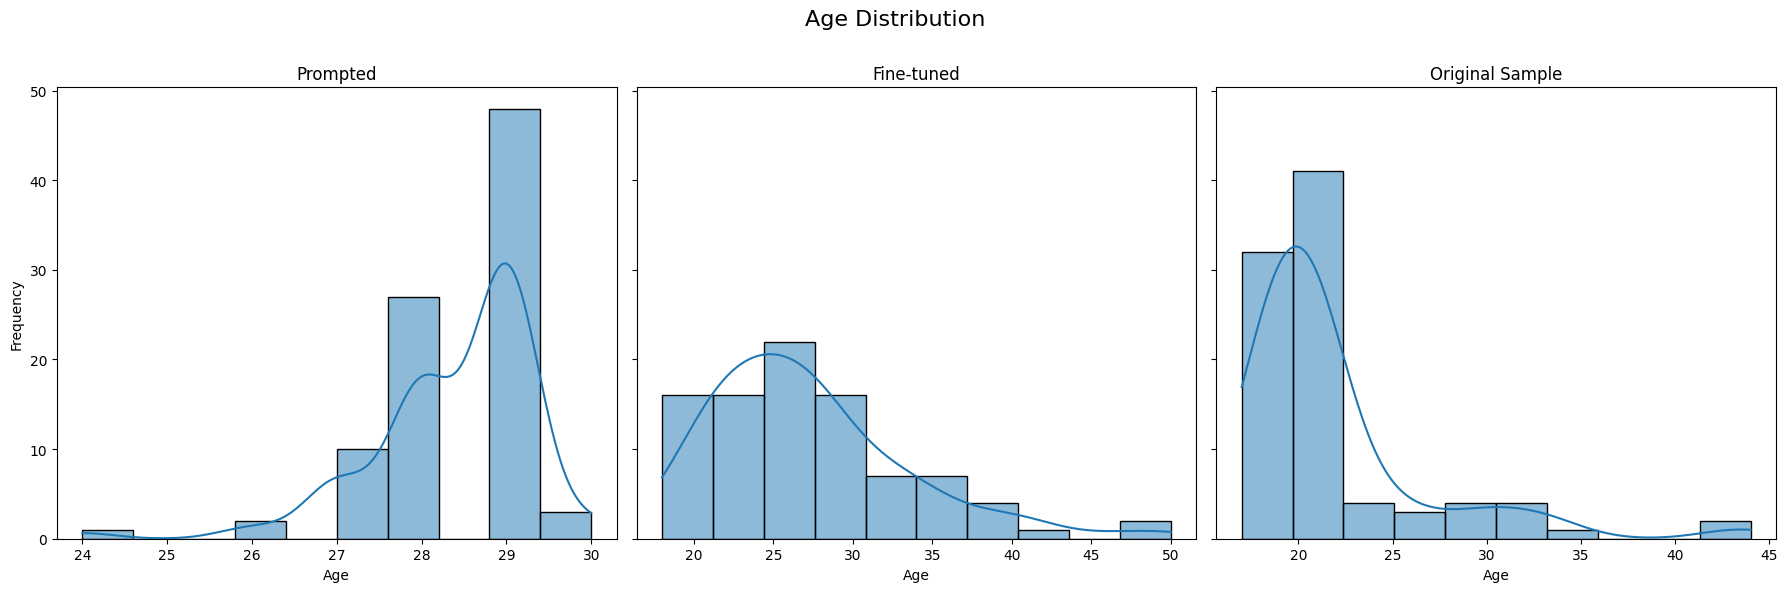

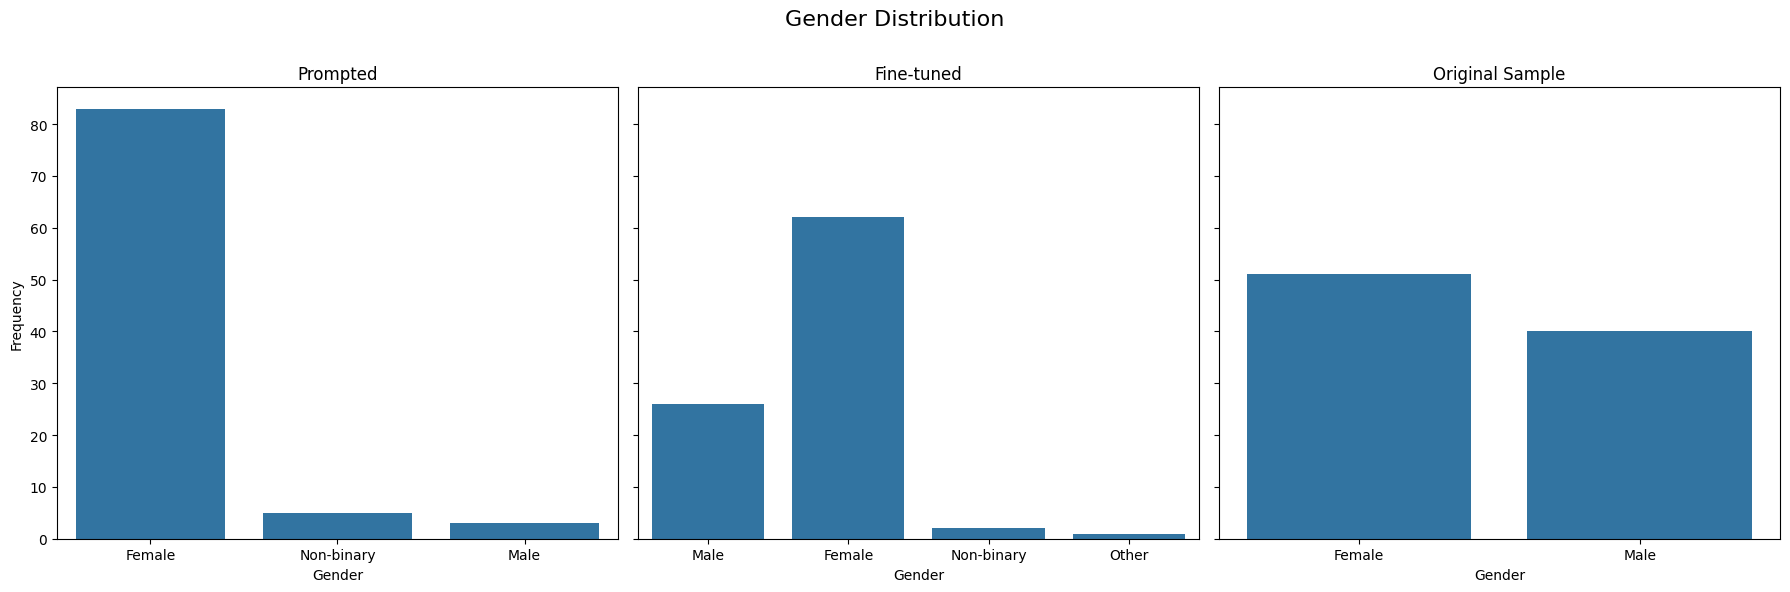

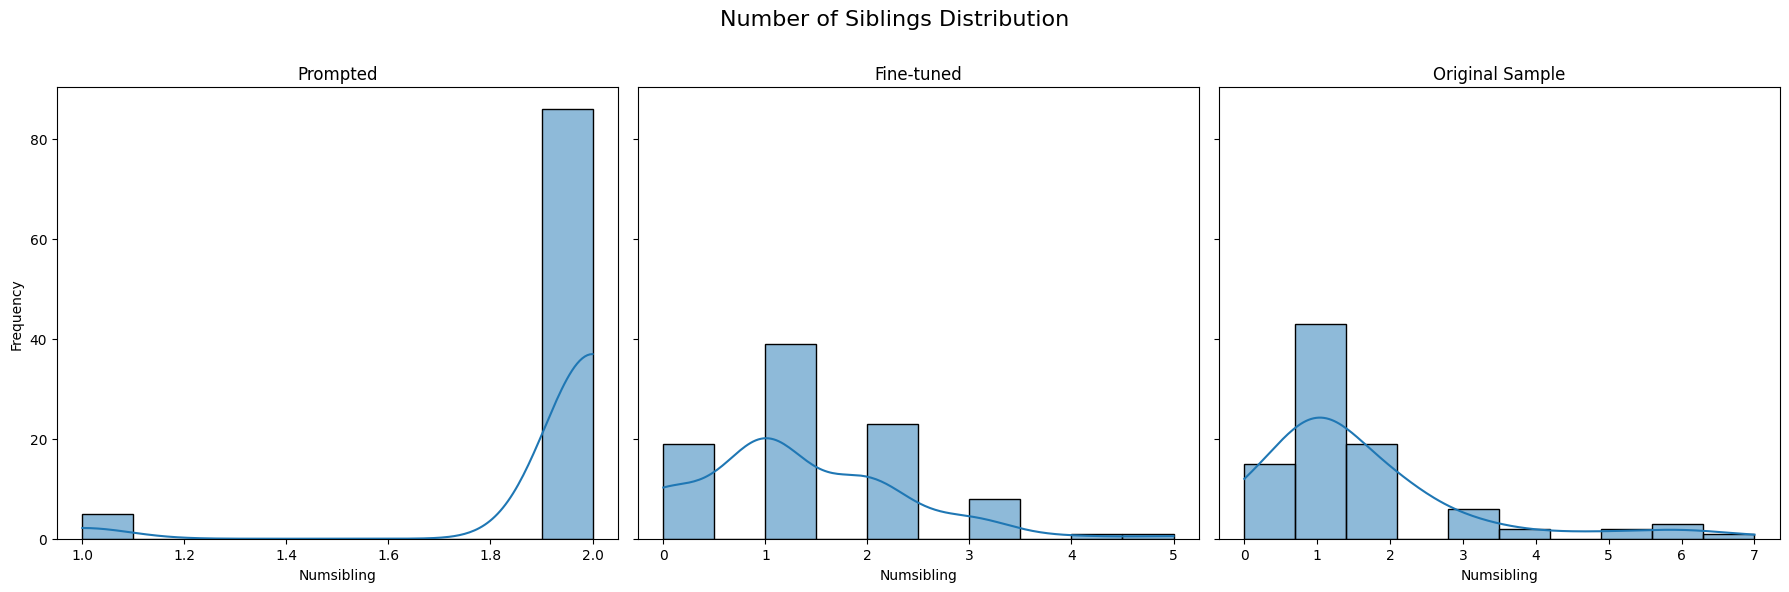

In [ ]:


import seaborn as sns

# List of DataFrames and their labels
dfs = [
    (agents91_demo_prompted, 'Prompted'),
    (agentonly_df, 'Fine-tuned'),
    (df_control_survey_91, 'Original Sample')
]

# Function to create subplots
def create_subplots(dfs, column, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(title, fontsize=16)

    for ax, (df, label) in zip(axes, dfs):
        if column == 'gender':
            sns.countplot(data=df, x=column, ax=ax)
        else:
            sns.histplot(data=df, x=column, ax=ax, bins=10, kde=True)
        ax.set_title(label)
        ax.set_xlabel(column.capitalize())
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Create subplots for each demographic variable
create_subplots(dfs, 'age', 'Age Distribution')
create_subplots(dfs, 'gender', 'Gender Distribution')
create_subplots(dfs, 'numsibling', 'Number of Siblings Distribution')


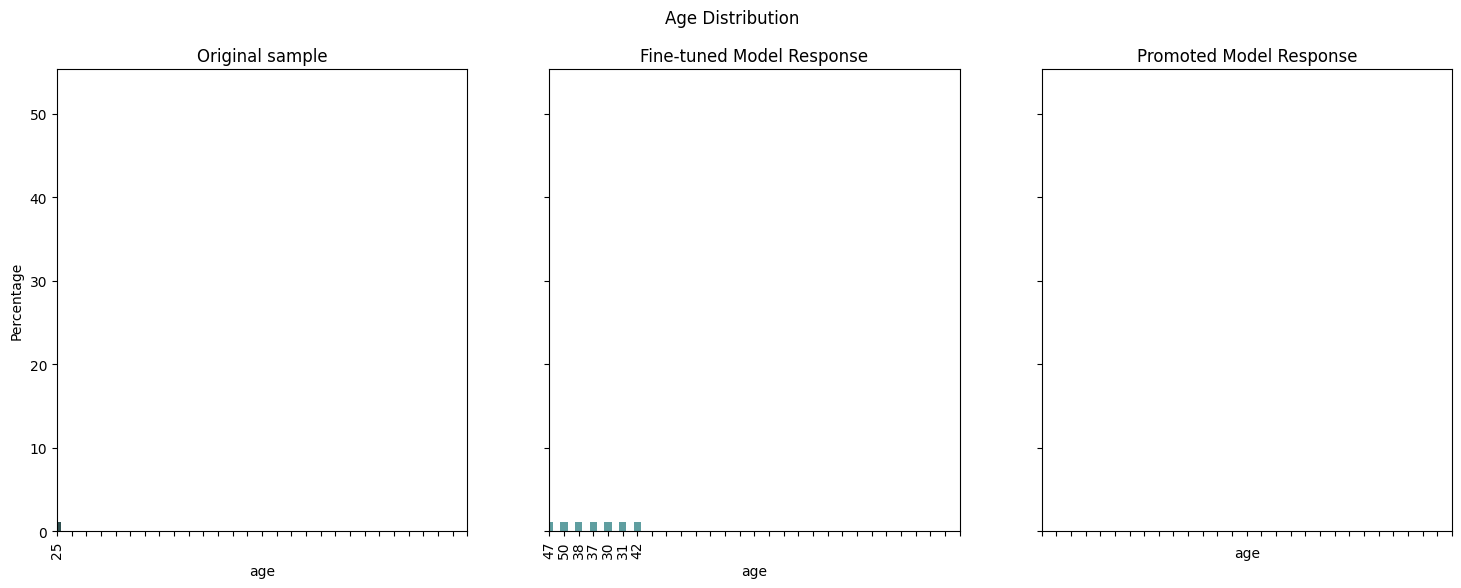

ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

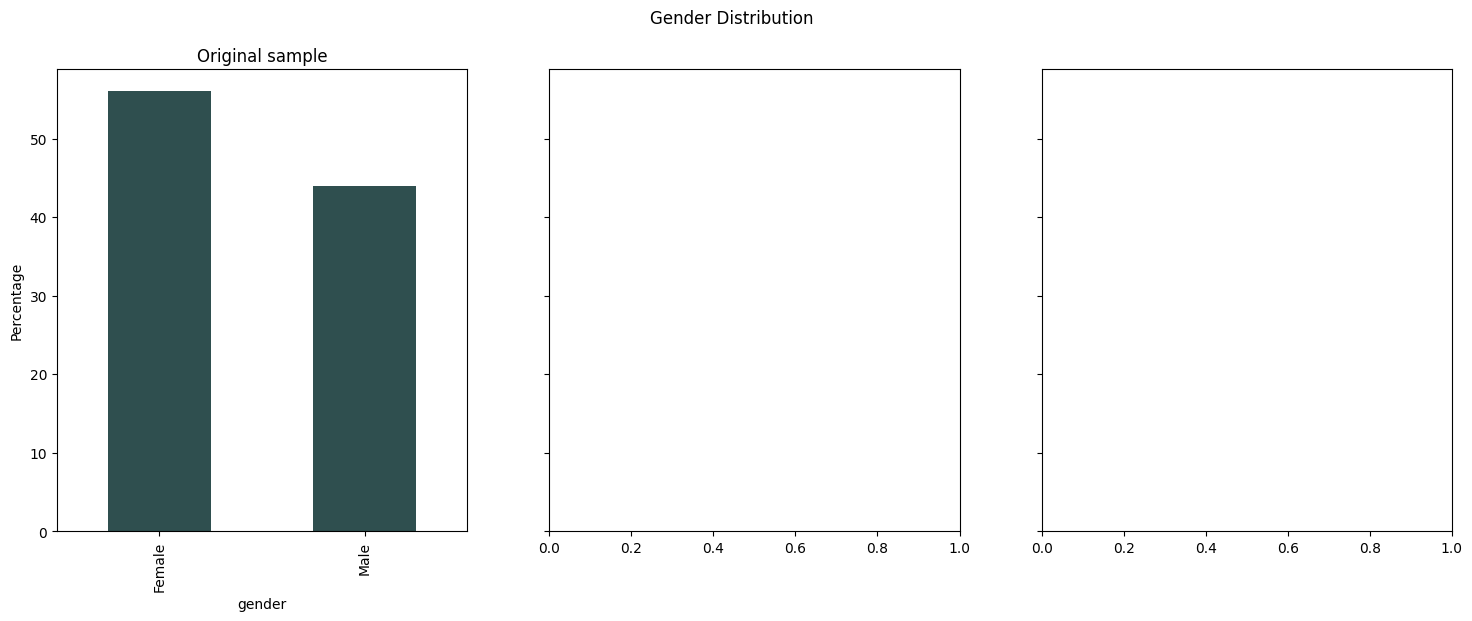

In [ ]:
def calculate_percentage(df, column):
    return df[column].value_counts(normalize=True) * 100


def plot_distribution(df1, df2, df3, column, title, x_limits, x_ticks):
    df1_perc = calculate_percentage(df1, column)
    df2_perc = calculate_percentage(df2, column)
    df3_perc = calculate_percentage(df3, column)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(title)

    df1_perc.plot(kind='bar', ax=axes[0], color='darkslategrey')
    axes[0].set_title('Original sample')
    axes[0].set_ylabel('Percentage')
    axes[0].set_xlim(x_limits)
    axes[0].set_xticks(x_ticks)

    df2_perc.plot(kind='bar', ax=axes[2], color='steelblue')
    axes[2].set_title('Promoted Model Response')
    axes[2].set_xlim(x_limits)
    axes[2].set_xticks(x_ticks)

    df3_perc.plot(kind='bar', ax=axes[1], color='cadetblue')
    axes[1].set_title('Fine-tuned Model Response')
    axes[1].set_xlim(x_limits)
    axes[1].set_xticks(x_ticks)

    plt.show()

# Define x-axis limits and ticks for age
age_limits = (17, 45)
age_ticks = list(range(17, 46, 1))

# Plotting distributions
plot_distribution(df_control_survey_91, agents91_demo_prompted, agentonly_df, 'age', 'Age Distribution', age_limits, age_ticks)
plot_distribution(df_control_survey_91, agents91_demo_prompted, agentonly_df, 'gender', 'Gender Distribution', None, None)
plot_distribution(df_control_survey_91, agents91_demo_prompted, agentonly_df, 'numsibling', 'Number of Siblings Distribution', None, None)

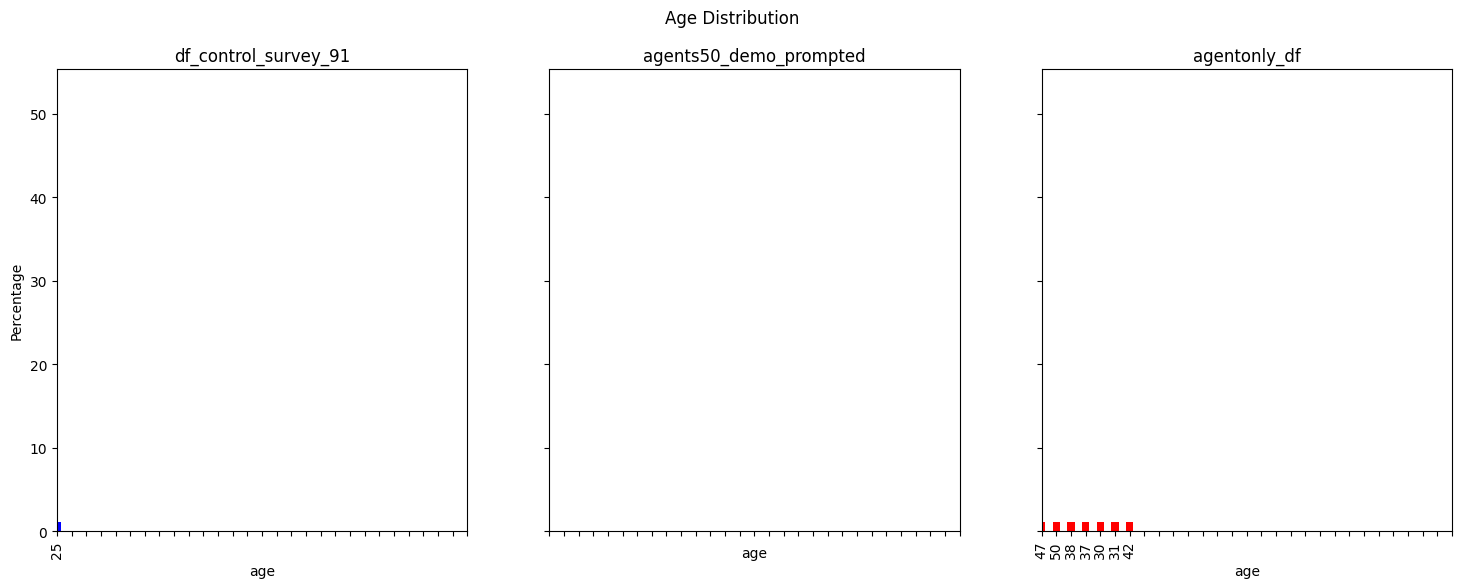

ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

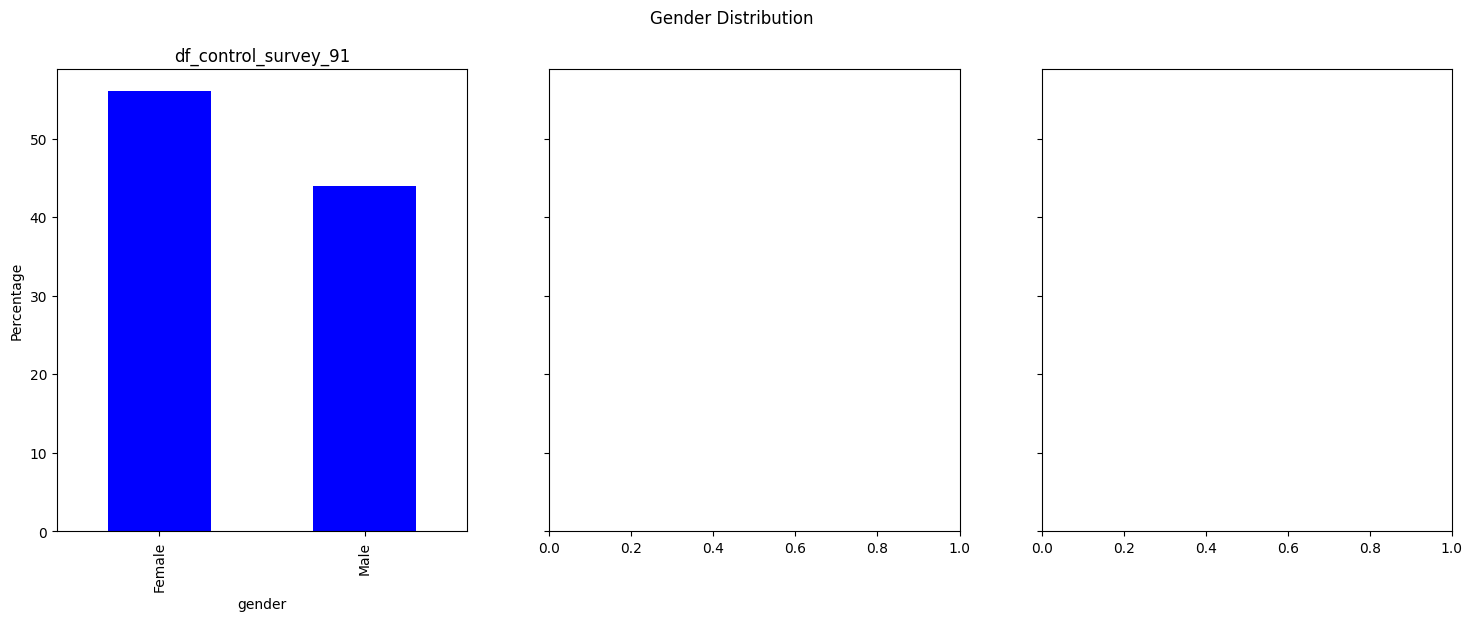

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_percentage(df, column):
    return df[column].value_counts(normalize=True) * 100

def plot_distribution(df1, df2, df3, column, title, x_limits, x_ticks):
    df1_perc = calculate_percentage(df1, column)
    df2_perc = calculate_percentage(df2, column)
    df3_perc = calculate_percentage(df3, column)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(title)

    df1_perc.plot(kind='bar', ax=axes[0], color='blue')
    axes[0].set_title('df_control_survey_91')
    axes[0].set_ylabel('Percentage')
    axes[0].set_xlim(x_limits)
    axes[0].set_xticks(x_ticks)

    df2_perc.plot(kind='bar', ax=axes[1], color='green')
    axes[1].set_title('agents50_demo_prompted')
    axes[1].set_xlim(x_limits)
    axes[1].set_xticks(x_ticks)

    df3_perc.plot(kind='bar', ax=axes[2], color='red')
    axes[2].set_title('agentonly_df')
    axes[2].set_xlim(x_limits)
    axes[2].set_xticks(x_ticks)

    plt.show()

# Define x-axis limits and ticks for age
age_limits = (17, 45)
age_ticks = list(range(17, 46, 1))

# Plotting distributions
plot_distribution(df_control_survey_91, agents91_demo_prompted, agentonly_df, 'age', 'Age Distribution', age_limits, age_ticks)
plot_distribution(df_control_survey_91, agents91_demo_prompted, agentonly_df, 'gender', 'Gender Distribution', None, None)
plot_distribution(df_control_survey_91, agents91_demo_prompted, agentonly_df, 'numsibling', 'NumSibling Distribution', None, None)


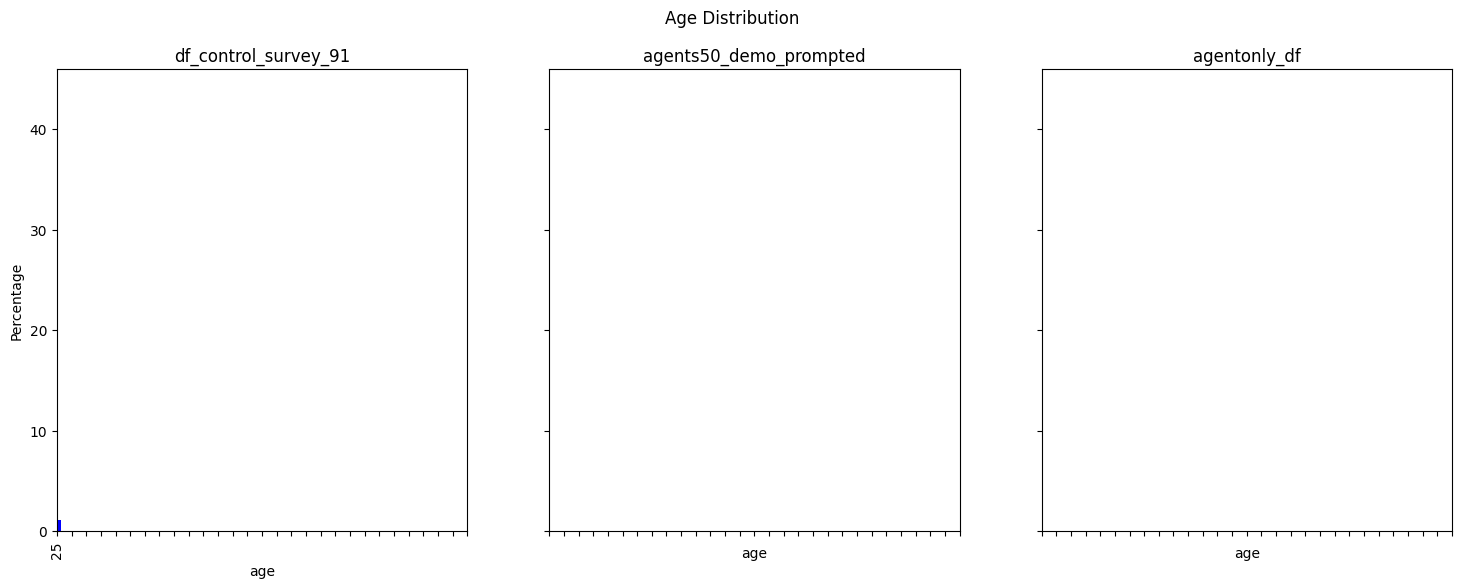

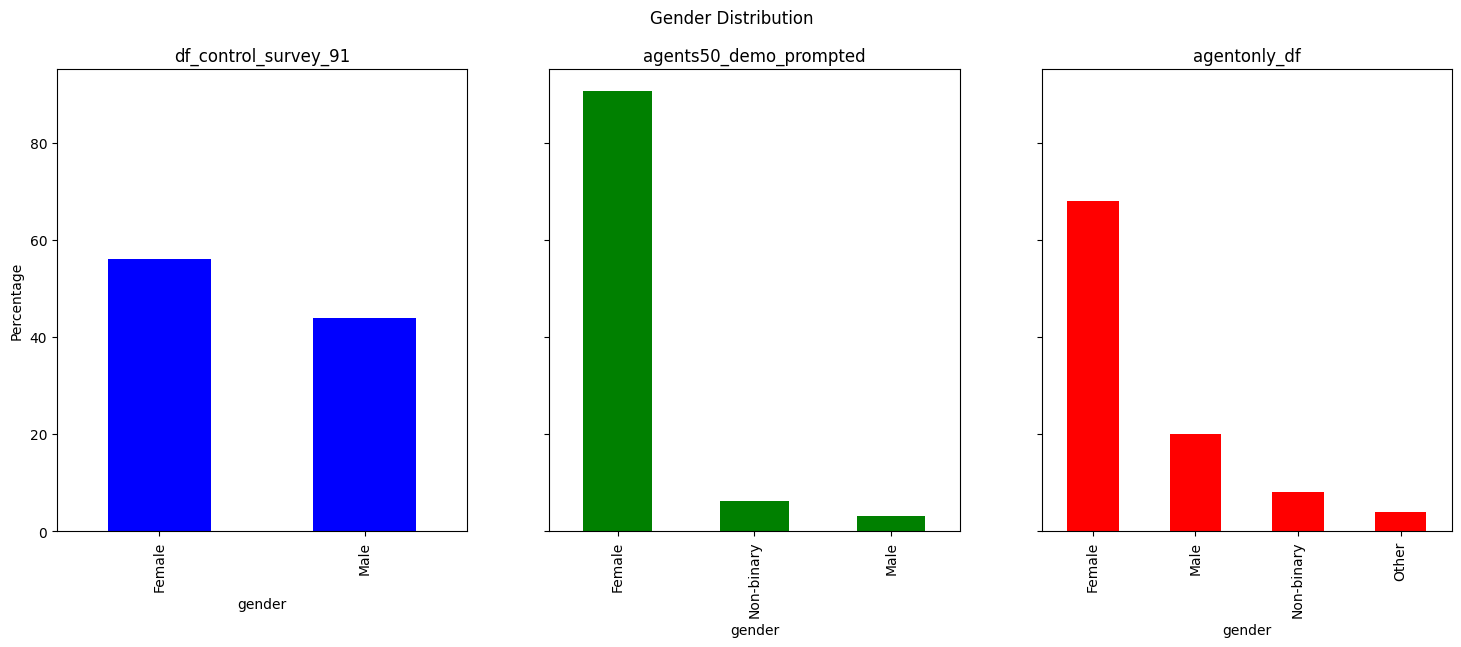

KeyError: 'number'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_percentage(df, column):
    return df[column].value_counts(normalize=True) * 100

def plot_distribution(df1, df2, df3, column, title, x_limits=None, x_ticks=None):
    df1_perc = calculate_percentage(df1, column)
    df2_perc = calculate_percentage(df2, column)
    df3_perc = calculate_percentage(df3, column)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(title)

    df1_perc.plot(kind='bar', ax=axes[0], color='blue')
    axes[0].set_title('df_control_survey_91')
    axes[0].set_ylabel('Percentage')
    if x_limits:
        axes[0].set_xlim(x_limits)
    if x_ticks:
        axes[0].set_xticks(x_ticks)

    df2_perc.plot(kind='bar', ax=axes[1], color='green')
    axes[1].set_title('agents50_demo_prompted')
    if x_limits:
        axes[1].set_xlim(x_limits)
    if x_ticks:
        axes[1].set_xticks(x_ticks)

    df3_perc.plot(kind='bar', ax=axes[2], color='red')
    axes[2].set_title('agentonly_df')
    if x_limits:
        axes[2].set_xlim(x_limits)
    if x_ticks:
        axes[2].set_xticks(x_ticks)

    plt.show()

# Define x-axis limits and ticks for age
age_limits = (17, 45)
age_ticks = list(range(17, 46, 1))

# Plotting distributions
plot_distribution(df_control_survey_91, agents50_demo_prompted, agentonly_df, 'age', 'Age Distribution', age_limits, age_ticks)
plot_distribution(df_control_survey_91, agents50_demo_prompted, agentonly_df, 'gender', 'Gender Distribution')
plot_distribution(df_control_survey_91, agents50_demo_prompted, agentonly_df, 'number', 'Number Distribution')
plot_distribution(df_control_survey_91, agents50_demo_prompted, agentonly_df, 'numsibling', 'NumSibling Distribution')


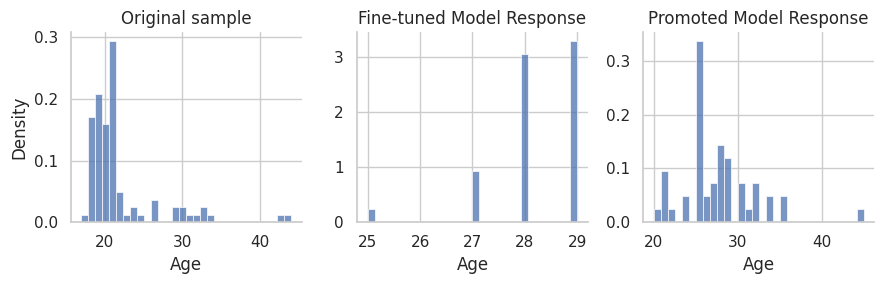

In [ ]:
# df_control_survey_91
# agents50_demo_prompted
# agentonly_df

# Add a column to indicate the source of each DataFrame
df_control_survey_91['source'] = 'Original sample'
agents50_demo_prompted['source'] = 'Fine-tuned Model Response'
agentonly_df['source'] = 'Promoted Model Response'

# Combine the DataFrames
combined_df = pd.concat([df_control_survey_91[['subjectID', 'age', 'source']],
                         agents50_demo_prompted[['subjectID', 'age', 'source']],
                         agentonly_df[['subjectID', 'age', 'source']]])

# Plotting using Seaborn jointplot
sns.set(style="whitegrid")

# Create a jointplot for each source category
g = sns.FacetGrid(combined_df, col="source", sharex=False, sharey=False)
g.map(sns.histplot, "age", kde=False, stat="density", bins=30)

# Adjust the plot
g.set_axis_labels("Age", "Density")
g.set_titles("{col_name}")
g.tight_layout()

# Show the plot
plt.show()


In [ ]:
combined_df

subjectID  age                   source
0   050316PQ-1   19          Original sample
1   050316PQ-2   20          Original sample
2   050316PQ-4   18          Original sample
3   050316PQ-5   21          Original sample
4   050316PQ-6   19          Original sample
..         ...  ...                      ...
45      P1-020   27  Promoted Model Response
46        P001   25  Promoted Model Response
47         015   30  Promoted Model Response
48   0013250-6   20  Promoted Model Response
49      100001   25  Promoted Model Response

[173 rows x 3 columns]

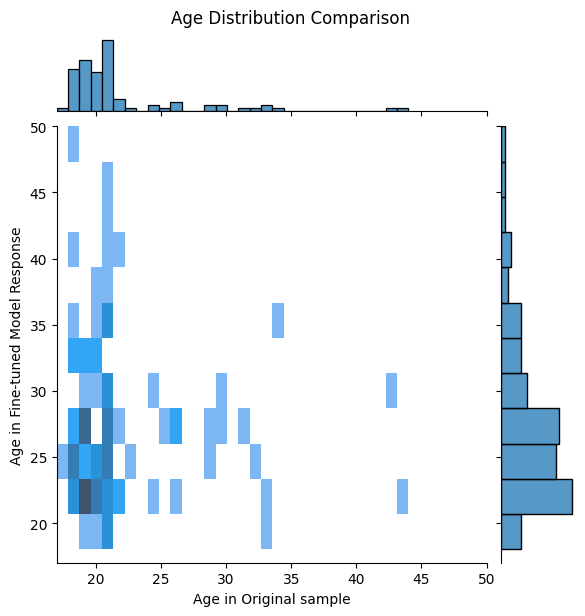

In [ ]:
# Assuming your DataFrames are already loaded and each DataFrame has 'subjectID' and 'age' columns

# Add a column to indicate the source of each DataFrame
df_control_survey_91['source'] = 'Original sample'
agents91_demo_prompted['source'] = 'Promoted Model Response'
agentonly_df['source'] = 'Fine-tuned Model Response'

# Combine the DataFrames
combined_df = pd.concat([df_control_survey_91[['subjectID', 'age', 'source']],
                         agents91_demo_prompted[['subjectID', 'age', 'source']],
                         agentonly_df[['subjectID', 'age', 'source']]])

# Determine the min and max age across all DataFrames
min_age = combined_df['age'].min()
max_age = combined_df['age'].max()

# Create the jointplot with same x and y limits
g = sns.jointplot(x=df_control_survey_91['age'], y=agentonly_df['age'], kind="hist")
g.ax_joint.set_xlim(min_age, max_age)
g.ax_joint.set_ylim(min_age, max_age)

# Set axis labels
g.set_axis_labels("Age in Original sample", "Age in Fine-tuned Model Response")
g.fig.suptitle("Age Distribution Comparison", y=1.02)

# Show the plot
plt.show()


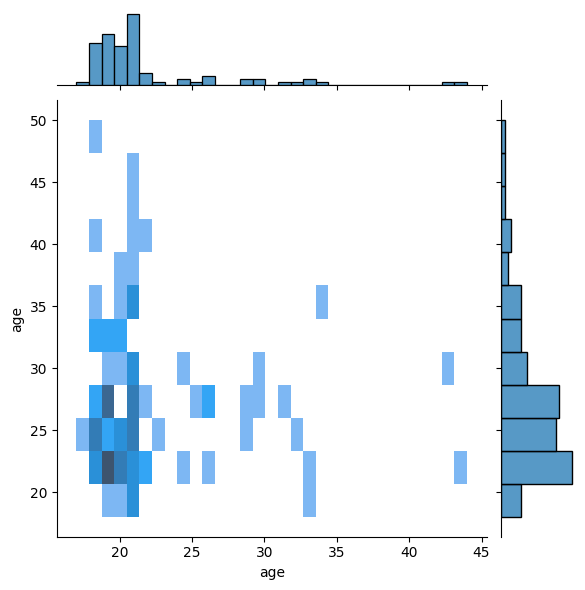

In [ ]:
sns.jointplot(x=df_control_survey_91['age'], y=agentonly_df['age'], kind="hist")

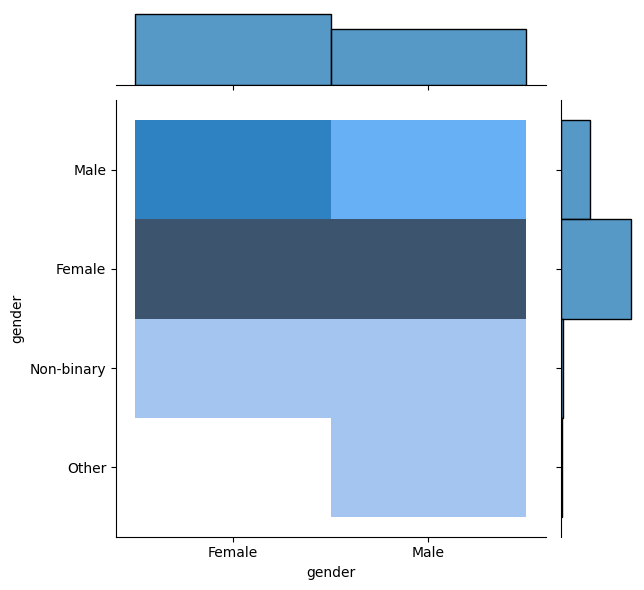

In [ ]:
sns.jointplot(x=df_control_survey_91['gender'], y=agentonly_df['gender'], kind="hist")

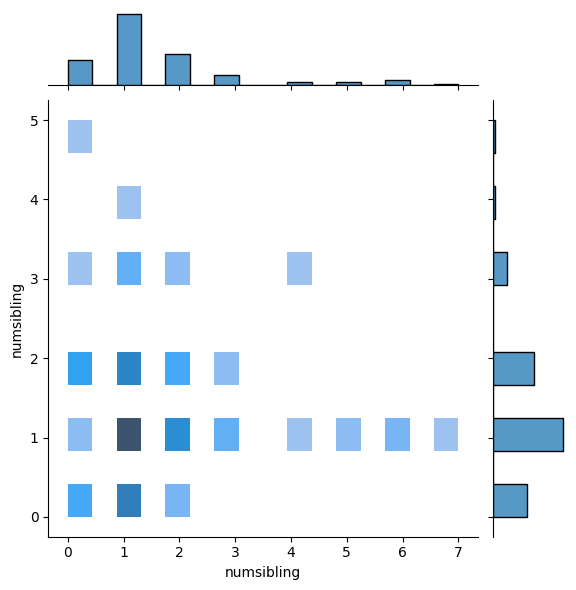

In [ ]:
sns.jointplot(x=df_control_survey_91['numsibling'], y=agentonly_df['numsibling'], kind="hist")

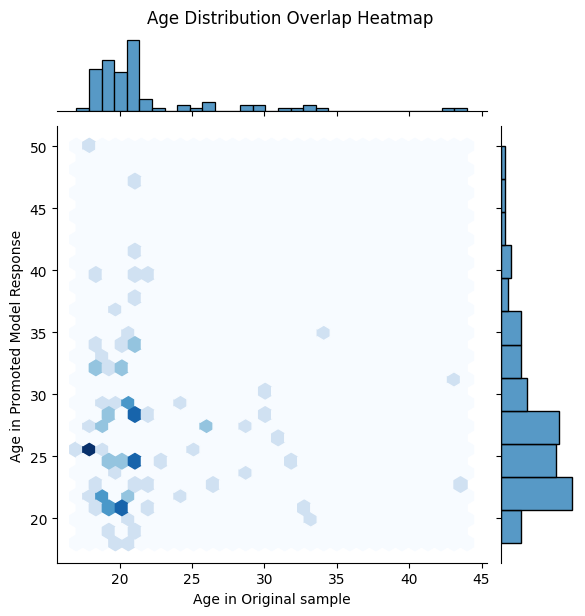

In [ ]:
# Define the x and y variables
x = df_control_survey_91['age']
y = agentonly_df['age']

# Create the joint plot with kind='hex' to get the hexbin heatmap
g = sns.jointplot(x=x, y=y, kind='hex', gridsize=30, cmap='Blues')

# Set the axis labels
g.set_axis_labels("Age in Original sample", "Age in Promoted Model Response")
g.fig.suptitle("Age Distribution Overlap Heatmap", y=1.02)

# Show the plot
plt.show()

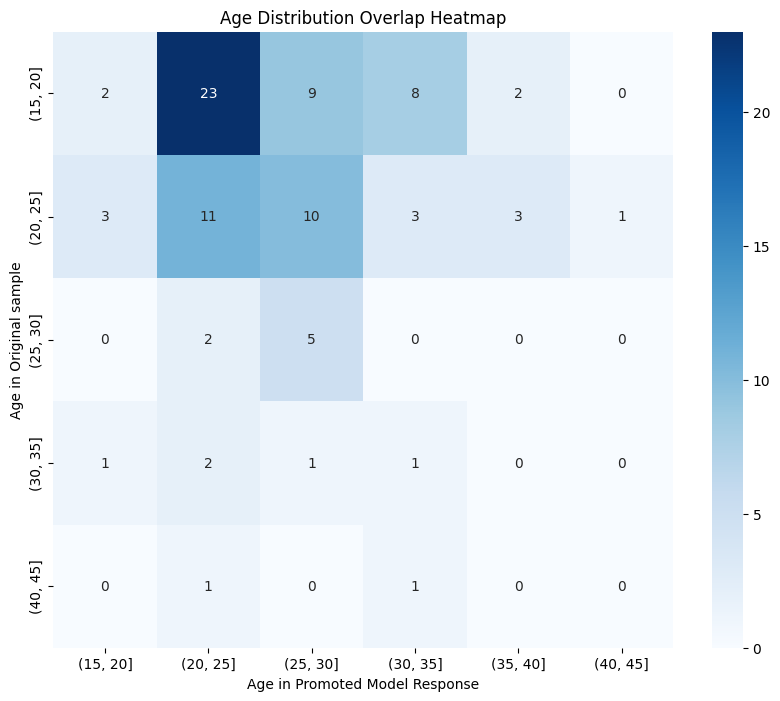

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrames are already loaded and each DataFrame has 'subjectID' and 'age' columns

# Define the bins for the age data
bins = np.arange(15, 50, 5)  # Adjust bin range and size as needed

# Bin the age data
df_control_survey_91['age_bin'] = pd.cut(df_control_survey_91['age'], bins=bins)
agentonly_df['age_bin'] = pd.cut(agentonly_df['age'], bins=bins)

# Create a contingency table for the heatmap
contingency_table = pd.crosstab(df_control_survey_91['age_bin'], agentonly_df['age_bin'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel("Age in Promoted Model Response")
ax.set_ylabel("Age in Original sample")
ax.set_title("Age Distribution Overlap Heatmap")

plt.show()


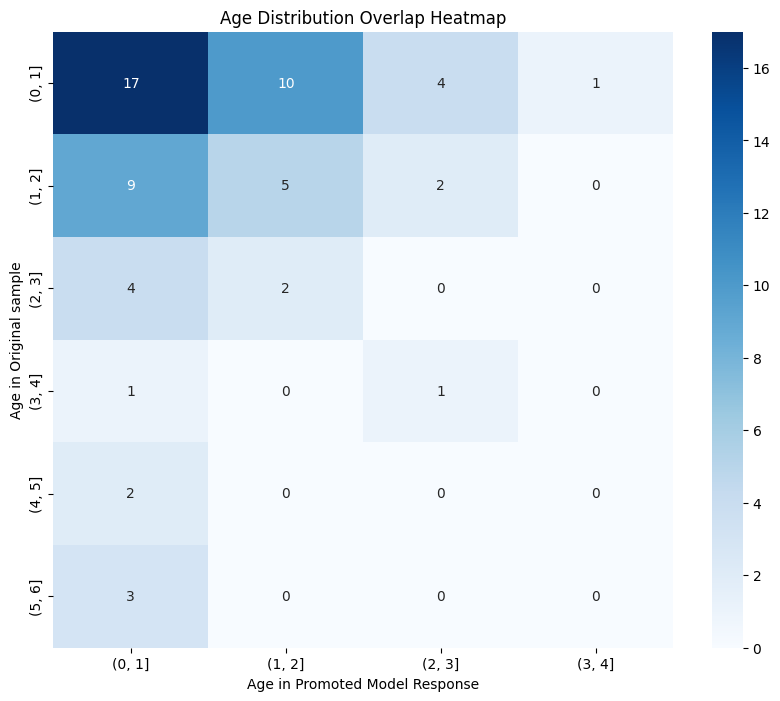

In [ ]:
# Define the bins for the age data
bins = np.arange(0, 7, 1)  # Adjust bin range and size as needed

# Bin the age data
df_control_survey_91['numsibling_bin'] = pd.cut(df_control_survey_91['numsibling'], bins=bins)
agentonly_df['numsibling_bin'] = pd.cut(agentonly_df['numsibling'], bins=bins)

# Create a contingency table for the heatmap
contingency_table = pd.crosstab(df_control_survey_91['numsibling_bin'], agentonly_df['numsibling_bin'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel("Age in Promoted Model Response")
ax.set_ylabel("Age in Original sample")
ax.set_title("Age Distribution Overlap Heatmap")

plt.show()

# Generality

### split data



In [ ]:
df_control_cleaned = pd.read_csv('/content/drive/My Drive/social preference/df_control_cleaned.csv')

In [ ]:
df_control_cleaned

treatment      date  stage  subject  picturechoice1  picturechoice2  \
0     control  050316PQ      3        1             NaN             NaN   
1     control  050316PQ      3        4             NaN             NaN   
2     control  050316PQ      3       10             NaN             NaN   
3     control  050316PQ      3       11             NaN             NaN   
4     control  050316PQ      3       13             NaN             NaN   
..        ...       ...    ...      ...             ...             ...   
954   control  050801NP      3       12             NaN             NaN   
955   control  050801NP      3       13             NaN             NaN   
956   control  050801NP      3       14             NaN             NaN   
957   control  050801NP      3       15             NaN             NaN   
958   control  050801NP      3       16             NaN             NaN   

     picturechoice3  picturechoice4  picturechoice5  mytype  ...  \
0               NaN             NaN             NaN     NaN  ...   
1               NaN             NaN             NaN     NaN  ...   
2               NaN             NaN             NaN     NaN  ...   
3               NaN             NaN             NaN     NaN  ...   
4               NaN             NaN             NaN     NaN  ...   
..              ...             ...             ...     ...  ...   
954             NaN             NaN             NaN     NaN  ...   
955             NaN             NaN             NaN     NaN  ...   
956             NaN             NaN             NaN     NaN  ...   
957             NaN             NaN             NaN     NaN  ...   
958             NaN             NaN             NaN     NaN  ...   

     payoffB_Aout  payoffA_Bact1  payoffB_Bact1  payoffA_Bact2  payoffB_Bact2  \
0             NaN          400.0          400.0          750.0          400.0   
1             NaN          400.0          400.0          750.0          400.0   
2             NaN          400.0          400.0          750.0          400.0   
3             NaN          400.0          400.0          750.0          400.0   
4             NaN          400.0          400.0          750.0          400.0   
..            ...            ...            ...            ...            ...   
954         750.0          800.0          200.0            0.0          150.0   
955         750.0          800.0          200.0            0.0          150.0   
956         750.0          800.0          200.0            0.0          150.0   
957         750.0          800.0          200.0            0.0          150.0   
958         750.0          800.0          200.0            0.0          150.0   

     paintingawards  stage2_payoff  myrole(A/B)  choice    subjectID  
0               NaN            NaN            B      B1   050316PQ-1  
1               NaN            NaN            B      B2   050316PQ-4  
2               NaN            NaN            B      B2  050316PQ-10  
3               NaN            NaN            B      B2  050316PQ-11  
4               NaN            NaN            B      B1  050316PQ-13  
..              ...            ...          ...     ...          ...  
954             NaN            NaN            B      B1  050801NP-12  
955             NaN            NaN            B      B1  050801NP-13  
956             NaN            NaN            A      A2  050801NP-14  
957             NaN            NaN            A      A1  050801NP-15  
958             NaN            NaN            B      B1  050801NP-16  

[959 rows x 61 columns]

In [ ]:
# Create a list of game types to filter
game_types1 = ['Dict 3', 'Dict 4', 'Dict 5', 'Resp 1b', 'Resp 2b',
              'Resp 5b', 'Resp 13b', 'Resp 13c', 'Resp 13d',
              'Resp 10', 'Resp 11', 'Resp 12']

# Filter the DataFrame
df_control_cleaned_halfexample = df_control_cleaned[df_control_cleaned['game'].isin(game_types1)]


# Create a list of game types to filter
game_types2 = ['Dict 1', 'Dict 2', 'Resp 1a', 'Resp 6',
              'Resp 7', 'Resp 2a', 'Resp 3', 'Resp 4',
              'Resp 5a', 'Resp 8', 'Resp 9', 'Resp 13a']

# Filter the DataFrame
df_control_cleaned_halfresponse = df_control_cleaned[df_control_cleaned['game'].isin(game_types2)]

In [ ]:
df_control_cleaned_halfresponse['game'].unique()

array(['Dict 1', 'Resp 1a', 'Resp 5a', 'Dict 2', 'Resp 2a', 'Resp 3',
       'Resp 4', 'Resp 6', 'Resp 8', 'Resp 7', 'Resp 9', 'Resp 13a'],
      dtype=object)

In [ ]:
df_control_cleaned_halfexample['game'].unique()

array(['Dict 3', 'Resp 2b', 'Resp 5b', 'Resp 10', 'Dict 4', 'Dict 5',
       'Resp 11', 'Resp 12', 'Resp 1b', 'Resp 13b', 'Resp 13c',
       'Resp 13d'], dtype=object)

In [ ]:
df_control_cleaned_halfresponse['subjectID'].unique().size

133

In [ ]:
df_control_cleaned_halfresponse['subjectID'].unique().size

133

In [ ]:
#df_control_cleaned_halfresponse.to_csv('/content/drive/My Drive/social preference/df_control_cleaned_halfresponse.csv')
#df_control_cleaned_halfexample.to_csv('/content/drive/My Drive/social preference/df_control_cleaned_halfexample.csv')

NameError: name 'df_control_cleaned_halfresponse' is not defined

In [ ]:
df_control_cleaned_halfresponse = pd.read_csv('/content/drive/My Drive/social preference/df_control_cleaned_halfresponse.csv')
df_control_cleaned_halfexample = pd.read_csv('/content/drive/My Drive/social preference/df_control_cleaned_halfexample.csv')

# fine tune

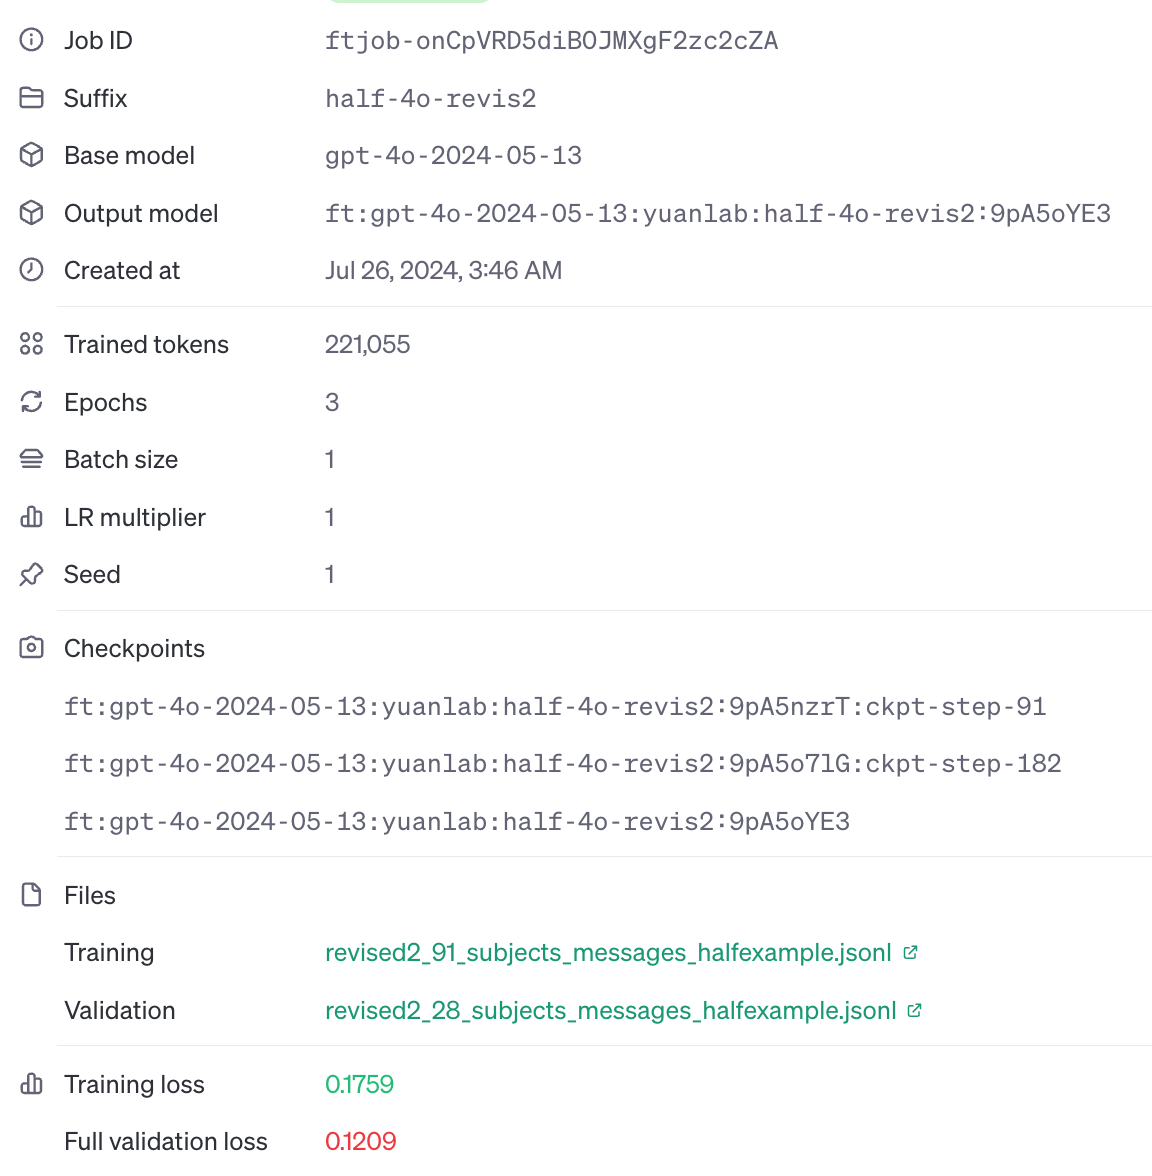

# get fine tuned model responses (temperature = 1 + 1) 50 new agents **half,4o**

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
user_message1_content = f"""Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. Imagine you are this new agent. You should format your output as JSON with the following structure: {{'subjectID': the unique ID of the subject, 'age': the age of the subject, 'gender': the gender of the subject, 'numberSiblings': the number of siblings the subject has,'donation': the donation history of the subject,'strategy': the game strategy(ies) used in the game}}"""
user_message1 = {"role": "user", "content": user_message1_content}

In [ ]:
print(user_message1)

{'role': 'user', 'content': "Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. Imagine you are this new agent. You should format your output as JSON with the following structure: {'subjectID': the unique ID of the subject, 'age': the age of the subject, 'gender': the gender of the subject, 'numberSiblings': the number of siblings the subject has,'donation': the donation history of the subject,'strategy': the game strategy(ies) used in the game}"}


In [ ]:
# changed to halfresponse
data = [
    {'myrole': 2, 'game': 'Dict 1'},
    {'myrole': 2, 'game': 'Dict 2'},
    {'myrole': 1, 'game': 'Resp 13a'},
    {'myrole': 2, 'game': 'Resp 13a'},
    {'myrole': 1, 'game': 'Resp 1a'},
    {'myrole': 2, 'game': 'Resp 1a'},
    {'myrole': 1, 'game': 'Resp 2a'},
    {'myrole': 2, 'game': 'Resp 2a'},
    {'myrole': 1, 'game': 'Resp 3'},
    {'myrole': 2, 'game': 'Resp 3'},
    {'myrole': 1, 'game': 'Resp 4'},
    {'myrole': 2, 'game': 'Resp 4'},
    {'myrole': 1, 'game': 'Resp 5a'},
    {'myrole': 2, 'game': 'Resp 5a'},
    {'myrole': 1, 'game': 'Resp 6'},
    {'myrole': 2, 'game': 'Resp 6'},
    {'myrole': 1, 'game': 'Resp 7'},
    {'myrole': 2, 'game': 'Resp 7'},
    {'myrole': 1, 'game': 'Resp 8'},
    {'myrole': 2, 'game': 'Resp 8'},
    {'myrole': 1, 'game': 'Resp 9'},
    {'myrole': 2, 'game': 'Resp 9'}
]

# Convert the list of dictionaries to a DataFrame
game_combinations_df = pd.DataFrame(data)


In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f""" {get_prompt_ABM(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage



### get_model_responses

In [ ]:
def get_model_responses(sample_df, game_combinations_df):
    completions = []
    responses = []


    # Call the model for the first message
    completion1 = client.chat.completions.create(
        model="ft:gpt-4o-2024-05-13:yuanlab:half-4o-revis2:9pA5oYE3",
        response_format={"type": "json_object"},
        messages=[
            original_system_message,
            user_message1
        ],
        temperature=1
    )
    response1 = completion1.choices[0].message.content

    try:
        # Parse the JSON response content
        response1_json = json.loads(response1)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Response1 content: {response1}")
        return pd.DataFrame()  # Return an empty DataFrame on error

    # Append the initial response to the responses list
    #responses.append({
        #'user_message1': user_message1,
        #'response1': response1
    #})

    # Iterate through the combinations DataFrame
    for i, row in game_combinations_df.iterrows():
        game_type = row['game']
        agent = row['myrole']
        user_message_content = generate_participant_message(sample_df, get_prompt_ABM, game_type, agent)
        user_message2 = {"role": "user", "content": user_message_content}

        # Call the model for the second message
        completion2 = client.chat.completions.create(
            model="ft:gpt-4o-2024-05-13:yuanlab:half-4o-revis2:9pA5oYE3",
            response_format={"type": "json_object"},
            messages=[
                original_system_message,
                user_message1,
                {"role": "assistant", "content": response1},
                user_message2
            ],
            temperature=1. #CHANGED
        )
        response2 = completion2.choices[0].message.content

        try:
            # Extract reason and choice from the response
            response2_json = json.loads(response2)
            #reason = response2_json.get('reason', '')
            choice = response2_json.get('choice', '')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Response2 content: {response2}")
            reason = response2  # Fall back to raw response text for reason
            choice = response2  # Fall back to raw response text for choice

        # Append the responses to the responses list
        responses.append({
            'response1': response1,
            'subjectID': response1_json['subjectID'],
            #'age': response1_json['age'],
            #'gender': response1_json['gender'],
            #'numberofsiblings': response1_json['numberSiblings'],
            #'gamestrategy': response1_json['strategy'],
            'game_prompt': user_message2['content'],
            'game_type': game_type,
            'agent': agent,
            'response2': response2,
            #'reason': reason,
            'choice': choice
        })

    # Convert the responses list to a DataFrame
    responses_df = pd.DataFrame(responses)

    return responses_df


In [ ]:
one_agent_df = get_model_responses(df_control_cleaned, game_combinations_df)
one_agent_df

response1 subjectID  \
0   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
1   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
2   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
3   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
4   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
5   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
6   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
7   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
8   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
9   {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
10  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
11  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
12  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
13  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
14  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
15  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
16  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
17  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
18  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
19  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
20  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   
21  {\n    "subjectID": "003",\n    "age": 24,\n  ...       003   

                                          game_prompt game_type  agent  \
0    In this period, you are person B. You may cho...    Dict 1      2   
1    In this period, you are person B. You may cho...    Dict 2      2   
2    In this period, you are person A. You may cho...  Resp 13a      1   
3    In this period, you are person B. You may cho...  Resp 13a      2   
4    In this period, you are person A. You may cho...   Resp 1a      1   
5    In this period, you are person B. You may cho...   Resp 1a      2   
6    In this period, you are person A. You may cho...   Resp 2a      1   
7    In this period, you are person B. You may cho...   Resp 2a      2   
8    In this period, you are person A. You may cho...    Resp 3      1   
9    In this period, you are person B. You may cho...    Resp 3      2   
10   In this period, you are person A. You may cho...    Resp 4      1   
11   In this period, you are person B. You may cho...    Resp 4      2   
12   In this period, you are person A. You may cho...   Resp 5a      1   
13   In this period, you are person B. You may cho...   Resp 5a      2   
14   In this period, you are person A. You may cho...    Resp 6      1   
15   In this period, you are person B. You may cho...    Resp 6      2   
16   In this period, you are person A. You may cho...    Resp 7      1   
17   In this period, you are person B. You may cho...    Resp 7      2   
18   In this period, you are person A. You may cho...    Resp 8      1   
19   In this period, you are person B. You may cho...    Resp 8      2   
20   In this period, you are person A. You may cho...    Resp 9      1   
21   In this period, you are person B. You may cho...    Resp 9      2   

                                            response2 choice  
0   {\n    "reason": "In this game, my payoff is t...     B2  
1   {\n    "reason": "In this game, my role is B a...     B1  
2   {\n    "reason": "In this game, my choice is A...     A2  
3   {\n    "reason": "In this game, my role is per...     B1  
4   {\n    "reason": "In this game, if I choose A1...     A1  
5   {\n    "reason": "In this game, my decision do...     B2  
6   {\n    "reason": "In this game, my choice is b...     A2  
7   {\n    "reason": "In this game, my choice only...     B1  
8   {\n    "reason": "In this game, my choice is b...     A1  
9   {\n    "reason": "In this game, my role is per...     B1  
10  {\n    "reason": "In this game, my choices are...     A2  
11  {\n    "reason": "In this game, my choi

### get_multiple_agents_responses

In [ ]:
def get_multiple_agents_responses(sample_df, game_combinations_df, num_agents):
    all_responses = []

    for _ in range(num_agents):
        responses_df = get_model_responses(sample_df, game_combinations_df)
        all_responses.append(responses_df)

    # Concatenate all the individual responses DataFrames
    multiagents_responses_df = pd.concat(all_responses, ignore_index=True)

    return multiagents_responses_df

In [ ]:
ft_half_multiagents_responses_df = get_multiple_agents_responses(df_control_cleaned, game_combinations_df, num_agents=50)
ft_half_multiagents_responses_df

response1 subjectID  \
0     {\n    "subjectID": "P001",\n    "age": 28,\n ...      P001   
1     {\n    "subjectID": "P001",\n    "age": 28,\n ...      P001   
2     {\n    "subjectID": "P001",\n    "age": 28,\n ...      P001   
3     {\n    "subjectID": "P001",\n    "age": 28,\n ...      P001   
4     {\n    "subjectID": "P001",\n    "age": 28,\n ...      P001   
...                                                 ...       ...   
1095  {\n    "subjectID": "001_TNE",\n    "age": 28,...   001_TNE   
1096  {\n    "subjectID": "001_TNE",\n    "age": 28,...   001_TNE   
1097  {\n    "subjectID": "001_TNE",\n    "age": 28,...   001_TNE   
1098  {\n    "subjectID": "001_TNE",\n    "age": 28,...   001_TNE   
1099  {\n    "subjectID": "001_TNE",\n    "age": 28,...   001_TNE   

                                            game_prompt game_type  agent  \
0      In this period, you are person B. You may cho...    Dict 1      2   
1      In this period, you are person B. You may cho...    Dict 2      2   
2      In this period, you are person A. You may cho...  Resp 13a      1   
3      In this period, you are person B. You may cho...  Resp 13a      2   
4      In this period, you are person A. You may cho...   Resp 1a      1   
...                                                 ...       ...    ...   
1095   In this period, you are person B. You may cho...    Resp 7      2   
1096   In this period, you are person A. You may cho...    Resp 8      1   
1097   In this period, you are person B. You may cho...    Resp 8      2   
1098   In this period, you are person A. You may cho...    Resp 9      1   
1099   In this period, you are person B. You may cho...    Resp 9      2   

                                              response2 choice  
0     {\n    "reason": "In this game, my choice is b...     B1  
1     {\n    "reason": "In this game, my choice is b...     B1  
2     {\n    "reason": "In this game, if I choose A1...     A1  
3     {\n    "reason": "In this game, my choice only...     B2  
4     {\n    "reason": "In this game, my choice is b...     A1  
...                                                 ...    ...  
1095  {\n    "reason": "In this game, my decision on...     B2  
1096  {\n    "reason": "In this game, as person A, m...     A2  
1097  {\n    "reason": "In this game, my role is per...     B1  
1098  {\n    "reason": "In this game, my choice is b...     A2  
1099  {\n    "reason": "In this game, person A might...     B1  

[1100 rows x 7 columns]

In [ ]:
ft_half_multiagents_responses_df = get_multiple_agents_responses(df_control_cleaned, game_combinations_df, num_agents=50)
ft_half_multiagents_responses_df

response1  \
0     {\n    "subjectID": "participant_001",\n    "a...   
1     {\n    "subjectID": "participant_001",\n    "a...   
2     {\n    "subjectID": "participant_001",\n    "a...   
3     {\n    "subjectID": "participant_001",\n    "a...   
4     {\n    "subjectID": "participant_001",\n    "a...   
...                                                 ...   
1095  {\n    "subjectID": "7563b9e6-95d1-4132-9b23-8...   
1096  {\n    "subjectID": "7563b9e6-95d1-4132-9b23-8...   
1097  {\n    "subjectID": "7563b9e6-95d1-4132-9b23-8...   
1098  {\n    "subjectID": "7563b9e6-95d1-4132-9b23-8...   
1099  {\n    "subjectID": "7563b9e6-95d1-4132-9b23-8...   

                                 subjectID  \
0                          participant_001   
1                          participant_001   
2                          participant_001   
3                          participant_001   
4                          participant_001   
...                                    ...   
1095  7563b9e6-95d1-4132-9b23-896dd8b4ac06   
1096  7563b9e6-95d1-4132-9b23-896dd8b4ac06   
1097  7563b9e6-95d1-4132-9b23-896dd8b4ac06   
1098  7563b9e6-95d1-4132-9b23-896dd8b4ac06   
1099  7563b9e6-95d1-4132-9b23-896dd8b4ac06   

                                            game_prompt game_type  agent  \
0      In this period, you are person B. You may cho...    Dict 1      2   
1      In this period, you are person B. You may cho...    Dict 2      2   
2      In this period, you are person A. You may cho...  Resp 13a      1   
3      In this period, you are person B. You may cho...  Resp 13a      2   
4      In this period, you are person A. You may cho...   Resp 1a      1   
...                                                 ...       ...    ...   
1095   In this period, you are person B. You may cho...    Resp 7      2   
1096   In this period, you are person A. You may cho...    Resp 8      1   
1097   In this period, you are person B. You may cho...    Resp 8      2   
1098   In this period, you are person A. You may cho...    Resp 9      1   
1099   In this period, you are person B. You may cho...    Resp 9      2   

                                              response2 choice  
0     {\n    "reason": "In this game, my choice is b...     B2  
1     {\n    "reason": "In this game, my decision is...     B1  
2     {\n    "reason": "In this game, my decision is...     A1  
3     {\n    "reason": "In this game, my role is per...     B1  
4     {\n    "reason": "In this game, my choice is b...     A1  
...                                                 ...    ...  
1095  {\n    "reason": "In this game, my choice is B...     B2  
1096  {\n    "reason": "In this game, my choice is b...     A2  
1097  {\n    "reason": "In this game, person A made ...     B2  
1098  {\n    "reason": "In this game, my choice as p...     A2  
1099  {\n    "reason": "In this game, my choice is B...     B1  

[1100 rows x 7 columns]

In [ ]:
ft_half_multiagents_responses_df.to_csv('/content/drive/My Drive/social preference/ft_half_multiagents50_responses_df.csv')

In [ ]:
ft_half_multiagents_responses_df = pd.read_csv('/content/drive/My Drive/social preference/ft_half_multiagents50_responses_df.csv')
ft_half_multiagents_responses_df

Unnamed: 0                                          response1  \
0              0  {"subjectID":"08d1c562-3fbc-49fc-b2f9-425c7da5...   
1              1  {"subjectID":"08d1c562-3fbc-49fc-b2f9-425c7da5...   
2              2  {"subjectID":"08d1c562-3fbc-49fc-b2f9-425c7da5...   
3              3  {"subjectID":"08d1c562-3fbc-49fc-b2f9-425c7da5...   
4              4  {"subjectID":"08d1c562-3fbc-49fc-b2f9-425c7da5...   
...          ...                                                ...   
1095        1095  {"subjectID":"050326P3-9","age":26,"gender":"F...   
1096        1096  {"subjectID":"050326P3-9","age":26,"gender":"F...   
1097        1097  {"subjectID":"050326P3-9","age":26,"gender":"F...   
1098        1098  {"subjectID":"050326P3-9","age":26,"gender":"F...   
1099        1099  {"subjectID":"050326P3-9","age":26,"gender":"F...   

                                 subjectID  \
0     08d1c562-3fbc-49fc-b2f9-425c7da58e61   
1     08d1c562-3fbc-49fc-b2f9-425c7da58e61   
2     08d1c562-3fbc-49fc-b2f9-425c7da58e61   
3     08d1c562-3fbc-49fc-b2f9-425c7da58e61   
4     08d1c562-3fbc-49fc-b2f9-425c7da58e61   
...                                    ...   
1095                            050326P3-9   
1096                            050326P3-9   
1097                            050326P3-9   
1098                            050326P3-9   
1099                            050326P3-9   

                                            game_prompt game_type  agent  \
0      In this period, you are person B. You may cho...    Dict 1      2   
1      In this period, you are person B. You may cho...    Dict 2      2   
2      In this period, you are person A. You may cho...  Resp 13a      1   
3      In this period, you are person B. You may cho...  Resp 13a      2   
4      In this period, you are person A. You may cho...   Resp 1a      1   
...                                                 ...       ...    ...   
1095   In this period, you are person B. You may cho...    Resp 7      2   
1096   In this period, you are person A. You may cho...    Resp 8      1   
1097   In this period, you are person B. You may cho...    Resp 8      2   
1098   In this period, you are person A. You may cho...    Resp 9      1   
1099   In this period, you are person B. You may cho...    Resp 9      2   

                                              response2 choice  
0     {"reason":"In this game, my goal was to earn a...     B1  
1     {"reason":"In this game, my choice is B2, and ...     B1  
2     {"reason":"In this game, my choice is A1, and ...     A1  
3     {"reason":"In this game, my objective is to ch...     B1  
4     {"reason":"In this game, my payoff does not de...     A2  
...                                                 ...    ...  
1095  {"reason":"In this game, my goal was to choose...     B1  
1096  {"reason":"In this game, my choice is A1, and ...     A1  
1097  {"reason":"In this game, my payoff is maximize...     B2  
1098  {"reason":"In this game, my payoff is higher i...     A1  
1099  {"reason":"In this game, my goal was to help m...     B1  

[1100 rows x 8 columns]

### visualized choice

In [ ]:
import pandas as pd


# Group the data by game_type and agent, then calculate the counts and percentages of each choice within each group
grouped = ft_half_multiagents_responses_df.groupby(['game_type', 'agent', 'choice']).size().reset_index(name='counts')
total_counts = grouped.groupby(['game_type', 'agent'])['counts'].transform('sum')
grouped['percentage'] = grouped['counts'] / total_counts

# Pivot the data for easier manipulation
pivot_df = grouped.pivot_table(index=['game_type', 'agent'], columns='choice', values='percentage', fill_value=pd.NA)
pivot_df.columns = [f"{col}_percent" for col in pivot_df.columns]

# Merge the counts back to the pivot_df to get the number_of_new_participants
counts_df = grouped.groupby(['game_type', 'agent'])['counts'].sum().reset_index(name='number_of_new_participants')
final_df = pd.merge(counts_df, pivot_df.reset_index(), on=['game_type', 'agent'])

# Reorder columns to match the example
final_df_ft50_half = final_df[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]

# Display the final DataFrame
final_df_ft50_half

game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.02        0.98   
1     Dict 2      2                          50        0.66        0.34   
2   Resp 13a      1                          50         NaN         NaN   
3   Resp 13a      2                          50        0.86        0.14   
4    Resp 1a      1                          50         NaN         NaN   
5    Resp 1a      2                          50        0.36        0.62   
6    Resp 2a      1                          50         NaN         NaN   
7    Resp 2a      2                          50        0.78        0.22   
8     Resp 3      1                          50         NaN         NaN   
9     Resp 3      2                          50        0.72        0.28   
10    Resp 4      1                          50         NaN         NaN   
11    Resp 4      2                          50        0.62        0.38   
12   Resp 5a      1                          50         NaN         NaN   
13   Resp 5a      2                          50        0.52        0.48   
14    Resp 6      1                          50         NaN         NaN   
15    Resp 6      2                          50        0.26        0.74   
16    Resp 7      1                          50         NaN         NaN   
17    Resp 7      2                          50        0.26        0.72   
18    Resp 8      1                          50         NaN         NaN   
19    Resp 8      2                          50        0.72        0.28   
20    Resp 9      1                          50         NaN         NaN   
21    Resp 9      2                          50        0.88        0.12   

    A1_percent  A2_percent  
0          NaN         NaN  
1          NaN         NaN  
2         0.88        0.10  
3          NaN         NaN  
4         0.34        0.66  
5          NaN         NaN  
6         0.44        0.56  
7          NaN         NaN  
8         0.68        0.32  
9          NaN         NaN  
10        0.50        0.50  
11         NaN         NaN  
12        0.58        0.42  
13         NaN         NaN  
14        0.54        0.46  
15         NaN         NaN  
16        0.82        0.18  
17         NaN         NaN  
18        0.26        0.74  
19         NaN         NaN  
20        0.28        0.72  
21         NaN         NaN

In [ ]:
final_df_ft50_half.to_csv('/content/drive/My Drive/social preference/final_df_4oft50_half.csv', index=False)

In [ ]:
# Convert percentage columns to counts for the final dataset
final_df_ft50_half['B1_count'] = (final_df_ft50_half['B1_percent'] * final_df_ft50_half['number_of_new_participants']).round().astype(int)
final_df_ft50_half['B2_count'] = (final_df_ft50_half['B2_percent'] * final_df_ft50_half['number_of_new_participants']).round().astype(int)
final_df_ft50_half['A1_count'] = (final_df_ft50_half['A1_percent'] * final_df_ft50_half['number_of_new_participants']).round().astype(int)
final_df_ft50_half['A2_count'] = (final_df_ft50_half['A2_percent'] * final_df_ft50_half['number_of_new_participants']).round().astype(int)

ft50_half_count_df = final_df_ft50_half[['game_type', 'agent', 'number_of_new_participants', 'B1_count', 'B2_count', 'A1_count', 'A2_count']].copy()
ft50_half_count_df.loc[ft50_half_count_df['agent'] == 1, ['B1_count', 'B2_count']] = np.nan
ft50_half_count_df.loc[ft50_half_count_df['agent'] == 2, ['A1_count', 'A2_count']] = np.nan
ft50_half_count_df

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<ipython-input-41-4d7e72d34ca0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_ft50_half.fillna(0, inplace=True)


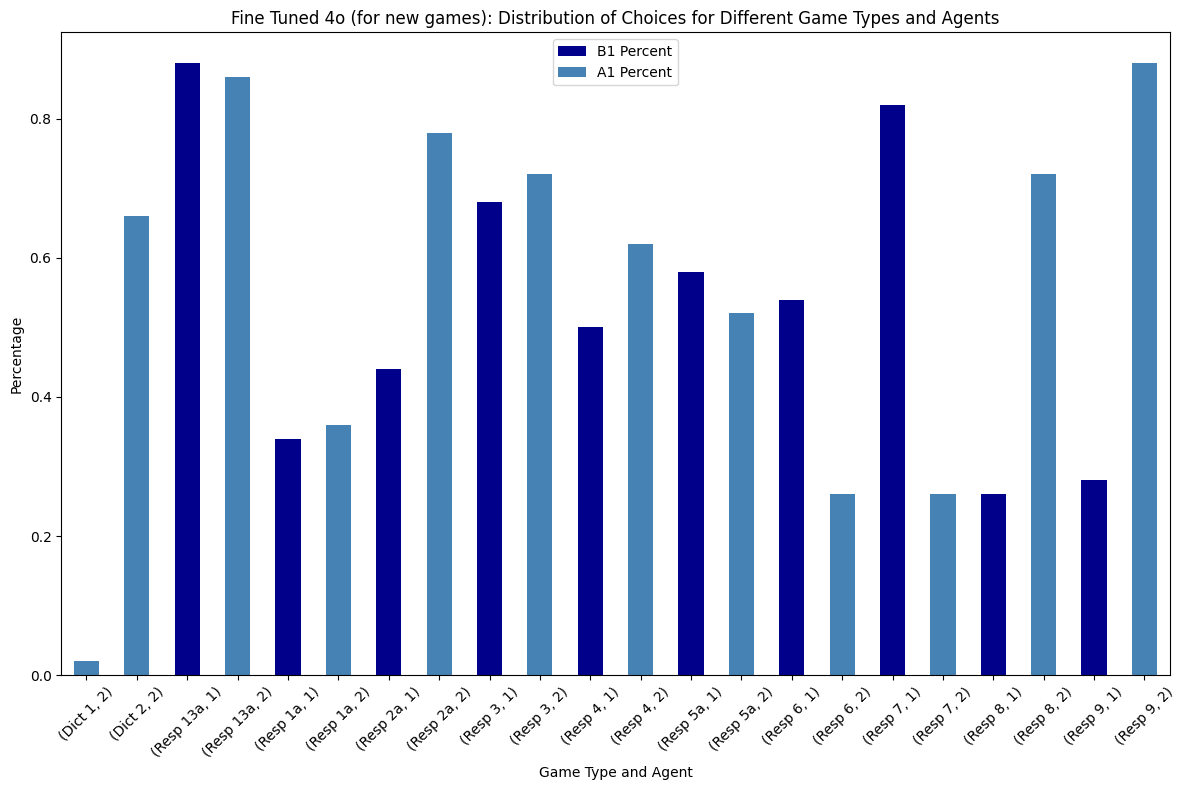

In [ ]:

# Filling NaN with 0 for visualization
final_df_ft50_half.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_ft50_half.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Fine Tuned 4o (for new games): Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Original data**

In [ ]:
df_control_cleaned_halfresponse = pd.read_csv('/content/drive/My Drive/social preference/df_control_cleaned_halfresponse.csv')

In [ ]:
df_control_cleaned_halfresponse

Unnamed: 0 treatment      date  stage  subject  picturechoice1  \
0             0   control  050316PQ      3        1             NaN   
1             1   control  050316PQ      3        4             NaN   
2             2   control  050316PQ      3       10             NaN   
3             3   control  050316PQ      3       11             NaN   
4             4   control  050316PQ      3       13             NaN   
..          ...       ...       ...    ...      ...             ...   
486         906   control  050801NP      3       12             NaN   
487         907   control  050801NP      3       13             NaN   
488         908   control  050801NP      3       14             NaN   
489         909   control  050801NP      3       15             NaN   
490         910   control  050801NP      3       16             NaN   

     picturechoice2  picturechoice3  picturechoice4  picturechoice5  ...  \
0               NaN             NaN             NaN             NaN  ...   
1               NaN             NaN             NaN             NaN  ...   
2               NaN             NaN             NaN             NaN  ...   
3               NaN             NaN             NaN             NaN  ...   
4               NaN             NaN             NaN             NaN  ...   
..              ...             ...             ...             ...  ...   
486             NaN             NaN             NaN             NaN  ...   
487             NaN             NaN             NaN             NaN  ...   
488             NaN             NaN             NaN             NaN  ...   
489             NaN             NaN             NaN             NaN  ...   
490             NaN             NaN             NaN             NaN  ...   

     payoffB_Aout  payoffA_Bact1  payoffB_Bact1  payoffA_Bact2  payoffB_Bact2  \
0             NaN          400.0          400.0          750.0          400.0   
1             NaN          400.0          400.0          750.0          400.0   
2             NaN          400.0          400.0          750.0          400.0   
3             NaN          400.0          400.0          750.0          400.0   
4             NaN          400.0          400.0          750.0          400.0   
..            ...            ...            ...            ...            ...   
486         750.0          800.0          200.0            0.0            0.0   
487         750.0          800.0          200.0            0.0            0.0   
488         750.0          800.0          200.0            0.0            0.0   
489         750.0          800.0          200.0            0.0            0.0   
490         750.0          800.0          200.0            0.0            0.0   

     paintingawards  stage2_payoff  myrole(A/B)  choice    subjectID  
0               NaN            NaN            B      B1   050316PQ-1  
1               NaN            NaN            B      B2   050316PQ-4  
2               NaN            NaN            B      B2  050316PQ-10  
3               NaN            NaN            B      B2  050316PQ-11  
4               NaN            NaN            B      B1  050316PQ-13  
..              ...            ...          ...     ...          ...  
486             NaN            NaN            B      B1  050801NP-12  
487             NaN            NaN            B      B1  050801NP-13  
488             NaN            NaN            B      B1  050801NP-14  
489             NaN            NaN            A      A1  050801NP-15  
490             NaN            NaN            A      A2  050801NP-16  

[491 rows x 62 columns]

In [ ]:
# Step 1: Group by 'game' and 'myrole'
grouped = df_control_cleaned_halfresponse.groupby(['game', 'myrole'])['choice'].value_counts(normalize=True).unstack(fill_value=0).reset_index()

# Step 2: Calculate the number of participants per group
grouped['number_of_new_participants'] = df_control_cleaned_halfresponse.groupby(['game', 'myrole']).size().values

# Step 3: Rename the columns to follow the required naming convention
grouped.columns = ['game_type', 'agent', 'A1_percent', 'A2_percent', 'B1_percent', 'B2_percent', 'number_of_new_participants']

# Step 4: Reorder columns to match the desired output
origdata_df_half = grouped[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]



In [ ]:
origdata_df_half

game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          21    0.333333    0.666667   
1     Dict 2      2                          22    0.818182    0.181818   
2   Resp 13a      1                          23    0.000000    0.000000   
3   Resp 13a      2                          23    0.913043    0.086957   
4    Resp 1a      1                          21    0.000000    0.000000   
5    Resp 1a      2                          22    0.318182    0.681818   
6    Resp 2a      1                          22    0.000000    0.000000   
7    Resp 2a      2                          22    0.727273    0.272727   
8     Resp 3      1                          22    0.000000    0.000000   
9     Resp 3      2                          22    0.545455    0.454545   
10    Resp 4      1                          22    0.000000    0.000000   
11    Resp 4      2                          22    0.227273    0.772727   
12   Resp 5a      1                          21    0.000000    0.000000   
13   Resp 5a      2                          22    0.454545    0.545455   
14    Resp 6      1                          23    0.000000    0.000000   
15    Resp 6      2                          23    0.347826    0.652174   
16    Resp 7      1                          23    0.000000    0.000000   
17    Resp 7      2                          23    0.130435    0.869565   
18    Resp 8      1                          23    0.000000    0.000000   
19    Resp 8      2                          23    0.826087    0.173913   
20    Resp 9      1                          23    0.000000    0.000000   
21    Resp 9      2                          23    0.869565    0.130435   

    A1_percent  A2_percent  
0     0.000000    0.000000  
1     0.000000    0.000000  
2     0.826087    0.173913  
3     0.000000    0.000000  
4     0.285714    0.714286  
5     0.000000    0.000000  
6     0.590909    0.409091  
7     0.000000    0.000000  
8     0.818182    0.181818  
9     0.000000    0.000000  
10    0.545455    0.454545  
11    0.000000    0.000000  
12    0.809524    0.190476  
13    0.000000    0.000000  
14    0.304348    0.695652  
15    0.000000    0.000000  
16    0.826087    0.173913  
17    0.000000    0.000000  
18    0.739130    0.260870  
19    0.000000    0.000000  
20    0.739130    0.260870  
21    0.000000    0.000000

In [ ]:
origdata_df_half.to_csv('/content/drive/My Drive/social preference/origdata_df_half.csv')

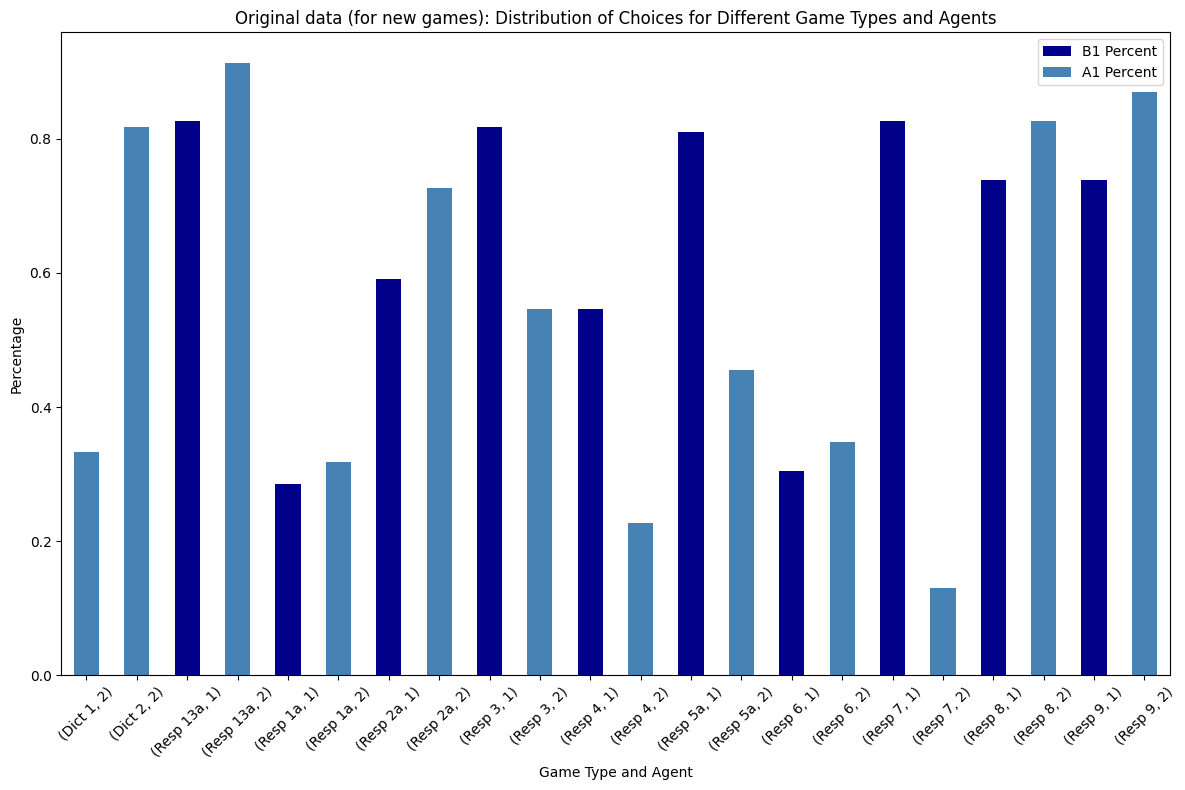

In [ ]:
# Filling NaN with 0 for visualization
origdata_df_half.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
origdata_df_half.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Original data (for new games): Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Baseline**

## temperature = 1

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
# changed to halfresponse
data = [
    {'myrole': 2, 'game': 'Dict 1'},
    {'myrole': 2, 'game': 'Dict 2'},
    {'myrole': 1, 'game': 'Resp 13a'},
    {'myrole': 2, 'game': 'Resp 13a'},
    {'myrole': 1, 'game': 'Resp 1a'},
    {'myrole': 2, 'game': 'Resp 1a'},
    {'myrole': 1, 'game': 'Resp 2a'},
    {'myrole': 2, 'game': 'Resp 2a'},
    {'myrole': 1, 'game': 'Resp 3'},
    {'myrole': 2, 'game': 'Resp 3'},
    {'myrole': 1, 'game': 'Resp 4'},
    {'myrole': 2, 'game': 'Resp 4'},
    {'myrole': 1, 'game': 'Resp 5a'},
    {'myrole': 2, 'game': 'Resp 5a'},
    {'myrole': 1, 'game': 'Resp 6'},
    {'myrole': 2, 'game': 'Resp 6'},
    {'myrole': 1, 'game': 'Resp 7'},
    {'myrole': 2, 'game': 'Resp 7'},
    {'myrole': 1, 'game': 'Resp 8'},
    {'myrole': 2, 'game': 'Resp 8'},
    {'myrole': 1, 'game': 'Resp 9'},
    {'myrole': 2, 'game': 'Resp 9'}
]

# Convert the list of dictionaries to a DataFrame
game_combinations_df = pd.DataFrame(data)


In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f"""{get_prompt(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage


## get_basemodel_responses

In [ ]:
def get_basemodel_responses(sample_df, game_combinations_df):
    completions = []
    responses = []

    # Iterate through the combinations DataFrame
    for i, row in game_combinations_df.iterrows():
        game_type = row['game']
        agent = row['myrole']
        user_message_content = generate_participant_message(sample_df, get_prompt, game_type, agent)
        user_message2 = {"role": "user", "content": user_message_content}

        # Call the model for the second message
        completion2 = client.chat.completions.create(
            model="gpt-4o",
            response_format={"type": "json_object"},
            messages=[
                original_system_message,
                user_message2
            ],
            temperature=1
        )
        response2 = completion2.choices[0].message.content

        try:
            # Extract reason and choice from the response
            response2_json = json.loads(response2)
            reason = response2_json.get('reason', '')
            choice = response2_json.get('choice', '')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Response2 content: {response2}")
            reason = response2  # Fall back to raw response text
            choice = response2

        # Append the responses to the responses list
        responses.append({
            'completationinfo': completion2,
            'game_type': game_type,
            'agent': agent,
            'response2': response2,
            'reason': reason,
            'choice': choice
        })

    # Convert the responses list to a DataFrame
    responses_df = pd.DataFrame(responses)

    return responses_df


In [ ]:
game_combinations_df

myrole      game
0        2    Dict 1
1        2    Dict 2
2        1  Resp 13a
3        2  Resp 13a
4        1   Resp 1a
5        2   Resp 1a
6        1   Resp 2a
7        2   Resp 2a
8        1    Resp 3
9        2    Resp 3
10       1    Resp 4
11       2    Resp 4
12       1   Resp 5a
13       2   Resp 5a
14       1    Resp 6
15       2    Resp 6
16       1    Resp 7
17       2    Resp 7
18       1    Resp 8
19       2    Resp 8
20       1    Resp 9
21       2    Resp 9

In [ ]:
one_agent_df_base_half = get_basemodel_responses(df_control_cleaned, game_combinations_df)
one_agent_df_base_half

game_type: Dict 1, agent: 2
game_type: Dict 2, agent: 2
game_type: Resp 13a, agent: 1
game_type: Resp 13a, agent: 2
game_type: Resp 1a, agent: 1
game_type: Resp 1a, agent: 2
game_type: Resp 2a, agent: 1
game_type: Resp 2a, agent: 2
game_type: Resp 3, agent: 1
game_type: Resp 3, agent: 2
game_type: Resp 4, agent: 1
game_type: Resp 4, agent: 2
game_type: Resp 5a, agent: 1
game_type: Resp 5a, agent: 2
game_type: Resp 6, agent: 1
game_type: Resp 6, agent: 2
game_type: Resp 7, agent: 1
game_type: Resp 7, agent: 2
game_type: Resp 8, agent: 1
game_type: Resp 8, agent: 2
game_type: Resp 9, agent: 1
game_type: Resp 9, agent: 2


completationinfo game_type  agent  \
0   ChatCompletion(id='chatcmpl-9pJrZFzCixaZ5u65aX...    Dict 1      2   
1   ChatCompletion(id='chatcmpl-9pJrcYHQTXRwEasYSP...    Dict 2      2   
2   ChatCompletion(id='chatcmpl-9pJrg61yQfKd9APNAq...  Resp 13a      1   
3   ChatCompletion(id='chatcmpl-9pJrl0VveT6PCEnV8e...  Resp 13a      2   
4   ChatCompletion(id='chatcmpl-9pJroPzjAYxM0jCMLv...   Resp 1a      1   
5   ChatCompletion(id='chatcmpl-9pJruGgdknmg4mWa92...   Resp 1a      2   
6   ChatCompletion(id='chatcmpl-9pJrxAHl48pwCuE4Y6...   Resp 2a      1   
7   ChatCompletion(id='chatcmpl-9pJs1Md2UErnucz0mD...   Resp 2a      2   
8   ChatCompletion(id='chatcmpl-9pJs54iKdbN0ibwVPz...    Resp 3      1   
9   ChatCompletion(id='chatcmpl-9pJs9URzEdjYCyKWop...    Resp 3      2   
10  ChatCompletion(id='chatcmpl-9pJsCRoJ3Kp8fVcfHy...    Resp 4      1   
11  ChatCompletion(id='chatcmpl-9pJsGRjTauzeD1LQFG...    Resp 4      2   
12  ChatCompletion(id='chatcmpl-9pJsJhHQQgJjIp91hD...   Resp 5a      1   
13  ChatCompletion(id='chatcmpl-9pJsNqyDUldv9RnOJn...   Resp 5a      2   
14  ChatCompletion(id='chatcmpl-9pJsRmSIEfhB6KsQvS...    Resp 6      1   
15  ChatCompletion(id='chatcmpl-9pJsUdKSgrRsbk6It8...    Resp 6      2   
16  ChatCompletion(id='chatcmpl-9pJsX2cib9UWJXXGHM...    Resp 7      1   
17  ChatCompletion(id='chatcmpl-9pJscfw10JIVpWurZb...    Resp 7      2   
18  ChatCompletion(id='chatcmpl-9pJsf77kG7bNVSv0ka...    Resp 8      1   
19  ChatCompletion(id='chatcmpl-9pJsjXJq8E4wMTUbQP...    Resp 8      2   
20  ChatCompletion(id='chatcmpl-9pJsm8ymMyqqC2vM6H...    Resp 9      1   
21  ChatCompletion(id='chatcmpl-9pJsqm6wT0pGQ1NAdc...    Resp 9      2   

                                            response2  \
0   {\n  "reason": "In this game, my decision as p...   
1   {\n  "reason": "In this game, I am person B, a...   
2   {\n    "reason": "I need to weigh the guarante...   
3   {\n    "reason": "Since person A has already m...   
4   {\n  "reason": "As person A, I have two choice...   
5   {\n    "reason": "In this scenario, if person ...   
6   {\n  "reason": "As person A, I need to decide ...   
7   {\n    "reason": "Since Person A has already m...   
8   {\n    "reason": "As Person A, I need to weigh...   
9   {\n  "reason": "Given that I am person B and p...   
10  {\n  "reason": "I am person A and have to choo...   
11  {\n  "reason": "Person A's choice affects my o...   
12  {\n    "reason": "As person A, I have two choi...   
13  {\n  "reason": "Given the structure of the gam...   
14  {\n  "reason": "If I choose A1, I will receive...   
15  {\n    "reason": "First, I analyze the possibl...   
16  {\n  "reason": "Since Person B makes their dec...   
17  {\n  "reason": "First, we consider the outcome...   
18  {\n  "reason": "As person A, I need to decide ...   
19  {\n    "reason": "First, observe that person A...   
20  {\n    "reason": "If I choose A1, I will secur...   
21  {\n "reason": "I should assume that person A h...   

                                               reason choice  
0   In this game, my decision as person B does not...     B2  
1   In this game, I am person B, and I have two ch...     B1  
2   I need to weigh the guaranteed payoff against ...     A1  
3   Since person A has already made their choice, ...     B1  
4   As person A, I have two choices: A1, which gua...     A2  
5   In this scenario, if person A has chosen A2, m...     B2  
6   As person A, I need to decide between A1 and A...     A1  
7   Since Person A has already made a choice, I ne...     B1  
8   As Person A, I need to weigh my options betwee...     A2  
9   Given that I am person B and person A has alre...     B1  
10  I am person A and have to choose between A1 an...     A1  
11  Person A's choice affects my outcome only if t...     B1  
12  As person A, I have two choices: A1 or A2. If ...     A2  
13  Given the structure of the game, if person A h...     B2  
14  If I choose A1, I will receive 100, and person...     A2  
15  First, I a

## get_multiple_agents_responses

In [ ]:
def get_multiple_agents_responses_baseline(sample_df, game_combinations_df, num_agents):
    all_responses = []

    for _ in range(num_agents):
        responses_df = get_basemodel_responses(sample_df, game_combinations_df)
        all_responses.append(responses_df)

    # Concatenate all the individual responses DataFrames
    baseline_multiagents_responses_df = pd.concat(all_responses, ignore_index=True)

    return baseline_multiagents_responses_df

In [ ]:
baseline_half_multiagents_responses_df = get_multiple_agents_responses_baseline(df_control_cleaned, game_combinations_df, num_agents=50)
baseline_half_multiagents_responses_df

game_type: Dict 1, agent: 2
game_type: Dict 2, agent: 2
game_type: Resp 13a, agent: 1
game_type: Resp 13a, agent: 2
game_type: Resp 1a, agent: 1
game_type: Resp 1a, agent: 2
game_type: Resp 2a, agent: 1
game_type: Resp 2a, agent: 2
game_type: Resp 3, agent: 1
game_type: Resp 3, agent: 2
game_type: Resp 4, agent: 1
game_type: Resp 4, agent: 2
game_type: Resp 5a, agent: 1
game_type: Resp 5a, agent: 2
game_type: Resp 6, agent: 1
game_type: Resp 6, agent: 2
game_type: Resp 7, agent: 1
game_type: Resp 7, agent: 2
game_type: Resp 8, agent: 1
game_type: Resp 8, agent: 2
game_type: Resp 9, agent: 1
game_type: Resp 9, agent: 2
game_type: Dict 1, agent: 2
game_type: Dict 2, agent: 2
game_type: Resp 13a, agent: 1
game_type: Resp 13a, agent: 2
game_type: Resp 1a, agent: 1
game_type: Resp 1a, agent: 2
game_type: Resp 2a, agent: 1
game_type: Resp 2a, agent: 2
game_type: Resp 3, agent: 1
game_type: Resp 3, agent: 2
game_type: Resp 4, agent: 1
game_type: Resp 4, agent: 2
game_type: Resp 5a, agent: 1
g

completationinfo game_type  agent  \
0     ChatCompletion(id='chatcmpl-9pJvDz45w5vwLRuwUZ...    Dict 1      2   
1     ChatCompletion(id='chatcmpl-9pJvGYYkpYoUfxtA2Y...    Dict 2      2   
2     ChatCompletion(id='chatcmpl-9pJvJxaD63ZYIrlS8W...  Resp 13a      1   
3     ChatCompletion(id='chatcmpl-9pJvNLUJSHlhcShI1o...  Resp 13a      2   
4     ChatCompletion(id='chatcmpl-9pJvQdHzgJmRTv8q4o...   Resp 1a      1   
...                                                 ...       ...    ...   
1095  ChatCompletion(id='chatcmpl-9pL6vLO744fsYDgmem...    Resp 7      2   
1096  ChatCompletion(id='chatcmpl-9pL6y6aeIJ3CUX9D6V...    Resp 8      1   
1097  ChatCompletion(id='chatcmpl-9pL72k6DHKlWZ4PbrS...    Resp 8      2   
1098  ChatCompletion(id='chatcmpl-9pL75EbVf33bDMl7bg...    Resp 9      1   
1099  ChatCompletion(id='chatcmpl-9pL7DKkK4wFln57lDN...    Resp 9      2   

                                              response2  \
0     {\n  "reason": "In this period, as person B, I...   
1     {\n    "reason": "I need to make a decision be...   
2     {\n  "reason": "In this decision task, I am fa...   
3     {\n  "reason": "Given the conditions, we need ...   
4     {\n  "reason": "As Person A, I need to choose ...   
...                                                 ...   
1095  {"reason": "Since person A has already made a ...   
1096  {"reason": "As person A, I have two choices: A...   
1097  {\n  "reason": "Given that my decision only af...   
1098  {\n  "reason": "In this decision task, I have ...   
1099  {\n  "reason": "Since my decision only affects...   

                                                 reason choice  
0     In this period, as person B, I am presented wi...     B2  
1     I need to make a decision between two options,...     B1  
2     In this decision task, I am faced with two opt...     A1  
3     Given the conditions, we need to consider the ...     B1  
4     As Person A, I need to choose between A1 and A...     A2  
...                                                 ...    ...  
1095  Since person A has already made a decision and...     B2  
1096  As person A, I have two choices: A1 or A2. If ...     A2  
1097  Given that my decision only affects the outcom...     B1  
1098  In this decision task, I have two choices: A1 ...     A2  
1099  Since my decision only affects the outcome if ...     B1  

[1100 rows x 6 columns]

In [ ]:
baseline_half_multiagents_responses_df.to_csv('/content/drive/My Drive/social preference/baseline4o_half_multiagents50_responses_df.csv')

In [ ]:
baseline_half_multiagents_responses_df = pd.read_csv('/content/drive/My Drive/social preference/baseline4o_half_multiagents50_responses_df.csv')

In [ ]:
baseline_half_multiagents_responses_df

Unnamed: 0                                   completationinfo game_type  \
0              0  ChatCompletion(id='chatcmpl-9kH5DHNh9tnkQDOfcq...    Dict 1   
1              1  ChatCompletion(id='chatcmpl-9kH5GOxizFTNpXqR1Z...    Dict 2   
2              2  ChatCompletion(id='chatcmpl-9kH5JosBtYpmQxoYmK...    Dict 3   
3              3  ChatCompletion(id='chatcmpl-9kH5LqYXFrK0mqp8Wp...    Dict 4   
4              4  ChatCompletion(id='chatcmpl-9kH5ONgizstCJGz62S...    Dict 5   
...          ...                                                ...       ...   
2145        2145  ChatCompletion(id='chatcmpl-9kIhjExQcRJNz1Xfzq...    Resp 8   
2146        2146  ChatCompletion(id='chatcmpl-9kIhl4A97z74K2VrJt...    Resp 9   
2147        2147  ChatCompletion(id='chatcmpl-9kIhoQ0lRotDJo5PKH...    Resp 9   
2148        2148  ChatCompletion(id='chatcmpl-9kIhqB0RLdffyASwHI...   Resp 11   
2149        2149  ChatCompletion(id='chatcmpl-9kIhtahgegnM4cJH56...   Resp 11   

      agent                                          response2  \
0         2  {\n    "reason": "In this game, person A has n...   
1         2  {\n  "reason": "In this game, I have two optio...   
2         2  {\n    "reason": "In making my decision, I nee...   
3         2  {"reason": "In this decision task, I am person...   
4         2  {"reason": "In this game, I have two choices: ...   
...     ...                                                ...   
2145      2  {\n  "reason": "Person A has two possible choi...   
2146      1  {\n  "reason": "I have a choice to make betwee...   
2147      2  {\n  "reason": "Since Person A's decision (A1 ...   
2148      1  {\n  "reason": "If I choose A1, I guarantee my...   
2149      2  {\n  "reason": "As person B, my decision only ...   

                                                 reason choice  
0     In this game, person A has no direct influence...     B2  
1     In this game, I have two options as person B. ...     B2  
2     In making my decision, I need to weigh the out...     B2  
3     In this decision task, I am person B, and I ha...     B2  
4     In this game, I have two choices: B1 and B2. I...     B2  
...                                                 ...    ...  
2145  Person A has two possible choices: A1 or A2. I...     B1  
2146  I have a choice to make between A1 and A2. If ...     A2  
2147  Since Person A's decision (A1 or A2) determine...     B1  
2148  If I choose A1, I guarantee myself a payoff of...     A1  
2149  As person B, my decision only affects outcomes...     B1  

[2150 rows x 7 columns]

## visualized choice

In [ ]:
import pandas as pd


# Group the data by game_type and agent, then calculate the counts and percentages of each choice within each group
grouped = baseline_half_multiagents_responses_df.groupby(['game_type', 'agent', 'choice']).size().reset_index(name='counts')
total_counts = grouped.groupby(['game_type', 'agent'])['counts'].transform('sum')
grouped['percentage'] = grouped['counts'] / total_counts

# Pivot the data for easier manipulation
pivot_df = grouped.pivot_table(index=['game_type', 'agent'], columns='choice', values='percentage', fill_value=0)
pivot_df.columns = [f"{col}_percent" for col in pivot_df.columns]

# Merge the counts back to the pivot_df to get the number_of_new_participants
counts_df = grouped.groupby(['game_type', 'agent'])['counts'].sum().reset_index(name='number_of_new_participants')
final_df = pd.merge(counts_df, pivot_df.reset_index(), on=['game_type', 'agent'])

# Reorder columns to match the example
final_df_baseline50_half = final_df[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]

# Display the final DataFrame
final_df_baseline50_half


game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.00        1.00   
1     Dict 2      2                          50        0.56        0.44   
2   Resp 13a      1                          50        0.00        0.00   
3   Resp 13a      2                          50        1.00        0.00   
4    Resp 1a      1                          50        0.00        0.00   
5    Resp 1a      2                          50        0.30        0.70   
6    Resp 2a      1                          50        0.00        0.00   
7    Resp 2a      2                          50        0.98        0.02   
8     Resp 3      1                          50        0.00        0.00   
9     Resp 3      2                          50        0.96        0.04   
10    Resp 4      1                          50        0.00        0.00   
11    Resp 4      2                          50        0.92        0.08   
12   Resp 5a      1                          50        0.00        0.00   
13   Resp 5a      2                          50        0.70        0.30   
14    Resp 6      1                          50        0.00        0.00   
15    Resp 6      2                          50        0.00        1.00   
16    Resp 7      1                          50        0.00        0.00   
17    Resp 7      2                          50        0.00        1.00   
18    Resp 8      1                          50        0.00        0.00   
19    Resp 8      2                          50        0.98        0.02   
20    Resp 9      1                          50        0.00        0.00   
21    Resp 9      2                          50        1.00        0.00   

    A1_percent  A2_percent  
0         0.00        0.00  
1         0.00        0.00  
2         1.00        0.00  
3         0.00        0.00  
4         0.20        0.80  
5         0.00        0.00  
6         0.12        0.88  
7         0.00        0.00  
8         0.42        0.58  
9         0.00        0.00  
10        0.60        0.40  
11        0.00        0.00  
12        0.56        0.44  
13        0.00        0.00  
14        0.22        0.78  
15        0.00        0.00  
16        0.94        0.06  
17        0.00        0.00  
18        0.14        0.86  
19        0.00        0.00  
20        0.18        0.82  
21        0.00        0.00

In [ ]:
final_df_baseline50_half.to_csv('/content/drive/My Drive/social preference/final_df_4obaseline50_half.csv')

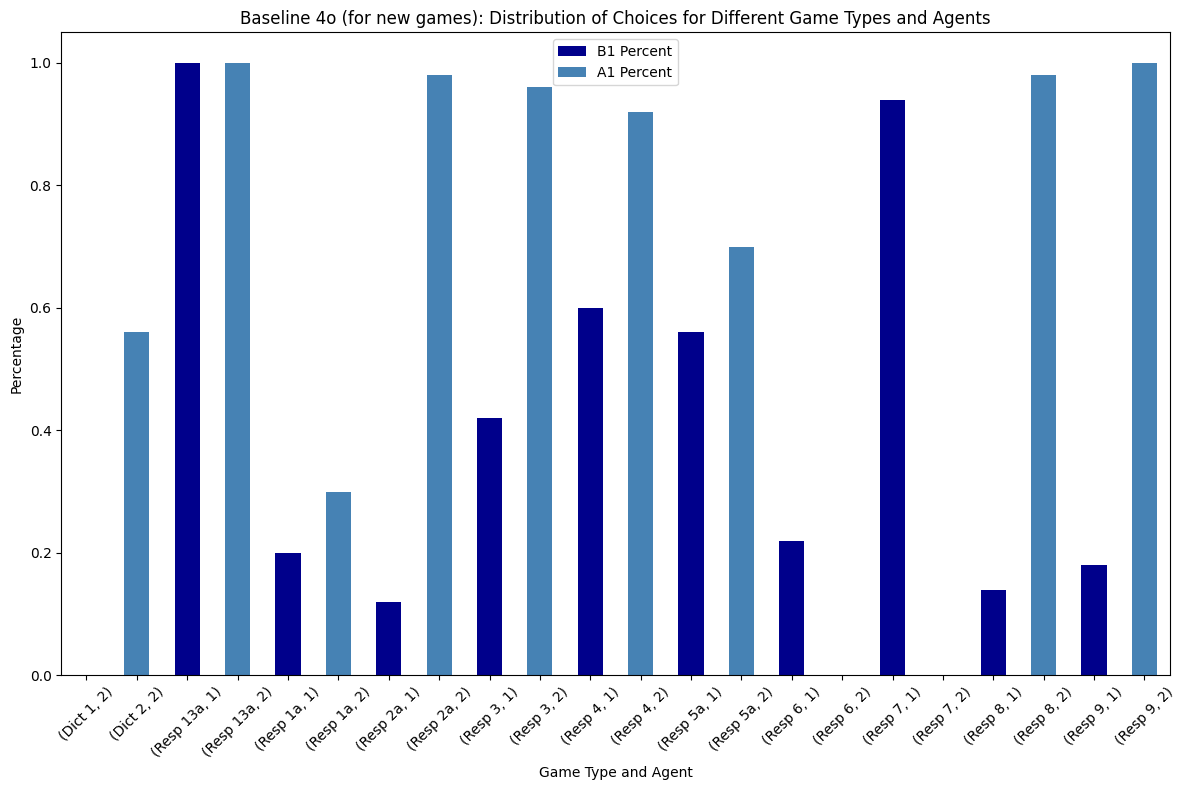

In [ ]:
# Filling NaN with 0 for visualization
final_df_baseline50_half.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_baseline50_half.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Baseline 4o (for new games): Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prompted

In [ ]:
# System message
original_system_message = {"role": "system","content": "You are playing a lab experiment. You will make decisions in different games. Each decision and outcome is independent of each of your other decisions, so that your decisions and outcomes in one game will not affect your outcomes in any other game. In every game, you will be anonymously matched with one other participant. For every decision task, you will be randomly matched with a different participant than in the previous decision. Your decision may affect the payoffs of others, just as the decisions of your match may affect your payoffs. There are roles in each game, A or B. Some games only have decisions for one role whereas other games have multiple decisions. In games with multiple decisions, these decisions will be made sequentially, in alphabetical order: person A will make a decision first and, next, person B will make a decision. You will not be informed of the results of any previous period or game prior to making your decision. Only two out of the seven games played will be randomly selected by the computer for computing payoffs. Each game is equally likely to be drawn. Your will be designed to output JSON."}


In [ ]:
user_message1_content = f"""Please generate one totally new participant's profile, which includes: unique subject ID, age, gender, number of siblings, donation history, and game strategy(ies) that was(were) used in the game. Imagine you are this new agent. You should format your output as JSON with the following structure: {{'subjectID': the unique ID of the subject, 'age': the age of the subject, 'gender': the gender of the subject, 'numberSiblings': the number of siblings the subject has,'donation': the donation history of the subject,'strategy': the game strategy(ies) used in the game}}"""
user_message1 = {"role": "user", "content": user_message1_content}

In [ ]:
# changed to halfresponse
data = [
    {'myrole': 2, 'game': 'Dict 1'},
    {'myrole': 2, 'game': 'Dict 2'},
    {'myrole': 1, 'game': 'Resp 13a'},
    {'myrole': 2, 'game': 'Resp 13a'},
    {'myrole': 1, 'game': 'Resp 1a'},
    {'myrole': 2, 'game': 'Resp 1a'},
    {'myrole': 1, 'game': 'Resp 2a'},
    {'myrole': 2, 'game': 'Resp 2a'},
    {'myrole': 1, 'game': 'Resp 3'},
    {'myrole': 2, 'game': 'Resp 3'},
    {'myrole': 1, 'game': 'Resp 4'},
    {'myrole': 2, 'game': 'Resp 4'},
    {'myrole': 1, 'game': 'Resp 5a'},
    {'myrole': 2, 'game': 'Resp 5a'},
    {'myrole': 1, 'game': 'Resp 6'},
    {'myrole': 2, 'game': 'Resp 6'},
    {'myrole': 1, 'game': 'Resp 7'},
    {'myrole': 2, 'game': 'Resp 7'},
    {'myrole': 1, 'game': 'Resp 8'},
    {'myrole': 2, 'game': 'Resp 8'},
    {'myrole': 1, 'game': 'Resp 9'},
    {'myrole': 2, 'game': 'Resp 9'}
]

# Convert the list of dictionaries to a DataFrame
game_combinations_df = pd.DataFrame(data)



In [ ]:
def generate_participant_message(sample_df, get_prompt, game_type, agent):
    # Filter the DataFrame for the specific game type
    filtered_df = sample_df[(sample_df['game'] == game_type) & (sample_df['myrole'] == agent)]

    if filtered_df.empty:
      return f"No participants found for game type {game_type},agent {agent}."

    # Define the message format
    usermessage = f""" {get_prompt_ABM(str(filtered_df.iloc[0]['game']), str(filtered_df.iloc[0]['myrole']))}
    """

    return usermessage



### get_promted_model_responses

In [ ]:
def get_prompted_model_responses(sample_df, game_combinations_df):
    completions = []
    responses = []


    # Call the model for the first message
    completion1 = client.chat.completions.create(
        model="gpt-4o",
        response_format={"type": "json_object"},
        messages=[
            original_system_message,
            user_message1
        ],
        temperature=1
    )
    response1 = completion1.choices[0].message.content

    try:
        # Parse the JSON response content
        response1_json = json.loads(response1)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Response1 content: {response1}")
        return pd.DataFrame()  # Return an empty DataFrame on error

    # Append the initial response to the responses list
    #responses.append({
        #'user_message1': user_message1,
        #'response1': response1
    #})

    # Iterate through the combinations DataFrame
    for i, row in game_combinations_df.iterrows():
        game_type = row['game']
        agent = row['myrole']
        user_message_content = generate_participant_message(sample_df, get_prompt_ABM, game_type, agent)
        user_message2 = {"role": "user", "content": user_message_content}

        # Call the model for the second message
        completion2 = client.chat.completions.create(
            model="gpt-4o",
            response_format={"type": "json_object"},
            messages=[
                original_system_message,
                user_message1,
                {"role": "assistant", "content": response1},
                user_message2
            ],
            temperature=1 #Changed
        )
        response2 = completion2.choices[0].message.content

        try:
            # Extract reason and choice from the response
            response2_json = json.loads(response2)
            #reason = response2_json.get('reason', '')
            choice = response2_json.get('choice', '')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Response2 content: {response2}")
            reason = response2  # Fall back to raw response text for reason
            choice = response2  # Fall back to raw response text for choice

        # Append the responses to the responses list
        responses.append({
            'response1': response1,
            'subjectID': response1_json['subjectID'],
            #'age': response1_json['age'],
            #'gender': response1_json['gender'],
            #'numberofsiblings': response1_json['numberSiblings'],
            #'gamestrategy': response1_json['strategy'],
            'game_prompt': user_message2['content'],
            'game_type': game_type,
            'agent': agent,
            'response2': response2,
            #'reason': reason,
            'choice': choice
        })

    # Convert the responses list to a DataFrame
    responses_df = pd.DataFrame(responses)

    return responses_df



In [ ]:
game_combinations_df

myrole      game
0        2    Dict 1
1        2    Dict 2
2        1  Resp 13a
3        2  Resp 13a
4        1   Resp 1a
5        2   Resp 1a
6        1   Resp 2a
7        2   Resp 2a
8        1    Resp 3
9        2    Resp 3
10       1    Resp 4
11       2    Resp 4
12       1   Resp 5a
13       2   Resp 5a
14       1    Resp 6
15       2    Resp 6
16       1    Resp 7
17       2    Resp 7
18       1    Resp 8
19       2    Resp 8
20       1    Resp 9
21       2    Resp 9

In [ ]:
one_agent_promted_df = get_prompted_model_responses(df_control_cleaned, game_combinations_df)
one_agent_promted_df

response1 subjectID  \
0   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
1   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
2   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
3   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
4   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
5   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
6   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
7   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
8   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
9   {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
10  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
11  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
12  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
13  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
14  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
15  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
16  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
17  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
18  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
19  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
20  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   
21  {\n  "subjectID": "A123456",\n  "age": 29,\n  ...   A123456   

                                          game_prompt game_type  agent  \
0    In this period, you are person B. You may cho...    Dict 1      2   
1    In this period, you are person B. You may cho...    Dict 2      2   
2    In this period, you are person A. You may cho...  Resp 13a      1   
3    In this period, you are person B. You may cho...  Resp 13a      2   
4    In this period, you are person A. You may cho...   Resp 1a      1   
5    In this period, you are person B. You may cho...   Resp 1a      2   
6    In this period, you are person A. You may cho...   Resp 2a      1   
7    In this period, you are person B. You may cho...   Resp 2a      2   
8    In this period, you are person A. You may cho...    Resp 3      1   
9    In this period, you are person B. You may cho...    Resp 3      2   
10   In this period, you are person A. You may cho...    Resp 4      1   
11   In this period, you are person B. You may cho...    Resp 4      2   
12   In this period, you are person A. You may cho...   Resp 5a      1   
13   In this period, you are person B. You may cho...   Resp 5a      2   
14   In this period, you are person A. You may cho...    Resp 6      1   
15   In this period, you are person B. You may cho...    Resp 6      2   
16   In this period, you are person A. You may cho...    Resp 7      1   
17   In this period, you are person B. You may cho...    Resp 7      2   
18   In this period, you are person A. You may cho...    Resp 8      1   
19   In this period, you are person B. You may cho...    Resp 8      2   
20   In this period, you are person A. You may cho...    Resp 9      1   
21   In this period, you are person B. You may cho...    Resp 9      2   

                                            response2 choice  
0   {\n  "reason": "In this game, I am person B an...     B2  
1   {\n  "reason": "In this game, I have two choic...     B2  
2   {\n  "reason": "As person A, I have two choice...     A1  
3   {\n  "reason": "In this period, I am person B....     B1  
4   {\n  "reason": "In this game, I am person A an...     A2  
5   {\n  "reason": "Person A has two possible choi...     B2  
6   {\n  "reason": "As person A, I need to choose ...     A1  
7   {\n  "reason": "To make the decision, I consid...     B1  
8   {\n  "reason": "As person A, my choices boil d...     A1  
9   {\n  "reason": "Since I am person B, I should ...     B1  
10  {\n  "reason": "As person A, I need to evaluat...     A1  
11  {\n  "reason": "Given that my decision 

## get_multiple_agents_responses

In [ ]:
def get_prompted_multiple_agents_responses(sample_df, game_combinations_df, num_agents):
    all_responses = []

    for _ in range(num_agents):
        responses_df = get_prompted_model_responses(sample_df, game_combinations_df)
        all_responses.append(responses_df)

    # Concatenate all the individual responses DataFrames
    prompted_multiagents_responses_df = pd.concat(all_responses, ignore_index=True)

    return prompted_multiagents_responses_df

In [ ]:
prompted_half_multiagents_responses_df = get_prompted_multiple_agents_responses(df_control_cleaned, game_combinations_df, num_agents=50)
prompted_half_multiagents_responses_df

response1         subjectID  \
0     {\n  "subjectID": "participant_0231",\n  "age"...  participant_0231   
1     {\n  "subjectID": "participant_0231",\n  "age"...  participant_0231   
2     {\n  "subjectID": "participant_0231",\n  "age"...  participant_0231   
3     {\n  "subjectID": "participant_0231",\n  "age"...  participant_0231   
4     {\n  "subjectID": "participant_0231",\n  "age"...  participant_0231   
...                                                 ...               ...   
1095  {\n  "subjectID": "AB123456",\n  "age": 29,\n ...          AB123456   
1096  {\n  "subjectID": "AB123456",\n  "age": 29,\n ...          AB123456   
1097  {\n  "subjectID": "AB123456",\n  "age": 29,\n ...          AB123456   
1098  {\n  "subjectID": "AB123456",\n  "age": 29,\n ...          AB123456   
1099  {\n  "subjectID": "AB123456",\n  "age": 29,\n ...          AB123456   

                                            game_prompt game_type  agent  \
0      In this period, you are person B. You may cho...    Dict 1      2   
1      In this period, you are person B. You may cho...    Dict 2      2   
2      In this period, you are person A. You may cho...  Resp 13a      1   
3      In this period, you are person B. You may cho...  Resp 13a      2   
4      In this period, you are person A. You may cho...   Resp 1a      1   
...                                                 ...       ...    ...   
1095   In this period, you are person B. You may cho...    Resp 7      2   
1096   In this period, you are person A. You may cho...    Resp 8      1   
1097   In this period, you are person B. You may cho...    Resp 8      2   
1098   In this period, you are person A. You may cho...    Resp 9      1   
1099   In this period, you are person B. You may cho...    Resp 9      2   

                                              response2 choice  
0     {\n  "reason": "By analyzing the options, I ob...     B2  
1     {\n  "reason": "I have two options: B1 or B2. ...     B1  
2     {\n  "reason": "As Person A, I have two choice...     A1  
3     {\n  "reason": "Given that my choice as B only...     B1  
4     {\n  "reason": "As person A, my primary object...     A1  
...                                                 ...    ...  
1095  {\n  "reason": "As person B, my decision only ...     B2  
1096  {\n  "reason": "As person A, I need to conside...     A2  
1097  {\n  "reason": "To decide between B1 and B2, I...     B1  
1098  {\n  "reason": "As person A, I need to conside...     A2  
1099  {\n  "reason": "As person B, I need to make my...     B1  

[1100 rows x 7 columns]

In [ ]:
prompted_half_multiagents_responses_df.to_csv('/content/drive/My Drive/social preference/prompted4o_half_multiagents50_responses_df.csv')

In [ ]:
prompted_half_multiagents_responses_df = pd.read_csv('/content/drive/My Drive/social preference/prompted4o_half_multiagents50_responses_df.csv')

## visualized choice

In [ ]:
import pandas as pd


# Group the data by game_type and agent, then calculate the counts and percentages of each choice within each group
grouped = prompted_half_multiagents_responses_df.groupby(['game_type', 'agent', 'choice']).size().reset_index(name='counts')
total_counts = grouped.groupby(['game_type', 'agent'])['counts'].transform('sum')
grouped['percentage'] = grouped['counts'] / total_counts

# Pivot the data for easier manipulation
pivot_df = grouped.pivot_table(index=['game_type', 'agent'], columns='choice', values='percentage', fill_value=0)
pivot_df.columns = [f"{col}_percent" for col in pivot_df.columns]

# Merge the counts back to the pivot_df to get the number_of_new_participants
counts_df = grouped.groupby(['game_type', 'agent'])['counts'].sum().reset_index(name='number_of_new_participants')
final_df = pd.merge(counts_df, pivot_df.reset_index(), on=['game_type', 'agent'])

# Reorder columns to match the example
final_df_prompted50_half = final_df[['game_type', 'agent', 'number_of_new_participants', 'B1_percent', 'B2_percent', 'A1_percent', 'A2_percent']]

# Display the final DataFrame
final_df_prompted50_half


game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.02        0.98   
1     Dict 2      2                          50        0.38        0.62   
2   Resp 13a      1                          50        0.00        0.00   
3   Resp 13a      2                          50        0.94        0.06   
4    Resp 1a      1                          50        0.00        0.00   
5    Resp 1a      2                          50        0.20        0.80   
6    Resp 2a      1                          50        0.00        0.00   
7    Resp 2a      2                          50        0.98        0.02   
8     Resp 3      1                          50        0.00        0.00   
9     Resp 3      2                          50        0.82        0.18   
10    Resp 4      1                          50        0.00        0.00   
11    Resp 4      2                          50        0.40        0.60   
12   Resp 5a      1                          50        0.00        0.00   
13   Resp 5a      2                          50        0.22        0.78   
14    Resp 6      1                          50        0.00        0.00   
15    Resp 6      2                          50        0.00        1.00   
16    Resp 7      1                          50        0.00        0.00   
17    Resp 7      2                          50        0.00        1.00   
18    Resp 8      1                          50        0.00        0.00   
19    Resp 8      2                          50        0.88        0.12   
20    Resp 9      1                          50        0.00        0.00   
21    Resp 9      2                          50        1.00        0.00   

    A1_percent  A2_percent  
0         0.00        0.00  
1         0.00        0.00  
2         1.00        0.00  
3         0.00        0.00  
4         0.24        0.76  
5         0.00        0.00  
6         0.18        0.82  
7         0.00        0.00  
8         0.48        0.52  
9         0.00        0.00  
10        0.54        0.46  
11        0.00        0.00  
12        0.40        0.60  
13        0.00        0.00  
14        0.12        0.88  
15        0.00        0.00  
16        0.80        0.20  
17        0.00        0.00  
18        0.04        0.96  
19        0.00        0.00  
20        0.02        0.98  
21        0.00        0.00

In [ ]:
final_df_prompted50_half.to_csv('/content/drive/My Drive/social preference/final_df_4oprompted50_half.csv')

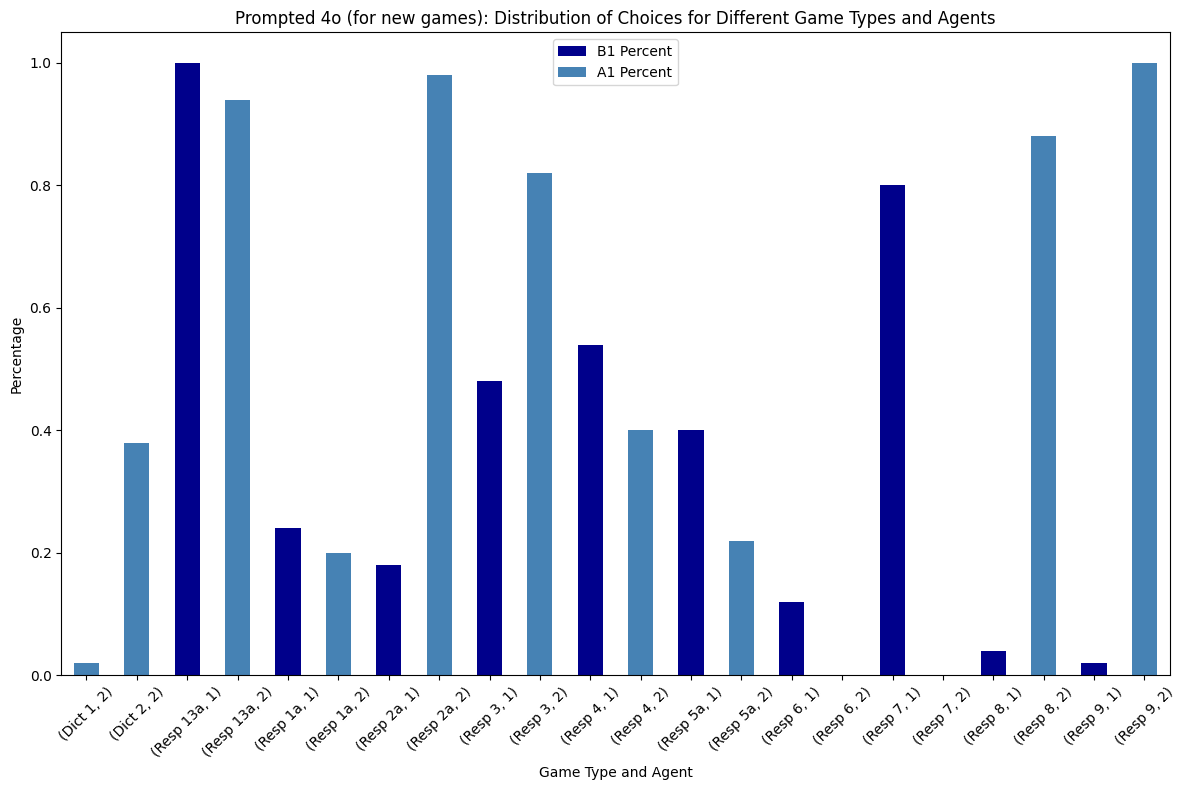

In [ ]:
# Filling NaN with 0 for visualization
final_df_prompted50_half.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution
final_df_prompted50_half.pivot_table(index=['game_type', 'agent'], values=['B1_percent', 'A1_percent']).plot(kind='bar', stacked=True, ax=ax, color=['#00008B', '#4682B4'])

ax.set_xlabel('Game Type and Agent')
ax.set_ylabel('Percentage')
ax.set_title('Prompted 4o (for new games): Distribution of Choices for Different Game Types and Agents')
ax.legend(['B1 Percent', 'A1 Percent'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MD

In [ ]:


def calculate_average_discrepancy(df1, df2):
    merged_df = pd.merge(df1, df2, on=['game_type', 'agent'], suffixes=('_df1', '_df2'))
    merged_df['B1_discrepancy'] = (merged_df['B1_percent_df1'] - merged_df['B1_percent_df2']).abs()
    merged_df['A1_discrepancy'] = (merged_df['A1_percent_df1'] - merged_df['A1_percent_df2']).abs()

    # Sum up the discrepancies and calculate the average
    merged_df['total_discrepancy'] = merged_df['B1_discrepancy'].add(merged_df['A1_discrepancy'], fill_value=0)
    avg_discrepancy = merged_df['total_discrepancy'].mean()

    return avg_discrepancy




In [ ]:
final_df_ft50_half.to_csv('/content/drive/My Drive/social preference/final_df_4oft50_half.csv', index=False)

In [ ]:
origdata_df_half.to_csv('/content/drive/My Drive/social preference/origdata_df_half.csv')

In [ ]:
final_df_baseline50_half.to_csv('/content/drive/My Drive/social preference/final_df_4obaseline50_half.csv')

In [ ]:
final_df_prompted50_half.to_csv('/content/drive/My Drive/social preference/final_df_4oprompted50_half.csv')

In [ ]:
# Calculate average discrepancies for each pair of dataframes
avg_discrepancy_ft50 = calculate_average_discrepancy(final_df_ft50_half, origdata_df_half)
avg_discrepancy_baseline50 = calculate_average_discrepancy(final_df_baseline50_half, origdata_df_half)
avg_discrepancy_prompted50 = calculate_average_discrepancy(final_df_prompted50_half, origdata_df_half)

# Print the results
print(f"Final DF FT50 vs. OrigData DF: Average Discrepancy (new games) = {avg_discrepancy_ft50}")
print(f"Final DF Baseline50 vs. OrigData DF: Average Discrepancy (new games) = {avg_discrepancy_baseline50}")
print(f"Final DF Prompted50 vs. OrigData DF: Average Discrepancy (new games) = {avg_discrepancy_prompted50}")

Final DF FT50 vs. OrigData DF: Average Discrepancy (new games) = 0.15627329192546582
Final DF Baseline50 vs. OrigData DF: Average Discrepancy (new games) = 0.2660920897284534
Final DF Prompted50 vs. OrigData DF: Average Discrepancy (new games) = 0.2502818130486114


# Visual choice

In [ ]:
final_df_ft50_half = pd.read_csv('/content/drive/My Drive/social preference/final_df_4oft50_half.csv')
final_df_baseline50_half = pd.read_csv('/content/drive/My Drive/social preference/final_df_4obaseline50_half.csv')
final_df_prompted50_half = pd.read_csv('/content/drive/My Drive/social preference/final_df_4oprompted50_half.csv')
origdata_df_half = pd.read_csv('/content/drive/My Drive/social preference/origdata_df_half.csv')

In [ ]:
orig_count_df = origdata_df_half

In [ ]:
orig_count_df_A = orig_count_df[orig_count_df['agent'] == 1][['A1_percent', 'A2_percent']]
orig_count_df_A

A1_percent  A2_percent
2     0.826087    0.173913
4     0.285714    0.714286
6     0.590909    0.409091
8     0.818182    0.181818
10    0.545455    0.454545
12    0.809524    0.190476
14    0.304348    0.695652
16    0.826087    0.173913
18    0.739130    0.260870
20    0.739130    0.260870

In [ ]:
orig_count_df_B = orig_count_df[orig_count_df['agent'] == 2][['B1_percent', 'B2_percent']]
orig_count_df_B

B1_percent  B2_percent
0     0.333333    0.666667
1     0.818182    0.181818
3     0.913043    0.086957
5     0.318182    0.681818
7     0.727273    0.272727
9     0.545455    0.454545
11    0.227273    0.772727
13    0.454545    0.545455
15    0.347826    0.652174
17    0.130435    0.869565
19    0.826087    0.173913
21    0.869565    0.130435

In [ ]:
orig_count_df_A1 = orig_count_df[orig_count_df['agent'] == 1][['A1_percent']]
orig_count_df_B1 = orig_count_df[orig_count_df['agent'] == 2][['B1_percent']]

In [ ]:
orig_count_df_A1

A1_percent
2     0.826087
4     0.285714
6     0.590909
8     0.818182
10    0.545455
12    0.809524
14    0.304348
16    0.826087
18    0.739130
20    0.739130

In [ ]:
orig_count_df_B1

B1_percent
0     0.333333
1     0.818182
3     0.913043
5     0.318182
7     0.727273
9     0.545455
11    0.227273
13    0.454545
15    0.347826
17    0.130435
19    0.826087
21    0.869565

In [ ]:
combined_orig_df = pd.concat([orig_count_df_A1.rename(columns={'A1_percent': 'percentage'}), orig_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_orig_df

percentage
0     0.333333
1     0.818182
2     0.826087
3     0.913043
4     0.285714
5     0.318182
6     0.590909
7     0.727273
8     0.818182
9     0.545455
10    0.545455
11    0.227273
12    0.809524
13    0.454545
14    0.304348
15    0.347826
16    0.826087
17    0.130435
18    0.739130
19    0.826087
20    0.739130
21    0.869565

In [ ]:
final_df_ft50_half

game_type  agent  number_of_new_participants  B1_percent  B2_percent  \
0     Dict 1      2                          50        0.02        0.98   
1     Dict 2      2                          50        0.66        0.34   
2   Resp 13a      1                          50         NaN         NaN   
3   Resp 13a      2                          50        0.86        0.14   
4    Resp 1a      1                          50         NaN         NaN   
5    Resp 1a      2                          50        0.36        0.62   
6    Resp 2a      1                          50         NaN         NaN   
7    Resp 2a      2                          50        0.78        0.22   
8     Resp 3      1                          50         NaN         NaN   
9     Resp 3      2                          50        0.72        0.28   
10    Resp 4      1                          50         NaN         NaN   
11    Resp 4      2                          50        0.62        0.38   
12   Resp 5a      1                          50         NaN         NaN   
13   Resp 5a      2                          50        0.52        0.48   
14    Resp 6      1                          50         NaN         NaN   
15    Resp 6      2                          50        0.26        0.74   
16    Resp 7      1                          50         NaN         NaN   
17    Resp 7      2                          50        0.26        0.72   
18    Resp 8      1                          50         NaN         NaN   
19    Resp 8      2                          50        0.72        0.28   
20    Resp 9      1                          50         NaN         NaN   
21    Resp 9      2                          50        0.88        0.12   

    A1_percent  A2_percent  
0          NaN         NaN  
1          NaN         NaN  
2         0.88        0.10  
3          NaN         NaN  
4         0.34        0.66  
5          NaN         NaN  
6         0.44        0.56  
7          NaN         NaN  
8         0.68        0.32  
9          NaN         NaN  
10        0.50        0.50  
11         NaN         NaN  
12        0.58        0.42  
13         NaN         NaN  
14        0.54        0.46  
15         NaN         NaN  
16        0.82        0.18  
17         NaN         NaN  
18        0.26        0.74  
19         NaN         NaN  
20        0.28        0.72  
21         NaN         NaN

In [ ]:
ft50_count_df = final_df_ft50_half

In [ ]:
ft50_count_df_A = ft50_count_df[ft50_count_df['agent'] == 1][['A1_percent', 'A2_percent']]
ft50_count_df_B = ft50_count_df[ft50_count_df['agent'] == 2][['B1_percent', 'B2_percent']]

In [ ]:
ft50_count_df_A1 = ft50_count_df[ft50_count_df['agent'] == 1][['A1_percent']]
ft50_count_df_B1 = ft50_count_df[ft50_count_df['agent'] == 2][['B1_percent']]

In [ ]:
combined_ft50_df = pd.concat([ft50_count_df_A1.rename(columns={'A1_percent': 'percentage'}), ft50_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_ft50_df

percentage
0         0.02
1         0.66
2         0.88
3         0.86
4         0.34
5         0.36
6         0.44
7         0.78
8         0.68
9         0.72
10        0.50
11        0.62
12        0.58
13        0.52
14        0.54
15        0.26
16        0.82
17        0.26
18        0.26
19        0.72
20        0.28
21        0.88

In [ ]:
final_df_prompted50_half

Unnamed: 0 game_type  agent  number_of_new_participants  B1_percent  \
0            0    Dict 1      2                          50        0.02   
1            1    Dict 2      2                          50        0.38   
2            2  Resp 13a      1                          50        0.00   
3            3  Resp 13a      2                          50        0.94   
4            4   Resp 1a      1                          50        0.00   
5            5   Resp 1a      2                          50        0.20   
6            6   Resp 2a      1                          50        0.00   
7            7   Resp 2a      2                          50        0.98   
8            8    Resp 3      1                          50        0.00   
9            9    Resp 3      2                          50        0.82   
10          10    Resp 4      1                          50        0.00   
11          11    Resp 4      2                          50        0.40   
12          12   Resp 5a      1                          50        0.00   
13          13   Resp 5a      2                          50        0.22   
14          14    Resp 6      1                          50        0.00   
15          15    Resp 6      2                          50        0.00   
16          16    Resp 7      1                          50        0.00   
17          17    Resp 7      2                          50        0.00   
18          18    Resp 8      1                          50        0.00   
19          19    Resp 8      2                          50        0.88   
20          20    Resp 9      1                          50        0.00   
21          21    Resp 9      2                          50        1.00   

    B2_percent  A1_percent  A2_percent  
0         0.98        0.00        0.00  
1         0.62        0.00        0.00  
2         0.00        1.00        0.00  
3         0.06        0.00        0.00  
4         0.00        0.24        0.76  
5         0.80        0.00        0.00  
6         0.00        0.18        0.82  
7         0.02        0.00        0.00  
8         0.00        0.48        0.52  
9         0.18        0.00        0.00  
10        0.00        0.54        0.46  
11        0.60        0.00        0.00  
12        0.00        0.40        0.60  
13        0.78        0.00        0.00  
14        0.00        0.12        0.88  
15        1.00        0.00        0.00  
16        0.00        0.80        0.20  
17        1.00        0.00        0.00  
18        0.00        0.04        0.96  
19        0.12        0.00        0.00  
20        0.00        0.02        0.98  
21        0.00        0.00        0.00

In [ ]:
promoted_count_df_A1 = final_df_prompted50_half[final_df_prompted50_half['agent'] == 1][['A1_percent']]
promoted_count_df_B1 = final_df_prompted50_half[final_df_prompted50_half['agent'] == 2][['B1_percent']]

In [ ]:
combined_promoted_df = pd.concat([promoted_count_df_A1.rename(columns={'A1_percent': 'percentage'}), promoted_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_promoted_df

percentage
0         0.02
1         0.38
2         1.00
3         0.94
4         0.24
5         0.20
6         0.18
7         0.98
8         0.48
9         0.82
10        0.54
11        0.40
12        0.40
13        0.22
14        0.12
15        0.00
16        0.80
17        0.00
18        0.04
19        0.88
20        0.02
21        1.00

In [ ]:
final_df_baseline50_half

Unnamed: 0 game_type  agent  number_of_new_participants  B1_percent  \
0            0    Dict 1      2                          50        0.00   
1            1    Dict 2      2                          50        0.56   
2            2  Resp 13a      1                          50        0.00   
3            3  Resp 13a      2                          50        1.00   
4            4   Resp 1a      1                          50        0.00   
5            5   Resp 1a      2                          50        0.30   
6            6   Resp 2a      1                          50        0.00   
7            7   Resp 2a      2                          50        0.98   
8            8    Resp 3      1                          50        0.00   
9            9    Resp 3      2                          50        0.96   
10          10    Resp 4      1                          50        0.00   
11          11    Resp 4      2                          50        0.92   
12          12   Resp 5a      1                          50        0.00   
13          13   Resp 5a      2                          50        0.70   
14          14    Resp 6      1                          50        0.00   
15          15    Resp 6      2                          50        0.00   
16          16    Resp 7      1                          50        0.00   
17          17    Resp 7      2                          50        0.00   
18          18    Resp 8      1                          50        0.00   
19          19    Resp 8      2                          50        0.98   
20          20    Resp 9      1                          50        0.00   
21          21    Resp 9      2                          50        1.00   

    B2_percent  A1_percent  A2_percent  
0         1.00        0.00        0.00  
1         0.44        0.00        0.00  
2         0.00        1.00        0.00  
3         0.00        0.00        0.00  
4         0.00        0.20        0.80  
5         0.70        0.00        0.00  
6         0.00        0.12        0.88  
7         0.02        0.00        0.00  
8         0.00        0.42        0.58  
9         0.04        0.00        0.00  
10        0.00        0.60        0.40  
11        0.08        0.00        0.00  
12        0.00        0.56        0.44  
13        0.30        0.00        0.00  
14        0.00        0.22        0.78  
15        1.00        0.00        0.00  
16        0.00        0.94        0.06  
17        1.00        0.00        0.00  
18        0.00        0.14        0.86  
19        0.02        0.00        0.00  
20        0.00        0.18        0.82  
21        0.00        0.00        0.00

In [ ]:
baseline_count_df_A1 = final_df_baseline50_half[final_df_baseline50_half['agent'] == 1][['A1_percent']]
baseline_count_df_B1 = final_df_baseline50_half[final_df_baseline50_half['agent'] == 2][['B1_percent']]

In [ ]:
combined_baseline_df = pd.concat([baseline_count_df_A1.rename(columns={'A1_percent': 'percentage'}), baseline_count_df_B1.rename(columns={'B1_percent': 'percentage'})]).sort_index()
combined_baseline_df

percentage
0         0.00
1         0.56
2         1.00
3         1.00
4         0.20
5         0.30
6         0.12
7         0.98
8         0.42
9         0.96
10        0.60
11        0.92
12        0.56
13        0.70
14        0.22
15        0.00
16        0.94
17        0.00
18        0.14
19        0.98
20        0.18
21        1.00

In [ ]:
combined_orig_df, combined_ft50_df, combined_promoted_df, combined_baseline_df

(    percentage
 0     0.333333
 1     0.818182
 2     0.826087
 3     0.913043
 4     0.285714
 5     0.318182
 6     0.590909
 7     0.727273
 8     0.818182
 9     0.545455
 10    0.545455
 11    0.227273
 12    0.809524
 13    0.454545
 14    0.304348
 15    0.347826
 16    0.826087
 17    0.130435
 18    0.739130
 19    0.826087
 20    0.739130
 21    0.869565,
     percentage
 0         0.02
 1         0.66
 2         0.88
 3         0.86
 4         0.34
 5         0.36
 6         0.44
 7         0.78
 8         0.68
 9         0.72
 10        0.50
 11        0.62
 12        0.58
 13        0.52
 14        0.54
 15        0.26
 16        0.82
 17        0.26
 18        0.26
 19        0.72
 20        0.28
 21        0.88,
     percentage
 0         0.02
 1         0.38
 2         1.00
 3         0.94
 4         0.24
 5         0.20
 6         0.18
 7         0.98
 8         0.48
 9         0.82
 10        0.54
 11        0.40
 12        0.40
 13        0.22
 14        0.12
 15   

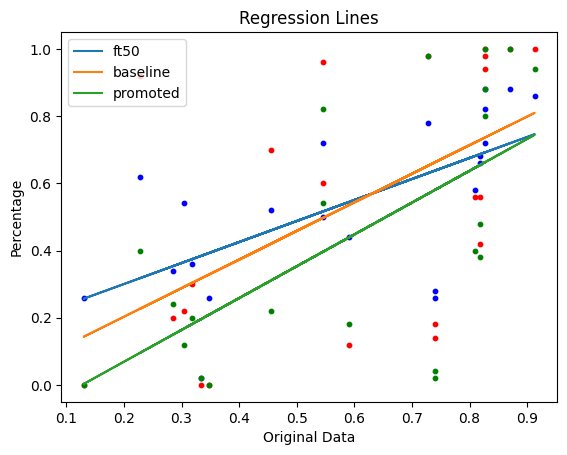

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# combined_orig_df
# combined_ft50_df
# combined_baseline_df
# combined_promoted_df

# Function to plot regression line
def plot_regression(ax, x, y, label):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    ax.plot(x, y_pred, label=label)

# Plotting the regression lines
fig, ax = plt.subplots()

x = combined_orig_df['percentage'].values

plot_regression(ax, x, combined_ft50_df['percentage'].values, 'ft50')
plot_regression(ax, x, combined_baseline_df['percentage'].values, 'baseline')
plot_regression(ax, x, combined_promoted_df['percentage'].values, 'promoted')

ax.scatter(x, combined_ft50_df['percentage'], color='blue', s=10)
ax.scatter(x, combined_baseline_df['percentage'], color='red', s=10)
ax.scatter(x, combined_promoted_df['percentage'], color='green', s=10)

ax.set_xlabel('Original Data')
ax.set_ylabel('Percentage')
ax.legend()
plt.title('Regression Lines')
plt.show()


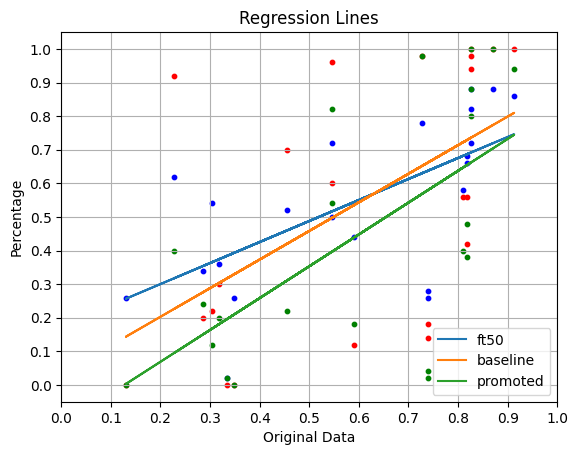

In [ ]:
# Function to plot regression line
def plot_regression(ax, x, y, label):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    ax.plot(x, y_pred, label=label)

# Plotting the regression lines
fig, ax = plt.subplots()

x = combined_orig_df['percentage'].values

plot_regression(ax, x, combined_ft50_df['percentage'].values, 'ft50')
plot_regression(ax, x, combined_baseline_df['percentage'].values, 'baseline')
plot_regression(ax, x, combined_promoted_df['percentage'].values, 'promoted')

ax.scatter(x, combined_ft50_df['percentage'], color='blue', s=10)
ax.scatter(x, combined_baseline_df['percentage'], color='red', s=10)
ax.scatter(x, combined_promoted_df['percentage'], color='green', s=10)

ax.set_xlabel('Original Data')
ax.set_ylabel('Percentage')
ax.legend()
ax.grid(True)  # Adding grid

# Setting the intervals for both axes
ax.set_xticks(np.arange(0, 1.10, 0.1))
ax.set_yticks(np.arange(0, 1.10, 0.1))

plt.title('Regression Lines')
plt.show()

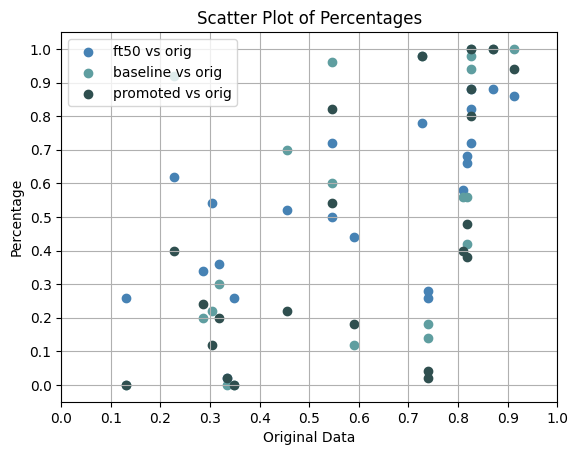

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_orig_df
# combined_ft50_df
# combined_baseline_df
# combined_promoted_df

# Plotting the points with consistent indices
fig, ax = plt.subplots()

x = combined_orig_df['percentage'].values

# Scatter points for each dataframe comparison
ax.scatter(x, combined_ft50_df['percentage'], color='steelblue', label='ft50 vs orig')
ax.scatter(x, combined_baseline_df['percentage'], color='cadetblue', label='baseline vs orig')
ax.scatter(x, combined_promoted_df['percentage'], color='darkslategrey', label='promoted vs orig')

ax.set_xlabel('Original Data')
ax.set_ylabel('Percentage')
ax.legend( )
ax.grid(True)  # Adding grid

# Setting the intervals for both axes
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.title('Scatter Plot of Percentages')
plt.show()


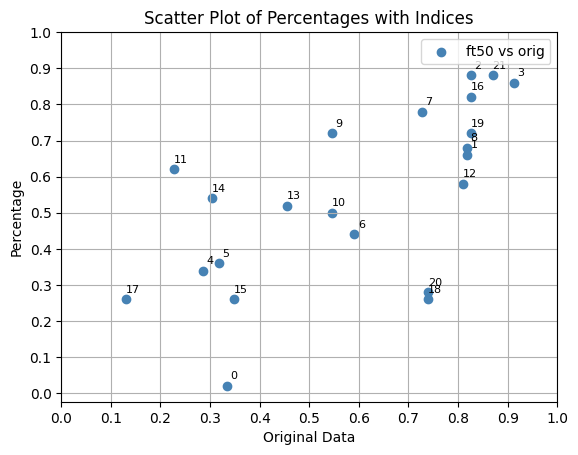

In [ ]:
# Plotting the scatter points with indices annotated
fig, ax = plt.subplots()

x = combined_orig_df['percentage'].values

# Scatter points for each dataframe comparison
ax.scatter(x, combined_ft50_df['percentage'], color='steelblue', label='ft50 vs orig')
#ax.scatter(x, combined_baseline_df['percentage'], color='cadetblue', label='baseline vs orig')
#ax.scatter(x, combined_promoted_df['percentage'], color='darkslategrey', label='promoted vs orig')

# Annotate each point with its index
for i in range(len(x)):
    ax.annotate(i, (x[i], combined_ft50_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
    #ax.annotate(i, (x[i], combined_baseline_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
    #ax.annotate(i, (x[i], combined_promoted_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

ax.set_xlabel('Original Data')
ax.set_ylabel('Percentage')
ax.legend()
ax.grid(True)  # Adding grid

# Setting the intervals for both axes
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.title('Scatter Plot of Percentages with Indices')
plt.show()


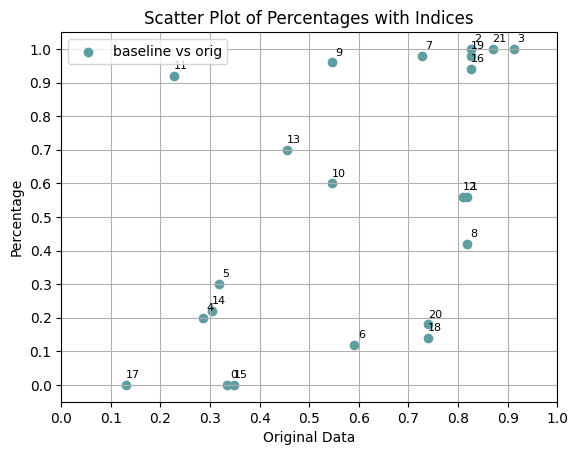

In [ ]:
# Plotting the scatter points with indices annotated
fig, ax = plt.subplots()

x = combined_orig_df['percentage'].values

# Scatter points for each dataframe comparison
#ax.scatter(x, combined_ft50_df['percentage'], color='steelblue', label='ft50 vs orig')
ax.scatter(x, combined_baseline_df['percentage'], color='cadetblue', label='baseline vs orig')
#ax.scatter(x, combined_promoted_df['percentage'], color='darkslategrey', label='promoted vs orig')

# Annotate each point with its index
for i in range(len(x)):
    #ax.annotate(i, (x[i], combined_ft50_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
    ax.annotate(i, (x[i], combined_baseline_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
    #ax.annotate(i, (x[i], combined_promoted_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

ax.set_xlabel('Original Data')
ax.set_ylabel('Percentage')
ax.legend()
ax.grid(True)  # Adding grid

# Setting the intervals for both axes
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.title('Scatter Plot of Percentages with Indices')
plt.show()

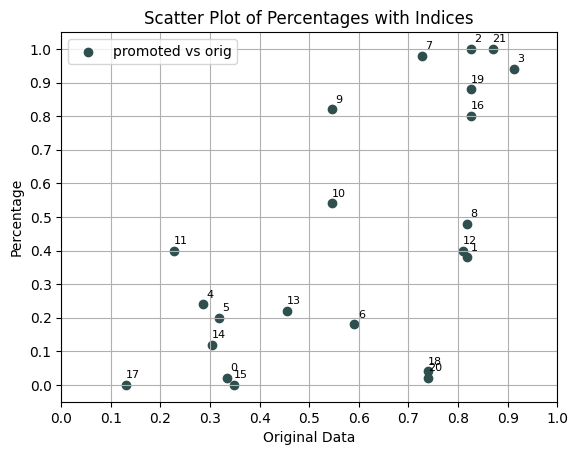

In [ ]:
# Plotting the scatter points with indices annotated
fig, ax = plt.subplots()

x = combined_orig_df['percentage'].values

# Scatter points for each dataframe comparison
#ax.scatter(x, combined_ft50_df['percentage'], color='steelblue', label='ft50 vs orig')
#ax.scatter(x, combined_baseline_df['percentage'], color='cadetblue', label='baseline vs orig')
ax.scatter(x, combined_promoted_df['percentage'], color='darkslategrey', label='promoted vs orig')

# Annotate each point with its index
for i in range(len(x)):
    #ax.annotate(i, (x[i], combined_ft50_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
    #ax.annotate(i, (x[i], combined_baseline_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
    ax.annotate(i, (x[i], combined_promoted_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

ax.set_xlabel('Original Data')
ax.set_ylabel('Percentage')
ax.legend()
ax.grid(True)  # Adding grid

# Setting the intervals for both axes
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.title('Scatter Plot of Percentages with Indices')
plt.show()

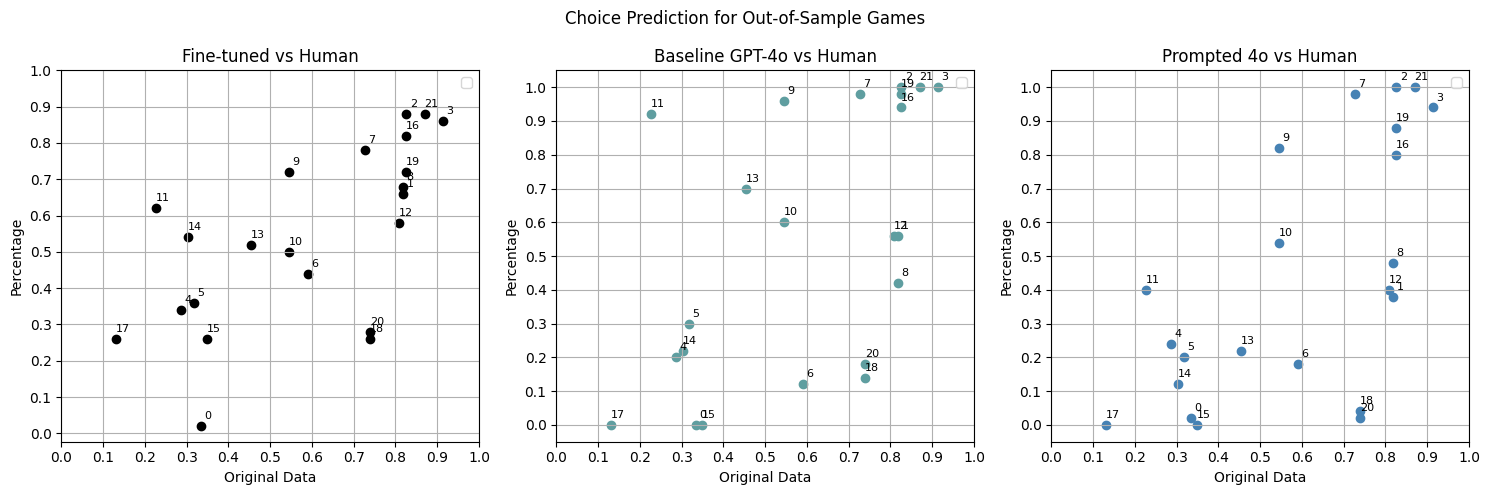

In [ ]:
#combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined
x = combined_orig_df['percentage'].values
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for ft50 vs orig
axs[0].scatter(x, combined_ft50_df['percentage'].values, color= 'black')
for i in range(len(x)):
    axs[0].annotate(i, (x[i], combined_ft50_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[0].set_xlabel('Original Data')
axs[0].set_ylabel('Percentage')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[0].set_title('Fine-tuned vs Human')

# Scatter plot for baseline vs orig
axs[1].scatter(x, combined_baseline_df['percentage'].values, color='cadetblue')
for i in range(len(x)):
    axs[1].annotate(i, (x[i], combined_baseline_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1].set_xlabel('Original Data')
axs[1].set_ylabel('Percentage')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_title('Baseline GPT-4o vs Human')

# Scatter plot for promoted vs orig
axs[2].scatter(x, combined_promoted_df['percentage'].values, color='steelblue')
for i in range(len(x)):
    axs[2].annotate(i, (x[i], combined_promoted_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[2].set_xlabel('Original Data')
axs[2].set_ylabel('Percentage')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(0, 1.1, 0.1))
axs[2].set_title('Prompted 4o vs Human')

plt.suptitle('Choice Prediction for Out-of-Sample Games')
plt.tight_layout()
plt.show()


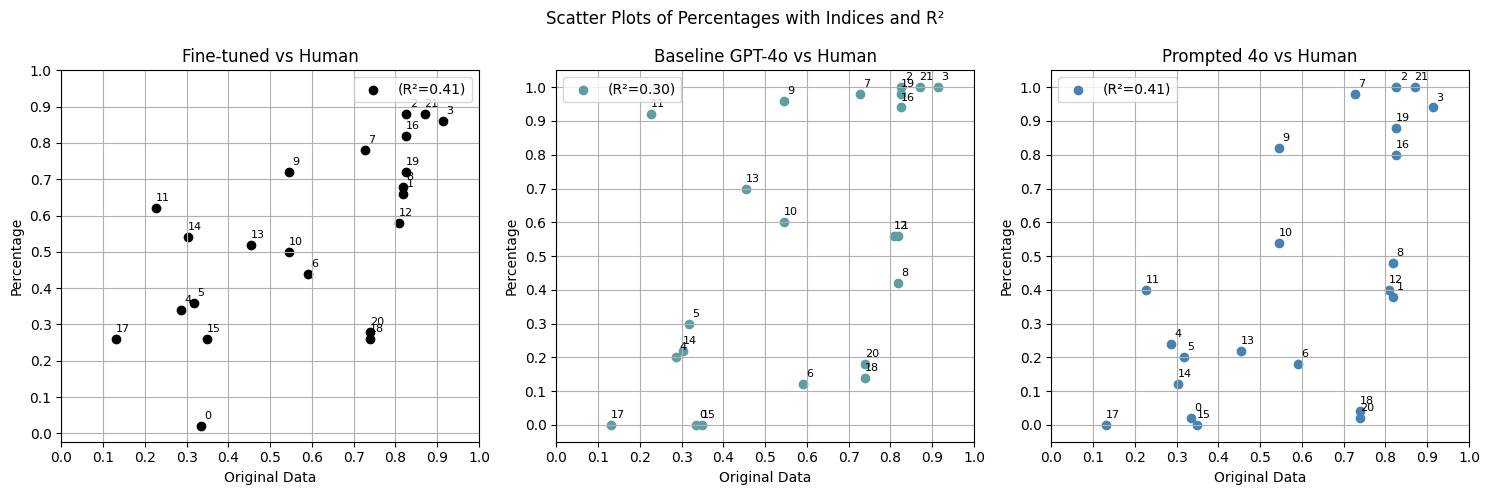

In [ ]:
# Assuming combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined

# Original data
x = combined_orig_df['percentage'].values

# Define a function to calculate R²
def calculate_r2(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value**2


# Calculate R² for each pair of regression
r2_ft50 = calculate_r2(x, combined_ft50_df['percentage'].values)
r2_baseline = calculate_r2(x, combined_baseline_df['percentage'].values)
r2_promoted = calculate_r2(x, combined_promoted_df['percentage'].values)


# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for ft50 vs orig
axs[0].scatter(x, combined_ft50_df['percentage'].values, color= 'black', label=f'(R²={r2_ft50:.2f})')
for i in range(len(x)):
    axs[0].annotate(i, (x[i], combined_ft50_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[0].set_xlabel('Original Data')
axs[0].set_ylabel('Percentage')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[0].set_title('Fine-tuned vs Human')


# Scatter plot for baseline vs orig
axs[1].scatter(x, combined_baseline_df['percentage'].values, color='cadetblue', label=f'(R²={r2_baseline:.2f})')
for i in range(len(x)):
    axs[1].annotate(i, (x[i], combined_baseline_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1].set_xlabel('Original Data')
axs[1].set_ylabel('Percentage')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_title('Baseline GPT-4o vs Human')

# Scatter plot for promoted vs orig
axs[2].scatter(x, combined_promoted_df['percentage'].values, color='steelblue', label=f'(R²={r2_promoted:.2f})')
for i in range(len(x)):
    axs[2].annotate(i, (x[i], combined_promoted_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[2].set_xlabel('Original Data')
axs[2].set_ylabel('Percentage')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(0, 1.1, 0.1))
axs[2].set_title('Prompted 4o vs Human')


plt.suptitle('Scatter Plots of Percentages with Indices and R²')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate R² for each pair of regression
r2_ft50 = calculate_r2(combined_ft50_df['percentage'].values, x)
r2_baseline = calculate_r2(combined_baseline_df['percentage'].values, x)
r2_promoted = calculate_r2(combined_promoted_df['percentage'].values, x)

In [ ]:
r2_ft50

0.41308406476183296

In [ ]:
r2_promoted

0.4073508109295054

In [ ]:
def calculate_slope(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope


# Calculate R² for each pair of regression
slope_ft50 = calculate_slope(x, combined_ft50_df['percentage'].values)
slope_baseline = calculate_slope(x, combined_baseline_df['percentage'].values)
slope_promoted = calculate_slope(x, combined_promoted_df['percentage'].values)

In [ ]:
slope_ft50

0.6605746951708175

In [ ]:
slope_baseline

0.8512242407119688

In [ ]:
slope_promoted

0.9473361177419003

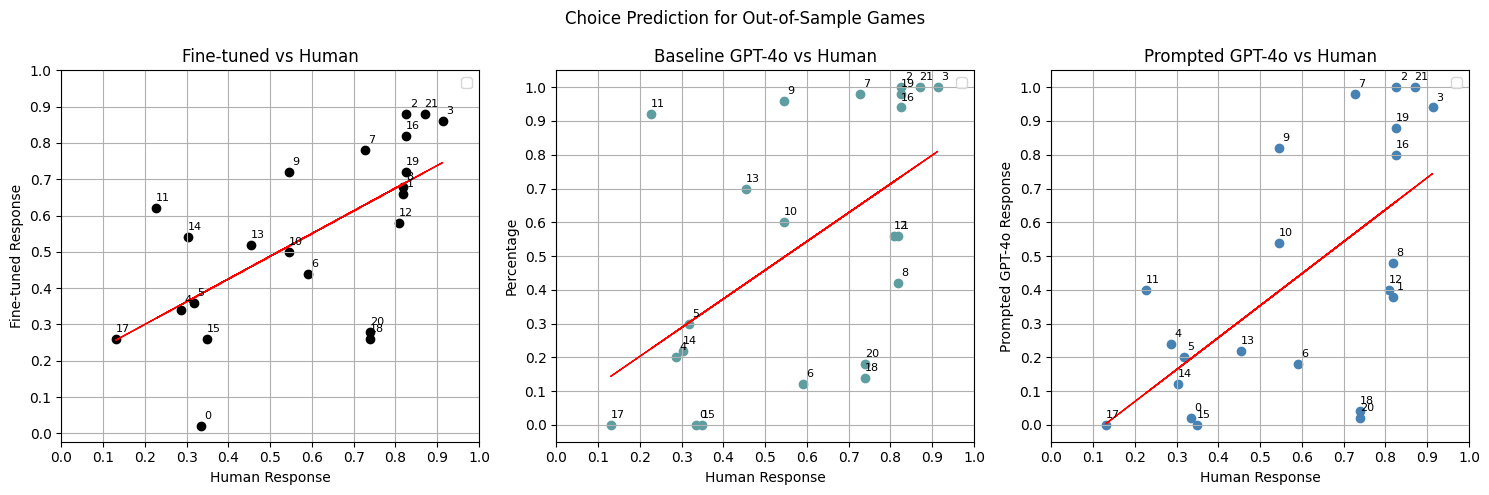

In [ ]:
# Assuming combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined

# Original data
x = combined_orig_df['percentage'].values

# Define a function to calculate R² and return slope and intercept
def calculate_regression_line(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value**2

# Calculate regression line and R² for each pair of regression
slope_ft50, intercept_ft50, r2_ft50 = calculate_regression_line(x, combined_ft50_df['percentage'].values)
slope_baseline, intercept_baseline, r2_baseline = calculate_regression_line(x, combined_baseline_df['percentage'].values)
slope_promoted, intercept_promoted, r2_promoted = calculate_regression_line(x, combined_promoted_df['percentage'].values)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for ft50 vs orig
y_ft50 = slope_ft50 * x + intercept_ft50
axs[0].scatter(x, combined_ft50_df['percentage'].values, color= 'black' )
axs[0].plot(x, y_ft50, color='red', linewidth=1)
for i in range(len(x)):
    axs[0].annotate(i, (x[i], combined_ft50_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[0].set_xlabel('Human Response')
axs[0].set_ylabel('Fine-tuned Response')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[0].set_title('Fine-tuned vs Human')

# Scatter plot for baseline vs orig
y_baseline = slope_baseline * x + intercept_baseline
axs[1].scatter(x, combined_baseline_df['percentage'].values, color='cadetblue' )
axs[1].plot(x, y_baseline, color='red', linewidth=1)
for i in range(len(x)):
    axs[1].annotate(i, (x[i], combined_baseline_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1].set_xlabel('Human Response')
axs[1].set_ylabel('Percentage')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_title('Baseline GPT-4o vs Human')

# Scatter plot for promoted vs orig
y_promoted = slope_promoted * x + intercept_promoted
axs[2].scatter(x, combined_promoted_df['percentage'].values, color='steelblue')
axs[2].plot(x, y_promoted, color='red', linewidth=1)
for i in range(len(x)):
    axs[2].annotate(i, (x[i], combined_promoted_df['percentage'].values[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[2].set_xlabel('Human Response')
axs[2].set_ylabel('Prompted GPT-4o Response')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(0, 1.1, 0.1))
axs[2].set_title('Prompted GPT-4o vs Human')

plt.suptitle('Choice Prediction for Out-of-Sample Games')
plt.tight_layout()
plt.show()


In [ ]:
slope_ft50, intercept_ft50, r2_ft50

(0.6253404312664654, 0.1751464838608558, 0.41308406476183296)

In [ ]:
slope_baseline, intercept_baseline, r2_baseline

(0.8512242407119688, 0.03262225984019507, 0.29848972367856924)

In [ ]:
slope_promoted, intercept_promoted, r2_promoted

(0.9473361177419003, -0.1205162573247962, 0.4073508109295054)

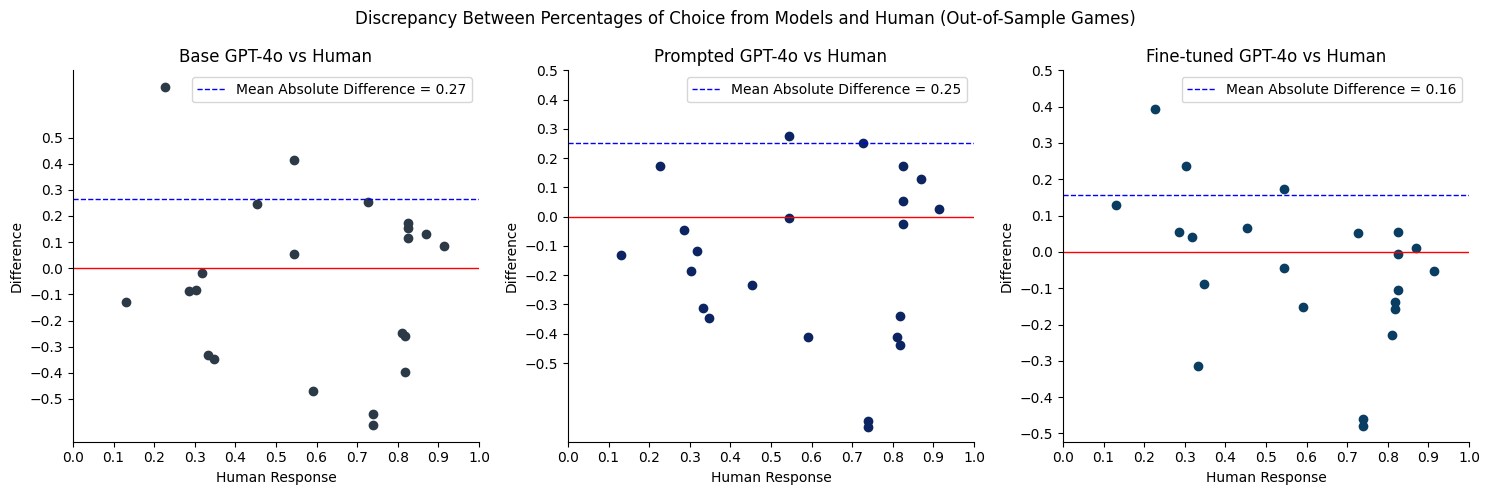

In [ ]:
# Assuming combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined

# Original data percentages
x = combined_orig_df['percentage'].values

# Differences between percentages
diff_ft50 = combined_ft50_df['percentage'].values - x
diff_baseline = combined_baseline_df['percentage'].values - x
diff_promoted = combined_promoted_df['percentage'].values - x

# Calculate absolute average differences
abs_avg_diff_ft50 = np.mean(np.abs(diff_ft50))
abs_avg_diff_baseline = np.mean(np.abs(diff_baseline))
abs_avg_diff_promoted = np.mean(np.abs(diff_promoted))

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))



# Plot differences for baseline vs orig
axs[0].scatter(x, diff_baseline, color='#2C3A47')
axs[0].axhline(0, color='red', linewidth=1)
axs[0].axhline(abs_avg_diff_baseline, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_baseline:.2f}')
axs[0].set_xlabel('Human Response')
axs[0].set_ylabel('Difference')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[0].set_title('Base GPT-4o vs Human')

# Plot differences for promoted vs orig
axs[1].scatter(x, diff_promoted, color='#0c2461')
axs[1].axhline(0, color='red', linewidth=1)
axs[1].axhline(abs_avg_diff_promoted, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_promoted:.2f}')
axs[1].set_xlabel('Human Response')
axs[1].set_ylabel('Difference')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[1].set_title('Prompted GPT-4o vs Human')

# Plot differences for ft50 vs orig
axs[2].scatter(x, diff_ft50, color='#0a3d62')
axs[2].axhline(0, color='red', linewidth=1)
axs[2].axhline(abs_avg_diff_ft50, color='blue', linestyle='--', linewidth=1, label=f'Mean Absolute Difference = {abs_avg_diff_ft50:.2f}')
axs[2].set_xlabel('Human Response')
axs[2].set_ylabel('Difference')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[2].set_title('Fine-tuned GPT-4o vs Human')

# Remove grid, top and right axes
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(False)

plt.suptitle('Discrepancy Between Percentages of Choice from Models and Human (Out-of-Sample Games)')
plt.tight_layout()
plt.show()

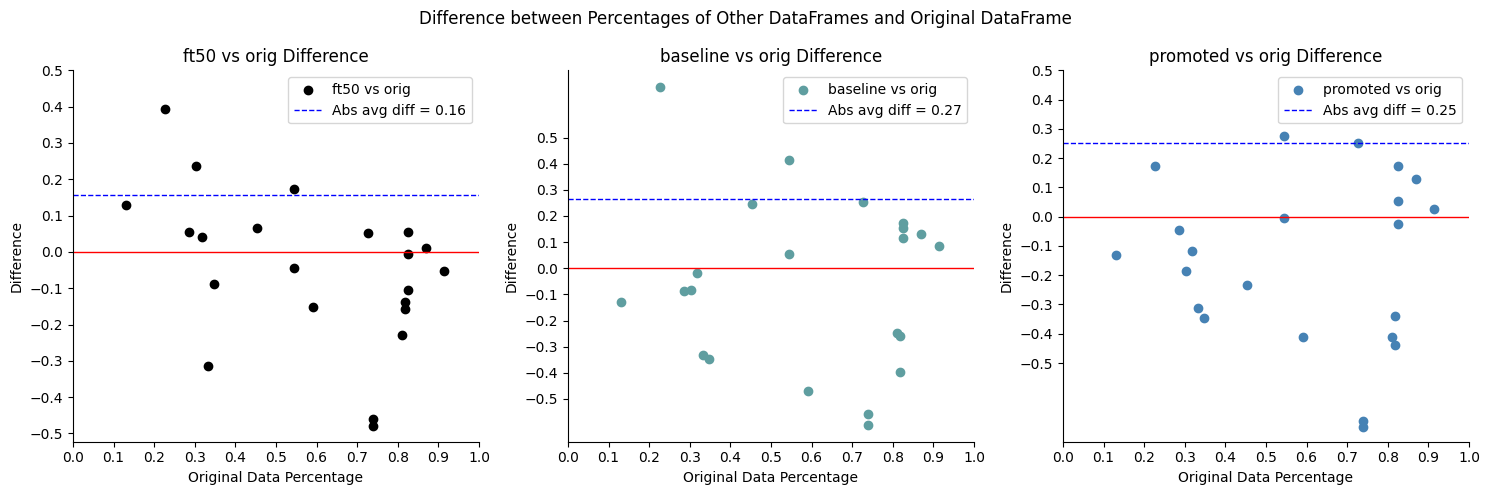

In [ ]:

# Assuming combined_orig_df, combined_ft50_df, combined_baseline_df, combined_promoted_df are already defined

# Original data percentages
x = combined_orig_df['percentage'].values

# Differences between percentages
diff_ft50 = combined_ft50_df['percentage'].values - x
diff_baseline = combined_baseline_df['percentage'].values - x
diff_promoted = combined_promoted_df['percentage'].values - x

# Calculate absolute average differences
abs_avg_diff_ft50 = np.mean(np.abs(diff_ft50))
abs_avg_diff_baseline = np.mean(np.abs(diff_baseline))
abs_avg_diff_promoted = np.mean(np.abs(diff_promoted))

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot differences for ft50 vs orig
axs[0].scatter(x, diff_ft50, color='black', label='ft50 vs orig')
axs[0].axhline(0, color='red', linewidth=1)
axs[0].axhline(abs_avg_diff_ft50, color='blue', linestyle='--', linewidth=1, label=f'Abs avg diff = {abs_avg_diff_ft50:.2f}')
axs[0].set_xlabel('Original Data Percentage')
axs[0].set_ylabel('Difference')
axs[0].legend()
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[0].set_title('ft50 vs orig Difference')

# Plot differences for baseline vs orig
axs[1].scatter(x, diff_baseline, color='cadetblue', label='baseline vs orig')
axs[1].axhline(0, color='red', linewidth=1)
axs[1].axhline(abs_avg_diff_baseline, color='blue', linestyle='--', linewidth=1, label=f'Abs avg diff = {abs_avg_diff_baseline:.2f}')
axs[1].set_xlabel('Original Data Percentage')
axs[1].set_ylabel('Difference')
axs[1].legend()
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[1].set_title('baseline vs orig Difference')

# Plot differences for promoted vs orig
axs[2].scatter(x, diff_promoted, color='steelblue', label='promoted vs orig')
axs[2].axhline(0, color='red', linewidth=1)
axs[2].axhline(abs_avg_diff_promoted, color='blue', linestyle='--', linewidth=1, label=f'Abs avg diff = {abs_avg_diff_promoted:.2f}')
axs[2].set_xlabel('Original Data Percentage')
axs[2].set_ylabel('Difference')
axs[2].legend()
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(-0.5, 0.6, 0.1))
axs[2].set_title('promoted vs orig Difference')

# Remove grid, top and right axes
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(False)

plt.suptitle('Difference between Percentages of Other DataFrames and Original DataFrame')
plt.tight_layout()
plt.show()
